#### Importing Libraries

In [1]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup

#### Getting keywords from text using keyBert architecture

In [1]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT

def get_keyword_bert(docs):
    final_keywords = []
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=3,stop_words='english')
    return onewords

#### Here we get each chapterwise keywords

In [3]:
book1 ="nelson_autobiography"


In [4]:
dir_path = './historical_books/%s/part'% book1
rootdir = r"C:\Users\hp\OneDrive\Documents\topic_coherence\historical_books\%s"% book1
part = 1
mp_gandhi = {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter'+ str(i)                
                content = content_file.read()
                print(key)
                mp_gandhi[key] = get_keyword(content)
        x = target_x
        part += 1

1/chapter1
1/chapter2
1/chapter3
1/chapter4
1/chapter5
1/chapter6
1/chapter7
1/chapter8
1/chapter9
1/chapter10
1/chapter11
1/chapter12
1/chapter13
1/chapter14
1/chapter15
1/chapter16
1/chapter17
1/chapter18
1/chapter19
1/chapter20
1/chapter21
1/chapter22
1/chapter23
1/chapter24
1/chapter25
1/chapter26
1/chapter27
1/chapter28
1/chapter29
1/chapter30
1/chapter31
1/chapter32
1/chapter33
1/chapter34
1/chapter35
1/chapter36
1/chapter37
1/chapter38
1/chapter39
1/chapter40
1/chapter41
1/chapter42
1/chapter43
1/chapter44
1/chapter45
1/chapter46
1/chapter47
1/chapter48
1/chapter49
1/chapter50
1/chapter51
1/chapter52
1/chapter53
1/chapter54
1/chapter55
1/chapter56
1/chapter57
1/chapter58
1/chapter59
1/chapter60
1/chapter61
1/chapter62
1/chapter63
1/chapter64
1/chapter65
1/chapter66
1/chapter67
1/chapter68
1/chapter69
1/chapter70
1/chapter71
1/chapter72
1/chapter73
1/chapter74
1/chapter75
1/chapter76
1/chapter77
1/chapter78
1/chapter79
1/chapter80
1/chapter81
1/chapter82
1/chapter83
1/chapter84
1

In [2]:
import json
mp_nelson_bert,mp_nelson_yake,mp_nelson_rakun = {},{},{}
with open("mp_nelson_bert.json", "r") as outfile:
    mp_nelson_bert = json.load(outfile)

with open("mp_nelson_yake.json", "r") as outfile:
    mp_nelson_yake = json.load(outfile)

with open("mp_nelson_rakun.json", "r") as outfile:
    mp_nelson_rakun = json.load(outfile)

In [3]:
mp_combined = {}
for k in mp_nelson_bert.keys():
    k1 = set([v[0] for v in mp_nelson_bert[k]])
    k2 = set([v[0] for v in mp_nelson_yake[k]])
    k3 = set([v[0] for v in mp_nelson_rakun[k]])
    mp_combined[k] = k1.union(k2,k3)

In [5]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key.replace('/','\\'))

In [7]:
final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'secret working group', 'junior officers', 'negotiations', 'vote', 'Hare', 'expressly forbidden', 'conference', 'BIRTHDAY CELEBRATIONS', 'grave', 'state', 'areas', 'proclamation', 'africanism', 'bucolic northern suburb', 'prosecution concluded', 'corridor', 'day', 'afrikaner', 'African boxers', 'clarkebury', 'difficult', 'great', 'prevent rupture', 'aftermath', 'night warder', 'Edward VII Hospital', 'governmentsponsored institutions', 'planning to send', 'interrupted by interjections', 'argumentative overbearing', 'Willemse', 'meeting with Bram', 'Free State', 'clothing characteristic', 'chief mangosuthu buthelezi', 'childhood', 'matter', 'zithulele', 'curtain wire', 'longing', 'station commander', 'WINNIE VISITED', 'anticommunism', 'bit of evidence', 'chief magistrate', 'Inkatha Freedom Party', 'south african congress', 'authorities considered', 'crimes', 'desserts and pillows', 'separation', 'south africa', 'located in Braamfontein', 'arrived', 'metal buckets', 'mining houses', 'jou

### Taking care of temporal value

In [15]:
book ="nelson_autobiography"
def get_year_to_content(book):
    dir_path = '.\historical_books\%s\part'% book
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    rootdir = r"C:\Users\hp\OneDrive\Documents\topic_coherence\historical_books\%s"% book
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) < 1960 and int(date) > 1800:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"\\chapter{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

In [16]:
year_to_chap = get_year_to_content(book)

In [18]:
keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

In [19]:
key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Father_Response_1900': ['1\\chapter1'], 'Zulu_1900': ['1\\chapter1'], 'Territorial_Divisions_1900': ['1\\chapter1'], 'Hand_House_1900': ['1\\chapter1'], 'Birth_1900': ['1\\chapter1'], 'Genealogy_1900': ['1\\chapter1'], 'Straitened_Circumstances_1900': ['1\\chapter1'], 'Rolihlahla_1900': ['1\\chapter1'], 'Thembu_1900': ['1\\chapter1'], 'House_1900': ['1\\chapter1'], 'House_1950': ['1\\chapter111'], 'Father_1900': ['1\\chapter1'], 'Father_1840': ['1\\chapter3'], 'Father_1912': ['1\\chapter77'], 'Father_1909': ['1\\chapter109'], 'Acknowledged_Custodian_1900': ['1\\chapter1'], 'Left_Hand_House_1900': ['1\\chapter1'], 'Rebelliousness_Stubborn_1900': ['1\\chapter1'], 'Mandela_Family_Chieftainship_1900': ['1\\chapter1'], 'Youthful_Approximation_1840': ['1\\chapter2'], 'Boy_1840': ['1\\chapter2'], 'Appeared_As_Grand_1840': ['1\\chapter2'], 'Village_Wore_1840': ['1\\chapter2'], 'Grassy_Valley_Crisscrossed_1840': ['1\\chapter2'], 'Ancestors_1840': ['1\\chapter2'], '

## Keyword Focused Paragraph

In [20]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [23]:
def split_sentence_from_text(key):
    file_loc = r"C:\Users\hp\OneDrive\Documents\topic_coherence\historical_books\nelson_autobiography\part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Father_Response_1900
Zulu_1900
Territorial_Divisions_1900
Hand_House_1900
Birth_1900
Genealogy_1900
Straitened_Circumstances_1900
Rolihlahla_1900
Thembu_1900
House_1900
House_1950
Father_1900
Father_1840
Father_1912
Father_1909
Acknowledged_Custodian_1900
Left_Hand_House_1900
Rebelliousness_Stubborn_1900
Mandela_Family_Chieftainship_1900
Youthful_Approximation_1840
Boy_1840
Appeared_As_Grand_1840
Village_Wore_1840
Grassy_Valley_Crisscrossed_1840
Ancestors_1840
Neighboring_Villages_1840
Farms_1840
Honey_And_Fruits_1840
Stoop_To_Walk_1840
Huts_1840
Fruits_And_Edible_1840
Village_1840
Sisters_1840
Qunu_1840
Qunu_1950
Councilors_Of_High_1840
Great_1840
Champion_Stick_1840
Wheezing_Cough_1840
Attended_Church_1840
Stick_Fighter_1840
Tobacco_1840
Lung_Disease_1840
Great_Place_1840
Chief_Joyi_1840
Center_1840
Regent_1840
Regent_1825
Regent_1940
Grandpa_1840
Meeting_1840
Meeting_1950
Meeting_1914
Circumcision_Master_1825
River_1825
Circumcision_1825
Snorting_And_Eating_1825
Day_1825
Day_1943
Da

Winnie_1956
Constance_Mbekeni_1958
Exuberant_Grandmother_1958
Coincidence_Occurred_1958
Social_Worker_1958
Told_1958
Treason_Trial_1950
Oliver_1930
Financial_Difficulties_1958
Premier_Black_Hospital_1958
Thirteen_Million_Africans_1958
Million_Africans_1958
Elections_1958
Major_Event_Facing_1958
Strike_1958
Major_Event_1958
South_African_Congress_1958
Embarrassment_1958
Uncharacteristic_Silence_1958
Provincial_Administration_1957
South_African_Women_1957
Increasingly_Politicized_1957
Persistent_Enthusiastic_1957
Women_1957
Orlando_Women_1957
Prison_Authorities_1957
Prison_Authorities_1952
Prison_Authorities_1950
Orlando_1957
Port_Elizabeth_1950
Enthusiastic_Indefatigable_1957
Anc_Women_1957
Passes_1957
Judge_Ludorf_1958
Defense_Team_1958
Rumpff_1958
Judge_1958
Courtroom_1958
Courtroom_1956
Courtroom_1819
Ludorf_1958
Indictment_Altogether_1958
Justice_Kennedy_1958
Lumbering_Uncomfortable_1958
Government_1955
Judges_Ludorf_1958
Maneuvering_Imaginable_1958
Hearings_In_January_1958
Orlando_

Doctrine_Of_Separation_1819
Representative_Parliament_1819
Rivonia_Trial_1819
Prepared_1819
Amnesty_1819
Appeal_1819
Wet_1819
Death_1819
Death_Penalty_1819
Paul_’S_Cathedral_1819
Law_Exams_1819
International_Pressure_1819
June_1819
Sentencing_1819
Friday_1819
Mother_1819
Mother_1950
Pressure_Undoubtedly_1819
Island_1819
Island_1950
Island_1912
Aucamp_1819
Cape_Town_Prison_1819
Colonel_Aucamp_1819
Joel_Joffe_1819
Disputes_1819
Minutes_1819
Understanding_1819
Consultation_1819
Bram_Fischer_1819
Months_1819
Permitted_To_Write_1819
Anc_Defendants_1819
Bram_1819
Authorities_Acknowledged_1819
Corridor_1950
Washing_1950
Warder_1950
Warder_1912
Metal_Buckets_1950
Toilets_1950
Ballies_1950
Night_Warder_1950
Water_1950
Cells_1950
Prisoners_Received_1950
Ballie_1950
Months_Breakfast_1950
Awakened_At_5:30_1950
Received_1950
Meeting_With_Bram_1950
Hynning_1950
Bram_And_Joel_1950
Prison_Service_Regulations_1950
General_Steyn_1950
Fingerprints_1950
Needles_And_Thread_1950
Permitted_1950
Photographs_1

Delicious_Sensations_1950
Officer_Swart_1950
Negotiations_Renouncing_1914
Apartheid_Institutions_1914
Untrained_And_Undisciplined_1914
Committee_Meetings_1914
Rudimentary_Communications_1914
Unparalleled_Situation_1914
Planning_To_Send_1914
White_South_Africa_1914
Memorandum_1914
Tailor_1914
Botha_1914
President_1914
General_1914
Behavior_Unacceptable_1914
Unfailingly_Courteous_1914
Release_Unconditionally_1914
Considerable_Jockeying_1914
General_Willemse_1914
General_Willemse_1953
Suit_1914
Johannesburg_Prison_1953
Robben_Island_Comrades_1953
Reconciliation_Enunciated_1953
Constitutional_Framework_1953
Govan_Mbeki_1953
President_De_Klerk_1953
Supported_The_Guidelines_1953
Constitutional_Development_1953
Klerk_1912
Klerk_1950
Klerk_1909
Prisoners_Incarcerated_1953
South_African_Head_1953
South_African_Communist_1953
De_Klerk_1953
African_Communist_Party_1953
Democratic_South_Africa_1909
Apartheid_System_1953
Informed_1953
Reception_Committee_1953
Extraordinary_Circumstances_1953
Summer

In [25]:
with open("mp_key_doc_nelson.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [26]:
url = 'https://en.wikipedia.org/wiki/Nelson_Mandela'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Life', 'Early_life', 'Childhood:_1918–1934', 'Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940', 'Arriving_in_Johannesburg:_1941–1943', 'Revolutionary_activity', 'Law_studies_and_the_ANC_Youth_League:_1943–1949', 'Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954', 'Congress_of_the_People_and_the_Treason_Trial:_1955–1961', 'MK,_the_SACP,_and_African_tour:_1961–62', 'Imprisonment', 'Arrest_and_Rivonia_trial:_1962–1964', 'Robben_Island:_1964–1982', 'Pollsmoor_Prison:_1982–1988', 'Victor_Verster_Prison_and_release:_1988–1990', 'End_of_apartheid', 'Early_negotiations:_1990–91', 'CODESA_talks:_1991–92', 'General_election:_1994', 'Presidency_of_South_Africa:_1994–1999', 'National_reconciliation', 'Domestic_programmes', 'Foreign_affairs', 'Withdrawing_from_politics', 'Retirement', 'Continued_activism_and_philanthropy:_1999–2004', '"Retiring_from_retirement":_2004–2013', 'Illness_and_death:_2011–2013', 'Political_ideology', 'Democracy', 'Socialism_and_Marxism', 'Personality_and_person

## Similarity

In [27]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' or val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            print(f"{key1} {key2} {cos_scores}")

Life Father_Response_1900 0.05847939848899841
Life Zulu_1900 0.022939415648579597
Life Hand_House_1900 0.036567725241184235
Life Birth_1900 0.04677780717611313
Life Genealogy_1900 0.04677780717611313
Life Rolihlahla_1900 0.08474700897932053
Life House_1950 0.05043385177850723
Life Father_1900 0.0773739367723465
Life Father_1840 0.014604839496314526
Life Father_1912 0.015656787902116776
Life Father_1909 0.1215052455663681
Life Left_Hand_House_1900 0.036567725241184235
Life Rebelliousness_Stubborn_1900 -0.014309306629002094
Life Mandela_Family_Chieftainship_1900 0.06414048373699188
Life Village_Wore_1840 -0.015851255506277084
Life Grassy_Valley_Crisscrossed_1840 -0.014279287308454514
Life Neighboring_Villages_1840 -0.043248072266578674
Life Farms_1840 0.043597012758255005
Life Honey_And_Fruits_1840 0.09669829905033112
Life Huts_1840 0.015034541487693787
Life Fruits_And_Edible_1840 0.0447683185338974
Life Sisters_1840 0.11076653748750687
Life Qunu_1840 0.0352119617164135
Life Qunu_1950 0.

Life Freedom_1912 0.07618755102157593
Life Luthuli_1952 0.0693279281258583
Life Chief_Luthuli_1952 0.05627065896987915
Life Lawyers_1951 0.0262887142598629
Life Law_Firms_1951 0.0511079803109169
Life Thomas_Titus_Nkobi_1951 0.05810954421758652
Life African_Law_Firms_1951 0.06238356977701187
Life Attorney_1951 0.012583432719111443
Life Fledged_Attorney_1951 0.012593994848430157
Life Law_Firm_1951 0.05289173871278763
Life Court_1819 0.07938924431800842
Life Attorneys_1951 0.0509023554623127
Life Qualification_Exam_1951 0.09433196485042572
Life Walter_1953 0.026232954114675522
Life Walter_1952 0.10278443247079849
Life Johannesburg_1953 0.07034822553396225
Life Johannesburg_1955 0.07996344566345215
Life Johannesburg_1958 0.09810394048690796
Life Johannesburg_1940 0.06917612254619598
Life Johannesburg_1819 0.07550904154777527
Life Leaders_1953 -0.021897587925195694
Life Leaders_1920 0.06188536807894707
Life Town_1953 -0.005940433591604233
Life Sophiatown_1953 0.015842922031879425
Life Trans

Life Africanist_Organization_1958 0.06699085235595703
Life Africanists_1958 0.06699085235595703
Life Parliament_Passed_1955 0.06105984374880791
Life Assassination_Attempts_1955 0.07810201495885849
Life Bantu_Administration_1955 0.09531904011964798
Life Bantu_Self_1955 0.06105984374880791
Life Grand_Apartheid_1955 0.03794420510530472
Life Bantu_Self_Government_Act_1955 0.09531904011964798
Life Cross_Examined_1956 0.055721037089824677
Life Crown_Evidence_1956 0.046980541199445724
Life African_Judicial_System_1956 0.01016958523541689
Life Expert_Witnesses_1956 0.10731537640094757
Life Testimony_1956 0.044131867587566376
Life Prosecution_1956 0.07356122881174088
Life Prosecution_1957 0.05635232850909233
Life Prosecution_1819 0.07543736696243286
Life Prosecution_Concluded_1956 0.08154270797967911
Life Anc_Officials_1957 0.11609598994255066
Life Ghana_1957 0.07546083629131317
Life Pretoria_1952 0.1509755551815033
Life Africa_1838 0.1031298115849495
Life Africa_1930 0.04833614081144333
Life A

Life Prison_Conditions_1950 0.020998932421207428
Life Political_Prisoners_1952 0.09646691381931305
Life Political_Prisoners_1819 0.0504242442548275
Life Political_Prisoners_1950 0.041712235659360886
Life Political_Prisoners_1920 0.06436219811439514
Life Political_Prisoners_1953 0.15586717426776886
Life Tefu_1952 0.09171386808156967
Life Prison_Uniform_1952 0.08600370585918427
Life Short_Trousers_1952 0.11060266941785812
Life Short_Trousers_1819 0.11678186804056168
Life Sobukwe_1952 0.0980396717786789
Life Umkhonto_1959 -0.007028088439255953
Life Militancy_1959 0.08737359941005707
Life Transkei_1920 0.10533273965120316
Life Ninety-Day_Detention_Law_1959 0.003335457295179367
Life Illegal_Organizations_1959 0.033592529594898224
Life Illegal_Organizations_1953 0.1382043957710266
Life Imprisonment_Banning_1959 0.0019270246848464012
Life Cell_1819 0.11317116022109985
Life Mothers_And_Fathers_1819 0.07848527282476425
Life Wives_And_Children_1819 0.07848527282476425
Life Law_Prisoners_1819 0.0

Life Memoir_1914 0.031402770429849625
Life Birthday_Honoree_1914 0.04425528645515442
Life Celebrations_Were_Bare-Bones_1914 0.0835147425532341
Life Jimmy_Kruger_1914 0.1478908210992813
Life Transkei_Government_1914 0.11157949268817902
Life Cabinet_Minister_1914 0.11764895915985107
Life Kruger_1914 0.09911878407001495
Life Independent_Homelands_1914 -0.02026967704296112
Life Prisons_Policy_1914 0.09919333457946777
Life Politicians_Routinely_1914 0.10492343455553055
Life Black_Consciousness_1914 0.0610010027885437
Life Uprising_1914 0.11527733504772186
Life Young_Men_1914 0.09806644171476364
Life Psychological_Inferiority_1914 -0.03621912747621536
Life Riots_1914 0.13435417413711548
Life Black_Consciousness_Movement_1914 0.05389219895005226
Life Rebellion_1914 0.12809985876083374
Life Laborers_1914 -0.030915668234229088
Life Labor_Requirement_1914 0.05156707018613815
Life Labor_1914 0.05156707018613815
Life Labors_1914 0.05156707018613815
Life Garden_1914 0.07996867597103119
Life Manual_

Life Journalist_1879 0.0907716155052185
Life Criminals_Masquerading_1879 0.10035678744316101
Life Press_Conference_1879 0.16946980357170105
Life Journalists_1879 0.0907716155052185
Life Zimbabwe_1879 0.14730942249298096
Life Lusaka_1879 0.13541558384895325
Life Stockholm_To_Visit_1879 0.17790628969669342
Life London_To_Attend_1879 0.06345014274120331
Life Organization_Secretary_1879 0.0655401349067688
Life Apartheid_Laws_1879 0.17000249028205872
Life Chief_Mangosuthu_Buthelezi_1879 0.07289055734872818
Life Chief_Buthelezi_1879 0.056898996233940125
Life Zulu_King_Cetywayo_1879 0.08022409677505493
Life Zulu_King_1879 0.07271978259086609
Life Anc_Demonstrators_1912 0.002937251701951027
Life Interim_Government_1912 0.05789075791835785
Life Interim_Government_1909 0.2115267813205719
Life Constituent_Assembly_1912 0.12798230350017548
Life Constituent_Assembly_1909 0.06589454412460327
Life Constituent_Assembly_1950 0.08725928515195847
Life Violence_1909 0.08466993272304535
Life Proportional_R

Early_life Ballroom_Dancing_1916 0.023918505758047104
Early_life Hare_1916 0.06057334691286087
Early_life University_Degree_1916 0.026231957599520683
Early_life Fort_1916 0.06057334691286087
Early_life Fort_Hare_Constitution_1916 0.08479080349206924
Early_life Century_Frontier_Fort_1916 -0.04351102188229561
Early_life Prime_Minister_1952 0.12478512525558472
Early_life Prime_Minister_1914 0.07307407259941101
Early_life University_1916 0.03285704553127289
Early_life Attend_Fort_Hare_1916 0.03660524636507034
Early_life Mqhekezweni_1940 0.09458301961421967
Early_life Chief_Magistrate_1940 0.041270650923252106
Early_life Justice_1940 0.10256253182888031
Early_life Journey_1940 0.06251322478055954
Early_life Traveling_Documents_1940 0.0643683448433876
Early_life Jail_Sentence_1940 0.07311675697565079
Early_life Circumstances_1940 0.023868296295404434
Early_life Cigarettes_And_Candy_1940 0.2044316977262497
Early_life Crown_Mines_1939 0.06676391512155533
Early_life African_1943 0.0878502279520

Early_life Law_Society_1950 0.07614028453826904
Early_life Communism_Act_1954 0.06628641486167908
Early_life Anc_Was_Due_1954 0.06368573009967804
Early_life Transvaal_Conference_1954 0.03972460329532623
Early_life Protest_1954 0.07991372048854828
Early_life Protest_1955 0.0647459477186203
Early_life Protest_1958 0.11398757249116898
Early_life Protest_1952 0.24192756414413452
Early_life Protest_1914 0.13645212352275848
Early_life Indefinite_Boycott_1955 0.08028481900691986
Early_life Antiremoval_1955 0.10281877219676971
Early_life Antiremoval_Campaign_1955 0.2098274677991867
Early_life Organization_1955 0.05621577054262161
Early_life Organization_1950 0.036595601588487625
Early_life Organization_1952 -0.004747340455651283
Early_life Organization_1912 -0.019913984462618828
Early_life Antigovernment_1955 0.10522496700286865
Early_life Western_Areas_Antiremoval_Campaign_1955 0.10947932302951813
Early_life People_1955 0.05621577054262161
Early_life Secondary_Schools_1955 -0.0245461650192737

Early_life Antipass_Demonstrations_1957 0.14720435440540314
Early_life Blankets_1957 0.05333063751459122
Early_life Pockets_1957 0.23054617643356323
Early_life Newlands_Police_Station_1957 0.07285924255847931
Early_life Station_Commander_1957 0.09931424260139465
Early_life Police_1957 0.05730525404214859
Early_life Policeman_1957 0.16687999665737152
Early_life Security_Policemen_1957 0.09967901557683945
Early_life Detention_1957 0.16143319010734558
Early_life Detention_1950 0.060050368309020996
Early_life Judge_Rumpff_1957 0.07685080170631409
Early_life Judge_Rumpff_1950 0.12444651871919632
Early_life Disorganized_Overzealousness_1957 0.06900276988744736
Early_life State_Of_Emergency_1957 0.057713981717824936
Early_life White_Prisoners_1957 0.0067403544671833515
Early_life Female_Prisoners_1957 0.07211276143789291
Early_life Courtroom_Etiquette_1957 0.09304776787757874
Early_life Accused_1957 0.11501739174127579
Early_life Accused_1819 0.14691641926765442
Early_life Helen_Joseph_1957 0

Early_life Short_Trousers_1819 0.11678186804056168
Early_life Sobukwe_1952 0.0980396717786789
Early_life Umkhonto_1959 -0.007028088439255953
Early_life Militancy_1959 0.08737359941005707
Early_life Transkei_1920 0.10533273965120316
Early_life Ninety-Day_Detention_Law_1959 0.003335457295179367
Early_life Illegal_Organizations_1959 0.033592529594898224
Early_life Illegal_Organizations_1953 0.1382043957710266
Early_life Imprisonment_Banning_1959 0.0019270246848464012
Early_life Cell_1819 0.11317116022109985
Early_life Mothers_And_Fathers_1819 0.07848527282476425
Early_life Wives_And_Children_1819 0.07848527282476425
Early_life Law_Prisoners_1819 0.08633936196565628
Early_life Children_And_Mothers_1819 0.07848527282476425
Early_life Prisoner_1819 0.11246271431446075
Early_life Prisoner_1950 0.05574006959795952
Early_life Prisoner_1912 0.04522453621029854
Early_life Solitary_Confinement_1819 0.030472829937934875
Early_life Solitary_Confinement_1950 0.05816894769668579
Early_life Violent_Rev

Early_life Written_Statement_1912 0.08181969821453094
Early_life Prison_Visit_1912 0.034799277782440186
Early_life Dentist_Office_1912 0.18180152773857117
Early_life Warrant_Officer_1912 0.06341850012540817
Early_life Zindzi_1912 0.12379460036754608
Early_life Life_Imprisonment_1912 0.09748539328575134
Early_life Sixtieth_Birthday_1914 -0.0036430098116397858
Early_life Birthday_Celebrations_1914 0.07088691741228104
Early_life Birthday_1914 0.0322706438601017
Early_life Anniversary_1914 0.06291381269693375
Early_life Manuscript_1914 0.1255946308374405
Early_life Study_Privileges_1914 0.06676863133907318
Early_life Isolation_1914 0.044390738010406494
Early_life Memoir_1914 0.031402770429849625
Early_life Birthday_Honoree_1914 0.04425528645515442
Early_life Celebrations_Were_Bare-Bones_1914 0.0835147425532341
Early_life Jimmy_Kruger_1914 0.1478908210992813
Early_life Transkei_Government_1914 0.11157949268817902
Early_life Cabinet_Minister_1914 0.11764895915985107
Early_life Kruger_1914 0.

Early_life General_Willemse_1914 0.07363134622573853
Early_life General_Willemse_1953 0.056148506700992584
Early_life Suit_1914 0.1461600512266159
Early_life Johannesburg_Prison_1953 0.09932081401348114
Early_life Robben_Island_Comrades_1953 0.1410549283027649
Early_life Reconciliation_Enunciated_1953 0.15289604663848877
Early_life Constitutional_Framework_1953 0.08839082717895508
Early_life Govan_Mbeki_1953 0.1044849306344986
Early_life President_De_Klerk_1953 0.09860415756702423
Early_life Supported_The_Guidelines_1953 0.11466003954410553
Early_life Constitutional_Development_1953 0.08839082717895508
Early_life Klerk_1912 0.13544875383377075
Early_life Klerk_1950 0.12852947413921356
Early_life Klerk_1909 0.15263962745666504
Early_life Prisoners_Incarcerated_1953 0.08383239060640335
Early_life South_African_Head_1953 0.13808269798755646
Early_life South_African_Communist_1953 0.20506922900676727
Early_life De_Klerk_1953 0.13706162571907043
Early_life African_Communist_Party_1953 0.171

Childhood:_1918–1934 Village_Wore_1840 0.055796779692173004
Childhood:_1918–1934 Grassy_Valley_Crisscrossed_1840 0.002483842894434929
Childhood:_1918–1934 Ancestors_1840 0.023074984550476074
Childhood:_1918–1934 Neighboring_Villages_1840 0.00822339579463005
Childhood:_1918–1934 Farms_1840 0.07368025183677673
Childhood:_1918–1934 Honey_And_Fruits_1840 0.0712393969297409
Childhood:_1918–1934 Stoop_To_Walk_1840 0.023074984550476074
Childhood:_1918–1934 Huts_1840 0.13541559875011444
Childhood:_1918–1934 Fruits_And_Edible_1840 -0.019803760573267937
Childhood:_1918–1934 Village_1840 0.023074984550476074
Childhood:_1918–1934 Sisters_1840 0.1652926802635193
Childhood:_1918–1934 Qunu_1840 0.22663983702659607
Childhood:_1918–1934 Qunu_1950 0.09992095828056335
Childhood:_1918–1934 Councilors_Of_High_1840 0.023074984550476074
Childhood:_1918–1934 Great_1840 0.023074984550476074
Childhood:_1918–1934 Champion_Stick_1840 0.10289756208658218
Childhood:_1918–1934 Wheezing_Cough_1840 0.10279812663793564

Childhood:_1918–1934 South_Africa_1950 0.27785205841064453
Childhood:_1918–1934 South_Africa_1953 0.3979411721229553
Childhood:_1918–1934 South_Africa_1909 0.37218809127807617
Childhood:_1918–1934 Discriminatory_Legislation_1943 0.023074984550476074
Childhood:_1918–1934 Xhosas_Or_Ndebeles_1943 0.023074984550476074
Childhood:_1918–1934 Relationships_1943 0.023074984550476074
Childhood:_1918–1934 Bloemfontein_In_December_1943 0.023074984550476074
Childhood:_1918–1934 Ndebeles_Or_Tswanas_1943 0.023074984550476074
Childhood:_1918–1934 Conference_In_Bloemfontein_1943 0.12362943589687347
Childhood:_1918–1934 Philosophy_Africanism_1943 0.4448418617248535
Childhood:_1918–1934 Inferiority_Complex_1943 0.05554977431893349
Childhood:_1918–1934 Africanism_1943 0.41238245368003845
Childhood:_1918–1934 Foreign_Ideologies_1943 0.32855117321014404
Childhood:_1918–1934 Alien_Subjects_1943 0.023074984550476074
Childhood:_1918–1934 South_Africans_1838 0.3475297689437866
Childhood:_1918–1934 South_African

Childhood:_1918–1934 Townships_1953 0.04481099173426628
Childhood:_1918–1934 Political_Awakening_1953 0.023074984550476074
Childhood:_1918–1934 Landscape_Gladdens_1953 -0.12008576840162277
Childhood:_1918–1934 Orange_Free_State_1953 0.06698586791753769
Childhood:_1918–1934 Free_State_1953 0.023074984550476074
Childhood:_1918–1934 Organize_Underground_1953 0.06583182513713837
Childhood:_1918–1934 Free_State_Scenery_1953 0.05177327245473862
Childhood:_1918–1934 Free_1953 0.023074984550476074
Childhood:_1918–1934 Johannesburg_District_1953 0.3572809100151062
Childhood:_1918–1934 Departure_1953 0.023074984550476074
Childhood:_1918–1934 Revolutionaries_Overtly_1953 -0.05791730433702469
Childhood:_1918–1934 Orange_Free_1953 0.023074984550476074
Childhood:_1918–1934 Mandela_1952 0.5931137204170227
Childhood:_1918–1934 Presidential_Address_1954 0.023074984550476074
Childhood:_1918–1934 Completed_The_Draft_1954 0.023074984550476074
Childhood:_1918–1934 Professional_Solidarity_1954 0.02307498455

Childhood:_1918–1934 Winnie_1956 0.228835791349411
Childhood:_1918–1934 Constance_Mbekeni_1958 0.196538046002388
Childhood:_1918–1934 Exuberant_Grandmother_1958 0.14192959666252136
Childhood:_1918–1934 Coincidence_Occurred_1958 0.06710835546255112
Childhood:_1918–1934 Social_Worker_1958 0.3666946291923523
Childhood:_1918–1934 Told_1958 0.04257286339998245
Childhood:_1918–1934 Treason_Trial_1950 0.168429434299469
Childhood:_1918–1934 Oliver_1930 0.3253800868988037
Childhood:_1918–1934 Financial_Difficulties_1958 0.023074984550476074
Childhood:_1918–1934 Premier_Black_Hospital_1958 0.24856072664260864
Childhood:_1918–1934 Thirteen_Million_Africans_1958 0.1433720886707306
Childhood:_1918–1934 Million_Africans_1958 0.1433720886707306
Childhood:_1918–1934 Elections_1958 0.1433720886707306
Childhood:_1918–1934 Major_Event_Facing_1958 0.1433720886707306
Childhood:_1918–1934 Strike_1958 0.00045609287917613983
Childhood:_1918–1934 Major_Event_1958 0.1433720886707306
Childhood:_1918–1934 South_A

Childhood:_1918–1934 Address_1957 0.023074984550476074
Childhood:_1918–1934 Emergency_1957 0.023074984550476074
Childhood:_1918–1934 Issy_Maisels_Called_1957 0.023074984550476074
Childhood:_1918–1934 Helen_Joseph_1957 0.22961482405662537
Childhood:_1918–1934 Imprisonment_1957 0.2044391930103302
Childhood:_1918–1934 Imprisonment_1912 0.3684101402759552
Childhood:_1918–1934 Imprisonment_1956 0.3621159791946411
Childhood:_1918–1934 Helen_1957 0.23753248155117035
Childhood:_1918–1934 Nonviolent_Struggle_1957 0.07665283977985382
Childhood:_1918–1934 Democracy_1957 0.014325151219964027
Childhood:_1918–1934 Courtroom_Manner_1957 0.04697684943675995
Childhood:_1918–1934 Severely_Streamlined_1950 0.023074984550476074
Childhood:_1918–1934 National_Executive_Committee_1950 0.03625337779521942
Childhood:_1918–1934 National_Executive_Committee_1879 0.11481029540300369
Childhood:_1918–1934 September_To_Discuss_1950 0.023074984550476074
Childhood:_1918–1934 Anc_Youth_1950 0.023399658501148224
Childho

Childhood:_1918–1934 Clothing_Characteristic_1838 0.023074984550476074
Childhood:_1918–1934 Groutville_To_Confer_1838 0.042917706072330475
Childhood:_1918–1934 Nelson_Mandela_1838 0.5788031220436096
Childhood:_1918–1934 Nelson_Mandela_1819 0.4976327419281006
Childhood:_1918–1934 Eventually_Disintegrated_1838 0.023074984550476074
Childhood:_1918–1934 Dar_Es_Salaam_1838 0.28477227687835693
Childhood:_1918–1934 Winnie_Visited_1838 0.13181504607200623
Childhood:_1918–1934 Illusion_1838 0.023074984550476074
Childhood:_1918–1934 Conference_1930 0.13229085505008698
Childhood:_1918–1934 Abyssinia_1930 0.3287842273712158
Childhood:_1918–1934 Industrialization_Democratized_1930 0.15406805276870728
Childhood:_1918–1934 Military_Training_1930 0.25746476650238037
Childhood:_1918–1934 Military_Training_1819 0.08753199875354767
Childhood:_1918–1934 Military_Training_1950 0.01574094593524933
Childhood:_1918–1934 Military_Parade_1930 0.1763538271188736
Childhood:_1918–1934 Addis_Ababa_1930 0.1999948322

Childhood:_1918–1934 Death_1819 0.023074984550476074
Childhood:_1918–1934 Death_Penalty_1819 0.031713612377643585
Childhood:_1918–1934 Paul_’S_Cathedral_1819 -0.058431174606084824
Childhood:_1918–1934 Law_Exams_1819 0.06894556432962418
Childhood:_1918–1934 International_Pressure_1819 0.023074984550476074
Childhood:_1918–1934 June_1819 0.023074984550476074
Childhood:_1918–1934 Sentencing_1819 0.056819990277290344
Childhood:_1918–1934 Friday_1819 0.023074984550476074
Childhood:_1918–1934 Mother_1819 0.023074984550476074
Childhood:_1918–1934 Mother_1950 0.17600128054618835
Childhood:_1918–1934 Pressure_Undoubtedly_1819 0.027698999270796776
Childhood:_1918–1934 Island_1819 0.04588056355714798
Childhood:_1918–1934 Island_1950 0.010524161159992218
Childhood:_1918–1934 Island_1912 0.17298418283462524
Childhood:_1918–1934 Aucamp_1819 0.06957626342773438
Childhood:_1918–1934 Cape_Town_Prison_1819 0.303541898727417
Childhood:_1918–1934 Colonel_Aucamp_1819 0.06957626342773438
Childhood:_1918–1934

Childhood:_1918–1934 Preached_1950 0.0019485428929328918
Childhood:_1918–1934 Sunday_1950 -0.1174425408244133
Childhood:_1918–1934 Don_1950 -0.008060958236455917
Childhood:_1918–1934 Authorities_Considered_1950 -0.02837197668850422
Childhood:_1918–1934 Prison_Uniforms_1950 0.001530081033706665
Childhood:_1918–1934 Brother_September_1950 0.12862369418144226
Childhood:_1918–1934 Badenhorst_1912 0.13594557344913483
Childhood:_1918–1934 Requested_Meeting_1912 0.14820390939712524
Childhood:_1918–1934 Requested_Meeting_1950 0.33044084906578064
Childhood:_1918–1934 Colonel_Piet_Badenhorst_1912 0.2875574231147766
Childhood:_1918–1934 Began_To_Engage_1912 0.023074984550476074
Childhood:_1918–1934 Initiated_Conversations_1912 -0.030034558847546577
Childhood:_1918–1934 Level_Prisoners_1912 0.08018599450588226
Childhood:_1918–1934 Security_1912 0.023074984550476074
Childhood:_1918–1934 South-West_African_1912 0.023074984550476074
Childhood:_1918–1934 Opportunity_To_Reply_1912 0.023074984550476074


Childhood:_1918–1934 Hell_’S_Angels_1920 -0.07631278783082962
Childhood:_1918–1934 South_African_Films_1920 0.13099342584609985
Childhood:_1918–1934 Revolutionary_Governments_1920 0.023074984550476074
Childhood:_1918–1934 News_1920 -0.05007258802652359
Childhood:_1918–1934 Humiliating_Experience_1920 0.05136556178331375
Childhood:_1918–1934 Cape_Town_Surgeon_1920 0.2076144516468048
Childhood:_1918–1934 University_Chancellor_1920 0.139918714761734
Childhood:_1918–1934 Strained_To_Reach_1920 0.023074984550476074
Childhood:_1918–1934 International_Community_1920 0.023074984550476074
Childhood:_1918–1934 International_Community_1953 0.023074984550476074
Childhood:_1918–1934 Authoritative_Manner_1920 0.023074984550476074
Childhood:_1918–1934 Opponent_Hit_1920 0.023074984550476074
Childhood:_1918–1934 Bit_Of_Evidence_1920 0.023074984550476074
Childhood:_1918–1934 Cape_Times_1920 0.1436300277709961
Childhood:_1918–1934 Normal_Circumstances_1920 0.023074984550476074
Childhood:_1918–1934 Leader

Childhood:_1918–1934 Committee_Meetings_1914 0.014394659548997879
Childhood:_1918–1934 Rudimentary_Communications_1914 0.023074984550476074
Childhood:_1918–1934 Unparalleled_Situation_1914 0.023074984550476074
Childhood:_1918–1934 Planning_To_Send_1914 0.023074984550476074
Childhood:_1918–1934 White_South_Africa_1914 0.34070125222206116
Childhood:_1918–1934 Memorandum_1914 0.08819416165351868
Childhood:_1918–1934 Tailor_1914 -0.015675149857997894
Childhood:_1918–1934 Botha_1914 0.06889058649539948
Childhood:_1918–1934 President_1914 0.023074984550476074
Childhood:_1918–1934 General_1914 0.023074984550476074
Childhood:_1918–1934 Behavior_Unacceptable_1914 0.023074984550476074
Childhood:_1918–1934 Unfailingly_Courteous_1914 0.0727756917476654
Childhood:_1918–1934 Release_Unconditionally_1914 0.09429354220628738
Childhood:_1918–1934 Considerable_Jockeying_1914 0.023074984550476074
Childhood:_1918–1934 General_Willemse_1914 0.15765376389026642
Childhood:_1918–1934 General_Willemse_1953 0.1

Childhood:_1918–1934 Walter_And_Oliver_1909 0.23131048679351807
Childhood:_1918–1934 Comrade_Nomzamo_Winnie_1909 0.408727765083313
Childhood:_1918–1934 Comrade_Nomzamo_Winnie_Mandela_1909 0.4569248557090759
Childhood:_1918–1934 Nomzamo_Winnie_Mandela_1909 0.4618651270866394
Childhood:_1918–1934 Conference_In_Johannesburg_1909 0.23131048679351807
Childhood:_1918–1934 Life_Comrade_Nomzamo_1909 0.2740723490715027
Childhood:_1918–1934 Separation_1909 0.019324004650115967
Childhood:_1918–1934 Difficult_1909 0.023074984550476074
Childhood:_1918–1934 National_Unity_1909 0.08703922480344772
Childhood:_1918–1934 Interim_Constitution_1909 0.06694144755601883
Childhood:_1918–1934 Interim_Constitution_1950 0.05757930874824524
Childhood:_1918–1934 Udf_Activists_1909 0.19450783729553223
Childhood:_1918–1934 Codesa_1909 0.07754781097173691
Childhood:_1918–1934 Corruption_1909 0.023074984550476074
Childhood:_1918–1934 Anc_Government_1909 0.13653874397277832
Childhood:_1918–1934 Honoring_Of_Contracts_1

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Regent_1840 0.22669954597949982
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Regent_1825 0.3324863612651825
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Regent_1940 0.3584112226963043
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Grandpa_1840 0.13492712378501892
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Meeting_1840 0.12314709275960922
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Meeting_1950 0.07916120439767838
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Meeting_1914 0.08203817903995514
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Circumcision_Master_1825 0.1834886074066162
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 River_1825 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Circumcision_1825 0.1834886074066162
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Snorting_And_Eating_1825 0.04771263152360916
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Day_1825 0.024348732084035873
Clarkebury

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Crown_Mine_Offices_1939 0.19463981688022614
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Piliso_1939 0.2137138843536377
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Gold_Mine_1939 0.26908037066459656
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Liberation_Struggle_1943 0.32590392231941223
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Liberation_Struggle_1955 0.14053377509117126
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Liberation_Struggle_1950 0.1451651155948639
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 City_Life_1943 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Located_In_Braamfontein_1943 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Understand_1943 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Braamfontein_In_Northcentral_1943 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Darkness_1943 0.024348732084035873
Clarkebury,_Hea

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Annual_Conference_1952 0.19591708481311798
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Annual_Conference_1959 0.11778794229030609
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Street_Steward_1952 0.007683450356125832
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Zulu_Chief_1952 0.4487544298171997
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Membership_1952 0.19591708481311798
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Deputy_President_1952 0.2955208420753479
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Deputy_President_1912 0.1697445660829544
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Psychological_Claustrophobia_1952 0.05025440454483032
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Deputy_Presidents_1952 0.2955208420753479
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Continue_To_Function_1952 0.25032374262809753
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Chief_Albert_Luthuli_1952 0.3282688856124878
Clark

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Ignorant_And_Lazy_1955 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Antiremoval_Campaign_1955 0.04167007654905319
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Organization_1955 0.0597137026488781
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Organization_1958 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Organization_1950 0.3164367079734802
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Organization_1952 0.06485037505626678
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Organization_1838 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Organization_1912 0.1975412368774414
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Antigovernment_1955 0.09537003934383392
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Western_Areas_Antiremoval_Campaign_1955 0.10707588493824005
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 People_1955 0.0597137026488781
Clarkebury,_Healdtown,_a

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 State_1819 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Trial_1957 0.10536644607782364
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Trial_1819 0.16561096906661987
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Winnie_1958 0.3799192011356354
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Winnie_1957 0.45046302676200867
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Winnie_1950 0.22652706503868103
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Winnie_1912 0.19120606780052185
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Winnie_1956 0.3900487720966339
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Constance_Mbekeni_1958 0.17014163732528687
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Exuberant_Grandmother_1958 0.16026364266872406
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Coincidence_Occurred_1958 0.1255541443824768
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Social_Worker_1958 0.4854932725429535

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Prosecution_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Prosecution_1819 0.15407085418701172
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Mills_Of_God_1956 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Prosecution_Concluded_1956 0.24785563349723816
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Grind_Exceedingly_Slowly_1956 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Anc_Officials_1957 0.09778659790754318
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Circulated_And_Posted_1957 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Ghana_1957 0.33383285999298096
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Pretoria_1952 0.44850924611091614
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Africa_1838 0.4295947253704071
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Africa_1930 0.4402413070201874
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–194

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Extraordinary_Application_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Justice_Rumpff_1950 0.1040620431303978
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Prosecutors_Thousands_1950 0.002174362540245056
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Synagogue_Opened_1950 0.11700332164764404
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Pages_Of_Testimony_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Morning_Of_March_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 South_African_Coloured_1950 0.4241783320903778
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Newspapers_Subsequently_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Opportunity_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Treason_Trial_Record_1950 0.2339112013578415
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Treason_Trial_Record_18

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Dar_Es_Salaam_1838 0.20393966138362885
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Winnie_Visited_1838 0.13767358660697937
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Illusion_1838 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Conference_1930 0.19319625198841095
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Abyssinia_1930 0.2019600123167038
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Industrialization_Democratized_1930 0.2484273910522461
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Military_Training_1930 0.2945120930671692
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Military_Training_1819 0.13240765035152435
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Military_Training_1950 0.19205066561698914
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Military_Parade_1930 0.16568976640701294
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Addis_Ababa_1930 0.17860373854637146
Clarkebury,_Healdtown,_and_

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Authorities_1819 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Authorities_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Authorities_1912 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Authorities_1914 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Authorities_1920 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Foot_Six_Inch_1819 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Cell_1819 0.09395484626293182
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Mothers_And_Fathers_1819 0.20309454202651978
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Wives_And_Children_1819 0.20309454202651978
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Law_Prisoners_1819 0.13505029678344727
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Children_And_Mothers_1819 0.20309454202651978
Clarkebury,_Healdtown,_and_Fort_Hare:_

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Visitor_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Children_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Children_1912 0.1194896399974823
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Letter_1950 0.3038058280944824
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Prison_Board_1950 0.14581817388534546
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Group_Prisoner_1950 0.17384684085845947
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Courtyard_1950 0.08409421145915985
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Courtyard_1914 0.08020313829183578
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Stone_Quarry_1950 0.06335530430078506
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Fought_Injustice_1950 0.14294865727424622
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Early_January_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Rock_Quarry_1950 0.0633

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Conditions_Deteriorate_1912 0.08473383635282516
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Unacceptable_Insubordination_1912 0.10692579299211502
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Shifting_Uncomfortably_1912 0.04842699319124222
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Hunger_Strikes_1912 0.10006730258464813
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Namibia_1912 0.27445846796035767
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Independence_In_Namibia_1912 0.27445846796035767
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Swapo_1912 0.20569303631782532
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Succeed_Colonel_Badenhorst_1912 0.1328521966934204
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Colonel_Willemse_1912 0.14126893877983093
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Expressly_Forbidden_1912 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Jimmy_1912 0.16762205958366394

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Black_Parents_1956 0.3077942728996277
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Newborn_Baby_1956 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Intermittent_Harassment_1956 0.2611732482910156
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Nightmare_1956 -0.02229410968720913
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Accompanying_Impediment_1956 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Irreplaceable_Photographs_1956 0.016070833429694176
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Photo_Album_1956 0.01088164933025837
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Album_1956 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Dreams_1956 0.11744609475135803
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Soweto_Uprising_1956 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Nostalgic_State_1956 0.16607563197612762
Clarkebury,_Healdtown,_an

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Response_From_Kobie_1950 0.11747413128614426
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Lieutenant_Colonel_Gawie_1950 0.38150137662887573
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Junior_Officers_1950 0.16498474776744843
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Colonel_Gawie_Marx_1950 0.35026776790618896
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Mundane_Activities_1950 0.09013581275939941
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Lieutenant_Colonel_Gawie_Marx_1950 0.35026776790618896
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Tourist_1950 0.09036527574062347
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Colonel_Marx_1950 0.35026776790618896
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Extraordinary_Wealth_1950 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Kobie_Coetsee_1950 0.2080540657043457
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Kind_Of_Existence_1950 0.024348732084

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 De_Klerk_1953 0.3202058672904968
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 African_Communist_Party_1953 0.1288527548313141
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Democratic_South_Africa_1909 0.36983954906463623
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Apartheid_System_1953 0.4396253228187561
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Informed_1953 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Reception_Committee_1953 0.11217382550239563
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Extraordinary_Circumstances_1953 0.012265168130397797
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Summer_Cape_Town_Day_1953 0.25531935691833496
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Grand_Parade_1953 0.23187509179115295
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Tremendously_Encouraged_1953 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Occasion_1953 0.01226516813039779

Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 White_Voters_1909 0.10507101565599442
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Parties_Including_1909 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Moral_Standards_1909 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Comrade_Nomzamo_1909 0.22619913518428802
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Recriminations_Embrace_1909 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Indispensable_Pillar_1909 0.024348732084035873
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Walter_And_Oliver_1909 0.21464787423610687
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Comrade_Nomzamo_Winnie_1909 0.3792368173599243
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Comrade_Nomzamo_Winnie_Mandela_1909 0.4328129291534424
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Nomzamo_Winnie_Mandela_1909 0.4416598081588745
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940 Conference_In_Johan

Arriving_in_Johannesburg:_1941–1943 Village_Wore_1840 0.15731272101402283
Arriving_in_Johannesburg:_1941–1943 Grassy_Valley_Crisscrossed_1840 0.01452858466655016
Arriving_in_Johannesburg:_1941–1943 Ancestors_1840 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Neighboring_Villages_1840 0.09107298403978348
Arriving_in_Johannesburg:_1941–1943 Farms_1840 0.24501997232437134
Arriving_in_Johannesburg:_1941–1943 Honey_And_Fruits_1840 0.05206719785928726
Arriving_in_Johannesburg:_1941–1943 Stoop_To_Walk_1840 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Huts_1840 0.12671101093292236
Arriving_in_Johannesburg:_1941–1943 Fruits_And_Edible_1840 0.04397283494472504
Arriving_in_Johannesburg:_1941–1943 Village_1840 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Sisters_1840 0.02404450625181198
Arriving_in_Johannesburg:_1941–1943 Qunu_1840 0.135151207447052
Arriving_in_Johannesburg:_1941–1943 Qunu_1950 0.09576545655727386
Arriving_in_Johannesburg:_1941–1943 Councilors_Of_Hi

Arriving_in_Johannesburg:_1941–1943 African_1943 0.6256793737411499
Arriving_in_Johannesburg:_1941–1943 Tea_1939 0.24535240232944489
Arriving_in_Johannesburg:_1941–1943 Mining_Profitable_1939 0.332431435585022
Arriving_in_Johannesburg:_1941–1943 Real_Estate_1939 0.42090004682540894
Arriving_in_Johannesburg:_1941–1943 Mining_Houses_1939 0.393962562084198
Arriving_in_Johannesburg:_1941–1943 Articled_Clerk_1939 0.2728843688964844
Arriving_in_Johannesburg:_1941–1943 Form_Of_Thousands_1939 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Estate_Agent_1939 0.3607460856437683
Arriving_in_Johannesburg:_1941–1943 Crown_Mine_Offices_1939 0.24566295742988586
Arriving_in_Johannesburg:_1941–1943 Piliso_1939 0.2510543465614319
Arriving_in_Johannesburg:_1941–1943 Gold_Mine_1939 0.3104422092437744
Arriving_in_Johannesburg:_1941–1943 Liberation_Struggle_1943 0.3733956515789032
Arriving_in_Johannesburg:_1941–1943 Liberation_Struggle_1955 0.17272379994392395
Arriving_in_Johannesburg:_1941–1943 Lib

Arriving_in_Johannesburg:_1941–1943 Deputy_President_1912 0.18679367005825043
Arriving_in_Johannesburg:_1941–1943 Psychological_Claustrophobia_1952 -0.007640432566404343
Arriving_in_Johannesburg:_1941–1943 Deputy_Presidents_1952 0.3267240524291992
Arriving_in_Johannesburg:_1941–1943 Continue_To_Function_1952 0.21072709560394287
Arriving_in_Johannesburg:_1941–1943 Chief_Albert_Luthuli_1952 0.47442740201950073
Arriving_in_Johannesburg:_1941–1943 Freedom_1952 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Freedom_1912 0.21904721856117249
Arriving_in_Johannesburg:_1941–1943 Luthuli_1952 0.47414809465408325
Arriving_in_Johannesburg:_1941–1943 Continue_To_Lead_1952 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Chief_Luthuli_1952 0.45289695262908936
Arriving_in_Johannesburg:_1941–1943 Chief_Luthuli_1957 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Lawyers_1951 0.37396562099456787
Arriving_in_Johannesburg:_1941–1943 Lawyers_1819 0.04499371349811554
Arriving_in_Joh

Arriving_in_Johannesburg:_1941–1943 Bantu_Authorities_1955 0.22641728818416595
Arriving_in_Johannesburg:_1941–1943 White_Magistrates_1955 0.3091636598110199
Arriving_in_Johannesburg:_1941–1943 Cape_Town_1920 0.22531689703464508
Arriving_in_Johannesburg:_1941–1943 Cape_Town_1950 0.200028657913208
Arriving_in_Johannesburg:_1941–1943 Countryside_1955 0.08147591352462769
Arriving_in_Johannesburg:_1941–1943 Traditional_Leadership_1955 0.27800023555755615
Arriving_in_Johannesburg:_1941–1943 Freedom_Fighter_1955 0.194044828414917
Arriving_in_Johannesburg:_1941–1943 Freedom_Fighter_1958 0.19631220400333405
Arriving_in_Johannesburg:_1941–1943 Freedom_Fighter_1952 0.19592854380607605
Arriving_in_Johannesburg:_1941–1943 Conversation_1955 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Conversation_1819 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Anc_People_1956 0.44277119636535645
Arriving_in_Johannesburg:_1941–1943 Boxers_1956 0.3595077395439148
Arriving_in_Johannesburg:_1941

Arriving_in_Johannesburg:_1941–1943 Port_Elizabeth_1950 0.15022945404052734
Arriving_in_Johannesburg:_1941–1943 Enthusiastic_Indefatigable_1957 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Anc_Women_1957 0.16766835749149323
Arriving_in_Johannesburg:_1941–1943 Passes_1957 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Judge_Ludorf_1958 0.20791593194007874
Arriving_in_Johannesburg:_1941–1943 Defense_Team_1958 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Rumpff_1958 0.4059302806854248
Arriving_in_Johannesburg:_1941–1943 Judge_1958 0.207974374294281
Arriving_in_Johannesburg:_1941–1943 Courtroom_1958 0.10404892265796661
Arriving_in_Johannesburg:_1941–1943 Courtroom_1956 0.18824101984500885
Arriving_in_Johannesburg:_1941–1943 Courtroom_1819 0.08149001747369766
Arriving_in_Johannesburg:_1941–1943 Ludorf_1958 0.23930370807647705
Arriving_in_Johannesburg:_1941–1943 Indictment_Altogether_1958 0.12119193375110626
Arriving_in_Johannesburg:_1941–1943 Justice_Kennedy_1

Arriving_in_Johannesburg:_1941–1943 Helen_Joseph_1957 0.24891945719718933
Arriving_in_Johannesburg:_1941–1943 Imprisonment_1957 0.2976073920726776
Arriving_in_Johannesburg:_1941–1943 Imprisonment_1912 0.3909214735031128
Arriving_in_Johannesburg:_1941–1943 Imprisonment_1956 0.3238275349140167
Arriving_in_Johannesburg:_1941–1943 Helen_1957 0.267109751701355
Arriving_in_Johannesburg:_1941–1943 Nonviolent_Struggle_1957 0.289806604385376
Arriving_in_Johannesburg:_1941–1943 Democracy_1957 0.07471674680709839
Arriving_in_Johannesburg:_1941–1943 Courtroom_Manner_1957 0.10028696805238724
Arriving_in_Johannesburg:_1941–1943 Severely_Streamlined_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 National_Executive_Committee_1950 0.08062386512756348
Arriving_in_Johannesburg:_1941–1943 National_Executive_Committee_1879 0.09654099494218826
Arriving_in_Johannesburg:_1941–1943 September_To_Discuss_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Anc_Youth_1950 0.15904000401496887

Arriving_in_Johannesburg:_1941–1943 Farmhouse_1940 0.3063223361968994
Arriving_in_Johannesburg:_1941–1943 Liliesleaf_Farm_1940 0.3839203417301178
Arriving_in_Johannesburg:_1941–1943 Days_Rivonia_Consisted_1940 0.1395549774169922
Arriving_in_Johannesburg:_1941–1943 Cottage_1940 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Regular_Conversations_1940 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Bucolic_Northern_Suburb_1940 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Located_In_Rivonia_1940 0.31382322311401367
Arriving_in_Johannesburg:_1941–1943 Farm_1940 0.29723700881004333
Arriving_in_Johannesburg:_1941–1943 Main_House_1940 0.14216583967208862
Arriving_in_Johannesburg:_1941–1943 High_Command_1838 0.0026056505739688873
Arriving_in_Johannesburg:_1941–1943 White_South_Africans_1838 0.47246018052101135
Arriving_in_Johannesburg:_1941–1943 Government_Counteroffensive_1838 0.1476336419582367
Arriving_in_Johannesburg:_1941–1943 Boer_War_1838 0.4327924847602844
A

Arriving_in_Johannesburg:_1941–1943 Short_Trousers_1819 0.30051034688949585
Arriving_in_Johannesburg:_1941–1943 Sobukwe_1952 0.41130223870277405
Arriving_in_Johannesburg:_1941–1943 Grounds_Of_Suspicion_1959 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Umkhonto_1959 0.11772684752941132
Arriving_in_Johannesburg:_1941–1943 Militancy_1959 0.20468002557754517
Arriving_in_Johannesburg:_1941–1943 Instituted_1959 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Transkei_1920 0.2485797107219696
Arriving_in_Johannesburg:_1941–1943 Poqo_1959 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Ninety-Day_Detention_Law_1959 0.11863143742084503
Arriving_in_Johannesburg:_1941–1943 Illegal_Organizations_1959 0.31888675689697266
Arriving_in_Johannesburg:_1941–1943 Illegal_Organizations_1953 0.3273674249649048
Arriving_in_Johannesburg:_1941–1943 Imprisonment_Banning_1959 0.31327101588249207
Arriving_in_Johannesburg:_1941–1943 Organizations_Sentences_1959 0.04499371349811554
Arrivin

Arriving_in_Johannesburg:_1941–1943 Letter_1950 0.26658228039741516
Arriving_in_Johannesburg:_1941–1943 Prison_Board_1950 0.1800394207239151
Arriving_in_Johannesburg:_1941–1943 Group_Prisoner_1950 0.20731088519096375
Arriving_in_Johannesburg:_1941–1943 Courtyard_1950 0.004290193319320679
Arriving_in_Johannesburg:_1941–1943 Courtyard_1914 -0.007240630686283112
Arriving_in_Johannesburg:_1941–1943 Stone_Quarry_1950 0.11492875218391418
Arriving_in_Johannesburg:_1941–1943 Fought_Injustice_1950 0.18405435979366302
Arriving_in_Johannesburg:_1941–1943 Early_January_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Rock_Quarry_1950 0.11492875218391418
Arriving_in_Johannesburg:_1941–1943 Rudimentary_Instructions_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Quarry_Face_1950 0.10405340790748596
Arriving_in_Johannesburg:_1941–1943 Lime_Quarry_1950 0.0533275343477726
Arriving_in_Johannesburg:_1941–1943 Quarry_1950 0.23820345103740692
Arriving_in_Johannesburg:_1941–1943 Lim

Arriving_in_Johannesburg:_1941–1943 Willemse_1914 0.16928386688232422
Arriving_in_Johannesburg:_1941–1943 Long_And_Slimy_1912 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Coral_1912 -0.0037853997200727463
Arriving_in_Johannesburg:_1941–1943 Mollusks_1912 -0.0026188865303993225
Arriving_in_Johannesburg:_1941–1943 Slimy_And_Brownishgreen_1912 -0.0013931374996900558
Arriving_in_Johannesburg:_1941–1943 Ocean_1912 -0.0037853997200727463
Arriving_in_Johannesburg:_1941–1943 Stubborn_Creatures_1912 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Sea_1912 -0.0037853997200727463
Arriving_in_Johannesburg:_1941–1943 Seaweed_1912 0.01891402341425419
Arriving_in_Johannesburg:_1941–1943 Constructed_Bookcase_1912 0.07435346394777298
Arriving_in_Johannesburg:_1941–1943 Collect_Seaweed_1912 0.01891402341425419
Arriving_in_Johannesburg:_1941–1943 Table_Mountain_Looming_1912 0.060707952827215195
Arriving_in_Johannesburg:_1941–1943 Authorities_Allowed_1912 0.03810960054397583
Arriving_in

Arriving_in_Johannesburg:_1941–1943 Authoritative_Manner_1920 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Opponent_Hit_1920 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Bit_Of_Evidence_1920 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Cape_Times_1920 0.19942745566368103
Arriving_in_Johannesburg:_1941–1943 Normal_Circumstances_1920 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Leader_1920 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Sabata_Dalindyebo_1920 0.324618399143219
Arriving_in_Johannesburg:_1941–1943 Transkei_Matters_1920 0.2485797107219696
Arriving_in_Johannesburg:_1941–1943 Governmentsponsored_Institutions_1920 0.23231235146522522
Arriving_in_Johannesburg:_1941–1943 Visit_1920 0.0879899114370346
Arriving_in_Johannesburg:_1941–1943 Family_Matters_1920 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Matanzima_1920 0.33844295144081116
Arriving_in_Johannesburg:_1941–1943 Sabata_1920 0.26270943880081177
Arriving_in_Joha

Arriving_in_Johannesburg:_1941–1943 Warrant_Officer_Swart_1950 0.32350194454193115
Arriving_in_Johannesburg:_1941–1943 Jailer_1950 0.3740183413028717
Arriving_in_Johannesburg:_1941–1943 Occasionally_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Early_December_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Windowsill_And_Slept_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Isolated_Whitewashed_1950 0.09249955415725708
Arriving_in_Johannesburg:_1941–1943 Victor_Verster_1950 0.292756050825119
Arriving_in_Johannesburg:_1941–1943 Swart_1950 0.15742725133895874
Arriving_in_Johannesburg:_1941–1943 Brown_Rice_1950 0.16982686519622803
Arriving_in_Johannesburg:_1941–1943 Comfortably_Furnished_1950 0.04280077666044235
Arriving_in_Johannesburg:_1941–1943 Delicious_Sensations_1950 -0.01626669429242611
Arriving_in_Johannesburg:_1941–1943 Officer_Swart_1950 0.3440989553928375
Arriving_in_Johannesburg:_1941–1943 Negotiations_Renouncing_1914 0.2096560597419738

Arriving_in_Johannesburg:_1941–1943 Sanctions_1950 0.25901341438293457
Arriving_in_Johannesburg:_1941–1943 Sanctions_1909 0.23974116146564484
Arriving_in_Johannesburg:_1941–1943 Mrs._Thatcher_1950 0.19548523426055908
Arriving_in_Johannesburg:_1941–1943 Pieces_Of_Ticker_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Negotiating_Table_1950 0.15030406415462494
Arriving_in_Johannesburg:_1941–1943 Anti_Apartheid_1950 0.36171573400497437
Arriving_in_Johannesburg:_1941–1943 Longing_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Grave_1950 0.035044342279434204
Arriving_in_Johannesburg:_1941–1943 Government_Offer_1950 0.1433609426021576
Arriving_in_Johannesburg:_1941–1943 Relax_Sanctions_1950 0.2311420738697052
Arriving_in_Johannesburg:_1941–1943 Black_South_Africans_1950 0.36481213569641113
Arriving_in_Johannesburg:_1941–1943 Inkatha_1950 0.1678961217403412
Arriving_in_Johannesburg:_1941–1943 Aftermath_1950 0.04499371349811554
Arriving_in_Johannesburg:_1941–1943 Gov

Revolutionary_activity Father_Response_1900 0.05847939848899841
Revolutionary_activity Zulu_1900 0.022939415648579597
Revolutionary_activity Hand_House_1900 0.036567725241184235
Revolutionary_activity Birth_1900 0.04677780717611313
Revolutionary_activity Genealogy_1900 0.04677780717611313
Revolutionary_activity Rolihlahla_1900 0.08474700897932053
Revolutionary_activity House_1950 0.05043385177850723
Revolutionary_activity Father_1900 0.0773739367723465
Revolutionary_activity Father_1840 0.014604839496314526
Revolutionary_activity Father_1912 0.015656787902116776
Revolutionary_activity Father_1909 0.1215052455663681
Revolutionary_activity Left_Hand_House_1900 0.036567725241184235
Revolutionary_activity Rebelliousness_Stubborn_1900 -0.014309306629002094
Revolutionary_activity Mandela_Family_Chieftainship_1900 0.06414048373699188
Revolutionary_activity Village_Wore_1840 -0.015851255506277084
Revolutionary_activity Grassy_Valley_Crisscrossed_1840 -0.014279287308454514
Revolutionary_activit

Revolutionary_activity Transvaal_Indian_Congress_1952 0.058398790657520294
Revolutionary_activity Indian_1946 0.012697320431470871
Revolutionary_activity Freedom_Struggle_1946 0.0306495800614357
Revolutionary_activity Resistance_Campaign_1946 0.02155536413192749
Revolutionary_activity Mineworkers_1946 0.06380755454301834
Revolutionary_activity Communist_Party_1950 0.07509315013885498
Revolutionary_activity Racial_Oppression_1950 0.05098848417401314
Revolutionary_activity Dialectical_Materialism_1950 0.012994667515158653
Revolutionary_activity National_Party_1953 0.09021914005279541
Revolutionary_activity National_Party_1909 0.07188364863395691
Revolutionary_activity Mass_Action_1909 0.18033885955810547
Revolutionary_activity National_Liberation_1950 0.07908469438552856
Revolutionary_activity South_African_Indian_1950 0.11917079985141754
Revolutionary_activity Afrikaner_1950 0.12188282608985901
Revolutionary_activity Afrikaner_1838 0.13742271065711975
Revolutionary_activity Afrikaners_1

Revolutionary_activity Freedom_Fighter_1958 0.04459388554096222
Revolutionary_activity Freedom_Fighter_1952 0.058541446924209595
Revolutionary_activity Anc_People_1956 0.06331969797611237
Revolutionary_activity Boxers_1956 0.07035776972770691
Revolutionary_activity Bantu_Authorities_Structures_1956 0.0730072557926178
Revolutionary_activity Bantu_Authorities_Act_1956 0.06490261852741241
Revolutionary_activity Apartheid_Structures_1956 0.11607085168361664
Revolutionary_activity Prevent_Rupture_1956 0.1147996336221695
Revolutionary_activity African_Areas_1956 0.06565003097057343
Revolutionary_activity Separate_Development_1956 0.049800414592027664
Revolutionary_activity Separate_Development_1959 0.09367026388645172
Revolutionary_activity Separate_Development_1914 0.039747267961502075
Revolutionary_activity African_Boxers_1956 0.08219918608665466
Revolutionary_activity Professional_Boxers_1956 0.08470721542835236
Revolutionary_activity Institutionalizing_Apartheid_1956 0.07208417356014252


Revolutionary_activity Antipass_Demonstrations_1957 0.14720435440540314
Revolutionary_activity Blankets_1957 0.05333063751459122
Revolutionary_activity Pockets_1957 0.23054617643356323
Revolutionary_activity Newlands_Police_Station_1957 0.07285924255847931
Revolutionary_activity Station_Commander_1957 0.09931424260139465
Revolutionary_activity Police_1957 0.05730525404214859
Revolutionary_activity Policeman_1957 0.16687999665737152
Revolutionary_activity Security_Policemen_1957 0.09967901557683945
Revolutionary_activity Detention_1957 0.16143319010734558
Revolutionary_activity Detention_1950 0.060050368309020996
Revolutionary_activity Judge_Rumpff_1957 0.07685080170631409
Revolutionary_activity Judge_Rumpff_1950 0.12444651871919632
Revolutionary_activity Disorganized_Overzealousness_1957 0.06900276988744736
Revolutionary_activity State_Of_Emergency_1957 0.057713981717824936
Revolutionary_activity White_Prisoners_1957 0.0067403544671833515
Revolutionary_activity Female_Prisoners_1957 0.

Revolutionary_activity Durban_Command_1930 0.09322698414325714
Revolutionary_activity Foreign_Politicians_1930 0.0679207295179367
Revolutionary_activity Prisoners_1952 0.07908008992671967
Revolutionary_activity Prisoners_1819 0.08489416539669037
Revolutionary_activity Prisoners_1950 0.1018858551979065
Revolutionary_activity Prisoners_1914 0.12410877645015717
Revolutionary_activity Prisoners_1920 0.0817408412694931
Revolutionary_activity Prison_Hospital_1952 0.08051139116287231
Revolutionary_activity Prison_Grounds_1952 0.10326066613197327
Revolutionary_activity Commanding_Officer_1952 0.0399126335978508
Revolutionary_activity Commanding_Officer_1950 0.10941104590892792
Revolutionary_activity Commanding_Officer_1912 0.038421712815761566
Revolutionary_activity Commanding_Officer_1914 0.17855575680732727
Revolutionary_activity Commanding_Officer_1920 0.063557468354702
Revolutionary_activity Monday_Hearing_1952 0.05772378668189049
Revolutionary_activity Free_Mandela_Committee_1952 0.225951

Revolutionary_activity Warders_1950 0.10521215200424194
Revolutionary_activity Warders_1912 0.06457599997520447
Revolutionary_activity Mac_1950 0.14149412512779236
Revolutionary_activity Mac_1912 0.08088479191064835
Revolutionary_activity Journeys_As_Unpleasant_1950 0.11945708841085434
Revolutionary_activity Cigarettes_1950 0.17746010422706604
Revolutionary_activity Warder_Agreed_1950 0.11518719792366028
Revolutionary_activity Ways_Prisoners_1950 0.18571782112121582
Revolutionary_activity Rensburg_1950 0.09894633293151855
Revolutionary_activity Island_Administrative_1950 0.06619711965322495
Revolutionary_activity Van_Rensburg_1950 0.12271939218044281
Revolutionary_activity Lives_As_Wretched_1950 0.10775727033615112
Revolutionary_activity Administrative_Court_1950 0.06663651764392853
Revolutionary_activity Anc_History_1950 0.11796630918979645
Revolutionary_activity Anc_Leadership_1950 0.11024776846170425
Revolutionary_activity South_African_Defense_Force_1950 0.10107775032520294
Revolut

Revolutionary_activity Matanzima_1920 0.09418687224388123
Revolutionary_activity Sabata_1920 0.10110469162464142
Revolutionary_activity Traditional_Leaders_1920 0.00995289534330368
Revolutionary_activity Pollsmoor_1920 0.06929431855678558
Revolutionary_activity Prison_Staff_1920 0.0767797976732254
Revolutionary_activity Acres_Of_Vineyards_1920 0.018521161749958992
Revolutionary_activity Concrete_Walls_1920 0.18635167181491852
Revolutionary_activity Pollsmoor_Maximum_Security_Prison_1920 0.05182858183979988
Revolutionary_activity Apartheid_Regime_1920 0.03334236145019531
Revolutionary_activity South_African_Government_1920 0.12901562452316284
Revolutionary_activity Unconditionally_Rejected_1920 0.12577113509178162
Revolutionary_activity South_African_Defense_1920 0.09894529730081558
Revolutionary_activity Apartheid_Targets_1920 0.06677280366420746
Revolutionary_activity Car_Bomb_Attack_1920 0.04949071630835533
Revolutionary_activity Renounce_Violence_1920 0.052430011332035065
Revolution

Revolutionary_activity Organization_Secretary_1879 0.0655401349067688
Revolutionary_activity Apartheid_Laws_1879 0.17000249028205872
Revolutionary_activity Chief_Mangosuthu_Buthelezi_1879 0.07289055734872818
Revolutionary_activity Chief_Buthelezi_1879 0.056898996233940125
Revolutionary_activity Zulu_King_Cetywayo_1879 0.08022409677505493
Revolutionary_activity Zulu_King_1879 0.07271978259086609
Revolutionary_activity Anc_Demonstrators_1912 0.002937251701951027
Revolutionary_activity Interim_Government_1912 0.05789075791835785
Revolutionary_activity Interim_Government_1909 0.2115267813205719
Revolutionary_activity Constituent_Assembly_1912 0.12798230350017548
Revolutionary_activity Constituent_Assembly_1909 0.06589454412460327
Revolutionary_activity Constituent_Assembly_1950 0.08725928515195847
Revolutionary_activity Violence_1909 0.08466993272304535
Revolutionary_activity Proportional_Representation_1912 0.09916260838508606
Revolutionary_activity Bantu_Holomisa_1950 0.1109669953584671


Law_studies_and_the_ANC_Youth_League:_1943–1949 Stoop_To_Walk_1840 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Huts_1840 0.06607729196548462
Law_studies_and_the_ANC_Youth_League:_1943–1949 Fruits_And_Edible_1840 0.001368548721075058
Law_studies_and_the_ANC_Youth_League:_1943–1949 Village_1840 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Sisters_1840 0.008587168529629707
Law_studies_and_the_ANC_Youth_League:_1943–1949 Qunu_1840 0.06459344178438187
Law_studies_and_the_ANC_Youth_League:_1943–1949 Qunu_1950 -0.015402140095829964
Law_studies_and_the_ANC_Youth_League:_1943–1949 Councilors_Of_High_1840 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Great_1840 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Champion_Stick_1840 0.1270960569381714
Law_studies_and_the_ANC_Youth_League:_1943–1949 Wheezing_Cough_1840 0.1280839443206787
Law_studies_and_the_ANC_Youth_League:_1943–1949 Attended_Church_1840 0.149121

Law_studies_and_the_ANC_Youth_League:_1943–1949 Journey_1940 0.45731931924819946
Law_studies_and_the_ANC_Youth_League:_1943–1949 Looked_1940 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Traveling_Documents_1940 0.3836382031440735
Law_studies_and_the_ANC_Youth_League:_1943–1949 Jail_Sentence_1940 0.08342531323432922
Law_studies_and_the_ANC_Youth_League:_1943–1949 Candy_And_Beer_1940 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Circumstances_1940 0.48019564151763916
Law_studies_and_the_ANC_Youth_League:_1943–1949 Circumstances_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Circumstances_1953 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Cigarettes_And_Candy_1940 0.023264840245246887
Law_studies_and_the_ANC_Youth_League:_1943–1949 Crown_Mines_1939 0.0817939043045044
Law_studies_and_the_ANC_Youth_League:_1943–1949 African_1943 0.7130534648895264
Law_studies_and_the_ANC_Youth_League:_1943–1949 Tea_

Law_studies_and_the_ANC_Youth_League:_1943–1949 Apartheid_1920 0.6932220458984375
Law_studies_and_the_ANC_Youth_League:_1943–1949 Apartheid_1879 0.6204495429992676
Law_studies_and_the_ANC_Youth_League:_1943–1949 Apartheid_1912 0.6267131567001343
Law_studies_and_the_ANC_Youth_League:_1943–1949 Apartheid_1909 0.5055767893791199
Law_studies_and_the_ANC_Youth_League:_1943–1949 Group_Areas_Act_1952 0.39099860191345215
Law_studies_and_the_ANC_Youth_League:_1943–1949 Civil_Disobedience_1952 0.6284099817276001
Law_studies_and_the_ANC_Youth_League:_1943–1949 Slumping_In_Despair_1952 0.04276742786169052
Law_studies_and_the_ANC_Youth_League:_1943–1949 Africans_1952 0.6593723297119141
Law_studies_and_the_ANC_Youth_League:_1943–1949 Africans_1958 0.37316370010375977
Law_studies_and_the_ANC_Youth_League:_1943–1949 Marching_In_Unison_1952 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Defiance_Campaign_1952 0.4829469919204712
Law_studies_and_the_ANC_Youth_League:_1943–1949 Defian

Law_studies_and_the_ANC_Youth_League:_1943–1949 Professional_Solidarity_1954 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Oppressed_People_1954 0.30373382568359375
Law_studies_and_the_ANC_Youth_League:_1943–1949 Political_Struggle_1954 0.2341664731502533
Law_studies_and_the_ANC_Youth_League:_1943–1949 Death_The_Stinking_1954 0.22613272070884705
Law_studies_and_the_ANC_Youth_League:_1943–1949 Law_Society_1954 0.3190518021583557
Law_studies_and_the_ANC_Youth_League:_1943–1949 Law_Society_1950 0.3490283787250519
Law_studies_and_the_ANC_Youth_League:_1943–1949 Communism_Act_1954 0.19312641024589539
Law_studies_and_the_ANC_Youth_League:_1943–1949 Anc_Was_Due_1954 0.3571179509162903
Law_studies_and_the_ANC_Youth_League:_1943–1949 Political_Beliefs_1954 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Transvaal_Conference_1954 0.44157660007476807
Law_studies_and_the_ANC_Youth_League:_1943–1949 Protest_1954 0.2633379399776459
Law_studies_and_the_ANC_Yo

Law_studies_and_the_ANC_Youth_League:_1943–1949 Politically_Cognizant_1953 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Year_Evelyn_1953 -0.01605265587568283
Law_studies_and_the_ANC_Youth_League:_1943–1949 Witnesses_1953 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Witnesses_1956 0.018923114985227585
Law_studies_and_the_ANC_Youth_League:_1943–1949 Serving_Sentence_1957 0.08263476192951202
Law_studies_and_the_ANC_Youth_League:_1943–1949 Berrangé_1957 -0.031985826790332794
Law_studies_and_the_ANC_Youth_League:_1943–1949 Freedom_Charter_1914 0.30972790718078613
Law_studies_and_the_ANC_Youth_League:_1943–1949 Murray_1957 0.178513303399086
Law_studies_and_the_ANC_Youth_League:_1943–1949 Berrangé_Read_Murray_1957 0.1844262331724167
Law_studies_and_the_ANC_Youth_League:_1943–1949 Professor_Murray_1957 0.2725067734718323
Law_studies_and_the_ANC_Youth_League:_1943–1949 Defendants_1957 0.2783289849758148
Law_studies_and_the_ANC_Youth_League:_1943–194

Law_studies_and_the_ANC_Youth_League:_1943–1949 Chiefs_Collaborating_1955 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Traditional_Warriors_1955 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Bantu_Administration_1955 0.38972586393356323
Law_studies_and_the_ANC_Youth_League:_1943–1949 Bantu_Self_1955 0.32773852348327637
Law_studies_and_the_ANC_Youth_League:_1943–1949 Government_Introduced_1955 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Grand_Apartheid_1955 0.4121578335762024
Law_studies_and_the_ANC_Youth_League:_1943–1949 Bantu_Self_Government_Act_1955 0.38972586393356323
Law_studies_and_the_ANC_Youth_League:_1943–1949 God_Grind_Exceedingly_1956 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Cross_Examined_1956 0.13465574383735657
Law_studies_and_the_ANC_Youth_League:_1943–1949 Crown_Evidence_1956 0.050548747181892395
Law_studies_and_the_ANC_Youth_League:_1943–1949 African_Judicial_System_1956 0.3

Law_studies_and_the_ANC_Youth_League:_1943–1949 Proclamation_1950 0.1067878007888794
Law_studies_and_the_ANC_Youth_League:_1943–1949 Adjournment_1950 0.012234574183821678
Law_studies_and_the_ANC_Youth_League:_1943–1949 Constitutional_Convention_1950 0.44764626026153564
Law_studies_and_the_ANC_Youth_League:_1943–1949 Constitutional_Convention_1952 0.30528220534324646
Law_studies_and_the_ANC_Youth_League:_1943–1949 Law_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 National_Convention_1950 0.4545764923095703
Law_studies_and_the_ANC_Youth_League:_1943–1949 National_Constitutional_1950 0.44764626026153564
Law_studies_and_the_ANC_Youth_League:_1943–1949 National_Constitutional_1952 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Interrupted_By_Interjections_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Pointing_Out_Lapses_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Return_To_Court_1950 -0.0

Law_studies_and_the_ANC_Youth_League:_1943–1949 Boer_War_1838 0.418340802192688
Law_studies_and_the_ANC_Youth_League:_1943–1949 Planning_The_Direction_1838 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Secretary_1838 0.055101845413446426
Law_studies_and_the_ANC_Youth_League:_1943–1949 Announcement_1838 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 National_High_Command_1838 0.045833688229322433
Law_studies_and_the_ANC_Youth_League:_1943–1949 Makgatho_1838 0.32738837599754333
Law_studies_and_the_ANC_Youth_League:_1943–1949 Continent_1838 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Freedom_Fighters_1838 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Freedom_Fighters_1930 0.519720733165741
Law_studies_and_the_ANC_Youth_League:_1943–1949 Hiding_1838 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Clothing_Characteristic_1838 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_

Law_studies_and_the_ANC_Youth_League:_1943–1949 Argumentative_Overbearing_1952 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Short_Trousers_1952 0.31154727935791016
Law_studies_and_the_ANC_Youth_League:_1943–1949 Short_Trousers_1819 0.36976659297943115
Law_studies_and_the_ANC_Youth_League:_1943–1949 Sobukwe_1952 0.375813752412796
Law_studies_and_the_ANC_Youth_League:_1943–1949 Grounds_Of_Suspicion_1959 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Umkhonto_1959 0.14266927540302277
Law_studies_and_the_ANC_Youth_League:_1943–1949 Militancy_1959 0.245364248752594
Law_studies_and_the_ANC_Youth_League:_1943–1949 Instituted_1959 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Transkei_1920 0.20969611406326294
Law_studies_and_the_ANC_Youth_League:_1943–1949 Poqo_1959 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Ninety-Day_Detention_Law_1959 0.1214141771197319
Law_studies_and_the_ANC_Youth_League:_1943–1949 

Law_studies_and_the_ANC_Youth_League:_1943–1949 Prison_Service_Regulations_1950 0.14582104980945587
Law_studies_and_the_ANC_Youth_League:_1943–1949 General_Steyn_1950 0.1762460172176361
Law_studies_and_the_ANC_Youth_League:_1943–1949 Fingerprints_1950 0.05940685793757439
Law_studies_and_the_ANC_Youth_League:_1943–1949 Needles_And_Thread_1950 0.14213204383850098
Law_studies_and_the_ANC_Youth_League:_1943–1949 Permitted_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Photographs_1950 0.059843748807907104
Law_studies_and_the_ANC_Youth_League:_1943–1949 Prison_Service_1950 0.2483411580324173
Law_studies_and_the_ANC_Youth_League:_1943–1949 Prison_Officials_1950 0.26796549558639526
Law_studies_and_the_ANC_Youth_League:_1943–1949 Commissioner_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Classification_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Security_Prisoners_1950 0.22097858786582947
Law_studies_and_the_ANC_

Law_studies_and_the_ANC_Youth_League:_1943–1949 Don_1950 0.09633524715900421
Law_studies_and_the_ANC_Youth_League:_1943–1949 Authorities_Considered_1950 0.23959428071975708
Law_studies_and_the_ANC_Youth_League:_1943–1949 Prison_Uniforms_1950 0.18752071261405945
Law_studies_and_the_ANC_Youth_League:_1943–1949 Brother_September_1950 0.18793651461601257
Law_studies_and_the_ANC_Youth_League:_1943–1949 Badenhorst_1912 0.12848716974258423
Law_studies_and_the_ANC_Youth_League:_1943–1949 Requested_Meeting_1912 0.19060684740543365
Law_studies_and_the_ANC_Youth_League:_1943–1949 Requested_Meeting_1950 0.37580376863479614
Law_studies_and_the_ANC_Youth_League:_1943–1949 Colonel_Piet_Badenhorst_1912 0.3032122254371643
Law_studies_and_the_ANC_Youth_League:_1943–1949 Began_To_Engage_1912 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Initiated_Conversations_1912 0.12916749715805054
Law_studies_and_the_ANC_Youth_League:_1943–1949 Level_Prisoners_1912 0.15187151730060577
Law_studie

Law_studies_and_the_ANC_Youth_League:_1943–1949 Laborers_1914 0.08786872774362564
Law_studies_and_the_ANC_Youth_League:_1943–1949 Labor_Requirement_1914 0.03402945399284363
Law_studies_and_the_ANC_Youth_League:_1943–1949 Labor_1914 0.03402945399284363
Law_studies_and_the_ANC_Youth_League:_1943–1949 Labors_1914 0.03402945399284363
Law_studies_and_the_ANC_Youth_League:_1943–1949 Garden_1914 0.30109938979148865
Law_studies_and_the_ANC_Youth_League:_1943–1949 Lions_1914 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Traditional_Configuration_1914 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Manual_Labor_1914 0.05435839667916298
Law_studies_and_the_ANC_Youth_League:_1943–1949 Inflexible_Disciplines_1914 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Soweto_Student_Uprising_1956 0.26745080947875977
Law_studies_and_the_ANC_Youth_League:_1943–1949 Parents_Association_1956 0.18742862343788147
Law_studies_and_the_ANC_Youth_League:_

Law_studies_and_the_ANC_Youth_League:_1943–1949 Surgery_1950 0.07834567874670029
Law_studies_and_the_ANC_Youth_League:_1943–1949 Fascistic_And_Racist_1950 0.36396944522857666
Law_studies_and_the_ANC_Youth_League:_1943–1949 Enlarged_Prostate_Gland_1950 0.007499527186155319
Law_studies_and_the_ANC_Youth_League:_1943–1949 Nassau_In_October_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 General_Obasanjo_1950 0.33511674404144287
Law_studies_and_the_ANC_Youth_League:_1943–1949 General_Olusegun_Obasanjo_1950 0.3282967209815979
Law_studies_and_the_ANC_Youth_League:_1943–1949 International_Sanctions_1950 0.3512248992919922
Law_studies_and_the_ANC_Youth_League:_1943–1949 International_Sanctions_1879 0.31002330780029297
Law_studies_and_the_ANC_Youth_League:_1943–1949 Prison_Clothes_1950 0.1863458752632141
Law_studies_and_the_ANC_Youth_League:_1943–1949 Eminent_Persons_Group_1950 0.4614565968513489
Law_studies_and_the_ANC_Youth_League:_1943–1949 Colleagues_1950 0.07034344

Law_studies_and_the_ANC_Youth_League:_1943–1949 General_Willemse_1953 0.11017545312643051
Law_studies_and_the_ANC_Youth_League:_1943–1949 Suit_1914 0.10348793119192123
Law_studies_and_the_ANC_Youth_League:_1943–1949 Johannesburg_Prison_1953 0.23707573115825653
Law_studies_and_the_ANC_Youth_League:_1943–1949 Robben_Island_Comrades_1953 0.2610141634941101
Law_studies_and_the_ANC_Youth_League:_1943–1949 Reconciliation_Enunciated_1953 0.41131582856178284
Law_studies_and_the_ANC_Youth_League:_1943–1949 Constitutional_Framework_1953 0.20920026302337646
Law_studies_and_the_ANC_Youth_League:_1943–1949 Govan_Mbeki_1953 0.2454952597618103
Law_studies_and_the_ANC_Youth_League:_1943–1949 President_De_Klerk_1953 0.3698875308036804
Law_studies_and_the_ANC_Youth_League:_1943–1949 Supported_The_Guidelines_1953 0.30206820368766785
Law_studies_and_the_ANC_Youth_League:_1943–1949 Constitutional_Development_1953 0.20920026302337646
Law_studies_and_the_ANC_Youth_League:_1943–1949 Klerk_1912 0.2700560986995

Law_studies_and_the_ANC_Youth_League:_1943–1949 Armed_Inkatha_Members_1950 0.2674826979637146
Law_studies_and_the_ANC_Youth_League:_1943–1949 Country_1950 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Country_1912 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Inkatha_Members_1950 0.30797117948532104
Law_studies_and_the_ANC_Youth_League:_1943–1949 Arrests_1950 0.09469561278820038
Law_studies_and_the_ANC_Youth_League:_1943–1949 Joe_Slovo_1950 0.22778508067131042
Law_studies_and_the_ANC_Youth_League:_1943–1949 Began_In_February_1909 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Sanctions_Policy_1909 0.2713504433631897
Law_studies_and_the_ANC_Youth_League:_1943–1949 Oliver_Tambo_1909 0.41050997376441956
Law_studies_and_the_ANC_Youth_League:_1943–1949 Counterrevolutionary_Activities_1909 0.07034344971179962
Law_studies_and_the_ANC_Youth_League:_1943–1949 Violence_Continued_1909 0.2918778359889984
Law_studies_and_the_ANC_Youth

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Territorial_Divisions_1900 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Hand_House_1900 -0.008386004716157913
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Birth_1900 0.13983163237571716
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Genealogy_1900 0.13983163237571716
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Straitened_Circumstances_1900 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Rolihlahla_1900 0.09340932965278625
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Thembu_1900 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 House_1900 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 House_1950 0.0021328674629330635
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Father_1900 -0.05356823652982712
Defiance_Campaign_and_Transvaal_ANC_Presidency:_19

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Enthusiastically_Applaud_1937 0.14047843217849731
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Healdtown_1937 0.058761488646268845
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Reverend_Mokitimi_1937 0.3416288495063782
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Curtain_Wire_1937 0.09404720366001129
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Robben_Island_1819 0.11849876493215561
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Robben_Island_1912 0.15880802273750305
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Robben_Island_1914 0.12260766327381134
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Robben_Island_1920 0.0767216756939888
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Robben_Island_1953 0.17763856053352356
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Fort_Beaufort_1937 0.17064374685287476
Defiance_Campaign_and

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Africanism_1943 0.5506907105445862
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Foreign_Ideologies_1943 0.35624492168426514
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Alien_Subjects_1943 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 South_Africans_1838 0.46971988677978516
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 South_Africans_1912 0.36812156438827515
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 African_Mine_Workers_Union_1946 0.4816787540912628
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Parliamentary_Representation_1946 0.42265942692756653
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Miners_1946 0.38177719712257385
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Workers_1946 0.38177719712257385
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Proceeded_To_Move_1946 0.026270680129528046
Defian

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Law_Firms_1951 0.2975691258907318
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Thomas_Titus_Nkobi_1951 0.24595904350280762
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 African_Law_Firms_1951 0.3672221302986145
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Attorney_1951 0.08406965434551239
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Fledged_Attorney_1951 0.15393339097499847
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Law_Firm_1951 0.33720850944519043
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Court_1819 0.07291936874389648
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Attorneys_1951 0.24300703406333923
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Qualification_Exam_1951 0.07690783590078354
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Officials_1951 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presiden

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 People_1952 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 People_1819 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 People_1956 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 People_1953 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 People_1912 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Secondary_Schools_1955 0.29351866245269775
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 School_Boycott_1955 0.4713226556777954
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Preferring_To_Listen_1955 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Bantu_1955 0.42049896717071533
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Mandela_Family_Affairs_1955 0.4429958760738373
Defiance_Campaign_and_Transvaal_ANC_Presidency:_

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Winnie_1958 0.3141113519668579
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Winnie_1957 0.318989098072052
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Winnie_1950 0.2358548641204834
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Winnie_1912 0.0002545677125453949
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Winnie_1956 0.223211407661438
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Constance_Mbekeni_1958 0.14190518856048584
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Exuberant_Grandmother_1958 0.05558864772319794
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Coincidence_Occurred_1958 0.13310261070728302
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Social_Worker_1958 0.27437537908554077
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Told_1958 0.16552723944187164
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 T

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Expert_Witnesses_1956 0.14477550983428955
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Testimony_1956 0.1572011113166809
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Testimony_1957 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 God_Grind_1956 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prosecution_1956 0.15518257021903992
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prosecution_1957 0.08849801868200302
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prosecution_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prosecution_1819 0.1773417592048645
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Mills_Of_God_1956 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prosecution_Concluded_1956 0.22901663184165955
Defiance_Campaign_and_Transvaal_ANC_Pr

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Constitutional_Convention_1950 0.5416402816772461
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Constitutional_Convention_1952 0.4993220567703247
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Law_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 National_Convention_1950 0.5294442772865295
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 National_Constitutional_1950 0.5416402816772461
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 National_Constitutional_1952 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Interrupted_By_Interjections_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Pointing_Out_Lapses_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Return_To_Court_1950 0.04252246394753456
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Govern

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Regular_Conversations_1940 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Bucolic_Northern_Suburb_1940 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Located_In_Rivonia_1940 0.12326920032501221
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Farm_1940 0.1072140783071518
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Main_House_1940 0.10799005627632141
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 High_Command_1838 0.09357598423957825
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 White_South_Africans_1838 0.46665865182876587
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Government_Counteroffensive_1838 0.2403847575187683
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Boer_War_1838 0.38499563932418823
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Planning_The_Direction_1838 0.0262706801295

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Primitive_And_Insecure_1952 0.18952777981758118
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Free_Mandela_1952 0.5186058282852173
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Free_Mandela_1920 0.440931499004364
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Sang_And_Danced_1952 0.15740899741649628
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Sang_And_Danced_1879 0.14471277594566345
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Aggressive_And_Discourteous_1952 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Agree_1952 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Trial_Prisoner_1952 0.19488149881362915
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prison_Conditions_1952 0.46317189931869507
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prison_Conditions_1950 0.13177275657653809
Defia

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Joel_Joffe_1819 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Disputes_1819 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Minutes_1819 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Understanding_1819 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Consultation_1819 0.01665559969842434
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Bram_Fischer_1819 0.3905014991760254
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Months_1819 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Permitted_To_Write_1819 0.09491564333438873
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Anc_Defendants_1819 0.1980912983417511
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Bram_1819 0.11534541845321655
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Failing_To_Report_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Defend_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Fanfare_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Warder_Agreed_1950 0.18877927958965302
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Ways_Prisoners_1950 0.18776077032089233
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Rensburg_1950 0.28226447105407715
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Island_Administrative_1950 0.0953693613409996
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Van_Rensburg_1950 0.28375521302223206
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Improved_And_Equalized_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Sisulu_Or_Kathrada_1950 0.026270680129528046
Defiance_Campaign_

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Socialism_1912 0.21717295050621033
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Feudalism_To_Capitalism_1912 0.1394701600074768
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Professors_1912 0.07174967229366302
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Lectures_1912 0.11997894942760468
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Living_Historian_1912 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Judicial_Irregularity_1912 0.03924330696463585
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Societies_To_Feudalism_1912 0.1394701600074768
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Study_1912 0.2601870894432068
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Legal_Representation_1912 0.12887722253799438
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Ahmed_Kathrada_1912 0.026270680129528046
Defiance_Camp

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Hell_’S_Angels_1920 0.08334757387638092
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 South_African_Films_1920 0.16452403366565704
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Revolutionary_Governments_1920 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 News_1920 0.16599181294441223
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Humiliating_Experience_1920 0.10281947255134583
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Cape_Town_Surgeon_1920 0.1208924651145935
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 University_Chancellor_1920 0.12328459322452545
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Strained_To_Reach_1920 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 International_Community_1920 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 International_Communit

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Negotiations_1950 0.18955263495445251
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Negotiations_1879 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Senior_Officials_1950 0.16063156723976135
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Contact_With_Kobie_1950 0.01765574887394905
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 State_Security_Council_1950 0.11172625422477722
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Principle_1950 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Prisons_Department_1950 0.1795729249715805
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Resumed_Contact_1950 0.01765574887394905
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Coetsee_1950 0.1831028014421463
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Intelligence_Officials_1950 0.28118711709976196
Defiance_

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Informed_1953 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Reception_Committee_1953 0.1833639144897461
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Extraordinary_Circumstances_1953 0.0653197392821312
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Summer_Cape_Town_Day_1953 0.40311235189437866
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Grand_Parade_1953 0.3303922414779663
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Tremendously_Encouraged_1953 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Occasion_1953 0.0653197392821312
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Cape_1953 0.4820121228694916
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Cape_Town_Day_1953 0.4393291473388672
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Speech_1953 0.2615794539451599
Defiance_Campaign_and_Tra

Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Organization_Informed_1909 0.2128303050994873
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Entire_Organization_1909 0.08479896932840347
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 African_Unity_1909 0.42940855026245117
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Kwazulu_Government_1909 0.3769540786743164
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Kwazulu_Government_1950 0.3485408425331116
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Cape_And_Natal_1909 0.4564155340194702
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 White_Voters_1909 0.2858875095844269
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Parties_Including_1909 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Moral_Standards_1909 0.026270680129528046
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954 Comrade_Nomzamo_1909 0.26577675342559814
D

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Birth_1900 0.1560269445180893
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Genealogy_1900 0.1560269445180893
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Straitened_Circumstances_1900 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Rolihlahla_1900 0.1317986696958542
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Thembu_1900 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 House_1900 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 House_1950 0.04611748456954956
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Father_1900 -0.03797806799411774
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Father_1840 0.006890885531902313
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Father_1912 -0.017602575942873955
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Father_1909 0.06893278658390045
Congress_of_

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Robben_Island_1819 0.13362780213356018
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Robben_Island_1912 0.12724745273590088
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Robben_Island_1914 0.132150337100029
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Robben_Island_1920 0.11425839364528656
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Robben_Island_1953 0.2006576955318451
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Fort_Beaufort_1937 0.20872625708580017
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Dormitory_1937 0.04254493489861488
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Frontier_Wars_1937 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 White_Settlers_1937 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Wellington_1937 0.06298838555812836
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Fort_

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Miners_1946 0.26562219858169556
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Workers_1946 0.26562219858169556
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Proceeded_To_Move_1946 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Passive_Resistance_1946 0.3091781735420227
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Passive_Resistance_1950 0.1225954219698906
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Passive_Resistance_1953 0.3920786380767822
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Anc_Labor_Activists_1946 0.43626534938812256
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Youth_League_1946 0.31168752908706665
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Youth_League_1950 0.3906349539756775
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Squatter_Camp_1946 0.09751716256141663
Congress_of_the_People_and_the_Treason_Trial:

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Officials_1951 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Walter_1953 0.25084757804870605
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Walter_1952 0.2589262127876282
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Walter_1914 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Increasing_Repressiveness_1953 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Johannesburg_1953 0.34373411536216736
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Johannesburg_1955 0.5349328517913818
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Johannesburg_1958 0.31184518337249756
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Johannesburg_1940 0.1829625368118286
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Johannesburg_1819 0.49399489164352417
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Leaders_1953 0.185

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Cape_Town_1920 0.28303247690200806
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Cape_Town_1950 0.12821808457374573
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Countryside_1955 0.05088897421956062
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Traditional_Leadership_1955 0.16175392270088196
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Freedom_Fighter_1955 0.2446093112230301
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Freedom_Fighter_1958 0.35282936692237854
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Freedom_Fighter_1952 0.24746492505073547
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Conversation_1955 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Conversation_1819 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Anc_People_1956 0.3048255443572998
Congress_of_the_People_and_the_Treason_Trial:_1955–196

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Million_Africans_1958 0.41006606817245483
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Elections_1958 0.41006606817245483
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Major_Event_Facing_1958 0.41006606817245483
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Strike_1958 0.16423150897026062
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Major_Event_1958 0.41006606817245483
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 South_African_Congress_1958 0.5465943813323975
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Embarrassment_1958 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Uncharacteristic_Silence_1958 0.11900901794433594
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Provincial_Administration_1957 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 South_African_Women_1957 0.4622628688812256
Congress_of_the_Peopl

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Antipass_Campaign_1957 0.29109203815460205
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Anc_Annual_Conference_1957 0.42781615257263184
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Demonstrators_1957 0.3205685615539551
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Demonstrators_1912 0.40055370330810547
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Responded_Magnificently_1957 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Printed_And_Circulated_1957 0.11373002827167511
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Antipass_Demonstrations_1957 0.45227810740470886
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Unmistakable_Signature_1957 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Leave_To_Attend_1957 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Unfriendly_Knocks_1957 0.0360339991748333

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Synagogue_Opened_1950 0.1512518674135208
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Pages_Of_Testimony_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Morning_Of_March_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 South_African_Coloured_1950 0.6292545199394226
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Newspapers_Subsequently_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Opportunity_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Treason_Trial_Record_1950 0.31332841515541077
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Treason_Trial_Record_1819 0.16735318303108215
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Prison_1819 0.16332434117794037
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Prison_1912 0.3020516037940979
Congress_of_the_People_and_th

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Nelson_Mandela_1838 0.3588681221008301
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Nelson_Mandela_1819 0.3626706004142761
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Eventually_Disintegrated_1838 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Dar_Es_Salaam_1838 0.28034940361976624
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Winnie_Visited_1838 0.08288116753101349
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Illusion_1838 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Conference_1930 0.07115115225315094
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Abyssinia_1930 0.18417224287986755
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Industrialization_Democratized_1930 0.19346624612808228
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Military_Training_1930 0.39190447330474854
Congress_of_the_People_and_the_

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Grounds_Of_Suspicion_1959 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Umkhonto_1959 0.190647155046463
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Militancy_1959 0.37284284830093384
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Instituted_1959 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Transkei_1920 0.17922478914260864
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Poqo_1959 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Ninety-Day_Detention_Law_1959 0.20704303681850433
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Illegal_Organizations_1959 0.3361639976501465
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Illegal_Organizations_1953 0.44212183356285095
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Imprisonment_Banning_1959 0.36347001791000366
Congress_of_the_People_and_the_Treason_Tr

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Meeting_With_Bram_1950 0.055361099541187286
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Hynning_1950 0.1135660707950592
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Bram_And_Joel_1950 0.055361099541187286
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Prison_Service_Regulations_1950 0.19794228672981262
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 General_Steyn_1950 0.1823873221874237
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Fingerprints_1950 0.10942241549491882
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Needles_And_Thread_1950 0.11339174211025238
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Permitted_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Photographs_1950 0.07720315456390381
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Prison_Service_1950 0.2394147515296936
Congress_of_the_People_and_the_Treason_Tri

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Involvement_Penalized_1950 0.20818398892879486
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Son_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Government_Unprecedented_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Graph_Of_Improvement_1950 0.1233045682311058
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Reverend_Scheffler_1950 0.1865636110305786
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Reconciliation_Implying_1950 0.1727401316165924
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Preaching_Reconciliation_1950 0.16088494658470154
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Preaching_Reconciliation_1912 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Preached_1950 0.013377398252487183
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Sunday_1950 -0.08347402513027191
Congress_of_t

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Jimmy_Kruger_1914 0.26107075810432434
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Underground_Organization_1914 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Transkei_Government_1914 0.26224449276924133
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Cabinet_Minister_1914 0.185502827167511
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Kruger_1914 0.39699476957321167
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Independent_Homelands_1914 0.17160680890083313
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Prisons_Policy_1914 0.38522660732269287
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Politicians_Routinely_1914 0.4142857789993286
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Black_Consciousness_1914 0.4662604331970215
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Regarded_1914 0.0360339991748333
Congress_of_the_People_and

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Daughter_1920 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Concrete_Walls_1920 0.0719635859131813
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Pollsmoor_Maximum_Security_Prison_1920 0.11596857011318207
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Apartheid_Regime_1920 0.7200026512145996
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 South_African_Government_1920 0.712726891040802
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Unconditionally_Rejected_1920 0.24668540060520172
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 South_African_Defense_1920 0.46050310134887695
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 People_Including_1920 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Apartheid_Targets_1920 0.6429940462112427
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Car_Bomb_Attack_1920 0.24145641922950745

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Anc_Leaders_1909 0.5115993618965149
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Hospital_Convalescence_1950 -0.04188868775963783
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Warrant_Officer_Swart_1950 0.1969476044178009
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Jailer_1950 0.19964997470378876
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Occasionally_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Early_December_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Windowsill_And_Slept_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Isolated_Whitewashed_1950 0.1727849245071411
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Victor_Verster_1950 0.131227508187294
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Swart_1950 0.017276523634791374
Congress_of_the_People_and_the_Treason_Tr

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Chief_Mangosuthu_Buthelezi_1879 0.36872950196266174
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Chief_Buthelezi_1879 0.2810467779636383
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 African_Political_Stage_1879 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Freedom_Party_1879 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Refused_1879 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Independent_Relationship_1879 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Zulu_King_Cetywayo_1879 0.4441990852355957
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Zulu_King_1879 0.45790380239486694
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Anc_Demonstrators_1912 0.31884902715682983
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Interim_Government_1912 0.3586708605289459
Congress_of_the_P

Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Chief_Of_Staff_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Country_House_1950 0.12464744597673416
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Negotiations_Process_1950 0.23694205284118652
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Intellectual_Brilliance_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Remaining_Disciplined_1950 0.0360339991748333
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Chris_Hani_1950 0.5302891135215759
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Retaliatory_Violence_1950 0.2237212359905243
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Chris_1950 0.16251659393310547
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Multiparty_Forum_1950 0.03858861327171326
Congress_of_the_People_and_the_Treason_Trial:_1955–1961 Scholarships_And_Money_1950 0.0360339991748333
Congress_of_the_People

MK,_the_SACP,_and_African_tour:_1961–62 Meeting_1950 0.1322045922279358
MK,_the_SACP,_and_African_tour:_1961–62 Meeting_1914 0.14470535516738892
MK,_the_SACP,_and_African_tour:_1961–62 Circumcision_Master_1825 0.10591023415327072
MK,_the_SACP,_and_African_tour:_1961–62 River_1825 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Circumcision_1825 0.10591023415327072
MK,_the_SACP,_and_African_tour:_1961–62 Snorting_And_Eating_1825 0.12237939238548279
MK,_the_SACP,_and_African_tour:_1961–62 Day_1825 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Day_1943 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Day_1952 0.1007140725851059
MK,_the_SACP,_and_African_tour:_1961–62 Day_1958 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Day_1819 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Day_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Man_1825 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Man_191

MK,_the_SACP,_and_African_tour:_1961–62 Waived_The_Premium_1943 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Royal_House_1943 0.12860965728759766
MK,_the_SACP,_and_African_tour:_1961–62 Dark_City_1943 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 South_Africa_1957 0.38734352588653564
MK,_the_SACP,_and_African_tour:_1961–62 South_Africa_1950 0.23726211488246918
MK,_the_SACP,_and_African_tour:_1961–62 South_Africa_1953 0.32724153995513916
MK,_the_SACP,_and_African_tour:_1961–62 South_Africa_1909 0.34135276079177856
MK,_the_SACP,_and_African_tour:_1961–62 Discriminatory_Legislation_1943 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Xhosas_Or_Ndebeles_1943 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Relationships_1943 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Bloemfontein_In_December_1943 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Ndebeles_Or_Tswanas_1943 -0.01711902767419815
MK,_the_SACP,_a

MK,_the_SACP,_and_African_tour:_1961–62 African_Law_Firms_1951 0.30091720819473267
MK,_the_SACP,_and_African_tour:_1961–62 Attorney_1951 0.07971299439668655
MK,_the_SACP,_and_African_tour:_1961–62 Fledged_Attorney_1951 0.12313400954008102
MK,_the_SACP,_and_African_tour:_1961–62 Law_Firm_1951 0.23490649461746216
MK,_the_SACP,_and_African_tour:_1961–62 Court_1819 0.10623310506343842
MK,_the_SACP,_and_African_tour:_1961–62 Attorneys_1951 0.1963370442390442
MK,_the_SACP,_and_African_tour:_1961–62 Qualification_Exam_1951 0.06867469847202301
MK,_the_SACP,_and_African_tour:_1961–62 Officials_1951 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Walter_1953 0.2856578230857849
MK,_the_SACP,_and_African_tour:_1961–62 Walter_1952 0.2810401916503906
MK,_the_SACP,_and_African_tour:_1961–62 Walter_1914 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Increasing_Repressiveness_1953 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Johannesburg_1953 0.199943035840988

MK,_the_SACP,_and_African_tour:_1961–62 Anc_People_1956 0.2838098406791687
MK,_the_SACP,_and_African_tour:_1961–62 Boxers_1956 0.1911136507987976
MK,_the_SACP,_and_African_tour:_1961–62 Bantu_Authorities_Structures_1956 0.31720930337905884
MK,_the_SACP,_and_African_tour:_1961–62 Bantu_Authorities_Act_1956 0.32287558913230896
MK,_the_SACP,_and_African_tour:_1961–62 Apartheid_Structures_1956 0.4054378569126129
MK,_the_SACP,_and_African_tour:_1961–62 Prevent_Rupture_1956 0.17362968623638153
MK,_the_SACP,_and_African_tour:_1961–62 African_Areas_1956 0.2210354506969452
MK,_the_SACP,_and_African_tour:_1961–62 Bout_In_Havana_1956 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Weight_Lifting_1956 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Separate_Development_1956 0.2392449676990509
MK,_the_SACP,_and_African_tour:_1961–62 Separate_Development_1959 0.23811930418014526
MK,_the_SACP,_and_African_tour:_1961–62 Separate_Development_1914 0.1817716658115387
MK,_the_SAC

MK,_the_SACP,_and_African_tour:_1961–62 Rumpff_1958 0.3507179319858551
MK,_the_SACP,_and_African_tour:_1961–62 Judge_1958 0.18249693512916565
MK,_the_SACP,_and_African_tour:_1961–62 Courtroom_1958 0.1364593505859375
MK,_the_SACP,_and_African_tour:_1961–62 Courtroom_1956 0.23929789662361145
MK,_the_SACP,_and_African_tour:_1961–62 Courtroom_1819 0.12582044303417206
MK,_the_SACP,_and_African_tour:_1961–62 Ludorf_1958 0.21552321314811707
MK,_the_SACP,_and_African_tour:_1961–62 Indictment_Altogether_1958 0.17114822566509247
MK,_the_SACP,_and_African_tour:_1961–62 Justice_Kennedy_1958 0.2021506279706955
MK,_the_SACP,_and_African_tour:_1961–62 Lumbering_Uncomfortable_1958 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Government_1955 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Judges_Ludorf_1958 0.1767706274986267
MK,_the_SACP,_and_African_tour:_1961–62 Maneuvering_Imaginable_1958 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Hearings_In_January_1

MK,_the_SACP,_and_African_tour:_1961–62 Helen_Joseph_1957 0.22804494202136993
MK,_the_SACP,_and_African_tour:_1961–62 Imprisonment_1957 0.1830696165561676
MK,_the_SACP,_and_African_tour:_1961–62 Imprisonment_1912 0.3382015526294708
MK,_the_SACP,_and_African_tour:_1961–62 Imprisonment_1956 0.30916154384613037
MK,_the_SACP,_and_African_tour:_1961–62 Helen_1957 0.22687023878097534
MK,_the_SACP,_and_African_tour:_1961–62 Nonviolent_Struggle_1957 0.3395576775074005
MK,_the_SACP,_and_African_tour:_1961–62 Democracy_1957 0.04721299931406975
MK,_the_SACP,_and_African_tour:_1961–62 Courtroom_Manner_1957 0.047343265265226364
MK,_the_SACP,_and_African_tour:_1961–62 Severely_Streamlined_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 National_Executive_Committee_1950 0.2651072144508362
MK,_the_SACP,_and_African_tour:_1961–62 National_Executive_Committee_1879 0.1789780557155609
MK,_the_SACP,_and_African_tour:_1961–62 September_To_Discuss_1950 -0.01711902767419815
MK,_the_SACP,_and

MK,_the_SACP,_and_African_tour:_1961–62 Suburb_Of_Johannesburg_1940 0.24712365865707397
MK,_the_SACP,_and_African_tour:_1961–62 Exasperation_Started_1940 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Smallholding_1940 0.1534527838230133
MK,_the_SACP,_and_African_tour:_1961–62 Property_1940 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Tenants_1940 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Farmhouse_1940 0.16281166672706604
MK,_the_SACP,_and_African_tour:_1961–62 Liliesleaf_Farm_1940 0.21595682203769684
MK,_the_SACP,_and_African_tour:_1961–62 Days_Rivonia_Consisted_1940 0.1534527838230133
MK,_the_SACP,_and_African_tour:_1961–62 Cottage_1940 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Regular_Conversations_1940 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Bucolic_Northern_Suburb_1940 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Located_In_Rivonia_1940 0.22114713490009308
MK,_the_SACP,_and_Af

MK,_the_SACP,_and_African_tour:_1961–62 Prison_Conditions_1950 0.1578807383775711
MK,_the_SACP,_and_African_tour:_1961–62 Political_Prisoners_1952 0.3594275116920471
MK,_the_SACP,_and_African_tour:_1961–62 Political_Prisoners_1819 0.32066670060157776
MK,_the_SACP,_and_African_tour:_1961–62 Political_Prisoners_1950 0.28085947036743164
MK,_the_SACP,_and_African_tour:_1961–62 Political_Prisoners_1920 0.18737110495567322
MK,_the_SACP,_and_African_tour:_1961–62 Political_Prisoners_1953 0.3047295808792114
MK,_the_SACP,_and_African_tour:_1961–62 Political_Prisoners_1879 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Tefu_1952 0.11335182189941406
MK,_the_SACP,_and_African_tour:_1961–62 Prison_Uniform_1952 0.2594883441925049
MK,_the_SACP,_and_African_tour:_1961–62 Argumentative_Overbearing_1952 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Short_Trousers_1952 0.08879417181015015
MK,_the_SACP,_and_African_tour:_1961–62 Short_Trousers_1819 0.18428584933280945
MK,_the_

MK,_the_SACP,_and_African_tour:_1961–62 Prison_Service_Regulations_1950 0.20118683576583862
MK,_the_SACP,_and_African_tour:_1961–62 General_Steyn_1950 0.28545618057250977
MK,_the_SACP,_and_African_tour:_1961–62 Fingerprints_1950 0.17769357562065125
MK,_the_SACP,_and_African_tour:_1961–62 Needles_And_Thread_1950 0.2070157527923584
MK,_the_SACP,_and_African_tour:_1961–62 Permitted_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Photographs_1950 0.0839565098285675
MK,_the_SACP,_and_African_tour:_1961–62 Prison_Service_1950 0.28407731652259827
MK,_the_SACP,_and_African_tour:_1961–62 Prison_Officials_1950 0.29288381338119507
MK,_the_SACP,_and_African_tour:_1961–62 Commissioner_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Classification_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Security_Prisoners_1950 0.19076985120773315
MK,_the_SACP,_and_African_tour:_1961–62 Prison_System_1950 0.18171003460884094
MK,_the_SACP,_and_African_tour:

MK,_the_SACP,_and_African_tour:_1961–62 Initiated_Conversations_1912 0.07360375672578812
MK,_the_SACP,_and_African_tour:_1961–62 Level_Prisoners_1912 0.140914648771286
MK,_the_SACP,_and_African_tour:_1961–62 Security_1912 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 South-West_African_1912 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Opportunity_To_Reply_1912 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 South-West_African_People_1912 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Conditions_Deteriorate_1912 0.10453414171934128
MK,_the_SACP,_and_African_tour:_1961–62 Unacceptable_Insubordination_1912 0.26067763566970825
MK,_the_SACP,_and_African_tour:_1961–62 Shifting_Uncomfortably_1912 0.08345479518175125
MK,_the_SACP,_and_African_tour:_1961–62 Hunger_Strikes_1912 0.294077068567276
MK,_the_SACP,_and_African_tour:_1961–62 Namibia_1912 0.3877232074737549
MK,_the_SACP,_and_African_tour:_1961–62 Independence_In_Namibia_1912 0.38

MK,_the_SACP,_and_African_tour:_1961–62 Intermittent_Harassment_1956 0.2645200490951538
MK,_the_SACP,_and_African_tour:_1961–62 Nightmare_1956 -0.00024298159405589104
MK,_the_SACP,_and_African_tour:_1961–62 Accompanying_Impediment_1956 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Irreplaceable_Photographs_1956 0.03469393402338028
MK,_the_SACP,_and_African_tour:_1961–62 Photo_Album_1956 0.043708860874176025
MK,_the_SACP,_and_African_tour:_1961–62 Album_1956 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Dreams_1956 0.09919951111078262
MK,_the_SACP,_and_African_tour:_1961–62 Soweto_Uprising_1956 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Nostalgic_State_1956 0.2489491105079651
MK,_the_SACP,_and_African_tour:_1961–62 Dream_Life_1956 0.08398324996232986
MK,_the_SACP,_and_African_tour:_1961–62 Upheaval_Inside_1956 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Suffocating_Atmosphere_1956 -0.01711902767419815
MK,_the_SACP,_and_Afr

MK,_the_SACP,_and_African_tour:_1961–62 Kind_Of_Existence_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Absolutely_Riveting_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Negotiations_1950 0.09299102425575256
MK,_the_SACP,_and_African_tour:_1961–62 Negotiations_1879 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Senior_Officials_1950 0.11976465582847595
MK,_the_SACP,_and_African_tour:_1961–62 Contact_With_Kobie_1950 0.05481778830289841
MK,_the_SACP,_and_African_tour:_1961–62 State_Security_Council_1950 0.2385910600423813
MK,_the_SACP,_and_African_tour:_1961–62 Principle_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Prisons_Department_1950 0.2600296139717102
MK,_the_SACP,_and_African_tour:_1961–62 Resumed_Contact_1950 0.05481778830289841
MK,_the_SACP,_and_African_tour:_1961–62 Coetsee_1950 0.2235233634710312
MK,_the_SACP,_and_African_tour:_1961–62 Intelligence_Officials_1950 0.37174344062805176
MK,_the_SACP,_and_Af

MK,_the_SACP,_and_African_tour:_1961–62 Advocating_Negotiations_1879 0.27459681034088135
MK,_the_SACP,_and_African_tour:_1961–62 Journalist_1879 0.2362661212682724
MK,_the_SACP,_and_African_tour:_1961–62 Criminals_Masquerading_1879 0.2611220180988312
MK,_the_SACP,_and_African_tour:_1961–62 Return_1879 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Press_Conference_1879 0.27736708521842957
MK,_the_SACP,_and_African_tour:_1961–62 Journalists_1879 0.2362661212682724
MK,_the_SACP,_and_African_tour:_1961–62 Uncharacteristically_Silent_1879 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 José_Eduardo_Dos_1879 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Zimbabwe_1879 0.32064399123191833
MK,_the_SACP,_and_African_tour:_1961–62 Lusaka_1879 0.4216553270816803
MK,_the_SACP,_and_African_tour:_1961–62 Stockholm_To_Visit_1879 0.08789779245853424
MK,_the_SACP,_and_African_tour:_1961–62 London_To_Attend_1879 0.02769671566784382
MK,_the_SACP,_and_African_tour

MK,_the_SACP,_and_African_tour:_1961–62 Philosopher_Classifies_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Chief_Of_Staff_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Country_House_1950 0.08841861039400101
MK,_the_SACP,_and_African_tour:_1961–62 Negotiations_Process_1950 0.12153586000204086
MK,_the_SACP,_and_African_tour:_1961–62 Intellectual_Brilliance_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Remaining_Disciplined_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Chris_Hani_1950 0.42756110429763794
MK,_the_SACP,_and_African_tour:_1961–62 Retaliatory_Violence_1950 0.2248218059539795
MK,_the_SACP,_and_African_tour:_1961–62 Chris_1950 0.18882358074188232
MK,_the_SACP,_and_African_tour:_1961–62 Multiparty_Forum_1950 0.10790768265724182
MK,_the_SACP,_and_African_tour:_1961–62 Scholarships_And_Money_1950 -0.01711902767419815
MK,_the_SACP,_and_African_tour:_1961–62 Dozens_Of_Accounts_1950 -0.01711902767419815

Imprisonment Crown_Mines_1939 0.06676391512155533
Imprisonment African_1943 0.08785022795200348
Imprisonment Tea_1939 0.12942174077033997
Imprisonment Mining_Profitable_1939 0.007496615871787071
Imprisonment Real_Estate_1939 0.07876922190189362
Imprisonment Mining_Houses_1939 0.0615091472864151
Imprisonment Articled_Clerk_1939 0.06164170056581497
Imprisonment Estate_Agent_1939 0.17397552728652954
Imprisonment Crown_Mine_Offices_1939 0.07599674165248871
Imprisonment Piliso_1939 0.052430763840675354
Imprisonment Gold_Mine_1939 0.007182782515883446
Imprisonment Liberation_Struggle_1943 0.052329111844301224
Imprisonment Liberation_Struggle_1955 0.17530936002731323
Imprisonment Liberation_Struggle_1950 0.060443032532930374
Imprisonment Alexandra_1943 0.13472335040569305
Imprisonment White_Students_1943 0.07730641216039658
Imprisonment Alexandra_Township_1943 0.11103168874979019
Imprisonment Royal_House_1943 0.12094336003065109
Imprisonment South_Africa_1957 0.03597922995686531
Imprisonment 

Imprisonment Organization_1952 -0.004747340455651283
Imprisonment Organization_1912 -0.019913984462618828
Imprisonment Antigovernment_1955 0.10522496700286865
Imprisonment Western_Areas_Antiremoval_Campaign_1955 0.10947932302951813
Imprisonment People_1955 0.05621577054262161
Imprisonment Secondary_Schools_1955 -0.024546165019273758
Imprisonment School_Boycott_1955 0.06036165729165077
Imprisonment Bantu_1955 0.09450121968984604
Imprisonment Mandela_Family_Affairs_1955 0.1518544852733612
Imprisonment Bantu_Authorities_1955 0.09531904011964798
Imprisonment White_Magistrates_1955 0.1543884575366974
Imprisonment Cape_Town_1920 0.08738911151885986
Imprisonment Cape_Town_1950 0.10599388927221298
Imprisonment Countryside_1955 0.09609367698431015
Imprisonment Traditional_Leadership_1955 0.05912068486213684
Imprisonment Freedom_Fighter_1955 0.11026720702648163
Imprisonment Freedom_Fighter_1958 0.04459388554096222
Imprisonment Freedom_Fighter_1952 0.058541446924209595
Imprisonment Anc_People_195

Imprisonment Policeman_1957 0.16687999665737152
Imprisonment Security_Policemen_1957 0.09967901557683945
Imprisonment Detention_1957 0.16143319010734558
Imprisonment Detention_1950 0.060050368309020996
Imprisonment Judge_Rumpff_1957 0.07685080170631409
Imprisonment Judge_Rumpff_1950 0.12444651871919632
Imprisonment Disorganized_Overzealousness_1957 0.06900276988744736
Imprisonment State_Of_Emergency_1957 0.057713981717824936
Imprisonment White_Prisoners_1957 0.0067403544671833515
Imprisonment Female_Prisoners_1957 0.07211276143789291
Imprisonment Courtroom_Etiquette_1957 0.09304776787757874
Imprisonment Accused_1957 0.11501739174127579
Imprisonment Accused_1819 0.14691641926765442
Imprisonment Helen_Joseph_1957 0.054003845900297165
Imprisonment Imprisonment_1957 0.16865110397338867
Imprisonment Imprisonment_1912 0.08203934133052826
Imprisonment Imprisonment_1956 0.11441244184970856
Imprisonment Helen_1957 0.07478287070989609
Imprisonment Nonviolent_Struggle_1957 0.14632579684257507
Imp

Imprisonment Short_Trousers_1819 0.11678186804056168
Imprisonment Sobukwe_1952 0.0980396717786789
Imprisonment Umkhonto_1959 -0.007028088439255953
Imprisonment Militancy_1959 0.08737359941005707
Imprisonment Transkei_1920 0.10533273965120316
Imprisonment Ninety-Day_Detention_Law_1959 0.003335457295179367
Imprisonment Illegal_Organizations_1959 0.033592529594898224
Imprisonment Illegal_Organizations_1953 0.1382043957710266
Imprisonment Imprisonment_Banning_1959 0.0019270246848464012
Imprisonment Cell_1819 0.11317116022109985
Imprisonment Mothers_And_Fathers_1819 0.07848527282476425
Imprisonment Wives_And_Children_1819 0.07848527282476425
Imprisonment Law_Prisoners_1819 0.08633936196565628
Imprisonment Children_And_Mothers_1819 0.07848527282476425
Imprisonment Prisoner_1819 0.11246271431446075
Imprisonment Prisoner_1950 0.05574006959795952
Imprisonment Prisoner_1912 0.04522453621029854
Imprisonment Solitary_Confinement_1819 0.030472829937934875
Imprisonment Solitary_Confinement_1950 0.05

Imprisonment Professors_1912 0.04354070872068405
Imprisonment Lectures_1912 -0.02288869209587574
Imprisonment Judicial_Irregularity_1912 0.029043572023510933
Imprisonment Societies_To_Feudalism_1912 0.0027075819671154022
Imprisonment Study_1912 0.06049351766705513
Imprisonment Legal_Representation_1912 0.10816198587417603
Imprisonment Written_Statement_1912 0.08181969821453094
Imprisonment Prison_Visit_1912 0.034799277782440186
Imprisonment Dentist_Office_1912 0.18180152773857117
Imprisonment Warrant_Officer_1912 0.06341850012540817
Imprisonment Zindzi_1912 0.12379460036754608
Imprisonment Life_Imprisonment_1912 0.09748539328575134
Imprisonment Sixtieth_Birthday_1914 -0.0036430098116397858
Imprisonment Birthday_Celebrations_1914 0.07088691741228104
Imprisonment Birthday_1914 0.0322706438601017
Imprisonment Anniversary_1914 0.06291381269693375
Imprisonment Manuscript_1914 0.1255946308374405
Imprisonment Study_Privileges_1914 0.06676863133907318
Imprisonment Isolation_1914 0.044390738010

Imprisonment Officer_Swart_1950 0.0905078873038292
Imprisonment Negotiations_Renouncing_1914 0.11859244108200073
Imprisonment Apartheid_Institutions_1914 0.06920132040977478
Imprisonment Untrained_And_Undisciplined_1914 0.03425847366452217
Imprisonment Committee_Meetings_1914 0.05545844882726669
Imprisonment White_South_Africa_1914 0.08289480954408646
Imprisonment Memorandum_1914 0.08134281635284424
Imprisonment Tailor_1914 0.04440610483288765
Imprisonment Botha_1914 0.16708645224571228
Imprisonment Unfailingly_Courteous_1914 0.07502885162830353
Imprisonment Release_Unconditionally_1914 0.16930878162384033
Imprisonment General_Willemse_1914 0.07363134622573853
Imprisonment General_Willemse_1953 0.056148506700992584
Imprisonment Suit_1914 0.1461600512266159
Imprisonment Johannesburg_Prison_1953 0.09932081401348114
Imprisonment Robben_Island_Comrades_1953 0.1410549283027649
Imprisonment Reconciliation_Enunciated_1953 0.15289604663848877
Imprisonment Constitutional_Framework_1953 0.088390

Arrest_and_Rivonia_trial:_1962–1964 Straitened_Circumstances_1900 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Rolihlahla_1900 0.12416331470012665
Arrest_and_Rivonia_trial:_1962–1964 Thembu_1900 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 House_1900 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 House_1950 0.04748532921075821
Arrest_and_Rivonia_trial:_1962–1964 Father_1900 0.05055372416973114
Arrest_and_Rivonia_trial:_1962–1964 Father_1840 0.022781159728765488
Arrest_and_Rivonia_trial:_1962–1964 Father_1912 0.10925136506557465
Arrest_and_Rivonia_trial:_1962–1964 Father_1909 -0.0015367083251476288
Arrest_and_Rivonia_trial:_1962–1964 Acknowledged_Custodian_1900 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Left_Hand_House_1900 -0.03405604884028435
Arrest_and_Rivonia_trial:_1962–1964 Rebelliousness_Stubborn_1900 0.0022033443674445152
Arrest_and_Rivonia_trial:_1962–1964 Mandela_Family_Chieftainship_1900 0.4212634265422821
Arrest_and_Rivonia_trial:_

Arrest_and_Rivonia_trial:_1962–1964 Chief_Magistrate_1940 0.31835639476776123
Arrest_and_Rivonia_trial:_1962–1964 Justice_1940 0.34986037015914917
Arrest_and_Rivonia_trial:_1962–1964 Justice_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Justice_1819 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Situation_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Situation_1930 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Journey_1940 0.2929942309856415
Arrest_and_Rivonia_trial:_1962–1964 Looked_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Traveling_Documents_1940 0.32177168130874634
Arrest_and_Rivonia_trial:_1962–1964 Jail_Sentence_1940 0.26739686727523804
Arrest_and_Rivonia_trial:_1962–1964 Candy_And_Beer_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Circumstances_1940 0.28899022936820984
Arrest_and_Rivonia_trial:_1962–1964 Circumstances_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Circumstances_1953 

Arrest_and_Rivonia_trial:_1962–1964 Marching_In_Unison_1952 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Defiance_Campaign_1952 0.49422603845596313
Arrest_and_Rivonia_trial:_1962–1964 Defiance_Campaign_1951 0.3038369417190552
Arrest_and_Rivonia_trial:_1962–1964 Police_Station_1952 0.3390350639820099
Arrest_and_Rivonia_trial:_1962–1964 Police_Station_1957 0.15541690587997437
Arrest_and_Rivonia_trial:_1962–1964 Blacks_1952 0.35490682721138
Arrest_and_Rivonia_trial:_1962–1964 Campaign_1952 0.3819162845611572
Arrest_and_Rivonia_trial:_1962–1964 Election_1952 0.2930840849876404
Arrest_and_Rivonia_trial:_1962–1964 Election_1958 0.23832789063453674
Arrest_and_Rivonia_trial:_1962–1964 Invite_Imprisonment_1952 0.2504035234451294
Arrest_and_Rivonia_trial:_1962–1964 Annual_Conference_1952 0.2828958034515381
Arrest_and_Rivonia_trial:_1962–1964 Annual_Conference_1959 0.3340955972671509
Arrest_and_Rivonia_trial:_1962–1964 Street_Steward_1952 0.07557496428489685
Arrest_and_Rivonia_trial:_1

Arrest_and_Rivonia_trial:_1962–1964 Organization_1838 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Organization_1912 0.18835589289665222
Arrest_and_Rivonia_trial:_1962–1964 Antigovernment_1955 0.22331935167312622
Arrest_and_Rivonia_trial:_1962–1964 Western_Areas_Antiremoval_Campaign_1955 0.1892743855714798
Arrest_and_Rivonia_trial:_1962–1964 People_1955 0.16435641050338745
Arrest_and_Rivonia_trial:_1962–1964 People_1958 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 People_1952 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 People_1819 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 People_1956 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 People_1953 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 People_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Secondary_Schools_1955 0.20591101050376892
Arrest_and_Rivonia_trial:_1962–1964 School_Boycott_1955 0.3531326651573181
Arrest_and_Rivonia_trial:_1962–1964 Preferring_To_L

Arrest_and_Rivonia_trial:_1962–1964 Major_Event_1958 0.23832789063453674
Arrest_and_Rivonia_trial:_1962–1964 South_African_Congress_1958 0.3993738889694214
Arrest_and_Rivonia_trial:_1962–1964 Embarrassment_1958 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Uncharacteristic_Silence_1958 0.19927991926670074
Arrest_and_Rivonia_trial:_1962–1964 Provincial_Administration_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 South_African_Women_1957 0.41296660900115967
Arrest_and_Rivonia_trial:_1962–1964 Increasingly_Politicized_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Persistent_Enthusiastic_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Women_1957 0.1490272879600525
Arrest_and_Rivonia_trial:_1962–1964 Orlando_Women_1957 0.021769214421510696
Arrest_and_Rivonia_trial:_1962–1964 Prison_Authorities_1957 0.37422722578048706
Arrest_and_Rivonia_trial:_1962–1964 Prison_Authorities_1952 0.37612366676330566
Arrest_and_Rivonia_trial:_1962–1964 Prison

Arrest_and_Rivonia_trial:_1962–1964 Painted_And_Fumigated_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 State_Of_Emergency_1957 0.2758024036884308
Arrest_and_Rivonia_trial:_1962–1964 White_Prisoners_1957 0.4053327441215515
Arrest_and_Rivonia_trial:_1962–1964 Hat_To_Fall_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Coloureds_Received_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Demanded_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Female_Prisoners_1957 0.30775678157806396
Arrest_and_Rivonia_trial:_1962–1964 Economic_Pressure_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Courtroom_Etiquette_1957 0.2812652587890625
Arrest_and_Rivonia_trial:_1962–1964 Accused_1957 0.27970370650291443
Arrest_and_Rivonia_trial:_1962–1964 Accused_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Accused_1819 0.31898900866508484
Arrest_and_Rivonia_trial:_1962–1964 Address_1957 0.05247645080089569
Arrest_and_Rivonia_trial:_

Arrest_and_Rivonia_trial:_1962–1964 Brickworks_1940 0.0050378525629639626
Arrest_and_Rivonia_trial:_1962–1964 Karl_Von_Clausewitz_1940 0.09424974024295807
Arrest_and_Rivonia_trial:_1962–1964 Eventually_Surrendered_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 World_War_Ii_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Clausewitz_1940 0.09424974024295807
Arrest_and_Rivonia_trial:_1962–1964 Agricultural_Demonstrator_1940 0.15178486704826355
Arrest_and_Rivonia_trial:_1962–1964 Window_Ledge_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Wolfie_1940 0.3031585216522217
Arrest_and_Rivonia_trial:_1962–1964 Family_On_Market_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 One-Room_Groundfloor_Bachelor_1940 0.08354254812002182
Arrest_and_Rivonia_trial:_1962–1964 Suburb_Of_Johannesburg_1940 0.3489706516265869
Arrest_and_Rivonia_trial:_1962–1964 Exasperation_Started_1940 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Smallholding_1940

Arrest_and_Rivonia_trial:_1962–1964 Agree_1952 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Trial_Prisoner_1952 0.3890356123447418
Arrest_and_Rivonia_trial:_1962–1964 Prison_Conditions_1952 0.5771695971488953
Arrest_and_Rivonia_trial:_1962–1964 Prison_Conditions_1950 0.21628713607788086
Arrest_and_Rivonia_trial:_1962–1964 Political_Prisoners_1952 0.5142995119094849
Arrest_and_Rivonia_trial:_1962–1964 Political_Prisoners_1819 0.4281930923461914
Arrest_and_Rivonia_trial:_1962–1964 Political_Prisoners_1950 0.4501422643661499
Arrest_and_Rivonia_trial:_1962–1964 Political_Prisoners_1920 0.259226530790329
Arrest_and_Rivonia_trial:_1962–1964 Political_Prisoners_1953 0.4350079298019409
Arrest_and_Rivonia_trial:_1962–1964 Political_Prisoners_1879 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Tefu_1952 0.1775655746459961
Arrest_and_Rivonia_trial:_1962–1964 Prison_Uniform_1952 0.3802395164966583
Arrest_and_Rivonia_trial:_1962–1964 Argumentative_Overbearing_1952 0.052476450800

Arrest_and_Rivonia_trial:_1962–1964 Permitted_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Photographs_1950 0.09676533192396164
Arrest_and_Rivonia_trial:_1962–1964 Prison_Service_1950 0.3571403920650482
Arrest_and_Rivonia_trial:_1962–1964 Prison_Officials_1950 0.3945106267929077
Arrest_and_Rivonia_trial:_1962–1964 Commissioner_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Classification_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Security_Prisoners_1950 0.29808706045150757
Arrest_and_Rivonia_trial:_1962–1964 Prison_System_1950 0.34620898962020874
Arrest_and_Rivonia_trial:_1962–1964 Prison_Regulations_1950 0.30076131224632263
Arrest_and_Rivonia_trial:_1962–1964 Prison_Regulations_1912 0.278444766998291
Arrest_and_Rivonia_trial:_1962–1964 Privileges_1950 0.22540514171123505
Arrest_and_Rivonia_trial:_1962–1964 Visitor_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Children_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962

Arrest_and_Rivonia_trial:_1962–1964 Namibia_1912 0.3117600977420807
Arrest_and_Rivonia_trial:_1962–1964 Independence_In_Namibia_1912 0.3117600977420807
Arrest_and_Rivonia_trial:_1962–1964 Swapo_1912 0.21675549447536469
Arrest_and_Rivonia_trial:_1962–1964 Succeed_Colonel_Badenhorst_1912 0.13018670678138733
Arrest_and_Rivonia_trial:_1962–1964 Colonel_Willemse_1912 0.26555365324020386
Arrest_and_Rivonia_trial:_1962–1964 Expressly_Forbidden_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Jimmy_1912 0.40272364020347595
Arrest_and_Rivonia_trial:_1962–1964 Received_Communication_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Mk_Officer_1912 0.2725609540939331
Arrest_and_Rivonia_trial:_1962–1964 Colonel_Badenhorst_1912 0.17042773962020874
Arrest_and_Rivonia_trial:_1962–1964 Matter_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Men_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Conditions_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1

Arrest_and_Rivonia_trial:_1962–1964 Successful_Liberation_1920 0.22429995238780975
Arrest_and_Rivonia_trial:_1962–1964 News_Digest_1920 0.13491050899028778
Arrest_and_Rivonia_trial:_1962–1964 Hell_’S_Angels_1920 0.09074141830205917
Arrest_and_Rivonia_trial:_1962–1964 South_African_Films_1920 0.14845344424247742
Arrest_and_Rivonia_trial:_1962–1964 Revolutionary_Governments_1920 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 News_1920 0.10440292954444885
Arrest_and_Rivonia_trial:_1962–1964 Humiliating_Experience_1920 0.28367820382118225
Arrest_and_Rivonia_trial:_1962–1964 Cape_Town_Surgeon_1920 0.2562366724014282
Arrest_and_Rivonia_trial:_1962–1964 University_Chancellor_1920 0.18315470218658447
Arrest_and_Rivonia_trial:_1962–1964 Strained_To_Reach_1920 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 International_Community_1920 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 International_Community_1953 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Auth

Arrest_and_Rivonia_trial:_1962–1964 End_Of_August_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Desserts_And_Pillows_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Chest_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Botha_Was_Planning_1950 0.21207132935523987
Arrest_and_Rivonia_trial:_1962–1964 Zambia_1950 0.43919551372528076
Arrest_and_Rivonia_trial:_1962–1964 Zambia_1879 0.5340169668197632
Arrest_and_Rivonia_trial:_1962–1964 Physician_1950 0.1464996337890625
Arrest_and_Rivonia_trial:_1962–1964 Armed_Guards_1950 0.1368151605129242
Arrest_and_Rivonia_trial:_1962–1964 President_Botha_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 President_Botha_1914 0.16403791308403015
Arrest_and_Rivonia_trial:_1962–1964 Anc_Leaders_1950 0.45270171761512756
Arrest_and_Rivonia_trial:_1962–1964 Anc_Leaders_1909 0.4967946410179138
Arrest_and_Rivonia_trial:_1962–1964 Hospital_Convalescence_1950 0.039438195526599884
Arrest_and_Rivonia_trial:_1962–196

Arrest_and_Rivonia_trial:_1962–1964 Wing_Protests_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 South_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Politically_Motivated_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Live_Ammunition_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Constituent_Assembly_1912 0.1294022500514984
Arrest_and_Rivonia_trial:_1962–1964 Constituent_Assembly_1909 0.13911232352256775
Arrest_and_Rivonia_trial:_1962–1964 Constituent_Assembly_1950 0.06475681066513062
Arrest_and_Rivonia_trial:_1962–1964 Violence_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Violence_1909 0.31773924827575684
Arrest_and_Rivonia_trial:_1962–1964 Proportional_Representation_1912 0.1547999382019043
Arrest_and_Rivonia_trial:_1962–1964 Graves_1950 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Bantu_Holomisa_1950 0.21352487802505493
Arrest_and_Rivonia_trial:_1962–1964 Sanctions_1950 0.3720065951347351
Arrest_and_

Arrest_and_Rivonia_trial:_1962–1964 Logistical_Difficulties_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Vote_1912 0.2058085948228836
Arrest_and_Rivonia_trial:_1962–1964 Downtown_Johannesburg_1912 0.29339784383773804
Arrest_and_Rivonia_trial:_1962–1964 Overwhelming_Victory_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Voting_1912 0.20503437519073486
Arrest_and_Rivonia_trial:_1962–1964 Voting_Station_1912 0.26848161220550537
Arrest_and_Rivonia_trial:_1962–1964 Dawned_Bright_1912 0.10773178189992905
Arrest_and_Rivonia_trial:_1962–1964 Twentieth_Century_1912 0.05247645080089569
Arrest_and_Rivonia_trial:_1962–1964 Oppressed_1912 0.4687580466270447
Arrest_and_Rivonia_trial:_1962–1964 Dignitaries_1912 0.11784869432449341
Arrest_and_Rivonia_trial:_1962–1964 Hunger_1912 0.23896075785160065
Arrest_and_Rivonia_trial:_1962–1964 Inauguration_1912 0.2319362312555313
Robben_Island:_1964–1982 Father_Response_1900 0.14756491780281067
Robben_Island:_1964–1982 Zulu_1900 0.

Robben_Island:_1964–1982 Attend_Fort_Hare_1916 0.2791513204574585
Robben_Island:_1964–1982 Mqhekezweni_1940 0.22608008980751038
Robben_Island:_1964–1982 Chief_Magistrate_1940 0.31058037281036377
Robben_Island:_1964–1982 Justice_1940 0.3032877743244171
Robben_Island:_1964–1982 Justice_1957 0.016836481168866158
Robben_Island:_1964–1982 Justice_1819 0.016836481168866158
Robben_Island:_1964–1982 Situation_1940 0.016836481168866158
Robben_Island:_1964–1982 Situation_1930 0.016836481168866158
Robben_Island:_1964–1982 Journey_1940 0.22223390638828278
Robben_Island:_1964–1982 Looked_1940 0.016836481168866158
Robben_Island:_1964–1982 Traveling_Documents_1940 0.2770552337169647
Robben_Island:_1964–1982 Jail_Sentence_1940 0.2943473160266876
Robben_Island:_1964–1982 Candy_And_Beer_1940 0.016836481168866158
Robben_Island:_1964–1982 Circumstances_1940 0.23602311313152313
Robben_Island:_1964–1982 Circumstances_1950 0.016836481168866158
Robben_Island:_1964–1982 Circumstances_1953 0.016836481168866158


Robben_Island:_1964–1982 Deputy_President_1912 0.12968039512634277
Robben_Island:_1964–1982 Psychological_Claustrophobia_1952 0.07612095773220062
Robben_Island:_1964–1982 Deputy_Presidents_1952 0.22905007004737854
Robben_Island:_1964–1982 Continue_To_Function_1952 0.2019203007221222
Robben_Island:_1964–1982 Chief_Albert_Luthuli_1952 0.2599576413631439
Robben_Island:_1964–1982 Freedom_1952 0.016836481168866158
Robben_Island:_1964–1982 Freedom_1912 0.2855936288833618
Robben_Island:_1964–1982 Luthuli_1952 0.2658662796020508
Robben_Island:_1964–1982 Continue_To_Lead_1952 0.016836481168866158
Robben_Island:_1964–1982 Chief_Luthuli_1952 0.2561023235321045
Robben_Island:_1964–1982 Chief_Luthuli_1957 0.016836481168866158
Robben_Island:_1964–1982 Lawyers_1951 0.30005475878715515
Robben_Island:_1964–1982 Lawyers_1819 0.016836481168866158
Robben_Island:_1964–1982 Medicine_1951 0.016836481168866158
Robben_Island:_1964–1982 Discrepancies_1951 0.016836481168866158
Robben_Island:_1964–1982 Law_Firms_

Robben_Island:_1964–1982 Weight_Lifting_1956 0.016836481168866158
Robben_Island:_1964–1982 Separate_Development_1956 0.2015375792980194
Robben_Island:_1964–1982 Separate_Development_1959 0.23314917087554932
Robben_Island:_1964–1982 Separate_Development_1914 0.02789910137653351
Robben_Island:_1964–1982 African_Boxers_1956 0.2655102014541626
Robben_Island:_1964–1982 Professional_Boxers_1956 0.2381436675786972
Robben_Island:_1964–1982 Institutionalizing_Apartheid_1956 0.28947919607162476
Robben_Island:_1964–1982 Rousseau_Matter_1952 0.44602540135383606
Robben_Island:_1964–1982 Overthrow_1952 0.1952379047870636
Robben_Island:_1964–1982 Rousseau_1952 0.4086603820323944
Robben_Island:_1964–1982 High_Treason_1952 0.3970758616924286
Robben_Island:_1964–1982 Magistrate_Decided_1952 0.3337588608264923
Robben_Island:_1964–1982 Head_Constable_Rousseau_1952 0.4086603820323944
Robben_Island:_1964–1982 Arrest_1952 0.45925772190093994
Robben_Island:_1964–1982 Arrest_1957 0.3051612377166748
Robben_Isla

Robben_Island:_1964–1982 Passed_The_Promotion_1955 0.016836481168866158
Robben_Island:_1964–1982 Government_Act_1955 0.016836481168866158
Robben_Island:_1964–1982 Chiefs_Collaborating_1955 0.016836481168866158
Robben_Island:_1964–1982 Traditional_Warriors_1955 0.016836481168866158
Robben_Island:_1964–1982 Bantu_Administration_1955 0.17695698142051697
Robben_Island:_1964–1982 Bantu_Self_1955 0.16449810564517975
Robben_Island:_1964–1982 Government_Introduced_1955 0.016836481168866158
Robben_Island:_1964–1982 Grand_Apartheid_1955 0.2736240029335022
Robben_Island:_1964–1982 Bantu_Self_Government_Act_1955 0.17695698142051697
Robben_Island:_1964–1982 God_Grind_Exceedingly_1956 0.016836481168866158
Robben_Island:_1964–1982 Cross_Examined_1956 0.27733853459358215
Robben_Island:_1964–1982 Crown_Evidence_1956 0.2838520109653473
Robben_Island:_1964–1982 African_Judicial_System_1956 0.2471659928560257
Robben_Island:_1964–1982 Expert_Witnesses_1956 0.1854156106710434
Robben_Island:_1964–1982 Testim

Robben_Island:_1964–1982 Prison_1819 0.323719322681427
Robben_Island:_1964–1982 Prison_1912 0.4449692964553833
Robben_Island:_1964–1982 Black_1950 0.016836481168866158
Robben_Island:_1964–1982 Struggle_1950 0.016836481168866158
Robben_Island:_1964–1982 Struggle_1914 0.05688422918319702
Robben_Island:_1964–1982 Black_Man_1950 0.3556484878063202
Robben_Island:_1964–1982 Verdict_1950 0.2532695531845093
Robben_Island:_1964–1982 Remained_As_Unkempt_1950 0.2078593373298645
Robben_Island:_1964–1982 Evening_Post_1950 0.016836481168866158
Robben_Island:_1964–1982 Blue_Overalls_1950 0.2053569257259369
Robben_Island:_1964–1982 Government_Staged_1952 0.016836481168866158
Robben_Island:_1964–1982 Time_Underground_1952 0.1205056756734848
Robben_Island:_1964–1982 Stay_1952 0.016836481168866158
Robben_Island:_1964–1982 Time_Show_1952 0.016836481168866158
Robben_Island:_1964–1982 Scheduled_1952 0.016836481168866158
Robben_Island:_1964–1982 Scheduled_1950 0.016836481168866158
Robben_Island:_1964–1982 Co

Robben_Island:_1964–1982 Prison_Hospital_1952 0.4775857925415039
Robben_Island:_1964–1982 Prison_Grounds_1952 0.47950661182403564
Robben_Island:_1964–1982 Attempt_To_Rescue_1952 0.016836481168866158
Robben_Island:_1964–1982 Tremendous_Psychological_1952 0.016836481168866158
Robben_Island:_1964–1982 Believed_1952 0.016836481168866158
Robben_Island:_1964–1982 Commanding_Officer_1952 0.2994558811187744
Robben_Island:_1964–1982 Commanding_Officer_1819 0.016836481168866158
Robben_Island:_1964–1982 Commanding_Officer_1950 0.5286875367164612
Robben_Island:_1964–1982 Commanding_Officer_1912 0.12809592485427856
Robben_Island:_1964–1982 Commanding_Officer_1914 0.4650372862815857
Robben_Island:_1964–1982 Commanding_Officer_1920 0.11885054409503937
Robben_Island:_1964–1982 Monday_Hearing_1952 0.3166085481643677
Robben_Island:_1964–1982 Free_Mandela_Committee_1952 0.44103363156318665
Robben_Island:_1964–1982 Conscience_1952 0.22357095777988434
Robben_Island:_1964–1982 Vital_Issues_1952 0.0168364811

Robben_Island:_1964–1982 Hynning_1950 0.14111381769180298
Robben_Island:_1964–1982 Bram_And_Joel_1950 0.14497455954551697
Robben_Island:_1964–1982 Prison_Service_Regulations_1950 0.41203364729881287
Robben_Island:_1964–1982 General_Steyn_1950 0.2804808020591736
Robben_Island:_1964–1982 Fingerprints_1950 0.3608286678791046
Robben_Island:_1964–1982 Needles_And_Thread_1950 0.28478750586509705
Robben_Island:_1964–1982 Permitted_1950 0.016836481168866158
Robben_Island:_1964–1982 Photographs_1950 0.17039436101913452
Robben_Island:_1964–1982 Prison_Service_1950 0.43026506900787354
Robben_Island:_1964–1982 Prison_Officials_1950 0.4553152322769165
Robben_Island:_1964–1982 Commissioner_1950 0.016836481168866158
Robben_Island:_1964–1982 Classification_1950 0.016836481168866158
Robben_Island:_1964–1982 Security_Prisoners_1950 0.3940991759300232
Robben_Island:_1964–1982 Prison_System_1950 0.42616164684295654
Robben_Island:_1964–1982 Prison_Regulations_1950 0.38543710112571716
Robben_Island:_1964–19

Robben_Island:_1964–1982 Conditions_1912 0.016836481168866158
Robben_Island:_1964–1982 Willemse_1914 0.18331728875637054
Robben_Island:_1964–1982 Long_And_Slimy_1912 0.016836481168866158
Robben_Island:_1964–1982 Coral_1912 0.06288297474384308
Robben_Island:_1964–1982 Mollusks_1912 0.11247124522924423
Robben_Island:_1964–1982 Slimy_And_Brownishgreen_1912 0.0514037199318409
Robben_Island:_1964–1982 Ocean_1912 0.06288297474384308
Robben_Island:_1964–1982 Stubborn_Creatures_1912 0.016836481168866158
Robben_Island:_1964–1982 Sea_1912 0.06288297474384308
Robben_Island:_1964–1982 Seaweed_1912 0.13622711598873138
Robben_Island:_1964–1982 Constructed_Bookcase_1912 0.05589277669787407
Robben_Island:_1964–1982 Collect_Seaweed_1912 0.13622711598873138
Robben_Island:_1964–1982 Table_Mountain_Looming_1912 0.12910383939743042
Robben_Island:_1964–1982 Authorities_Allowed_1912 0.1672249734401703
Robben_Island:_1964–1982 Extremely_Talented_1912 0.016836481168866158
Robben_Island:_1964–1982 Table_Mountai

Robben_Island:_1964–1982 Prison_Staff_1920 0.3098911941051483
Robben_Island:_1964–1982 Strain_To_Hear_1920 0.016836481168866158
Robben_Island:_1964–1982 Acres_Of_Vineyards_1920 0.0760994702577591
Robben_Island:_1964–1982 Sophisticated_Microphones_1920 0.016836481168866158
Robben_Island:_1964–1982 Daughter_1920 0.016836481168866158
Robben_Island:_1964–1982 Concrete_Walls_1920 0.09171167016029358
Robben_Island:_1964–1982 Pollsmoor_Maximum_Security_Prison_1920 0.35059410333633423
Robben_Island:_1964–1982 Apartheid_Regime_1920 0.3867972493171692
Robben_Island:_1964–1982 South_African_Government_1920 0.44382381439208984
Robben_Island:_1964–1982 Unconditionally_Rejected_1920 0.055069781839847565
Robben_Island:_1964–1982 South_African_Defense_1920 0.2729530334472656
Robben_Island:_1964–1982 People_Including_1920 0.016836481168866158
Robben_Island:_1964–1982 Apartheid_Targets_1920 0.3423180878162384
Robben_Island:_1964–1982 Car_Bomb_Attack_1920 0.20445477962493896
Robben_Island:_1964–1982 Reno

Robben_Island:_1964–1982 Robben_Island_Comrades_1953 0.3393481373786926
Robben_Island:_1964–1982 Reconciliation_Enunciated_1953 0.2221108376979828
Robben_Island:_1964–1982 Constitutional_Framework_1953 0.066277414560318
Robben_Island:_1964–1982 Govan_Mbeki_1953 0.12514513731002808
Robben_Island:_1964–1982 President_De_Klerk_1953 0.2887079417705536
Robben_Island:_1964–1982 Supported_The_Guidelines_1953 0.17581748962402344
Robben_Island:_1964–1982 Constitutional_Development_1953 0.066277414560318
Robben_Island:_1964–1982 Klerk_1912 0.1672421395778656
Robben_Island:_1964–1982 Klerk_1950 0.26014193892478943
Robben_Island:_1964–1982 Klerk_1909 0.09508971869945526
Robben_Island:_1964–1982 Prisoners_Incarcerated_1953 0.3385307192802429
Robben_Island:_1964–1982 South_African_Head_1953 0.36723315715789795
Robben_Island:_1964–1982 South_African_Communist_1953 0.3701403737068176
Robben_Island:_1964–1982 De_Klerk_1953 0.4489542841911316
Robben_Island:_1964–1982 African_Communist_Party_1953 0.27353

Robben_Island:_1964–1982 Udf_Activists_1909 0.18861672282218933
Robben_Island:_1964–1982 Codesa_1909 0.054297320544719696
Robben_Island:_1964–1982 Corruption_1909 0.016836481168866158
Robben_Island:_1964–1982 Anc_Government_1909 0.10395627468824387
Robben_Island:_1964–1982 Honoring_Of_Contracts_1909 0.016836481168866158
Robben_Island:_1964–1982 Transitional_Executive_1909 -0.03450310230255127
Robben_Island:_1964–1982 Action_Campaign_1909 0.06860522925853729
Robben_Island:_1964–1982 Government_Security_Officials_1909 0.016836481168866158
Robben_Island:_1964–1982 Trade_Centre_1909 0.016836481168866158
Robben_Island:_1964–1982 World_Trade_Centre_1909 0.016836481168866158
Robben_Island:_1964–1982 Victor_Verster_House_1950 0.06393703818321228
Robben_Island:_1964–1982 Philosopher_Classifies_1950 0.016836481168866158
Robben_Island:_1964–1982 Chief_Of_Staff_1950 0.016836481168866158
Robben_Island:_1964–1982 Country_House_1950 0.13249151408672333
Robben_Island:_1964–1982 Negotiations_Process_19

Pollsmoor_Prison:_1982–1988 Xhosa_Tradition_1825 0.09523825347423553
Pollsmoor_Prison:_1982–1988 Seclusion_Lodges_1825 0.24884840846061707
Pollsmoor_Prison:_1982–1988 Xhosa_Traditionalists_1825 0.1180475577712059
Pollsmoor_Prison:_1982–1988 Circumcision_Ceremony_1825 0.07411745190620422
Pollsmoor_Prison:_1982–1988 Reverend_Harris_1825 0.3574610948562622
Pollsmoor_Prison:_1982–1988 Clarkebury_1825 0.4090840220451355
Pollsmoor_Prison:_1982–1988 Clarkebury_Students_1825 0.3571147918701172
Pollsmoor_Prison:_1982–1988 Clarkebury_Boarding_Institute_1825 0.3292188048362732
Pollsmoor_Prison:_1982–1988 Reverend_1825 0.3428041338920593
Pollsmoor_Prison:_1982–1988 Harris_1825 0.23991477489471436
Pollsmoor_Prison:_1982–1988 Fellow_Students_1825 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Counselor_1825 0.21308943629264832
Pollsmoor_Prison:_1982–1988 Teacher_Training_1825 0.12146662175655365
Pollsmoor_Prison:_1982–1988 Wooden_Floor_1825 0.049699559807777405
Pollsmoor_Prison:_1982–1988 Equal_Ter

Pollsmoor_Prison:_1982–1988 Transvaal_Indian_Congress_1952 0.6193534135818481
Pollsmoor_Prison:_1982–1988 Indian_1946 0.3176456689834595
Pollsmoor_Prison:_1982–1988 Freedom_Struggle_1946 0.21189364790916443
Pollsmoor_Prison:_1982–1988 Freedom_Struggle_1930 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Resistance_Campaign_1946 0.43018174171447754
Pollsmoor_Prison:_1982–1988 Mineworkers_1946 0.22531774640083313
Pollsmoor_Prison:_1982–1988 Communist_Party_1950 0.47955575585365295
Pollsmoor_Prison:_1982–1988 Racial_Oppression_1950 0.5146478414535522
Pollsmoor_Prison:_1982–1988 Dialectical_Materialism_1950 0.2620377540588379
Pollsmoor_Prison:_1982–1988 National_Party_1958 0.08889085799455643
Pollsmoor_Prison:_1982–1988 National_Party_1953 0.23669111728668213
Pollsmoor_Prison:_1982–1988 National_Party_1912 0.08889085799455643
Pollsmoor_Prison:_1982–1988 National_Party_1909 0.3520863652229309
Pollsmoor_Prison:_1982–1988 Mass_Action_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Mass_A

Pollsmoor_Prison:_1982–1988 Political_Struggle_1954 0.16163717210292816
Pollsmoor_Prison:_1982–1988 Death_The_Stinking_1954 0.25766319036483765
Pollsmoor_Prison:_1982–1988 Law_Society_1954 0.3039042353630066
Pollsmoor_Prison:_1982–1988 Law_Society_1950 0.3417896032333374
Pollsmoor_Prison:_1982–1988 Communism_Act_1954 0.2185649573802948
Pollsmoor_Prison:_1982–1988 Anc_Was_Due_1954 0.39387476444244385
Pollsmoor_Prison:_1982–1988 Political_Beliefs_1954 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Transvaal_Conference_1954 0.45047497749328613
Pollsmoor_Prison:_1982–1988 Protest_1954 0.18631631135940552
Pollsmoor_Prison:_1982–1988 Protest_1955 0.265340656042099
Pollsmoor_Prison:_1982–1988 Protest_1958 0.2245422601699829
Pollsmoor_Prison:_1982–1988 Protest_1952 0.30448198318481445
Pollsmoor_Prison:_1982–1988 Protest_1914 0.36224693059921265
Pollsmoor_Prison:_1982–1988 Return_To_Natal_1955 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Education_1950 0.08889085799455643
Pollsmoor_Prison:_

Pollsmoor_Prison:_1982–1988 Treason_Trial_1950 0.2268475592136383
Pollsmoor_Prison:_1982–1988 Oliver_1930 0.3468739688396454
Pollsmoor_Prison:_1982–1988 Financial_Difficulties_1958 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Premier_Black_Hospital_1958 0.28498828411102295
Pollsmoor_Prison:_1982–1988 Thirteen_Million_Africans_1958 0.38810795545578003
Pollsmoor_Prison:_1982–1988 Million_Africans_1958 0.38810795545578003
Pollsmoor_Prison:_1982–1988 Elections_1958 0.38810795545578003
Pollsmoor_Prison:_1982–1988 Major_Event_Facing_1958 0.38810795545578003
Pollsmoor_Prison:_1982–1988 Strike_1958 0.06537234783172607
Pollsmoor_Prison:_1982–1988 Major_Event_1958 0.38810795545578003
Pollsmoor_Prison:_1982–1988 South_African_Congress_1958 0.4085804224014282
Pollsmoor_Prison:_1982–1988 Embarrassment_1958 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Uncharacteristic_Silence_1958 0.1330806314945221
Pollsmoor_Prison:_1982–1988 Provincial_Administration_1957 0.08889085799455643
Pollsmoor_Prison

Pollsmoor_Prison:_1982–1988 Coloureds_Received_1957 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Demanded_1957 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Female_Prisoners_1957 0.3686811923980713
Pollsmoor_Prison:_1982–1988 Economic_Pressure_1957 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Courtroom_Etiquette_1957 0.14758706092834473
Pollsmoor_Prison:_1982–1988 Accused_1957 0.1728970855474472
Pollsmoor_Prison:_1982–1988 Accused_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Accused_1819 0.2166011929512024
Pollsmoor_Prison:_1982–1988 Address_1957 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Emergency_1957 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Issy_Maisels_Called_1957 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Helen_Joseph_1957 0.22636328637599945
Pollsmoor_Prison:_1982–1988 Imprisonment_1957 0.32149919867515564
Pollsmoor_Prison:_1982–1988 Imprisonment_1912 0.4368252158164978
Pollsmoor_Prison:_1982–1988 Imprisonment_1956 0.3468126058578491
Pollsmoor_Pri

Pollsmoor_Prison:_1982–1988 Days_Rivonia_Consisted_1940 0.13806916773319244
Pollsmoor_Prison:_1982–1988 Cottage_1940 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Regular_Conversations_1940 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Bucolic_Northern_Suburb_1940 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Located_In_Rivonia_1940 0.2809242606163025
Pollsmoor_Prison:_1982–1988 Farm_1940 0.15889573097229004
Pollsmoor_Prison:_1982–1988 Main_House_1940 0.11935607343912125
Pollsmoor_Prison:_1982–1988 High_Command_1838 0.10540483891963959
Pollsmoor_Prison:_1982–1988 White_South_Africans_1838 0.4700499176979065
Pollsmoor_Prison:_1982–1988 Government_Counteroffensive_1838 0.2317553162574768
Pollsmoor_Prison:_1982–1988 Boer_War_1838 0.3923758864402771
Pollsmoor_Prison:_1982–1988 Planning_The_Direction_1838 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Secretary_1838 0.06916391104459763
Pollsmoor_Prison:_1982–1988 Announcement_1838 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Natio

Pollsmoor_Prison:_1982–1988 Authorities_1912 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Authorities_1914 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Authorities_1920 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Foot_Six_Inch_1819 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Cell_1819 0.12915875017642975
Pollsmoor_Prison:_1982–1988 Mothers_And_Fathers_1819 0.10915596783161163
Pollsmoor_Prison:_1982–1988 Wives_And_Children_1819 0.10915596783161163
Pollsmoor_Prison:_1982–1988 Law_Prisoners_1819 0.28456735610961914
Pollsmoor_Prison:_1982–1988 Children_And_Mothers_1819 0.10915596783161163
Pollsmoor_Prison:_1982–1988 Prisoner_1819 0.395129531621933
Pollsmoor_Prison:_1982–1988 Prisoner_1950 0.24560138583183289
Pollsmoor_Prison:_1982–1988 Prisoner_1912 0.3137841820716858
Pollsmoor_Prison:_1982–1988 Dozens_Of_Representatives_1819 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Solitary_Confinement_1819 0.2293134331703186
Pollsmoor_Prison:_1982–1988 Solitary_Confinement_1950 0.331

Pollsmoor_Prison:_1982–1988 General_Section_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Whispered_Conversations_1950 0.04936497285962105
Pollsmoor_Prison:_1982–1988 Warders_1950 0.20018792152404785
Pollsmoor_Prison:_1982–1988 Warders_1912 0.31661170721054077
Pollsmoor_Prison:_1982–1988 Mac_1950 0.09896345436573029
Pollsmoor_Prison:_1982–1988 Mac_1912 0.01642659679055214
Pollsmoor_Prison:_1982–1988 Journeys_As_Unpleasant_1950 0.19015169143676758
Pollsmoor_Prison:_1982–1988 Bannings_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Cigarettes_1950 0.021321909502148628
Pollsmoor_Prison:_1982–1988 Subject_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Harassment_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Failing_To_Report_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Defend_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Fanfare_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Warder_Agreed_1950 0.1582093983888626
Pollsmoor_Prison:_1982–1988 Ways

Pollsmoor_Prison:_1982–1988 Celebrations_Were_Bare-Bones_1914 0.29562777280807495
Pollsmoor_Prison:_1982–1988 Prominent_Member_1914 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Jimmy_Kruger_1914 0.41413772106170654
Pollsmoor_Prison:_1982–1988 Underground_Organization_1914 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Transkei_Government_1914 0.21478351950645447
Pollsmoor_Prison:_1982–1988 Cabinet_Minister_1914 0.36614519357681274
Pollsmoor_Prison:_1982–1988 Kruger_1914 0.4889717102050781
Pollsmoor_Prison:_1982–1988 Independent_Homelands_1914 0.12553662061691284
Pollsmoor_Prison:_1982–1988 Prisons_Policy_1914 0.5622134208679199
Pollsmoor_Prison:_1982–1988 Politicians_Routinely_1914 0.4546965956687927
Pollsmoor_Prison:_1982–1988 Black_Consciousness_1914 0.35838353633880615
Pollsmoor_Prison:_1982–1988 Regarded_1914 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Young_1914 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Uprising_1914 0.3510146737098694
Pollsmoor_Prison:_1982–1988 You

Pollsmoor_Prison:_1982–1988 International_Sanctions_1879 0.2392866462469101
Pollsmoor_Prison:_1982–1988 Prison_Clothes_1950 0.2403973639011383
Pollsmoor_Prison:_1982–1988 Eminent_Persons_Group_1950 0.43717965483665466
Pollsmoor_Prison:_1982–1988 Colleagues_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Colleagues_1953 0.31477129459381104
Pollsmoor_Prison:_1982–1988 Member_Eminent_Persons_Group_1950 0.43717965483665466
Pollsmoor_Prison:_1982–1988 Lack_Of_Communication_1950 0.11707087606191635
Pollsmoor_Prison:_1982–1988 Result_Of_Lack_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Precisely_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Response_From_Kobie_1950 0.17427656054496765
Pollsmoor_Prison:_1982–1988 Lieutenant_Colonel_Gawie_1950 0.3739100992679596
Pollsmoor_Prison:_1982–1988 Junior_Officers_1950 0.16654494404792786
Pollsmoor_Prison:_1982–1988 Colonel_Gawie_Marx_1950 0.34841081500053406
Pollsmoor_Prison:_1982–1988 Mundane_Activities_1950 0.0673922598361969
Poll

Pollsmoor_Prison:_1982–1988 Press_Conferences_1879 0.1214786097407341
Pollsmoor_Prison:_1982–1988 Scheduled_To_Hold_1879 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Advocating_Negotiations_1879 0.10867346078157425
Pollsmoor_Prison:_1982–1988 Journalist_1879 0.17297348380088806
Pollsmoor_Prison:_1982–1988 Criminals_Masquerading_1879 0.2233160436153412
Pollsmoor_Prison:_1982–1988 Return_1879 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Press_Conference_1879 0.1214786097407341
Pollsmoor_Prison:_1982–1988 Journalists_1879 0.17297348380088806
Pollsmoor_Prison:_1982–1988 Uncharacteristically_Silent_1879 0.08889085799455643
Pollsmoor_Prison:_1982–1988 José_Eduardo_Dos_1879 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Zimbabwe_1879 0.46973294019699097
Pollsmoor_Prison:_1982–1988 Lusaka_1879 0.3867355287075043
Pollsmoor_Prison:_1982–1988 Stockholm_To_Visit_1879 0.18095853924751282
Pollsmoor_Prison:_1982–1988 London_To_Attend_1879 0.07482700794935226
Pollsmoor_Prison:_1982–1988 Organiz

Pollsmoor_Prison:_1982–1988 National_Elections_1950 0.23686788976192474
Pollsmoor_Prison:_1982–1988 Regional_Legislatures_1950 0.1744992434978485
Pollsmoor_Prison:_1982–1988 Member_National_Assembly_1950 0.16949960589408875
Pollsmoor_Prison:_1982–1988 National_Assembly_1950 0.18788239359855652
Pollsmoor_Prison:_1982–1988 Independent_Electoral_Commission_1950 0.2123202681541443
Pollsmoor_Prison:_1982–1988 Assistance_And_Scholarships_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Transitional_Executive_Council_1950 0.15610817074775696
Pollsmoor_Prison:_1982–1988 Spite_Of_Criticism_1950 0.2013043761253357
Pollsmoor_Prison:_1982–1988 Political_Intervention_1950 0.08889085799455643
Pollsmoor_Prison:_1982–1988 Provisionally_Register_1950 0.15516223013401031
Pollsmoor_Prison:_1982–1988 Executive_Council_Began_1950 0.15610817074775696
Pollsmoor_Prison:_1982–1988 Afrikaner_Volksfront_1950 0.3474566340446472
Pollsmoor_Prison:_1982–1988 International_Mediation_1950 0.17541974782943726
Polls

Victor_Verster_Prison_and_release:_1988–1990 Clarkebury_1825 0.26583901047706604
Victor_Verster_Prison_and_release:_1988–1990 Clarkebury_Students_1825 0.22834272682666779
Victor_Verster_Prison_and_release:_1988–1990 Clarkebury_Boarding_Institute_1825 0.22368496656417847
Victor_Verster_Prison_and_release:_1988–1990 Reverend_1825 0.24975955486297607
Victor_Verster_Prison_and_release:_1988–1990 Harris_1825 0.21934086084365845
Victor_Verster_Prison_and_release:_1988–1990 Fellow_Students_1825 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Counselor_1825 0.2032122164964676
Victor_Verster_Prison_and_release:_1988–1990 Teacher_Training_1825 0.020431509241461754
Victor_Verster_Prison_and_release:_1988–1990 Wooden_Floor_1825 -0.01123620755970478
Victor_Verster_Prison_and_release:_1988–1990 Equal_Terms_1825 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Xhosa_1937 0.19638192653656006
Victor_Verster_Prison_and_release:_1988–1990 Systematically_Dispossessed_1937 

Victor_Verster_Prison_and_release:_1988–1990 Africanism_1943 0.33460819721221924
Victor_Verster_Prison_and_release:_1988–1990 Foreign_Ideologies_1943 0.20221039652824402
Victor_Verster_Prison_and_release:_1988–1990 Alien_Subjects_1943 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 South_Africans_1838 0.39715760946273804
Victor_Verster_Prison_and_release:_1988–1990 South_Africans_1912 0.33331793546676636
Victor_Verster_Prison_and_release:_1988–1990 African_Mine_Workers_Union_1946 0.27348631620407104
Victor_Verster_Prison_and_release:_1988–1990 Parliamentary_Representation_1946 0.2358219027519226
Victor_Verster_Prison_and_release:_1988–1990 Miners_1946 0.1430884301662445
Victor_Verster_Prison_and_release:_1988–1990 Workers_1946 0.1430884301662445
Victor_Verster_Prison_and_release:_1988–1990 Proceeded_To_Move_1946 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Passive_Resistance_1946 0.2891417145729065
Victor_Verster_Prison_and_release:_1988–1990 Passiv

Victor_Verster_Prison_and_release:_1988–1990 Walter_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Increasing_Repressiveness_1953 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Johannesburg_1953 0.2384519875049591
Victor_Verster_Prison_and_release:_1988–1990 Johannesburg_1955 0.610747218132019
Victor_Verster_Prison_and_release:_1988–1990 Johannesburg_1958 0.39405643939971924
Victor_Verster_Prison_and_release:_1988–1990 Johannesburg_1940 0.26427868008613586
Victor_Verster_Prison_and_release:_1988–1990 Johannesburg_1819 0.4903310537338257
Victor_Verster_Prison_and_release:_1988–1990 Leaders_1953 0.17359304428100586
Victor_Verster_Prison_and_release:_1988–1990 Leaders_1920 0.2695479094982147
Victor_Verster_Prison_and_release:_1988–1990 Town_1953 0.16451337933540344
Victor_Verster_Prison_and_release:_1988–1990 Sophiatown_1953 0.2669872045516968
Victor_Verster_Prison_and_release:_1988–1990 Transvaal_1953 0.23707793653011322
Victor_Verster_Prison_and_

Victor_Verster_Prison_and_release:_1988–1990 Bantu_Authorities_Act_1956 0.32280394434928894
Victor_Verster_Prison_and_release:_1988–1990 Apartheid_Structures_1956 0.49282941222190857
Victor_Verster_Prison_and_release:_1988–1990 Prevent_Rupture_1956 0.13082925975322723
Victor_Verster_Prison_and_release:_1988–1990 African_Areas_1956 0.32730036973953247
Victor_Verster_Prison_and_release:_1988–1990 Bout_In_Havana_1956 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Weight_Lifting_1956 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Separate_Development_1956 0.3570936322212219
Victor_Verster_Prison_and_release:_1988–1990 Separate_Development_1959 0.3106701970100403
Victor_Verster_Prison_and_release:_1988–1990 Separate_Development_1914 0.1899225264787674
Victor_Verster_Prison_and_release:_1988–1990 African_Boxers_1956 0.27987560629844666
Victor_Verster_Prison_and_release:_1988–1990 Professional_Boxers_1956 0.22219417989253998
Victor_Verster_Prison_and_releas

Victor_Verster_Prison_and_release:_1988–1990 Judge_Ludorf_1958 0.22481657564640045
Victor_Verster_Prison_and_release:_1988–1990 Defense_Team_1958 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Rumpff_1958 0.39097195863723755
Victor_Verster_Prison_and_release:_1988–1990 Judge_1958 0.24726897478103638
Victor_Verster_Prison_and_release:_1988–1990 Courtroom_1958 0.178379625082016
Victor_Verster_Prison_and_release:_1988–1990 Courtroom_1956 0.2557547092437744
Victor_Verster_Prison_and_release:_1988–1990 Courtroom_1819 0.2131325751543045
Victor_Verster_Prison_and_release:_1988–1990 Ludorf_1958 0.18000054359436035
Victor_Verster_Prison_and_release:_1988–1990 Indictment_Altogether_1958 0.21908031404018402
Victor_Verster_Prison_and_release:_1988–1990 Justice_Kennedy_1958 0.23117265105247498
Victor_Verster_Prison_and_release:_1988–1990 Lumbering_Uncomfortable_1958 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Government_1955 0.06942051649093628
Victor_Verster_

Victor_Verster_Prison_and_release:_1988–1990 Courtroom_Etiquette_1957 0.1837339699268341
Victor_Verster_Prison_and_release:_1988–1990 Accused_1957 0.25601455569267273
Victor_Verster_Prison_and_release:_1988–1990 Accused_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Accused_1819 0.187845379114151
Victor_Verster_Prison_and_release:_1988–1990 Address_1957 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Emergency_1957 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Issy_Maisels_Called_1957 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Helen_Joseph_1957 0.24371811747550964
Victor_Verster_Prison_and_release:_1988–1990 Imprisonment_1957 0.32591545581817627
Victor_Verster_Prison_and_release:_1988–1990 Imprisonment_1912 0.4984305500984192
Victor_Verster_Prison_and_release:_1988–1990 Imprisonment_1956 0.4027806222438812
Victor_Verster_Prison_and_release:_1988–1990 Helen_1957 0.26786792278289795
Victor_Verster_Prison_and

Victor_Verster_Prison_and_release:_1988–1990 Short_Distance_North_1940 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Market_Street_1940 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Brickworks_1940 0.01585312932729721
Victor_Verster_Prison_and_release:_1988–1990 Karl_Von_Clausewitz_1940 0.14679323136806488
Victor_Verster_Prison_and_release:_1988–1990 Eventually_Surrendered_1940 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 World_War_Ii_1940 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Clausewitz_1940 0.14679323136806488
Victor_Verster_Prison_and_release:_1988–1990 Agricultural_Demonstrator_1940 0.09378449618816376
Victor_Verster_Prison_and_release:_1988–1990 Window_Ledge_1940 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Wolfie_1940 0.3027809262275696
Victor_Verster_Prison_and_release:_1988–1990 Family_On_Market_1940 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 One-Room_G

Victor_Verster_Prison_and_release:_1988–1990 Commanding_Officer_1950 0.4047378599643707
Victor_Verster_Prison_and_release:_1988–1990 Commanding_Officer_1912 0.14134466648101807
Victor_Verster_Prison_and_release:_1988–1990 Commanding_Officer_1914 0.46001946926116943
Victor_Verster_Prison_and_release:_1988–1990 Commanding_Officer_1920 0.27106285095214844
Victor_Verster_Prison_and_release:_1988–1990 Monday_Hearing_1952 0.271917462348938
Victor_Verster_Prison_and_release:_1988–1990 Free_Mandela_Committee_1952 0.43068206310272217
Victor_Verster_Prison_and_release:_1988–1990 Conscience_1952 0.1231418251991272
Victor_Verster_Prison_and_release:_1988–1990 Vital_Issues_1952 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Vast_Majority_1952 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Primitive_And_Insecure_1952 0.018339980393648148
Victor_Verster_Prison_and_release:_1988–1990 Free_Mandela_1952 0.43068206310272217
Victor_Verster_Prison_and_release:_1988–1990 

Victor_Verster_Prison_and_release:_1988–1990 Consultation_1819 0.11340677738189697
Victor_Verster_Prison_and_release:_1988–1990 Bram_Fischer_1819 0.5052146315574646
Victor_Verster_Prison_and_release:_1988–1990 Months_1819 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Permitted_To_Write_1819 0.09129427373409271
Victor_Verster_Prison_and_release:_1988–1990 Anc_Defendants_1819 0.19154775142669678
Victor_Verster_Prison_and_release:_1988–1990 Bram_1819 0.20870284736156464
Victor_Verster_Prison_and_release:_1988–1990 Authorities_Acknowledged_1819 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Corridor_1950 0.10740195214748383
Victor_Verster_Prison_and_release:_1988–1990 Washing_1950 0.04408420994877815
Victor_Verster_Prison_and_release:_1988–1990 Warder_1950 0.16186712682247162
Victor_Verster_Prison_and_release:_1988–1990 Warder_1912 0.3153226673603058
Victor_Verster_Prison_and_release:_1988–1990 Metal_Buckets_1950 0.06942051649093628
Victor_Verster_Priso

Victor_Verster_Prison_and_release:_1988–1990 High_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Wanted_To_Speak_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Anc_Leadership_1950 0.408231258392334
Victor_Verster_Prison_and_release:_1988–1990 South_African_Defense_Force_1950 0.28613197803497314
Victor_Verster_Prison_and_release:_1988–1990 High_Organ_1950 0.18790414929389954
Victor_Verster_Prison_and_release:_1988–1990 Separately_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Incarceration_1950 0.3817320466041565
Victor_Verster_Prison_and_release:_1988–1990 Family_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Responsibility_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Longtime_Antiapartheid_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Involvement_Penalized_1950 0.06776594370603561
Victor_Verster_Prison_and_release:_1988–1990 Son_1950 0.0694205164

Victor_Verster_Prison_and_release:_1988–1990 Underground_Organization_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Transkei_Government_1914 0.19582590460777283
Victor_Verster_Prison_and_release:_1988–1990 Cabinet_Minister_1914 0.4037174582481384
Victor_Verster_Prison_and_release:_1988–1990 Kruger_1914 0.48727115988731384
Victor_Verster_Prison_and_release:_1988–1990 Independent_Homelands_1914 0.09533502161502838
Victor_Verster_Prison_and_release:_1988–1990 Prisons_Policy_1914 0.5544803142547607
Victor_Verster_Prison_and_release:_1988–1990 Politicians_Routinely_1914 0.433097243309021
Victor_Verster_Prison_and_release:_1988–1990 Black_Consciousness_1914 0.2136939913034439
Victor_Verster_Prison_and_release:_1988–1990 Regarded_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Young_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Uprising_1914 0.32549721002578735
Victor_Verster_Prison_and_release:_1988–1990 Young_Men_1914 0.1

Victor_Verster_Prison_and_release:_1988–1990 Renounce_Violence_1950 0.12897904217243195
Victor_Verster_Prison_and_release:_1988–1990 Banishment_In_Brandfort_1920 0.0861242413520813
Victor_Verster_Prison_and_release:_1988–1990 Constitutional_Guarantees_1920 0.2280997931957245
Victor_Verster_Prison_and_release:_1988–1990 Minister_1950 0.3222956657409668
Victor_Verster_Prison_and_release:_1988–1990 Unconditionally_Released_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Damp_And_Musty_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Hospital_Recuperating_1950 0.16207824647426605
Victor_Verster_Prison_and_release:_1988–1990 Musty_And_Received_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Hospital_1950 0.32508936524391174
Victor_Verster_Prison_and_release:_1988–1990 Routine_Medical_Examination_1950 0.14513233304023743
Victor_Verster_Prison_and_release:_1988–1990 Terrorist_Organization_1950 0.16935023665428162
Victor_Verster_

Victor_Verster_Prison_and_release:_1988–1990 White_South_Africa_1914 0.509046196937561
Victor_Verster_Prison_and_release:_1988–1990 Memorandum_1914 0.246194988489151
Victor_Verster_Prison_and_release:_1988–1990 Tailor_1914 0.026744727045297623
Victor_Verster_Prison_and_release:_1988–1990 Botha_1914 0.19353879988193512
Victor_Verster_Prison_and_release:_1988–1990 President_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 General_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Behavior_Unacceptable_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Unfailingly_Courteous_1914 0.1999126374721527
Victor_Verster_Prison_and_release:_1988–1990 Release_Unconditionally_1914 0.31044819951057434
Victor_Verster_Prison_and_release:_1988–1990 Considerable_Jockeying_1914 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 General_Willemse_1914 0.3715900182723999
Victor_Verster_Prison_and_release:_1988–1990 General_Willemse_1953

Victor_Verster_Prison_and_release:_1988–1990 Relax_Sanctions_1950 0.46192076802253723
Victor_Verster_Prison_and_release:_1988–1990 Black_South_Africans_1950 0.21792134642601013
Victor_Verster_Prison_and_release:_1988–1990 Inkatha_1950 0.1515122801065445
Victor_Verster_Prison_and_release:_1988–1990 Aftermath_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Government_Security_Forces_1950 0.1313442438840866
Victor_Verster_Prison_and_release:_1988–1990 Explanation_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Security_Forces_1950 0.3540239930152893
Victor_Verster_Prison_and_release:_1988–1990 Operation_Vula_1950 0.39819592237472534
Victor_Verster_Prison_and_release:_1988–1990 Armed_Inkatha_Members_1950 0.31603023409843445
Victor_Verster_Prison_and_release:_1988–1990 Country_1950 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Country_1912 0.06942051649093628
Victor_Verster_Prison_and_release:_1988–1990 Inkatha_Members_1950 0.35

Victor_Verster_Prison_and_release:_1988–1990 Oppressed_1912 0.35087254643440247
Victor_Verster_Prison_and_release:_1988–1990 Dignitaries_1912 0.1911780834197998
Victor_Verster_Prison_and_release:_1988–1990 Hunger_1912 0.13329048454761505
Victor_Verster_Prison_and_release:_1988–1990 Inauguration_1912 0.30991578102111816
End_of_apartheid Father_Response_1900 0.05847939848899841
End_of_apartheid Zulu_1900 0.022939415648579597
End_of_apartheid Hand_House_1900 0.036567725241184235
End_of_apartheid Birth_1900 0.04677780717611313
End_of_apartheid Genealogy_1900 0.04677780717611313
End_of_apartheid Rolihlahla_1900 0.08474700897932053
End_of_apartheid House_1950 0.05043385177850723
End_of_apartheid Father_1900 0.0773739367723465
End_of_apartheid Father_1840 0.014604839496314526
End_of_apartheid Father_1912 0.015656787902116776
End_of_apartheid Father_1909 0.1215052455663681
End_of_apartheid Left_Hand_House_1900 0.036567725241184235
End_of_apartheid Rebelliousness_Stubborn_1900 -0.01430930662900

End_of_apartheid Mass_Action_1909 0.18033885955810547
End_of_apartheid National_Liberation_1950 0.07908469438552856
End_of_apartheid South_African_Indian_1950 0.11917079985141754
End_of_apartheid Afrikaner_1950 0.12188282608985901
End_of_apartheid Afrikaner_1838 0.13742271065711975
End_of_apartheid Afrikaners_1950 0.13099949061870575
End_of_apartheid Afrikaners_1838 0.1825510710477829
End_of_apartheid Nationalists_1950 0.11594508588314056
End_of_apartheid Apartheid_1950 0.130842387676239
End_of_apartheid Apartheid_1952 0.10218029469251633
End_of_apartheid Apartheid_1955 0.10801868140697479
End_of_apartheid Apartheid_1956 0.09364622831344604
End_of_apartheid Apartheid_1838 0.1380474865436554
End_of_apartheid Apartheid_1959 0.05690186843276024
End_of_apartheid Apartheid_1920 0.07705657929182053
End_of_apartheid Apartheid_1879 0.08627283573150635
End_of_apartheid Apartheid_1912 0.11826477199792862
End_of_apartheid Apartheid_1909 0.1102006584405899
End_of_apartheid Group_Areas_Act_1952 0.0

End_of_apartheid Search_Warrant_1952 0.05170975625514984
End_of_apartheid Crimes_1952 0.07983899116516113
End_of_apartheid Preparatory_Examination_1952 0.047989845275878906
End_of_apartheid Preparatory_Examination_1957 0.06548339873552322
End_of_apartheid Marriage_1953 8.795317262411118e-05
End_of_apartheid Marriage_1909 0.08175066113471985
End_of_apartheid Evelyn_1953 0.01868024282157421
End_of_apartheid Watchtower_1953 0.04404778033494949
End_of_apartheid Irreconcilable_Differences_1953 0.0754057839512825
End_of_apartheid Jehovah_1953 0.016524862498044968
End_of_apartheid Edward_Vii_Hospital_1953 0.03972296044230461
End_of_apartheid Begun_To_Unravel_1953 0.14099279046058655
End_of_apartheid Year_Evelyn_1953 -0.013537853956222534
End_of_apartheid Witnesses_1956 0.029426351189613342
End_of_apartheid Serving_Sentence_1957 -0.010746849700808525
End_of_apartheid Berrangé_1957 0.18604403734207153
End_of_apartheid Freedom_Charter_1914 -0.04789378494024277
End_of_apartheid Murray_1957 0.0052

End_of_apartheid Adjournment_1950 0.0705403983592987
End_of_apartheid Constitutional_Convention_1950 0.09788533300161362
End_of_apartheid Constitutional_Convention_1952 0.0948835015296936
End_of_apartheid National_Convention_1950 0.08858199417591095
End_of_apartheid National_Constitutional_1950 0.09788533300161362
End_of_apartheid Return_To_Court_1950 0.020642314106225967
End_of_apartheid Government_Humiliating_1950 0.0536159873008728
End_of_apartheid Judge_Panel_1950 0.0822734534740448
End_of_apartheid African_National_Congress_1950 0.05832173302769661
End_of_apartheid African_National_Congress_1920 0.09631442278623581
End_of_apartheid Thousands_Of_Pages_1950 0.17795276641845703
End_of_apartheid Justice_Rumpff_1950 0.12444651871919632
End_of_apartheid Prosecutors_Thousands_1950 0.05168762058019638
End_of_apartheid Synagogue_Opened_1950 0.06294381618499756
End_of_apartheid South_African_Coloured_1950 0.08515840023756027
End_of_apartheid Treason_Trial_Record_1950 0.04058554768562317
End

End_of_apartheid Solitary_Confinement_1819 0.030472829937934875
End_of_apartheid Solitary_Confinement_1950 0.05816894769668579
End_of_apartheid Violent_Revolution_1819 0.1427132487297058
End_of_apartheid Yutar_1819 0.09904011338949203
End_of_apartheid Rivonia_1819 0.08511632680892944
End_of_apartheid White_Supremacy_1819 0.062033429741859436
End_of_apartheid Treason_Trial_Transcripts_1819 0.058908797800540924
End_of_apartheid Death_Sentence_1819 0.09550481289625168
End_of_apartheid Defense_Case_1819 0.06495140492916107
End_of_apartheid Separation_Of_Powers_1819 0.04912959039211273
End_of_apartheid Doctrine_Of_Separation_1819 0.04912959039211273
End_of_apartheid Rivonia_Trial_1819 0.05554912984371185
End_of_apartheid Appeal_1819 0.13703984022140503
End_of_apartheid Wet_1819 0.11336877942085266
End_of_apartheid Death_Penalty_1819 0.11680085211992264
End_of_apartheid Paul_’S_Cathedral_1819 0.13006241619586945
End_of_apartheid Law_Exams_1819 0.07331664115190506
End_of_apartheid Sentencing_

End_of_apartheid Study_1912 0.06049351766705513
End_of_apartheid Legal_Representation_1912 0.10816198587417603
End_of_apartheid Written_Statement_1912 0.08181969821453094
End_of_apartheid Prison_Visit_1912 0.034799277782440186
End_of_apartheid Dentist_Office_1912 0.18180152773857117
End_of_apartheid Warrant_Officer_1912 0.06341850012540817
End_of_apartheid Zindzi_1912 0.12379460036754608
End_of_apartheid Life_Imprisonment_1912 0.09748539328575134
End_of_apartheid Sixtieth_Birthday_1914 -0.0036430098116397858
End_of_apartheid Birthday_Celebrations_1914 0.07088691741228104
End_of_apartheid Birthday_1914 0.0322706438601017
End_of_apartheid Anniversary_1914 0.06291381269693375
End_of_apartheid Manuscript_1914 0.1255946308374405
End_of_apartheid Study_Privileges_1914 0.06676863133907318
End_of_apartheid Isolation_1914 0.044390738010406494
End_of_apartheid Memoir_1914 0.031402770429849625
End_of_apartheid Birthday_Honoree_1914 0.04425528645515442
End_of_apartheid Celebrations_Were_Bare-Bones

End_of_apartheid Victor_Verster_1950 0.06997305154800415
End_of_apartheid Swart_1950 0.14448855817317963
End_of_apartheid Brown_Rice_1950 0.021451128646731377
End_of_apartheid Comfortably_Furnished_1950 0.04000704735517502
End_of_apartheid Delicious_Sensations_1950 0.11800113320350647
End_of_apartheid Officer_Swart_1950 0.0905078873038292
End_of_apartheid Negotiations_Renouncing_1914 0.11859244108200073
End_of_apartheid Apartheid_Institutions_1914 0.06920132040977478
End_of_apartheid Untrained_And_Undisciplined_1914 0.03425847366452217
End_of_apartheid Committee_Meetings_1914 0.05545844882726669
End_of_apartheid White_South_Africa_1914 0.08289480954408646
End_of_apartheid Memorandum_1914 0.08134281635284424
End_of_apartheid Tailor_1914 0.04440610483288765
End_of_apartheid Botha_1914 0.16708645224571228
End_of_apartheid Unfailingly_Courteous_1914 0.07502885162830353
End_of_apartheid Release_Unconditionally_1914 0.16930878162384033
End_of_apartheid General_Willemse_1914 0.073631346225738

End_of_apartheid Oppressed_1912 0.12562517821788788
End_of_apartheid Dignitaries_1912 0.1434510201215744
End_of_apartheid Hunger_1912 0.11058496683835983
End_of_apartheid Inauguration_1912 0.15022146701812744
Early_negotiations:_1990–91 Father_Response_1900 0.11312761902809143
Early_negotiations:_1990–91 Zulu_1900 0.2518965005874634
Early_negotiations:_1990–91 Territorial_Divisions_1900 0.0712069571018219
Early_negotiations:_1990–91 Hand_House_1900 0.05679572373628616
Early_negotiations:_1990–91 Birth_1900 0.12673968076705933
Early_negotiations:_1990–91 Genealogy_1900 0.12673968076705933
Early_negotiations:_1990–91 Straitened_Circumstances_1900 0.0712069571018219
Early_negotiations:_1990–91 Rolihlahla_1900 0.1117781326174736
Early_negotiations:_1990–91 Thembu_1900 0.0712069571018219
Early_negotiations:_1990–91 House_1900 0.0712069571018219
Early_negotiations:_1990–91 House_1950 0.05340496450662613
Early_negotiations:_1990–91 Father_1900 0.010033458471298218
Early_negotiations:_1990–91 

Early_negotiations:_1990–91 Situation_1930 0.0712069571018219
Early_negotiations:_1990–91 Journey_1940 0.325733482837677
Early_negotiations:_1990–91 Looked_1940 0.0712069571018219
Early_negotiations:_1990–91 Traveling_Documents_1940 0.38144129514694214
Early_negotiations:_1990–91 Jail_Sentence_1940 0.016368824988603592
Early_negotiations:_1990–91 Candy_And_Beer_1940 0.0712069571018219
Early_negotiations:_1990–91 Circumstances_1940 0.37721672654151917
Early_negotiations:_1990–91 Circumstances_1950 0.0712069571018219
Early_negotiations:_1990–91 Circumstances_1953 0.0712069571018219
Early_negotiations:_1990–91 Cigarettes_And_Candy_1940 0.04865901917219162
Early_negotiations:_1990–91 Crown_Mines_1939 0.12021207809448242
Early_negotiations:_1990–91 African_1943 0.534339427947998
Early_negotiations:_1990–91 Tea_1939 0.11151015758514404
Early_negotiations:_1990–91 Mining_Profitable_1939 0.12671378254890442
Early_negotiations:_1990–91 Real_Estate_1939 0.2274092435836792
Early_negotiations:_199

Early_negotiations:_1990–91 Deputy_Presidents_1952 0.3560354709625244
Early_negotiations:_1990–91 Continue_To_Function_1952 0.18771901726722717
Early_negotiations:_1990–91 Chief_Albert_Luthuli_1952 0.48110032081604004
Early_negotiations:_1990–91 Freedom_1952 0.0712069571018219
Early_negotiations:_1990–91 Freedom_1912 0.14342260360717773
Early_negotiations:_1990–91 Luthuli_1952 0.4663063883781433
Early_negotiations:_1990–91 Continue_To_Lead_1952 0.0712069571018219
Early_negotiations:_1990–91 Chief_Luthuli_1952 0.4569947123527527
Early_negotiations:_1990–91 Chief_Luthuli_1957 0.0712069571018219
Early_negotiations:_1990–91 Lawyers_1951 0.17844809591770172
Early_negotiations:_1990–91 Lawyers_1819 0.0712069571018219
Early_negotiations:_1990–91 Medicine_1951 0.0712069571018219
Early_negotiations:_1990–91 Discrepancies_1951 0.0712069571018219
Early_negotiations:_1990–91 Law_Firms_1951 0.2057044804096222
Early_negotiations:_1990–91 Thomas_Titus_Nkobi_1951 0.24654102325439453
Early_negotiations

Early_negotiations:_1990–91 Prevent_Rupture_1956 0.028484243899583817
Early_negotiations:_1990–91 African_Areas_1956 0.3225853145122528
Early_negotiations:_1990–91 Bout_In_Havana_1956 0.0712069571018219
Early_negotiations:_1990–91 Weight_Lifting_1956 0.0712069571018219
Early_negotiations:_1990–91 Separate_Development_1956 0.3081778883934021
Early_negotiations:_1990–91 Separate_Development_1959 0.3091771602630615
Early_negotiations:_1990–91 Separate_Development_1914 0.17296916246414185
Early_negotiations:_1990–91 African_Boxers_1956 0.2601220905780792
Early_negotiations:_1990–91 Professional_Boxers_1956 0.1896350383758545
Early_negotiations:_1990–91 Institutionalizing_Apartheid_1956 0.3636080324649811
Early_negotiations:_1990–91 Rousseau_Matter_1952 0.38222265243530273
Early_negotiations:_1990–91 Overthrow_1952 0.028106242418289185
Early_negotiations:_1990–91 Rousseau_1952 0.36169368028640747
Early_negotiations:_1990–91 High_Treason_1952 0.24707329273223877
Early_negotiations:_1990–91 M

Early_negotiations:_1990–91 Jan_Van_1958 0.4042213261127472
Early_negotiations:_1990–91 Anc_Youth_Leaguers_1958 0.14083951711654663
Early_negotiations:_1990–91 Africanist_Organization_1958 0.4876794219017029
Early_negotiations:_1990–91 Africanists_1958 0.4876794219017029
Early_negotiations:_1990–91 Parliament_Passed_1955 0.12607812881469727
Early_negotiations:_1990–91 Assassination_Attempts_1955 0.2888898253440857
Early_negotiations:_1990–91 Areas_1955 0.0712069571018219
Early_negotiations:_1990–91 Passed_The_Promotion_1955 0.0712069571018219
Early_negotiations:_1990–91 Government_Act_1955 0.0712069571018219
Early_negotiations:_1990–91 Chiefs_Collaborating_1955 0.0712069571018219
Early_negotiations:_1990–91 Traditional_Warriors_1955 0.0712069571018219
Early_negotiations:_1990–91 Bantu_Administration_1955 0.2085534781217575
Early_negotiations:_1990–91 Bantu_Self_1955 0.12607812881469727
Early_negotiations:_1990–91 Government_Introduced_1955 0.0712069571018219
Early_negotiations:_1990–91

Early_negotiations:_1990–91 Justice_Rumpff_1950 0.07270628213882446
Early_negotiations:_1990–91 Prosecutors_Thousands_1950 0.02037568762898445
Early_negotiations:_1990–91 Synagogue_Opened_1950 0.09406177699565887
Early_negotiations:_1990–91 Pages_Of_Testimony_1950 0.0712069571018219
Early_negotiations:_1990–91 Morning_Of_March_1950 0.0712069571018219
Early_negotiations:_1990–91 South_African_Coloured_1950 0.4531169533729553
Early_negotiations:_1990–91 Newspapers_Subsequently_1950 0.0712069571018219
Early_negotiations:_1990–91 Opportunity_1950 0.0712069571018219
Early_negotiations:_1990–91 Treason_Trial_Record_1950 0.3247397243976593
Early_negotiations:_1990–91 Treason_Trial_Record_1819 0.1410592794418335
Early_negotiations:_1990–91 Prison_1819 0.10340162366628647
Early_negotiations:_1990–91 Prison_1912 0.32523754239082336
Early_negotiations:_1990–91 Black_1950 0.0712069571018219
Early_negotiations:_1990–91 Struggle_1950 0.0712069571018219
Early_negotiations:_1990–91 Struggle_1914 0.053

Early_negotiations:_1990–91 Durban_1912 0.42036905884742737
Early_negotiations:_1990–91 Fugitive_1930 0.0712069571018219
Early_negotiations:_1990–91 Nelson_Mandela_Outlaw_1930 0.3675956726074219
Early_negotiations:_1990–91 Yelled_And_Sang_1930 0.0712069571018219
Early_negotiations:_1990–91 Leaving_1930 0.0712069571018219
Early_negotiations:_1990–91 Durban_Command_1930 0.4005100727081299
Early_negotiations:_1990–91 Foreign_Politicians_1930 0.37010514736175537
Early_negotiations:_1990–91 Appeared_1930 0.0712069571018219
Early_negotiations:_1990–91 Crowd_Of_Hundreds_1930 0.0712069571018219
Early_negotiations:_1990–91 Questions_1930 0.0712069571018219
Early_negotiations:_1990–91 Prisoners_1952 0.24224212765693665
Early_negotiations:_1990–91 Prisoners_1819 0.45975857973098755
Early_negotiations:_1990–91 Prisoners_1950 0.28924229741096497
Early_negotiations:_1990–91 Prisoners_1914 0.11741411685943604
Early_negotiations:_1990–91 Prisoners_1920 0.19396734237670898
Early_negotiations:_1990–91 C

Early_negotiations:_1990–91 Months_1819 0.0712069571018219
Early_negotiations:_1990–91 Permitted_To_Write_1819 0.03427300602197647
Early_negotiations:_1990–91 Anc_Defendants_1819 0.10563437640666962
Early_negotiations:_1990–91 Bram_1819 0.08529289066791534
Early_negotiations:_1990–91 Authorities_Acknowledged_1819 0.0712069571018219
Early_negotiations:_1990–91 Corridor_1950 0.03186942636966705
Early_negotiations:_1990–91 Washing_1950 0.007213091477751732
Early_negotiations:_1990–91 Warder_1950 0.08398476988077164
Early_negotiations:_1990–91 Warder_1912 0.29274359345436096
Early_negotiations:_1990–91 Metal_Buckets_1950 0.0712069571018219
Early_negotiations:_1990–91 Toilets_1950 -0.005890887696295977
Early_negotiations:_1990–91 Ballies_1950 -0.0059892041608691216
Early_negotiations:_1990–91 Night_Warder_1950 -0.003927512094378471
Early_negotiations:_1990–91 Water_1950 0.057990528643131256
Early_negotiations:_1990–91 Cells_1950 0.0712069571018219
Early_negotiations:_1990–91 Prisoners_Recei

Early_negotiations:_1990–91 Requested_Meeting_1950 0.5539318323135376
Early_negotiations:_1990–91 Colonel_Piet_Badenhorst_1912 0.28472408652305603
Early_negotiations:_1990–91 Began_To_Engage_1912 0.0712069571018219
Early_negotiations:_1990–91 Initiated_Conversations_1912 0.11456894874572754
Early_negotiations:_1990–91 Level_Prisoners_1912 0.07078126072883606
Early_negotiations:_1990–91 Security_1912 0.0712069571018219
Early_negotiations:_1990–91 South-West_African_1912 0.0712069571018219
Early_negotiations:_1990–91 Opportunity_To_Reply_1912 0.0712069571018219
Early_negotiations:_1990–91 South-West_African_People_1912 0.0712069571018219
Early_negotiations:_1990–91 Conditions_Deteriorate_1912 0.05089545249938965
Early_negotiations:_1990–91 Unacceptable_Insubordination_1912 0.12660938501358032
Early_negotiations:_1990–91 Shifting_Uncomfortably_1912 0.048960648477077484
Early_negotiations:_1990–91 Hunger_Strikes_1912 0.13719794154167175
Early_negotiations:_1990–91 Namibia_1912 0.3915620148

Early_negotiations:_1990–91 Hell_1920 0.0712069571018219
Early_negotiations:_1990–91 Concerned_Controversial_1920 0.0712069571018219
Early_negotiations:_1990–91 Successful_Liberation_1920 0.3174110949039459
Early_negotiations:_1990–91 News_Digest_1920 0.1017623096704483
Early_negotiations:_1990–91 Hell_’S_Angels_1920 -0.01192997395992279
Early_negotiations:_1990–91 South_African_Films_1920 0.15344539284706116
Early_negotiations:_1990–91 Revolutionary_Governments_1920 0.0712069571018219
Early_negotiations:_1990–91 News_1920 0.10813291370868683
Early_negotiations:_1990–91 Humiliating_Experience_1920 0.11106643080711365
Early_negotiations:_1990–91 Cape_Town_Surgeon_1920 0.15705230832099915
Early_negotiations:_1990–91 University_Chancellor_1920 0.22828760743141174
Early_negotiations:_1990–91 Strained_To_Reach_1920 0.0712069571018219
Early_negotiations:_1990–91 International_Community_1920 0.0712069571018219
Early_negotiations:_1990–91 International_Community_1953 0.0712069571018219
Early_n

Early_negotiations:_1990–91 Anc_Leaders_1909 0.4573989808559418
Early_negotiations:_1990–91 Hospital_Convalescence_1950 0.07861457020044327
Early_negotiations:_1990–91 Warrant_Officer_Swart_1950 0.1893969625234604
Early_negotiations:_1990–91 Jailer_1950 0.2279660552740097
Early_negotiations:_1990–91 Occasionally_1950 0.0712069571018219
Early_negotiations:_1990–91 Early_December_1950 0.0712069571018219
Early_negotiations:_1990–91 Windowsill_And_Slept_1950 0.0712069571018219
Early_negotiations:_1990–91 Isolated_Whitewashed_1950 0.11327293515205383
Early_negotiations:_1990–91 Victor_Verster_1950 0.1866910755634308
Early_negotiations:_1990–91 Swart_1950 0.014716081321239471
Early_negotiations:_1990–91 Brown_Rice_1950 0.09785687178373337
Early_negotiations:_1990–91 Comfortably_Furnished_1950 0.07146057486534119
Early_negotiations:_1990–91 Delicious_Sensations_1950 0.010974245145916939
Early_negotiations:_1990–91 Officer_Swart_1950 0.23964056372642517
Early_negotiations:_1990–91 Negotiations

Early_negotiations:_1990–91 Inkatha_1950 0.12634745240211487
Early_negotiations:_1990–91 Aftermath_1950 0.0712069571018219
Early_negotiations:_1990–91 Government_Security_Forces_1950 0.12819889187812805
Early_negotiations:_1990–91 Explanation_1950 0.0712069571018219
Early_negotiations:_1990–91 Security_Forces_1950 0.2291846126317978
Early_negotiations:_1990–91 Operation_Vula_1950 0.19966527819633484
Early_negotiations:_1990–91 Armed_Inkatha_Members_1950 0.17824313044548035
Early_negotiations:_1990–91 Country_1950 0.0712069571018219
Early_negotiations:_1990–91 Country_1912 0.0712069571018219
Early_negotiations:_1990–91 Inkatha_Members_1950 0.23630529642105103
Early_negotiations:_1990–91 Arrests_1950 0.14322665333747864
Early_negotiations:_1990–91 Joe_Slovo_1950 0.2299610674381256
Early_negotiations:_1990–91 Began_In_February_1909 0.0712069571018219
Early_negotiations:_1990–91 Sanctions_Policy_1909 0.3869410753250122
Early_negotiations:_1990–91 Oliver_Tambo_1909 0.4384537935256958
Early_

CODESA_talks:_1991–92 Farms_1840 0.0042882040143013
CODESA_talks:_1991–92 Honey_And_Fruits_1840 -0.050606269389390945
CODESA_talks:_1991–92 Stoop_To_Walk_1840 0.05629724636673927
CODESA_talks:_1991–92 Huts_1840 0.04831911623477936
CODESA_talks:_1991–92 Fruits_And_Edible_1840 -0.08437281101942062
CODESA_talks:_1991–92 Village_1840 0.05629724636673927
CODESA_talks:_1991–92 Sisters_1840 -0.029041718691587448
CODESA_talks:_1991–92 Qunu_1840 0.06483206152915955
CODESA_talks:_1991–92 Qunu_1950 -0.005003033205866814
CODESA_talks:_1991–92 Councilors_Of_High_1840 0.05629724636673927
CODESA_talks:_1991–92 Great_1840 0.05629724636673927
CODESA_talks:_1991–92 Champion_Stick_1840 0.031019700691103935
CODESA_talks:_1991–92 Wheezing_Cough_1840 -0.02710225060582161
CODESA_talks:_1991–92 Attended_Church_1840 0.020088888704776764
CODESA_talks:_1991–92 Stick_Fighter_1840 0.031019700691103935
CODESA_talks:_1991–92 Tobacco_1840 0.012143939733505249
CODESA_talks:_1991–92 Lung_Disease_1840 -0.048905275762081

CODESA_talks:_1991–92 South_Africa_1909 0.7614160776138306
CODESA_talks:_1991–92 Discriminatory_Legislation_1943 0.05629724636673927
CODESA_talks:_1991–92 Xhosas_Or_Ndebeles_1943 0.05629724636673927
CODESA_talks:_1991–92 Relationships_1943 0.05629724636673927
CODESA_talks:_1991–92 Bloemfontein_In_December_1943 0.05629724636673927
CODESA_talks:_1991–92 Ndebeles_Or_Tswanas_1943 0.05629724636673927
CODESA_talks:_1991–92 Conference_In_Bloemfontein_1943 0.24837267398834229
CODESA_talks:_1991–92 Philosophy_Africanism_1943 0.4320470094680786
CODESA_talks:_1991–92 Inferiority_Complex_1943 0.06858810037374496
CODESA_talks:_1991–92 Africanism_1943 0.517325758934021
CODESA_talks:_1991–92 Foreign_Ideologies_1943 0.3313465118408203
CODESA_talks:_1991–92 Alien_Subjects_1943 0.05629724636673927
CODESA_talks:_1991–92 South_Africans_1838 0.4988281726837158
CODESA_talks:_1991–92 South_Africans_1912 0.4114159643650055
CODESA_talks:_1991–92 African_Mine_Workers_Union_1946 0.35820862650871277
CODESA_talks:

CODESA_talks:_1991–92 Political_Awakening_1953 0.05629724636673927
CODESA_talks:_1991–92 Landscape_Gladdens_1953 -0.056263260543346405
CODESA_talks:_1991–92 Orange_Free_State_1953 0.1058412492275238
CODESA_talks:_1991–92 Free_State_1953 0.05629724636673927
CODESA_talks:_1991–92 Organize_Underground_1953 0.19497090578079224
CODESA_talks:_1991–92 Free_State_Scenery_1953 0.08857158571481705
CODESA_talks:_1991–92 Free_1953 0.05629724636673927
CODESA_talks:_1991–92 Johannesburg_District_1953 0.31434792280197144
CODESA_talks:_1991–92 Departure_1953 0.05629724636673927
CODESA_talks:_1991–92 Revolutionaries_Overtly_1953 0.21223966777324677
CODESA_talks:_1991–92 Orange_Free_1953 0.05629724636673927
CODESA_talks:_1991–92 Mandela_1952 0.33977776765823364
CODESA_talks:_1991–92 Presidential_Address_1954 0.05629724636673927
CODESA_talks:_1991–92 Completed_The_Draft_1954 0.05629724636673927
CODESA_talks:_1991–92 Professional_Solidarity_1954 0.05629724636673927
CODESA_talks:_1991–92 Oppressed_People_1

CODESA_talks:_1991–92 Winnie_1956 0.05979665741324425
CODESA_talks:_1991–92 Constance_Mbekeni_1958 0.14659994840621948
CODESA_talks:_1991–92 Exuberant_Grandmother_1958 -0.018705207854509354
CODESA_talks:_1991–92 Coincidence_Occurred_1958 0.10979491472244263
CODESA_talks:_1991–92 Social_Worker_1958 0.261066734790802
CODESA_talks:_1991–92 Told_1958 0.11164720356464386
CODESA_talks:_1991–92 Treason_Trial_1950 0.20542702078819275
CODESA_talks:_1991–92 Oliver_1930 0.3009050190448761
CODESA_talks:_1991–92 Financial_Difficulties_1958 0.05629724636673927
CODESA_talks:_1991–92 Premier_Black_Hospital_1958 0.1336725950241089
CODESA_talks:_1991–92 Thirteen_Million_Africans_1958 0.37378519773483276
CODESA_talks:_1991–92 Million_Africans_1958 0.37378519773483276
CODESA_talks:_1991–92 Elections_1958 0.37378519773483276
CODESA_talks:_1991–92 Major_Event_Facing_1958 0.37378519773483276
CODESA_talks:_1991–92 Strike_1958 0.1470452845096588
CODESA_talks:_1991–92 Major_Event_1958 0.37378519773483276
CODESA

CODESA_talks:_1991–92 Accused_1957 0.15755891799926758
CODESA_talks:_1991–92 Accused_1950 0.05629724636673927
CODESA_talks:_1991–92 Accused_1819 0.14595848321914673
CODESA_talks:_1991–92 Address_1957 0.05629724636673927
CODESA_talks:_1991–92 Emergency_1957 0.05629724636673927
CODESA_talks:_1991–92 Issy_Maisels_Called_1957 0.05629724636673927
CODESA_talks:_1991–92 Helen_Joseph_1957 0.14730753004550934
CODESA_talks:_1991–92 Imprisonment_1957 0.20075134932994843
CODESA_talks:_1991–92 Imprisonment_1912 0.27824923396110535
CODESA_talks:_1991–92 Imprisonment_1956 0.2260788381099701
CODESA_talks:_1991–92 Helen_1957 0.15766248106956482
CODESA_talks:_1991–92 Nonviolent_Struggle_1957 0.3730897903442383
CODESA_talks:_1991–92 Democracy_1957 0.24749155342578888
CODESA_talks:_1991–92 Courtroom_Manner_1957 0.04835783317685127
CODESA_talks:_1991–92 Severely_Streamlined_1950 0.05629724636673927
CODESA_talks:_1991–92 National_Executive_Committee_1950 0.2625297009944916
CODESA_talks:_1991–92 National_Exe

CODESA_talks:_1991–92 Makgatho_1838 0.2668040990829468
CODESA_talks:_1991–92 Continent_1838 0.05629724636673927
CODESA_talks:_1991–92 Freedom_Fighters_1838 0.05629724636673927
CODESA_talks:_1991–92 Freedom_Fighters_1930 0.4839487373828888
CODESA_talks:_1991–92 Hiding_1838 0.05629724636673927
CODESA_talks:_1991–92 Clothing_Characteristic_1838 0.05629724636673927
CODESA_talks:_1991–92 Groutville_To_Confer_1838 0.02262565866112709
CODESA_talks:_1991–92 Nelson_Mandela_1838 0.3373894989490509
CODESA_talks:_1991–92 Nelson_Mandela_1819 0.4357244372367859
CODESA_talks:_1991–92 Eventually_Disintegrated_1838 0.05629724636673927
CODESA_talks:_1991–92 Dar_Es_Salaam_1838 0.3221220374107361
CODESA_talks:_1991–92 Winnie_Visited_1838 0.013670979999005795
CODESA_talks:_1991–92 Illusion_1838 0.05629724636673927
CODESA_talks:_1991–92 Conference_1930 0.13567513227462769
CODESA_talks:_1991–92 Abyssinia_1930 0.14097905158996582
CODESA_talks:_1991–92 Industrialization_Democratized_1930 0.05919663608074188
CO

CODESA_talks:_1991–92 Doctrine_Of_Separation_1819 0.10504826158285141
CODESA_talks:_1991–92 Representative_Parliament_1819 0.05629724636673927
CODESA_talks:_1991–92 Rivonia_Trial_1819 0.16284936666488647
CODESA_talks:_1991–92 Prepared_1819 0.05629724636673927
CODESA_talks:_1991–92 Amnesty_1819 0.05629724636673927
CODESA_talks:_1991–92 Appeal_1819 0.16506695747375488
CODESA_talks:_1991–92 Wet_1819 -0.05463464558124542
CODESA_talks:_1991–92 Death_1819 0.05629724636673927
CODESA_talks:_1991–92 Death_Penalty_1819 0.08549298346042633
CODESA_talks:_1991–92 Paul_’S_Cathedral_1819 -0.026798095554113388
CODESA_talks:_1991–92 Law_Exams_1819 0.06749885529279709
CODESA_talks:_1991–92 International_Pressure_1819 0.05629724636673927
CODESA_talks:_1991–92 June_1819 0.05629724636673927
CODESA_talks:_1991–92 Sentencing_1819 0.047112129628658295
CODESA_talks:_1991–92 Friday_1819 0.05629724636673927
CODESA_talks:_1991–92 Mother_1819 0.05629724636673927
CODESA_talks:_1991–92 Mother_1950 -0.068756505846977

CODESA_talks:_1991–92 Involvement_Penalized_1950 0.12064503878355026
CODESA_talks:_1991–92 Son_1950 0.05629724636673927
CODESA_talks:_1991–92 Government_Unprecedented_1950 0.05629724636673927
CODESA_talks:_1991–92 Graph_Of_Improvement_1950 0.0784701406955719
CODESA_talks:_1991–92 Reverend_Scheffler_1950 0.13117143511772156
CODESA_talks:_1991–92 Reconciliation_Implying_1950 0.1553507298231125
CODESA_talks:_1991–92 Preaching_Reconciliation_1950 0.15127155184745789
CODESA_talks:_1991–92 Preaching_Reconciliation_1912 0.05629724636673927
CODESA_talks:_1991–92 Preached_1950 -0.05456088110804558
CODESA_talks:_1991–92 Sunday_1950 -0.02095814049243927
CODESA_talks:_1991–92 Don_1950 -0.007560383528470993
CODESA_talks:_1991–92 Authorities_Considered_1950 0.2134566605091095
CODESA_talks:_1991–92 Prison_Uniforms_1950 0.12930963933467865
CODESA_talks:_1991–92 Brother_September_1950 0.10068066418170929
CODESA_talks:_1991–92 Badenhorst_1912 0.1278683990240097
CODESA_talks:_1991–92 Requested_Meeting_19

CODESA_talks:_1991–92 Upheaval_Inside_1956 0.05629724636673927
CODESA_talks:_1991–92 Suffocating_Atmosphere_1956 0.05629724636673927
CODESA_talks:_1991–92 Dream_1956 0.08621282875537872
CODESA_talks:_1991–92 Radio_News_Service_1920 0.13482356071472168
CODESA_talks:_1991–92 Broadcasts_1920 0.12972548604011536
CODESA_talks:_1991–92 Newspapers_1920 0.05629724636673927
CODESA_talks:_1991–92 Hell_1920 0.05629724636673927
CODESA_talks:_1991–92 Concerned_Controversial_1920 0.05629724636673927
CODESA_talks:_1991–92 Successful_Liberation_1920 0.3525739908218384
CODESA_talks:_1991–92 News_Digest_1920 0.08224668353796005
CODESA_talks:_1991–92 Hell_’S_Angels_1920 0.05787654593586922
CODESA_talks:_1991–92 South_African_Films_1920 0.12679356336593628
CODESA_talks:_1991–92 Revolutionary_Governments_1920 0.05629724636673927
CODESA_talks:_1991–92 News_1920 0.10983480513095856
CODESA_talks:_1991–92 Humiliating_Experience_1920 0.07665407657623291
CODESA_talks:_1991–92 Cape_Town_Surgeon_1920 0.14476644992

CODESA_talks:_1991–92 Early_December_1950 0.05629724636673927
CODESA_talks:_1991–92 Windowsill_And_Slept_1950 0.05629724636673927
CODESA_talks:_1991–92 Isolated_Whitewashed_1950 0.0699724406003952
CODESA_talks:_1991–92 Victor_Verster_1950 0.2025507688522339
CODESA_talks:_1991–92 Swart_1950 0.018788445740938187
CODESA_talks:_1991–92 Brown_Rice_1950 -0.019575556740164757
CODESA_talks:_1991–92 Comfortably_Furnished_1950 -0.04246443882584572
CODESA_talks:_1991–92 Delicious_Sensations_1950 -0.08283621072769165
CODESA_talks:_1991–92 Officer_Swart_1950 0.19057360291481018
CODESA_talks:_1991–92 Negotiations_Renouncing_1914 0.4665710926055908
CODESA_talks:_1991–92 Apartheid_Institutions_1914 0.5874146223068237
CODESA_talks:_1991–92 Untrained_And_Undisciplined_1914 0.16405685245990753
CODESA_talks:_1991–92 Committee_Meetings_1914 0.24150502681732178
CODESA_talks:_1991–92 Rudimentary_Communications_1914 0.05629724636673927
CODESA_talks:_1991–92 Unparalleled_Situation_1914 0.05629724636673927
CODE

CODESA_talks:_1991–92 Organization_Informed_1909 0.3403802812099457
CODESA_talks:_1991–92 Entire_Organization_1909 0.1976872831583023
CODESA_talks:_1991–92 African_Unity_1909 0.7435047626495361
CODESA_talks:_1991–92 Kwazulu_Government_1909 0.6793323755264282
CODESA_talks:_1991–92 Kwazulu_Government_1950 0.47909480333328247
CODESA_talks:_1991–92 Cape_And_Natal_1909 0.6217014193534851
CODESA_talks:_1991–92 White_Voters_1909 0.36530864238739014
CODESA_talks:_1991–92 Parties_Including_1909 0.05629724636673927
CODESA_talks:_1991–92 Moral_Standards_1909 0.05629724636673927
CODESA_talks:_1991–92 Comrade_Nomzamo_1909 0.15959304571151733
CODESA_talks:_1991–92 Recriminations_Embrace_1909 0.05629724636673927
CODESA_talks:_1991–92 Indispensable_Pillar_1909 0.05629724636673927
CODESA_talks:_1991–92 Walter_And_Oliver_1909 0.21322289109230042
CODESA_talks:_1991–92 Comrade_Nomzamo_Winnie_1909 0.2379877120256424
CODESA_talks:_1991–92 Comrade_Nomzamo_Winnie_Mandela_1909 0.312050461769104
CODESA_talks:_1

General_election:_1994 Meeting_1914 0.17245620489120483
General_election:_1994 Circumcision_Master_1825 0.04065723717212677
General_election:_1994 River_1825 0.15947751700878143
General_election:_1994 Circumcision_1825 0.04065723717212677
General_election:_1994 Snorting_And_Eating_1825 0.019623951986432076
General_election:_1994 Day_1825 0.15947751700878143
General_election:_1994 Day_1943 0.15947751700878143
General_election:_1994 Day_1952 0.03771929442882538
General_election:_1994 Day_1958 0.15947751700878143
General_election:_1994 Day_1819 0.15947751700878143
General_election:_1994 Day_1950 0.15947751700878143
General_election:_1994 Man_1825 0.15947751700878143
General_election:_1994 Man_1912 0.15947751700878143
General_election:_1994 White_Man_1825 0.15947751700878143
General_election:_1994 Wheezing_And_Snorting_1825 0.15947751700878143
General_election:_1994 Childhood_1825 0.15947751700878143
General_election:_1994 Circumcision_School_1825 0.042906854301691055
General_election:_199

General_election:_1994 Anc_Labor_Activists_1946 0.32004401087760925
General_election:_1994 Youth_League_1946 0.22119584679603577
General_election:_1994 Youth_League_1950 0.311835914850235
General_election:_1994 Squatter_Camp_1946 0.13369803130626678
General_election:_1994 Anc_1959 0.22642065584659576
General_election:_1994 Transvaal_Indian_Congress_1952 0.5734416246414185
General_election:_1994 Indian_1946 0.30761101841926575
General_election:_1994 Freedom_Struggle_1946 0.2351384162902832
General_election:_1994 Freedom_Struggle_1930 0.15947751700878143
General_election:_1994 Resistance_Campaign_1946 0.39596617221832275
General_election:_1994 Mineworkers_1946 0.19136102497577667
General_election:_1994 Communist_Party_1950 0.5340505838394165
General_election:_1994 Racial_Oppression_1950 0.4151039123535156
General_election:_1994 Dialectical_Materialism_1950 0.2450588196516037
General_election:_1994 National_Party_1958 0.15947751700878143
General_election:_1994 National_Party_1953 0.254800

General_election:_1994 Anc_Was_Due_1954 0.4198424518108368
General_election:_1994 Political_Beliefs_1954 0.15947751700878143
General_election:_1994 Transvaal_Conference_1954 0.3983190655708313
General_election:_1994 Protest_1954 0.21185308694839478
General_election:_1994 Protest_1955 0.27409958839416504
General_election:_1994 Protest_1958 0.1992945671081543
General_election:_1994 Protest_1952 0.3237873315811157
General_election:_1994 Protest_1914 0.4432573914527893
General_election:_1994 Return_To_Natal_1955 0.15947751700878143
General_election:_1994 Education_1950 0.15947751700878143
General_election:_1994 Indefinite_Boycott_1955 0.38383546471595764
General_election:_1994 Antiremoval_1955 0.18904705345630646
General_election:_1994 Ignorant_And_Lazy_1955 0.15947751700878143
General_election:_1994 Antiremoval_Campaign_1955 0.3083602488040924
General_election:_1994 Organization_1955 0.16028787195682526
General_election:_1994 Organization_1958 0.15947751700878143
General_election:_1994 Or

General_election:_1994 Provincial_Administration_1957 0.15947751700878143
General_election:_1994 South_African_Women_1957 0.3579502999782562
General_election:_1994 Increasingly_Politicized_1957 0.15947751700878143
General_election:_1994 Persistent_Enthusiastic_1957 0.15947751700878143
General_election:_1994 Women_1957 0.18515408039093018
General_election:_1994 Orlando_Women_1957 -0.01672745682299137
General_election:_1994 Prison_Authorities_1957 0.18524008989334106
General_election:_1994 Prison_Authorities_1952 0.22223089635372162
General_election:_1994 Prison_Authorities_1950 0.32063132524490356
General_election:_1994 Orlando_1957 0.04297218099236488
General_election:_1994 Port_Elizabeth_1950 -0.008748490363359451
General_election:_1994 Enthusiastic_Indefatigable_1957 0.15947751700878143
General_election:_1994 Anc_Women_1957 0.18515408039093018
General_election:_1994 Passes_1957 0.15947751700878143
General_election:_1994 Judge_Ludorf_1958 0.0634429007768631
General_election:_1994 Defe

General_election:_1994 Anc_Youth_1950 0.17756794393062592
General_election:_1994 Streamlined_To_Adapt_1950 0.15947751700878143
General_election:_1994 Executive_Committee_1950 0.28229624032974243
General_election:_1994 Holding_Conferences_1950 0.15947751700878143
General_election:_1994 Branch_Meetings_1950 0.15947751700878143
General_election:_1994 Committee_1950 0.15947751700878143
General_election:_1994 Committee_1914 0.15947751700878143
General_election:_1994 Secretly_In_September_1950 0.15947751700878143
General_election:_1994 Democratic_Procedures_1950 0.29801538586616516
General_election:_1994 Subordinate_Structures_1950 0.15947751700878143
General_election:_1994 Committee_Met_Secretly_1950 0.3128945827484131
General_election:_1994 Congress_1950 0.1764685958623886
General_election:_1994 Issy_Maisels_1950 0.12298353016376495
General_election:_1994 Noncooperation_1950 0.15947751700878143
General_election:_1994 Proclamation_1950 0.24234122037887573
General_election:_1994 Adjournment_

General_election:_1994 Military_Training_1930 0.37713927030563354
General_election:_1994 Military_Training_1819 0.026082992553710938
General_election:_1994 Military_Training_1950 0.04431220889091492
General_election:_1994 Military_Parade_1930 0.17404665052890778
General_election:_1994 Addis_Ababa_1930 0.1460665911436081
General_election:_1994 Contemporary_Ethiopia_1930 0.25420233607292175
General_election:_1994 Confess_I_Imagined_1930 0.15947751700878143
General_election:_1994 Ethiopia_1930 0.25095969438552856
General_election:_1994 Ethiopians_1930 0.25624576210975647
General_election:_1994 Ethiopia_To_Train_1930 0.13769660890102386
General_election:_1994 Explicitly_Nationalistic_1930 0.33654898405075073
General_election:_1994 Parliamentary_Democracy_1930 0.1852751076221466
General_election:_1994 Talking_1930 0.15947751700878143
General_election:_1994 Imperialism_1930 0.15477213263511658
General_election:_1994 Imperialism_1950 0.36102616786956787
General_election:_1994 Anglophile_1930 

General_election:_1994 Mother_1819 0.15947751700878143
General_election:_1994 Mother_1950 0.06024157255887985
General_election:_1994 Pressure_Undoubtedly_1819 0.15629547834396362
General_election:_1994 Island_1819 0.07427970319986343
General_election:_1994 Island_1950 0.024512987583875656
General_election:_1994 Island_1912 0.139301598072052
General_election:_1994 Aucamp_1819 0.04550217464566231
General_election:_1994 Cape_Town_Prison_1819 0.371354341506958
General_election:_1994 Colonel_Aucamp_1819 0.04550217464566231
General_election:_1994 Joel_Joffe_1819 0.15947751700878143
General_election:_1994 Disputes_1819 0.15947751700878143
General_election:_1994 Minutes_1819 0.15947751700878143
General_election:_1994 Understanding_1819 0.15947751700878143
General_election:_1994 Consultation_1819 0.07270407676696777
General_election:_1994 Bram_Fischer_1819 0.393216609954834
General_election:_1994 Months_1819 0.15947751700878143
General_election:_1994 Permitted_To_Write_1819 0.15050283074378967


General_election:_1994 Prison_Uniforms_1950 0.16647514700889587
General_election:_1994 Brother_September_1950 0.18451371788978577
General_election:_1994 Badenhorst_1912 0.12064108997583389
General_election:_1994 Requested_Meeting_1912 0.1203932911157608
General_election:_1994 Requested_Meeting_1950 0.35731881856918335
General_election:_1994 Colonel_Piet_Badenhorst_1912 0.28229621052742004
General_election:_1994 Began_To_Engage_1912 0.15947751700878143
General_election:_1994 Initiated_Conversations_1912 0.05033454671502113
General_election:_1994 Level_Prisoners_1912 0.1004684716463089
General_election:_1994 Security_1912 0.15947751700878143
General_election:_1994 South-West_African_1912 0.15947751700878143
General_election:_1994 Opportunity_To_Reply_1912 0.15947751700878143
General_election:_1994 South-West_African_People_1912 0.15947751700878143
General_election:_1994 Conditions_Deteriorate_1912 0.13141204416751862
General_election:_1994 Unacceptable_Insubordination_1912 0.121058531105

General_election:_1994 South_African_Films_1920 0.039993710815906525
General_election:_1994 Revolutionary_Governments_1920 0.15947751700878143
General_election:_1994 News_1920 0.22799330949783325
General_election:_1994 Humiliating_Experience_1920 0.1005353331565857
General_election:_1994 Cape_Town_Surgeon_1920 0.17451708018779755
General_election:_1994 University_Chancellor_1920 0.16395039856433868
General_election:_1994 Strained_To_Reach_1920 0.15947751700878143
General_election:_1994 International_Community_1920 0.15947751700878143
General_election:_1994 International_Community_1953 0.15947751700878143
General_election:_1994 Authoritative_Manner_1920 0.15947751700878143
General_election:_1994 Opponent_Hit_1920 0.15947751700878143
General_election:_1994 Bit_Of_Evidence_1920 0.15947751700878143
General_election:_1994 Cape_Times_1920 0.28385481238365173
General_election:_1994 Normal_Circumstances_1920 0.15947751700878143
General_election:_1994 Leader_1920 0.15947751700878143
General_ele

General_election:_1994 Negotiations_Renouncing_1914 0.3101276755332947
General_election:_1994 Apartheid_Institutions_1914 0.4674862325191498
General_election:_1994 Untrained_And_Undisciplined_1914 0.13705769181251526
General_election:_1994 Committee_Meetings_1914 0.23099073767662048
General_election:_1994 Rudimentary_Communications_1914 0.15947751700878143
General_election:_1994 Unparalleled_Situation_1914 0.15947751700878143
General_election:_1994 Planning_To_Send_1914 0.15947751700878143
General_election:_1994 White_South_Africa_1914 0.45620810985565186
General_election:_1994 Memorandum_1914 0.196530282497406
General_election:_1994 Tailor_1914 0.049253515899181366
General_election:_1994 Botha_1914 0.07805642485618591
General_election:_1994 President_1914 0.15947751700878143
General_election:_1994 General_1914 0.15947751700878143
General_election:_1994 Behavior_Unacceptable_1914 0.15947751700878143
General_election:_1994 Unfailingly_Courteous_1914 0.057180941104888916
General_election

General_election:_1994 White_Voters_1909 0.346375048160553
General_election:_1994 Parties_Including_1909 0.15947751700878143
General_election:_1994 Moral_Standards_1909 0.15947751700878143
General_election:_1994 Comrade_Nomzamo_1909 0.1292451173067093
General_election:_1994 Recriminations_Embrace_1909 0.15947751700878143
General_election:_1994 Indispensable_Pillar_1909 0.15947751700878143
General_election:_1994 Walter_And_Oliver_1909 0.15794143080711365
General_election:_1994 Comrade_Nomzamo_Winnie_1909 0.2952803075313568
General_election:_1994 Comrade_Nomzamo_Winnie_Mandela_1909 0.37327393889427185
General_election:_1994 Nomzamo_Winnie_Mandela_1909 0.3649967908859253
General_election:_1994 Conference_In_Johannesburg_1909 0.15794143080711365
General_election:_1994 Life_Comrade_Nomzamo_1909 0.1292451173067093
General_election:_1994 Separation_1909 0.22636300325393677
General_election:_1994 Difficult_1909 0.15947751700878143
General_election:_1994 National_Unity_1909 0.263022780418396
Ge

Presidency_of_South_Africa:_1994–1999 Regent_1840 0.2315976470708847
Presidency_of_South_Africa:_1994–1999 Regent_1825 0.24300047755241394
Presidency_of_South_Africa:_1994–1999 Regent_1940 0.2920656204223633
Presidency_of_South_Africa:_1994–1999 Grandpa_1840 0.11660085618495941
Presidency_of_South_Africa:_1994–1999 Meeting_1840 0.13197636604309082
Presidency_of_South_Africa:_1994–1999 Meeting_1950 0.266476571559906
Presidency_of_South_Africa:_1994–1999 Meeting_1914 0.18499329686164856
Presidency_of_South_Africa:_1994–1999 Circumcision_Master_1825 0.07150724530220032
Presidency_of_South_Africa:_1994–1999 River_1825 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Circumcision_1825 0.07150724530220032
Presidency_of_South_Africa:_1994–1999 Snorting_And_Eating_1825 0.039864588528871536
Presidency_of_South_Africa:_1994–1999 Day_1825 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Day_1943 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Day_1952 0.088332816958427

Presidency_of_South_Africa:_1994–1999 White_Students_1943 0.236768901348114
Presidency_of_South_Africa:_1994–1999 Alexandra_Township_1943 0.22485296428203583
Presidency_of_South_Africa:_1994–1999 Refused_To_Listen_1943 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Waived_The_Premium_1943 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Royal_House_1943 0.06888875365257263
Presidency_of_South_Africa:_1994–1999 Dark_City_1943 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 South_Africa_1957 0.3717791736125946
Presidency_of_South_Africa:_1994–1999 South_Africa_1950 0.2920948565006256
Presidency_of_South_Africa:_1994–1999 South_Africa_1953 0.3521207571029663
Presidency_of_South_Africa:_1994–1999 South_Africa_1909 0.5052262544631958
Presidency_of_South_Africa:_1994–1999 Discriminatory_Legislation_1943 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Xhosas_Or_Ndebeles_1943 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Relationships_1943 0.

Presidency_of_South_Africa:_1994–1999 African_Law_Firms_1951 0.3000457286834717
Presidency_of_South_Africa:_1994–1999 Attorney_1951 0.15843136608600616
Presidency_of_South_Africa:_1994–1999 Fledged_Attorney_1951 0.2490554004907608
Presidency_of_South_Africa:_1994–1999 Law_Firm_1951 0.32269152998924255
Presidency_of_South_Africa:_1994–1999 Court_1819 0.2460496723651886
Presidency_of_South_Africa:_1994–1999 Attorneys_1951 0.2967609763145447
Presidency_of_South_Africa:_1994–1999 Qualification_Exam_1951 0.11710390448570251
Presidency_of_South_Africa:_1994–1999 Officials_1951 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Walter_1953 0.15027928352355957
Presidency_of_South_Africa:_1994–1999 Walter_1952 0.2058587223291397
Presidency_of_South_Africa:_1994–1999 Walter_1914 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Increasing_Repressiveness_1953 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Johannesburg_1953 0.29001277685165405
Presidency_of_South_Africa:_

Presidency_of_South_Africa:_1994–1999 Bantu_Authorities_Act_1956 0.341490238904953
Presidency_of_South_Africa:_1994–1999 Apartheid_Structures_1956 0.4751255214214325
Presidency_of_South_Africa:_1994–1999 Prevent_Rupture_1956 0.09005819261074066
Presidency_of_South_Africa:_1994–1999 African_Areas_1956 0.34893760085105896
Presidency_of_South_Africa:_1994–1999 Bout_In_Havana_1956 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Weight_Lifting_1956 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Separate_Development_1956 0.3352079391479492
Presidency_of_South_Africa:_1994–1999 Separate_Development_1959 0.33608579635620117
Presidency_of_South_Africa:_1994–1999 Separate_Development_1914 0.15981730818748474
Presidency_of_South_Africa:_1994–1999 African_Boxers_1956 0.2895275354385376
Presidency_of_South_Africa:_1994–1999 Professional_Boxers_1956 0.17158710956573486
Presidency_of_South_Africa:_1994–1999 Institutionalizing_Apartheid_1956 0.4055546522140503
Presidency_of_South_

Presidency_of_South_Africa:_1994–1999 Indictment_Altogether_1958 0.09559591114521027
Presidency_of_South_Africa:_1994–1999 Justice_Kennedy_1958 0.22058314085006714
Presidency_of_South_Africa:_1994–1999 Lumbering_Uncomfortable_1958 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Government_1955 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Judges_Ludorf_1958 0.17646431922912598
Presidency_of_South_Africa:_1994–1999 Maneuvering_Imaginable_1958 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Hearings_In_January_1958 0.2204400599002838
Presidency_of_South_Africa:_1994–1999 Orlando_Communal_Hall_1958 0.30326294898986816
Presidency_of_South_Africa:_1994–1999 Jan_Van_Riebeeck_1958 0.4861936867237091
Presidency_of_South_Africa:_1994–1999 Pan_Africanist_Congress_1958 0.522742748260498
Presidency_of_South_Africa:_1994–1999 Pan_Africanist_Congress_1950 0.5079700350761414
Presidency_of_South_Africa:_1994–1999 Interracial_Cooperation_1958 0.31279903650283813
Presiden

Presidency_of_South_Africa:_1994–1999 National_Executive_Committee_1879 0.32522347569465637
Presidency_of_South_Africa:_1994–1999 September_To_Discuss_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Anc_Youth_1950 0.09868252277374268
Presidency_of_South_Africa:_1994–1999 Streamlined_To_Adapt_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Executive_Committee_1950 0.26888930797576904
Presidency_of_South_Africa:_1994–1999 Holding_Conferences_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Branch_Meetings_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Committee_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Committee_1914 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Secretly_In_September_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Democratic_Procedures_1950 0.264343798160553
Presidency_of_South_Africa:_1994–1999 Subordinate_Structures_1950 0.07341856509447098
Presidency_of_South_Af

Presidency_of_South_Africa:_1994–1999 Located_In_Rivonia_1940 0.23700790107250214
Presidency_of_South_Africa:_1994–1999 Farm_1940 0.07274238020181656
Presidency_of_South_Africa:_1994–1999 Main_House_1940 0.07878507673740387
Presidency_of_South_Africa:_1994–1999 High_Command_1838 0.10303357243537903
Presidency_of_South_Africa:_1994–1999 White_South_Africans_1838 0.4179490804672241
Presidency_of_South_Africa:_1994–1999 Government_Counteroffensive_1838 0.16467994451522827
Presidency_of_South_Africa:_1994–1999 Boer_War_1838 0.3023541569709778
Presidency_of_South_Africa:_1994–1999 Planning_The_Direction_1838 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Secretary_1838 0.0732135996222496
Presidency_of_South_Africa:_1994–1999 Announcement_1838 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 National_High_Command_1838 0.10303357243537903
Presidency_of_South_Africa:_1994–1999 Makgatho_1838 0.3317018151283264
Presidency_of_South_Africa:_1994–1999 Continent_1838 0.0734185650

Presidency_of_South_Africa:_1994–1999 Umkhonto_1959 0.15330572426319122
Presidency_of_South_Africa:_1994–1999 Militancy_1959 0.2210744172334671
Presidency_of_South_Africa:_1994–1999 Instituted_1959 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Transkei_1920 0.23868373036384583
Presidency_of_South_Africa:_1994–1999 Poqo_1959 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Ninety-Day_Detention_Law_1959 0.11762234568595886
Presidency_of_South_Africa:_1994–1999 Illegal_Organizations_1959 0.18740403652191162
Presidency_of_South_Africa:_1994–1999 Illegal_Organizations_1953 0.307731032371521
Presidency_of_South_Africa:_1994–1999 Imprisonment_Banning_1959 0.31698527932167053
Presidency_of_South_Africa:_1994–1999 Organizations_Sentences_1959 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Authorities_1819 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Authorities_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Authorities_1912 0.07341856

Presidency_of_South_Africa:_1994–1999 Letter_1950 0.3084345757961273
Presidency_of_South_Africa:_1994–1999 Prison_Board_1950 0.2391953319311142
Presidency_of_South_Africa:_1994–1999 Group_Prisoner_1950 0.23069268465042114
Presidency_of_South_Africa:_1994–1999 Courtyard_1950 0.061714738607406616
Presidency_of_South_Africa:_1994–1999 Courtyard_1914 0.048058394342660904
Presidency_of_South_Africa:_1994–1999 Stone_Quarry_1950 0.14923882484436035
Presidency_of_South_Africa:_1994–1999 Fought_Injustice_1950 0.09593459963798523
Presidency_of_South_Africa:_1994–1999 Early_January_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Rock_Quarry_1950 0.14923882484436035
Presidency_of_South_Africa:_1994–1999 Rudimentary_Instructions_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Quarry_Face_1950 0.15546265244483948
Presidency_of_South_Africa:_1994–1999 Lime_Quarry_1950 0.06126677244901657
Presidency_of_South_Africa:_1994–1999 Quarry_1950 0.16483180224895477
Presidency_of_

Presidency_of_South_Africa:_1994–1999 Men_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Conditions_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Willemse_1914 0.377388060092926
Presidency_of_South_Africa:_1994–1999 Long_And_Slimy_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Coral_1912 -0.02917477861046791
Presidency_of_South_Africa:_1994–1999 Mollusks_1912 -0.0404316708445549
Presidency_of_South_Africa:_1994–1999 Slimy_And_Brownishgreen_1912 -0.05013521760702133
Presidency_of_South_Africa:_1994–1999 Ocean_1912 -0.02917477861046791
Presidency_of_South_Africa:_1994–1999 Stubborn_Creatures_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Sea_1912 -0.02917477861046791
Presidency_of_South_Africa:_1994–1999 Seaweed_1912 -0.005911638960242271
Presidency_of_South_Africa:_1994–1999 Constructed_Bookcase_1912 0.002199579030275345
Presidency_of_South_Africa:_1994–1999 Collect_Seaweed_1912 -0.005911638960242271
Presidency_of_South_Af

Presidency_of_South_Africa:_1994–1999 Humiliating_Experience_1920 0.12264038622379303
Presidency_of_South_Africa:_1994–1999 Cape_Town_Surgeon_1920 0.14610408246517181
Presidency_of_South_Africa:_1994–1999 University_Chancellor_1920 0.16007409989833832
Presidency_of_South_Africa:_1994–1999 Strained_To_Reach_1920 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 International_Community_1920 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 International_Community_1953 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Authoritative_Manner_1920 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Opponent_Hit_1920 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Bit_Of_Evidence_1920 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Cape_Times_1920 0.1933220624923706
Presidency_of_South_Africa:_1994–1999 Normal_Circumstances_1920 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Leader_1920 0.07341856509447098
Presidency_of_South_Africa:

Presidency_of_South_Africa:_1994–1999 Botha_Was_Planning_1950 0.27615511417388916
Presidency_of_South_Africa:_1994–1999 Zambia_1950 0.5019598007202148
Presidency_of_South_Africa:_1994–1999 Zambia_1879 0.5275661945343018
Presidency_of_South_Africa:_1994–1999 Physician_1950 0.0037022163160145283
Presidency_of_South_Africa:_1994–1999 Armed_Guards_1950 0.06215300410985947
Presidency_of_South_Africa:_1994–1999 President_Botha_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 President_Botha_1914 0.4080009460449219
Presidency_of_South_Africa:_1994–1999 Anc_Leaders_1950 0.46700578927993774
Presidency_of_South_Africa:_1994–1999 Anc_Leaders_1909 0.5042629241943359
Presidency_of_South_Africa:_1994–1999 Hospital_Convalescence_1950 0.05124204605817795
Presidency_of_South_Africa:_1994–1999 Warrant_Officer_Swart_1950 0.20565949380397797
Presidency_of_South_Africa:_1994–1999 Jailer_1950 0.31011587381362915
Presidency_of_South_Africa:_1994–1999 Occasionally_1950 0.07341856509447098
Presid

Presidency_of_South_Africa:_1994–1999 Wing_Protests_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 South_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Politically_Motivated_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Live_Ammunition_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Constituent_Assembly_1912 0.281399130821228
Presidency_of_South_Africa:_1994–1999 Constituent_Assembly_1909 0.29700008034706116
Presidency_of_South_Africa:_1994–1999 Constituent_Assembly_1950 0.25079062581062317
Presidency_of_South_Africa:_1994–1999 Violence_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Violence_1909 0.21369285881519318
Presidency_of_South_Africa:_1994–1999 Proportional_Representation_1912 0.2213457226753235
Presidency_of_South_Africa:_1994–1999 Graves_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Bantu_Holomisa_1950 0.3353049159049988
Presidency_of_South_Africa:_1994–1999 Sanctions_1950 0.3396

Presidency_of_South_Africa:_1994–1999 Natal_Province_1950 0.43935611844062805
Presidency_of_South_Africa:_1994–1999 Resisted_Reincorporation_1950 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Ohlange_High_School_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Patient_Determination_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Logistical_Difficulties_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Vote_1912 0.3336223363876343
Presidency_of_South_Africa:_1994–1999 Downtown_Johannesburg_1912 0.30749377608299255
Presidency_of_South_Africa:_1994–1999 Overwhelming_Victory_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 Voting_1912 0.32246121764183044
Presidency_of_South_Africa:_1994–1999 Voting_Station_1912 0.3463836908340454
Presidency_of_South_Africa:_1994–1999 Dawned_Bright_1912 0.10268960148096085
Presidency_of_South_Africa:_1994–1999 Twentieth_Century_1912 0.07341856509447098
Presidency_of_South_Africa:_1994–1999 

National_reconciliation Prime_Minister_1914 0.285407692193985
National_reconciliation University_1916 0.26633650064468384
National_reconciliation Attend_Fort_Hare_1916 0.2550385594367981
National_reconciliation Mqhekezweni_1940 0.23024964332580566
National_reconciliation Chief_Magistrate_1940 0.20626236498355865
National_reconciliation Justice_1940 0.2315342128276825
National_reconciliation Justice_1957 0.06793570518493652
National_reconciliation Justice_1819 0.06793570518493652
National_reconciliation Situation_1940 0.06793570518493652
National_reconciliation Situation_1930 0.06793570518493652
National_reconciliation Journey_1940 0.329534113407135
National_reconciliation Looked_1940 0.06793570518493652
National_reconciliation Traveling_Documents_1940 0.3319067060947418
National_reconciliation Jail_Sentence_1940 0.10990383476018906
National_reconciliation Candy_And_Beer_1940 0.06793570518493652
National_reconciliation Circumstances_1940 0.33690145611763
National_reconciliation Circumst

National_reconciliation Psychological_Claustrophobia_1952 0.007010892033576965
National_reconciliation Deputy_Presidents_1952 0.36378419399261475
National_reconciliation Continue_To_Function_1952 0.17719438672065735
National_reconciliation Chief_Albert_Luthuli_1952 0.4680958390235901
National_reconciliation Freedom_1952 0.06793570518493652
National_reconciliation Freedom_1912 0.2503184378147125
National_reconciliation Luthuli_1952 0.4530431032180786
National_reconciliation Continue_To_Lead_1952 0.06793570518493652
National_reconciliation Chief_Luthuli_1952 0.44691652059555054
National_reconciliation Chief_Luthuli_1957 0.06793570518493652
National_reconciliation Lawyers_1951 0.3126204311847687
National_reconciliation Lawyers_1819 0.06793570518493652
National_reconciliation Medicine_1951 0.06793570518493652
National_reconciliation Discrepancies_1951 0.06793570518493652
National_reconciliation Law_Firms_1951 0.30935582518577576
National_reconciliation Thomas_Titus_Nkobi_1951 0.24135589599

National_reconciliation Separate_Development_1959 0.4268380403518677
National_reconciliation Separate_Development_1914 0.2797037959098816
National_reconciliation African_Boxers_1956 0.31494489312171936
National_reconciliation Professional_Boxers_1956 0.2462054342031479
National_reconciliation Institutionalizing_Apartheid_1956 0.5193548798561096
National_reconciliation Rousseau_Matter_1952 0.3270866274833679
National_reconciliation Overthrow_1952 0.13825799524784088
National_reconciliation Rousseau_1952 0.349626749753952
National_reconciliation High_Treason_1952 0.28208041191101074
National_reconciliation Magistrate_Decided_1952 0.10648563504219055
National_reconciliation Head_Constable_Rousseau_1952 0.349626749753952
National_reconciliation Arrest_1952 0.3127816915512085
National_reconciliation Arrest_1957 0.0675826370716095
National_reconciliation Cabinets_And_Closets_1952 -0.023468326777219772
National_reconciliation Search_Warrant_1952 0.0032859323546290398
National_reconciliation D

National_reconciliation Bantu_Administration_1955 0.31063252687454224
National_reconciliation Bantu_Self_1955 0.1938299536705017
National_reconciliation Government_Introduced_1955 0.06793570518493652
National_reconciliation Grand_Apartheid_1955 0.45146605372428894
National_reconciliation Bantu_Self_Government_Act_1955 0.31063252687454224
National_reconciliation God_Grind_Exceedingly_1956 0.06793570518493652
National_reconciliation Cross_Examined_1956 0.1536533534526825
National_reconciliation Crown_Evidence_1956 0.06720325350761414
National_reconciliation African_Judicial_System_1956 0.36794283986091614
National_reconciliation Expert_Witnesses_1956 0.11715057492256165
National_reconciliation Testimony_1956 0.09123288094997406
National_reconciliation Testimony_1957 0.06793570518493652
National_reconciliation God_Grind_1956 0.06793570518493652
National_reconciliation Prosecution_1956 0.09521294385194778
National_reconciliation Prosecution_1957 0.13046419620513916
National_reconciliation 

National_reconciliation Remained_As_Unkempt_1950 0.039542537182569504
National_reconciliation Evening_Post_1950 0.06793570518493652
National_reconciliation Blue_Overalls_1950 0.05004194751381874
National_reconciliation Government_Staged_1952 0.06793570518493652
National_reconciliation Time_Underground_1952 0.08802615106105804
National_reconciliation Stay_1952 0.06793570518493652
National_reconciliation Time_Show_1952 0.06793570518493652
National_reconciliation Scheduled_1952 0.06793570518493652
National_reconciliation Scheduled_1950 0.06793570518493652
National_reconciliation Countrywide_Raids_1952 0.14313524961471558
National_reconciliation Liberation_Movement_1952 0.24595510959625244
National_reconciliation Liberation_Movement_1838 0.34693992137908936
National_reconciliation Foolish_As_Attempting_1952 0.06793570518493652
National_reconciliation Police_Holidays_1952 -0.0008847769349813461
National_reconciliation White_1952 0.06793570518493652
National_reconciliation Guerrilla_Force_19

National_reconciliation Commanding_Officer_1914 0.39642947912216187
National_reconciliation Commanding_Officer_1920 0.10724985599517822
National_reconciliation Monday_Hearing_1952 0.16331049799919128
National_reconciliation Free_Mandela_Committee_1952 0.4353710412979126
National_reconciliation Conscience_1952 0.16594406962394714
National_reconciliation Vital_Issues_1952 0.06793570518493652
National_reconciliation Vast_Majority_1952 0.06793570518493652
National_reconciliation Primitive_And_Insecure_1952 0.17553338408470154
National_reconciliation Free_Mandela_1952 0.4353710412979126
National_reconciliation Free_Mandela_1920 0.3489960730075836
National_reconciliation Sang_And_Danced_1952 0.06030269339680672
National_reconciliation Sang_And_Danced_1879 0.02999860793352127
National_reconciliation Aggressive_And_Discourteous_1952 0.06793570518493652
National_reconciliation Agree_1952 0.06793570518493652
National_reconciliation Trial_Prisoner_1952 0.1633877158164978
National_reconciliation P

National_reconciliation Security_Prisoners_1950 0.21152818202972412
National_reconciliation Prison_System_1950 0.23320016264915466
National_reconciliation Prison_Regulations_1950 0.19075435400009155
National_reconciliation Prison_Regulations_1912 0.1825983077287674
National_reconciliation Privileges_1950 0.1771717071533203
National_reconciliation Visitor_1950 0.06793570518493652
National_reconciliation Children_1950 0.06793570518493652
National_reconciliation Children_1912 0.0492769330739975
National_reconciliation Letter_1950 0.3362159729003906
National_reconciliation Prison_Board_1950 0.24440860748291016
National_reconciliation Group_Prisoner_1950 0.24021658301353455
National_reconciliation Courtyard_1950 0.004387577995657921
National_reconciliation Courtyard_1914 0.009602158330380917
National_reconciliation Stone_Quarry_1950 0.06056422367691994
National_reconciliation Fought_Injustice_1950 0.2125328928232193
National_reconciliation Early_January_1950 0.06793570518493652
National_rec

National_reconciliation Extremely_Talented_1912 0.06793570518493652
National_reconciliation Table_Mountain_1912 0.06793570518493652
National_reconciliation Socialism_1912 0.16788972914218903
National_reconciliation Feudalism_To_Capitalism_1912 0.11650653183460236
National_reconciliation Professors_1912 0.1090511828660965
National_reconciliation Lectures_1912 -0.0018822234123945236
National_reconciliation Living_Historian_1912 0.06793570518493652
National_reconciliation Judicial_Irregularity_1912 0.07168295234441757
National_reconciliation Societies_To_Feudalism_1912 0.11650653183460236
National_reconciliation Study_1912 0.1428225040435791
National_reconciliation Legal_Representation_1912 0.07232898473739624
National_reconciliation Ahmed_Kathrada_1912 0.06793570518493652
National_reconciliation Written_Statement_1912 0.13795793056488037
National_reconciliation Prison_Visit_1912 0.3373202681541443
National_reconciliation Dentist_Office_1912 0.2716454267501831
National_reconciliation Warr

National_reconciliation Banishment_In_Brandfort_1920 0.17132920026779175
National_reconciliation Constitutional_Guarantees_1920 0.24749967455863953
National_reconciliation Minister_1950 0.32861053943634033
National_reconciliation Unconditionally_Released_1950 0.06793570518493652
National_reconciliation Damp_And_Musty_1950 0.06793570518493652
National_reconciliation Hospital_Recuperating_1950 0.015146547928452492
National_reconciliation Musty_And_Received_1950 0.06793570518493652
National_reconciliation Hospital_1950 0.11359480768442154
National_reconciliation Routine_Medical_Examination_1950 0.027257012203335762
National_reconciliation Terrorist_Organization_1950 0.16246247291564941
National_reconciliation Prison_Doctor_1950 0.05650518462061882
National_reconciliation Appointments_1950 0.06793570518493652
National_reconciliation Surgery_1950 0.09819889068603516
National_reconciliation Fascistic_And_Racist_1950 0.30298760533332825
National_reconciliation Enlarged_Prostate_Gland_1950 0.0

National_reconciliation Informed_1953 0.06793570518493652
National_reconciliation Reception_Committee_1953 0.15834474563598633
National_reconciliation Extraordinary_Circumstances_1953 0.061084214597940445
National_reconciliation Summer_Cape_Town_Day_1953 0.3099033236503601
National_reconciliation Grand_Parade_1953 0.2601097822189331
National_reconciliation Tremendously_Encouraged_1953 0.06793570518493652
National_reconciliation Occasion_1953 0.061084214597940445
National_reconciliation Cape_1953 0.37820929288864136
National_reconciliation Cape_Town_Day_1953 0.3387904167175293
National_reconciliation Speech_1953 0.21959279477596283
National_reconciliation Waiting_1953 0.06793570518493652
National_reconciliation Evening_1953 0.06793570518493652
National_reconciliation Reporters_1879 0.140200674533844
National_reconciliation Danced_And_Called_1879 0.02999860793352127
National_reconciliation Press_Conferences_1879 0.183502659201622
National_reconciliation Scheduled_To_Hold_1879 0.067935705

National_reconciliation Multiparty_Forum_1950 0.08537078648805618
National_reconciliation Scholarships_And_Money_1950 0.06793570518493652
National_reconciliation Dozens_Of_Accounts_1950 0.06793570518493652
National_reconciliation Election_Date_1950 0.38213080167770386
National_reconciliation South_African_History_1950 0.5128587484359741
National_reconciliation National_Elections_1950 0.27097973227500916
National_reconciliation Regional_Legislatures_1950 0.21435345709323883
National_reconciliation Member_National_Assembly_1950 0.19867727160453796
National_reconciliation National_Assembly_1950 0.25993096828460693
National_reconciliation Independent_Electoral_Commission_1950 0.14783461391925812
National_reconciliation Assistance_And_Scholarships_1950 0.06793570518493652
National_reconciliation Transitional_Executive_Council_1950 0.19556641578674316
National_reconciliation Spite_Of_Criticism_1950 0.2080307900905609
National_reconciliation Political_Intervention_1950 0.06793570518493652
Nat

Domestic_programmes Wellington_1937 0.047788962721824646
Domestic_programmes Fort_Hare_Smarter_1916 0.1664985865354538
Domestic_programmes Fort_Hare_1916 0.19073039293289185
Domestic_programmes Dining_Hall_1916 -0.024271942675113678
Domestic_programmes Ballroom_Dancing_1916 -0.13924479484558105
Domestic_programmes Hare_1916 -0.00943848118185997
Domestic_programmes Student_Body_1916 0.008551698178052902
Domestic_programmes University_Degree_1916 0.1412712037563324
Domestic_programmes Fort_1916 -0.00943848118185997
Domestic_programmes Fort_Hare_Constitution_1916 0.08930003643035889
Domestic_programmes Century_Frontier_Fort_1916 0.06760085374116898
Domestic_programmes Prime_Minister_1916 0.008551698178052902
Domestic_programmes Prime_Minister_1952 0.14106982946395874
Domestic_programmes Prime_Minister_1914 0.2280244529247284
Domestic_programmes University_1916 0.1684482842683792
Domestic_programmes Attend_Fort_Hare_1916 0.1712695062160492
Domestic_programmes Mqhekezweni_1940 0.09860975295

Domestic_programmes Street_Steward_1952 0.019691962748765945
Domestic_programmes Zulu_Chief_1952 0.3866904377937317
Domestic_programmes Membership_1952 0.091559037566185
Domestic_programmes Deputy_President_1952 0.2744729518890381
Domestic_programmes Deputy_President_1912 0.08143997937440872
Domestic_programmes Psychological_Claustrophobia_1952 -0.0243003461509943
Domestic_programmes Deputy_Presidents_1952 0.2744729518890381
Domestic_programmes Continue_To_Function_1952 0.1013360321521759
Domestic_programmes Chief_Albert_Luthuli_1952 0.3191588222980499
Domestic_programmes Freedom_1952 0.008551698178052902
Domestic_programmes Freedom_1912 0.2392626255750656
Domestic_programmes Luthuli_1952 0.31680580973625183
Domestic_programmes Continue_To_Lead_1952 0.008551698178052902
Domestic_programmes Chief_Luthuli_1952 0.3108821511268616
Domestic_programmes Chief_Luthuli_1957 0.008551698178052902
Domestic_programmes Lawyers_1951 0.1688234955072403
Domestic_programmes Lawyers_1819 0.00855169817805

Domestic_programmes Professional_Boxers_1956 0.23419082164764404
Domestic_programmes Institutionalizing_Apartheid_1956 0.5272475481033325
Domestic_programmes Rousseau_Matter_1952 0.20010162889957428
Domestic_programmes Overthrow_1952 0.09626330435276031
Domestic_programmes Rousseau_1952 0.2653716802597046
Domestic_programmes High_Treason_1952 0.21454782783985138
Domestic_programmes Magistrate_Decided_1952 0.054173458367586136
Domestic_programmes Head_Constable_Rousseau_1952 0.2653716802597046
Domestic_programmes Arrest_1952 0.27833592891693115
Domestic_programmes Arrest_1957 0.0157865472137928
Domestic_programmes Cabinets_And_Closets_1952 0.015397904440760612
Domestic_programmes Search_Warrant_1952 -0.02068942040205002
Domestic_programmes Drawers_And_Cabinets_1952 0.008551698178052902
Domestic_programmes Crimes_1952 0.2896271049976349
Domestic_programmes Preparatory_Examination_1952 0.07523893564939499
Domestic_programmes Preparatory_Examination_1957 0.22817564010620117
Domestic_progra

Domestic_programmes Testimony_1956 0.02354133501648903
Domestic_programmes Testimony_1957 0.008551698178052902
Domestic_programmes God_Grind_1956 0.008551698178052902
Domestic_programmes Prosecution_1956 0.07766524702310562
Domestic_programmes Prosecution_1957 0.10597506165504456
Domestic_programmes Prosecution_1950 0.008551698178052902
Domestic_programmes Prosecution_1819 0.09320081025362015
Domestic_programmes Mills_Of_God_1956 0.008551698178052902
Domestic_programmes Prosecution_Concluded_1956 0.13124103844165802
Domestic_programmes Grind_Exceedingly_Slowly_1956 0.008551698178052902
Domestic_programmes Anc_Officials_1957 0.22825536131858826
Domestic_programmes Circulated_And_Posted_1957 0.008551698178052902
Domestic_programmes Ghana_1957 0.34479260444641113
Domestic_programmes Pretoria_1952 0.330264151096344
Domestic_programmes Africa_1838 0.30729442834854126
Domestic_programmes Africa_1930 0.4700115919113159
Domestic_programmes Antipass_Campaign_1957 0.07070691883563995
Domestic_pr

Domestic_programmes Guerrilla_Warfare_1819 0.23983731865882874
Domestic_programmes Guerrilla_Armies_1952 0.17885136604309082
Domestic_programmes Weapon_Africans_1952 0.12216658890247345
Domestic_programmes Nontraditional_Thinking_1952 0.008551698178052902
Domestic_programmes South_African_1819 0.35241442918777466
Domestic_programmes White_Communist_Party_1952 0.1868935227394104
Domestic_programmes Unconventional_Guerrilla_1952 0.1366116851568222
Domestic_programmes Fired_A_Gun_1952 0.008551698178052902
Domestic_programmes Guerrilla_War_1952 0.19017355144023895
Domestic_programmes Warfare_1940 0.10537651181221008
Domestic_programmes Wolfie_Kodesh_1940 0.16949158906936646
Domestic_programmes Groundfloor_Bachelor_1940 0.008551698178052902
Domestic_programmes Short_Distance_North_1940 0.008551698178052902
Domestic_programmes Market_Street_1940 0.008551698178052902
Domestic_programmes Brickworks_1940 -0.010828554630279541
Domestic_programmes Karl_Von_Clausewitz_1940 0.0766759067773819
Domes

Domestic_programmes Prison_Uniform_1952 0.23721304535865784
Domestic_programmes Argumentative_Overbearing_1952 0.008551698178052902
Domestic_programmes Short_Trousers_1952 0.20053623616695404
Domestic_programmes Short_Trousers_1819 0.24518509209156036
Domestic_programmes Sobukwe_1952 0.2794936001300812
Domestic_programmes Grounds_Of_Suspicion_1959 0.008551698178052902
Domestic_programmes Umkhonto_1959 0.13687282800674438
Domestic_programmes Militancy_1959 0.2411559373140335
Domestic_programmes Instituted_1959 0.008551698178052902
Domestic_programmes Transkei_1920 0.15101096034049988
Domestic_programmes Poqo_1959 0.008551698178052902
Domestic_programmes Ninety-Day_Detention_Law_1959 0.12253881990909576
Domestic_programmes Illegal_Organizations_1959 0.12898723781108856
Domestic_programmes Illegal_Organizations_1953 0.272208571434021
Domestic_programmes Imprisonment_Banning_1959 0.2846851944923401
Domestic_programmes Organizations_Sentences_1959 0.008551698178052902
Domestic_programmes Au

Domestic_programmes Prison_Service_Warders_1950 0.23998816311359406
Domestic_programmes Prison_Issues_1950 0.4061550796031952
Domestic_programmes Important_Person_1950 0.008551698178052902
Domestic_programmes General_Section_1950 0.008551698178052902
Domestic_programmes Whispered_Conversations_1950 0.01928350143134594
Domestic_programmes Warders_1950 0.12266775220632553
Domestic_programmes Warders_1912 0.17068615555763245
Domestic_programmes Mac_1950 0.04270359128713608
Domestic_programmes Mac_1912 -0.04520802944898605
Domestic_programmes Journeys_As_Unpleasant_1950 0.1530010998249054
Domestic_programmes Bannings_1950 0.008551698178052902
Domestic_programmes Cigarettes_1950 -0.0247882641851902
Domestic_programmes Subject_1950 0.008551698178052902
Domestic_programmes Harassment_1950 0.008551698178052902
Domestic_programmes Failing_To_Report_1950 0.008551698178052902
Domestic_programmes Defend_1950 0.008551698178052902
Domestic_programmes Fanfare_1950 0.008551698178052902
Domestic_progra

Domestic_programmes Young_1914 0.008551698178052902
Domestic_programmes Uprising_1914 0.30782243609428406
Domestic_programmes Young_Men_1914 0.15272405743598938
Domestic_programmes Psychological_Inferiority_1914 0.23268432915210724
Domestic_programmes Riots_1914 0.25859445333480835
Domestic_programmes Philosophy_1914 0.008551698178052902
Domestic_programmes Black_Consciousness_Movement_1914 0.3202289342880249
Domestic_programmes Rebellion_1914 0.2979223132133484
Domestic_programmes Laborers_1914 0.13550108671188354
Domestic_programmes Labor_Requirement_1914 0.11076560616493225
Domestic_programmes Labor_1914 0.11076560616493225
Domestic_programmes Labors_1914 0.11076560616493225
Domestic_programmes Garden_1914 0.2578188180923462
Domestic_programmes Lions_1914 0.008551698178052902
Domestic_programmes Traditional_Configuration_1914 0.008551698178052902
Domestic_programmes Manual_Labor_1914 0.13842621445655823
Domestic_programmes Inflexible_Disciplines_1914 0.008551698178052902
Domestic_pr

Domestic_programmes Principle_1950 0.008551698178052902
Domestic_programmes Prisons_Department_1950 0.16037781536579132
Domestic_programmes Resumed_Contact_1950 0.024300551041960716
Domestic_programmes Coetsee_1950 0.1725395917892456
Domestic_programmes Intelligence_Officials_1950 0.25728723406791687
Domestic_programmes Secret_Working_Group_1950 -0.027149319648742676
Domestic_programmes Precincts_Of_Pollsmoor_1950 0.008551698178052902
Domestic_programmes First_Formal_Meeting_1950 0.1308223009109497
Domestic_programmes Posh_Officers’_Club_1950 -0.027149319648742676
Domestic_programmes Nationalization_Insisting_1950 0.49828529357910156
Domestic_programmes Majority_Rule_1950 0.22195976972579956
Domestic_programmes Majority_Rule_1914 0.4576079249382019
Domestic_programmes Meetings_1950 0.0988333523273468
Domestic_programmes Working_Group_1950 0.008551698178052902
Domestic_programmes Van_Der_Merwe_1950 0.03378940373659134
Domestic_programmes Punch_And_Gifts_1950 -0.10717103630304337
Domesti

Domestic_programmes Graves_1950 0.008551698178052902
Domestic_programmes Bantu_Holomisa_1950 0.08788996934890747
Domestic_programmes Sanctions_1950 0.29861342906951904
Domestic_programmes Sanctions_1909 0.253551185131073
Domestic_programmes Mrs._Thatcher_1950 0.15094569325447083
Domestic_programmes Pieces_Of_Ticker_1950 0.008551698178052902
Domestic_programmes Negotiating_Table_1950 0.1398264318704605
Domestic_programmes Anti_Apartheid_1950 0.3898177742958069
Domestic_programmes Longing_1950 0.008551698178052902
Domestic_programmes Grave_1950 0.0058057792484760284
Domestic_programmes Government_Offer_1950 0.20692969858646393
Domestic_programmes Relax_Sanctions_1950 0.29423415660858154
Domestic_programmes Black_South_Africans_1950 0.22976037859916687
Domestic_programmes Inkatha_1950 -0.07071776688098907
Domestic_programmes Aftermath_1950 0.008551698178052902
Domestic_programmes Government_Security_Forces_1950 0.1225123330950737
Domestic_programmes Explanation_1950 0.008551698178052902
D

Foreign_affairs Honey_And_Fruits_1840 -0.037247296422719955
Foreign_affairs Stoop_To_Walk_1840 0.021416913717985153
Foreign_affairs Huts_1840 -0.04849774390459061
Foreign_affairs Fruits_And_Edible_1840 -0.10708531737327576
Foreign_affairs Village_1840 0.021416913717985153
Foreign_affairs Sisters_1840 -0.10883152484893799
Foreign_affairs Qunu_1840 0.020820844918489456
Foreign_affairs Qunu_1950 0.014629054814577103
Foreign_affairs Councilors_Of_High_1840 0.021416913717985153
Foreign_affairs Great_1840 0.021416913717985153
Foreign_affairs Champion_Stick_1840 -0.0004979521036148071
Foreign_affairs Wheezing_Cough_1840 0.12283599376678467
Foreign_affairs Attended_Church_1840 0.047562647610902786
Foreign_affairs Stick_Fighter_1840 -0.0004979521036148071
Foreign_affairs Tobacco_1840 0.04078560322523117
Foreign_affairs Lung_Disease_1840 0.08790002018213272
Foreign_affairs Great_Place_1840 0.021416913717985153
Foreign_affairs Chief_Joyi_1840 0.09374457597732544
Foreign_affairs Center_1840 0.0214

Foreign_affairs South_Africans_1912 0.3094051480293274
Foreign_affairs African_Mine_Workers_Union_1946 0.22219634056091309
Foreign_affairs Parliamentary_Representation_1946 0.21392717957496643
Foreign_affairs Miners_1946 0.11473608762025833
Foreign_affairs Workers_1946 0.11473608762025833
Foreign_affairs Proceeded_To_Move_1946 0.021416913717985153
Foreign_affairs Passive_Resistance_1946 0.234856516122818
Foreign_affairs Passive_Resistance_1950 0.037070680409669876
Foreign_affairs Passive_Resistance_1953 0.20799881219863892
Foreign_affairs Anc_Labor_Activists_1946 0.2695639729499817
Foreign_affairs Youth_League_1946 0.20912718772888184
Foreign_affairs Youth_League_1950 0.23322400450706482
Foreign_affairs Squatter_Camp_1946 0.008304078131914139
Foreign_affairs Anc_1959 0.20801153779029846
Foreign_affairs Transvaal_Indian_Congress_1952 0.41833245754241943
Foreign_affairs Indian_1946 0.3088546395301819
Foreign_affairs Freedom_Struggle_1946 0.25021204352378845
Foreign_affairs Freedom_Strugg

Foreign_affairs Protest_1958 0.12081241607666016
Foreign_affairs Protest_1952 0.11595785617828369
Foreign_affairs Protest_1914 0.29759901762008667
Foreign_affairs Return_To_Natal_1955 0.021416913717985153
Foreign_affairs Education_1950 0.021416913717985153
Foreign_affairs Indefinite_Boycott_1955 0.26225775480270386
Foreign_affairs Antiremoval_1955 0.038253068923950195
Foreign_affairs Ignorant_And_Lazy_1955 0.021416913717985153
Foreign_affairs Antiremoval_Campaign_1955 0.04159645736217499
Foreign_affairs Organization_1955 0.14784426987171173
Foreign_affairs Organization_1958 0.021416913717985153
Foreign_affairs Organization_1950 0.3644164502620697
Foreign_affairs Organization_1952 0.1376071274280548
Foreign_affairs Organization_1838 0.021416913717985153
Foreign_affairs Organization_1912 0.18898233771324158
Foreign_affairs Antigovernment_1955 0.1020788922905922
Foreign_affairs Western_Areas_Antiremoval_Campaign_1955 0.03603876009583473
Foreign_affairs People_1955 0.14784426987171173
Fore

Foreign_affairs Indictment_Altogether_1958 0.05419067293405533
Foreign_affairs Justice_Kennedy_1958 0.12059032917022705
Foreign_affairs Lumbering_Uncomfortable_1958 0.021416913717985153
Foreign_affairs Government_1955 0.021416913717985153
Foreign_affairs Judges_Ludorf_1958 0.11263340711593628
Foreign_affairs Maneuvering_Imaginable_1958 0.021416913717985153
Foreign_affairs Hearings_In_January_1958 0.1978047788143158
Foreign_affairs Orlando_Communal_Hall_1958 0.25582993030548096
Foreign_affairs Jan_Van_Riebeeck_1958 0.3593887388706207
Foreign_affairs Pan_Africanist_Congress_1958 0.40929216146469116
Foreign_affairs Pan_Africanist_Congress_1950 0.31105178594589233
Foreign_affairs Interracial_Cooperation_1958 0.33508315682411194
Foreign_affairs Personal_Feelings_1958 0.021416913717985153
Foreign_affairs Government_Africanist_1958 0.42450910806655884
Foreign_affairs Van_Riebeeck_1958 0.3593887388706207
Foreign_affairs Pac_1958 0.28450122475624084
Foreign_affairs Pac_1957 0.021416913717985153

Foreign_affairs Morning_Of_March_1950 0.021416913717985153
Foreign_affairs South_African_Coloured_1950 0.3705327808856964
Foreign_affairs Newspapers_Subsequently_1950 0.021416913717985153
Foreign_affairs Opportunity_1950 0.021416913717985153
Foreign_affairs Treason_Trial_Record_1950 0.3312287926673889
Foreign_affairs Treason_Trial_Record_1819 0.12608082592487335
Foreign_affairs Prison_1819 0.12308362126350403
Foreign_affairs Prison_1912 0.22060856223106384
Foreign_affairs Black_1950 0.021416913717985153
Foreign_affairs Struggle_1950 0.021416913717985153
Foreign_affairs Struggle_1914 -0.039510056376457214
Foreign_affairs Black_Man_1950 0.29430633783340454
Foreign_affairs Verdict_1950 0.06150630861520767
Foreign_affairs Remained_As_Unkempt_1950 -0.0016549993306398392
Foreign_affairs Evening_Post_1950 0.021416913717985153
Foreign_affairs Blue_Overalls_1950 0.0017414242029190063
Foreign_affairs Government_Staged_1952 0.021416913717985153
Foreign_affairs Time_Underground_1952 0.036909982562

Foreign_affairs Conscience_1952 0.12656785547733307
Foreign_affairs Vital_Issues_1952 0.021416913717985153
Foreign_affairs Vast_Majority_1952 0.021416913717985153
Foreign_affairs Primitive_And_Insecure_1952 0.07216121256351471
Foreign_affairs Free_Mandela_1952 0.3836984932422638
Foreign_affairs Free_Mandela_1920 0.3406147062778473
Foreign_affairs Sang_And_Danced_1952 0.037525586783885956
Foreign_affairs Sang_And_Danced_1879 -0.002189386636018753
Foreign_affairs Aggressive_And_Discourteous_1952 0.021416913717985153
Foreign_affairs Agree_1952 0.021416913717985153
Foreign_affairs Trial_Prisoner_1952 0.10139506310224533
Foreign_affairs Prison_Conditions_1952 0.2980688810348511
Foreign_affairs Prison_Conditions_1950 0.13118574023246765
Foreign_affairs Political_Prisoners_1952 0.30805104970932007
Foreign_affairs Political_Prisoners_1819 0.21635286509990692
Foreign_affairs Political_Prisoners_1950 0.255923867225647
Foreign_affairs Political_Prisoners_1920 0.16113319993019104
Foreign_affairs P

Foreign_affairs Attempt_To_Influence_1950 0.021416913717985153
Foreign_affairs Authorities_Respected_1950 0.23814961314201355
Foreign_affairs Red_Cross_Representative_1950 0.2329721450805664
Foreign_affairs International_Red_Cross_1950 0.22830802202224731
Foreign_affairs Red_Cross_1950 0.22830802202224731
Foreign_affairs Chief_Warder_1950 0.01599378138780594
Foreign_affairs International_Red_1950 0.13829275965690613
Foreign_affairs Hunger_Strike_1950 0.21171069145202637
Foreign_affairs Hunger_Strike_1912 0.12294093519449234
Foreign_affairs Toilet_Paper_1950 0.04095834866166115
Foreign_affairs Impossible_To_Alert_1950 0.021416913717985153
Foreign_affairs Prison_Service_Warders_1950 0.11494359374046326
Foreign_affairs Prison_Issues_1950 0.26256847381591797
Foreign_affairs Important_Person_1950 0.021416913717985153
Foreign_affairs General_Section_1950 0.021416913717985153
Foreign_affairs Whispered_Conversations_1950 0.003208272159099579
Foreign_affairs Warders_1950 0.0833146870136261
Fore

Foreign_affairs Black_Consciousness_1914 0.23073893785476685
Foreign_affairs Regarded_1914 0.021416913717985153
Foreign_affairs Young_1914 0.021416913717985153
Foreign_affairs Uprising_1914 0.31367823481559753
Foreign_affairs Young_Men_1914 0.06568184494972229
Foreign_affairs Psychological_Inferiority_1914 0.14273492991924286
Foreign_affairs Riots_1914 0.26720887422561646
Foreign_affairs Philosophy_1914 0.021416913717985153
Foreign_affairs Black_Consciousness_Movement_1914 0.26123082637786865
Foreign_affairs Rebellion_1914 0.25808772444725037
Foreign_affairs Laborers_1914 -0.018056610599160194
Foreign_affairs Labor_Requirement_1914 0.034165430814027786
Foreign_affairs Labor_1914 0.034165430814027786
Foreign_affairs Labors_1914 0.034165430814027786
Foreign_affairs Garden_1914 0.11659834533929825
Foreign_affairs Lions_1914 0.021416913717985153
Foreign_affairs Traditional_Configuration_1914 0.021416913717985153
Foreign_affairs Manual_Labor_1914 -0.014490963891148567
Foreign_affairs Inflex

Foreign_affairs Precincts_Of_Pollsmoor_1950 0.021416913717985153
Foreign_affairs First_Formal_Meeting_1950 0.20427751541137695
Foreign_affairs Posh_Officers’_Club_1950 0.04844124615192413
Foreign_affairs Nationalization_Insisting_1950 0.3343900442123413
Foreign_affairs Majority_Rule_1950 0.15360760688781738
Foreign_affairs Majority_Rule_1914 0.28300145268440247
Foreign_affairs Meetings_1950 0.19029295444488525
Foreign_affairs Working_Group_1950 0.021416913717985153
Foreign_affairs Van_Der_Merwe_1950 0.13311196863651276
Foreign_affairs Punch_And_Gifts_1950 -0.0820654034614563
Foreign_affairs End_Of_August_1950 0.021416913717985153
Foreign_affairs Desserts_And_Pillows_1950 0.021416913717985153
Foreign_affairs Chest_1950 0.021416913717985153
Foreign_affairs Botha_Was_Planning_1950 0.2779473066329956
Foreign_affairs Zambia_1950 0.3004915714263916
Foreign_affairs Zambia_1879 0.45474687218666077
Foreign_affairs Physician_1950 0.06731493771076202
Foreign_affairs Armed_Guards_1950 -0.062172070

Foreign_affairs Security_Forces_1950 0.21345481276512146
Foreign_affairs Operation_Vula_1950 0.17294634878635406
Foreign_affairs Armed_Inkatha_Members_1950 0.08898921310901642
Foreign_affairs Country_1950 0.021416913717985153
Foreign_affairs Country_1912 0.021416913717985153
Foreign_affairs Inkatha_Members_1950 0.14938823878765106
Foreign_affairs Arrests_1950 0.05709967389702797
Foreign_affairs Joe_Slovo_1950 0.19151878356933594
Foreign_affairs Began_In_February_1909 0.021416913717985153
Foreign_affairs Sanctions_Policy_1909 0.36172956228256226
Foreign_affairs Oliver_Tambo_1909 0.3494514226913452
Foreign_affairs Counterrevolutionary_Activities_1909 0.021416913717985153
Foreign_affairs Violence_Continued_1909 0.16882658004760742
Foreign_affairs Organization_Informed_1909 0.15607663989067078
Foreign_affairs Entire_Organization_1909 0.09430286288261414
Foreign_affairs African_Unity_1909 0.3386525511741638
Foreign_affairs Kwazulu_Government_1909 0.28979068994522095
Foreign_affairs Kwazulu_

Withdrawing_from_politics Chief_Joyi_1840 0.14522962272167206
Withdrawing_from_politics Center_1840 0.06800250709056854
Withdrawing_from_politics Regent_1840 0.19260583817958832
Withdrawing_from_politics Regent_1825 0.24491727352142334
Withdrawing_from_politics Regent_1940 0.33755484223365784
Withdrawing_from_politics Grandpa_1840 0.03077411837875843
Withdrawing_from_politics Meeting_1840 0.10165922343730927
Withdrawing_from_politics Meeting_1950 0.2068716287612915
Withdrawing_from_politics Meeting_1914 0.1298944354057312
Withdrawing_from_politics Circumcision_Master_1825 0.09967152774333954
Withdrawing_from_politics River_1825 0.06800250709056854
Withdrawing_from_politics Circumcision_1825 0.09967152774333954
Withdrawing_from_politics Snorting_And_Eating_1825 -0.0018520615994930267
Withdrawing_from_politics Day_1825 0.06800250709056854
Withdrawing_from_politics Day_1943 0.06800250709056854
Withdrawing_from_politics Day_1952 0.016801804304122925
Withdrawing_from_politics Day_1958 0.068

Withdrawing_from_politics Africanism_1943 0.5027862787246704
Withdrawing_from_politics Foreign_Ideologies_1943 0.33408743143081665
Withdrawing_from_politics Alien_Subjects_1943 0.06800250709056854
Withdrawing_from_politics South_Africans_1838 0.41281288862228394
Withdrawing_from_politics South_Africans_1912 0.41686972975730896
Withdrawing_from_politics African_Mine_Workers_Union_1946 0.2951097786426544
Withdrawing_from_politics Parliamentary_Representation_1946 0.24972105026245117
Withdrawing_from_politics Miners_1946 0.06247425824403763
Withdrawing_from_politics Workers_1946 0.06247425824403763
Withdrawing_from_politics Proceeded_To_Move_1946 0.06800250709056854
Withdrawing_from_politics Passive_Resistance_1946 0.2363070696592331
Withdrawing_from_politics Passive_Resistance_1950 0.06415201723575592
Withdrawing_from_politics Passive_Resistance_1953 0.23185737431049347
Withdrawing_from_politics Anc_Labor_Activists_1946 0.31156235933303833
Withdrawing_from_politics Youth_League_1946 0.15

Withdrawing_from_politics Orange_Free_State_1953 0.04638472944498062
Withdrawing_from_politics Free_State_1953 0.06800250709056854
Withdrawing_from_politics Organize_Underground_1953 0.09895242005586624
Withdrawing_from_politics Free_State_Scenery_1953 0.11636646836996078
Withdrawing_from_politics Free_1953 0.06800250709056854
Withdrawing_from_politics Johannesburg_District_1953 0.3378481864929199
Withdrawing_from_politics Departure_1953 0.06800250709056854
Withdrawing_from_politics Revolutionaries_Overtly_1953 0.07333670556545258
Withdrawing_from_politics Orange_Free_1953 0.06800250709056854
Withdrawing_from_politics Mandela_1952 0.40293458104133606
Withdrawing_from_politics Presidential_Address_1954 0.06800250709056854
Withdrawing_from_politics Completed_The_Draft_1954 0.06800250709056854
Withdrawing_from_politics Professional_Solidarity_1954 0.06800250709056854
Withdrawing_from_politics Oppressed_People_1954 0.1636095941066742
Withdrawing_from_politics Political_Struggle_1954 0.1350

Withdrawing_from_politics Trial_1957 0.1672217845916748
Withdrawing_from_politics Trial_1819 0.10166890919208527
Withdrawing_from_politics Winnie_1958 0.27750808000564575
Withdrawing_from_politics Winnie_1957 0.35512396693229675
Withdrawing_from_politics Winnie_1950 0.21536126732826233
Withdrawing_from_politics Winnie_1912 0.09680993854999542
Withdrawing_from_politics Winnie_1956 0.15036475658416748
Withdrawing_from_politics Constance_Mbekeni_1958 0.1536845862865448
Withdrawing_from_politics Exuberant_Grandmother_1958 0.02745712175965309
Withdrawing_from_politics Coincidence_Occurred_1958 0.09110786020755768
Withdrawing_from_politics Social_Worker_1958 0.21787644922733307
Withdrawing_from_politics Told_1958 0.07059688866138458
Withdrawing_from_politics Treason_Trial_1950 0.12803050875663757
Withdrawing_from_politics Oliver_1930 0.38864418864250183
Withdrawing_from_politics Financial_Difficulties_1958 0.06800250709056854
Withdrawing_from_politics Premier_Black_Hospital_1958 0.1299010962

Withdrawing_from_politics Judge_Rumpff_1957 0.16799841821193695
Withdrawing_from_politics Judge_Rumpff_1950 0.16175536811351776
Withdrawing_from_politics Disorganized_Overzealousness_1957 0.1087682768702507
Withdrawing_from_politics Painted_And_Fumigated_1957 0.06800250709056854
Withdrawing_from_politics State_Of_Emergency_1957 0.05913056060671806
Withdrawing_from_politics White_Prisoners_1957 0.21785055100917816
Withdrawing_from_politics Hat_To_Fall_1957 0.06800250709056854
Withdrawing_from_politics Coloureds_Received_1957 0.06800250709056854
Withdrawing_from_politics Demanded_1957 0.06800250709056854
Withdrawing_from_politics Female_Prisoners_1957 0.07588082551956177
Withdrawing_from_politics Economic_Pressure_1957 0.06800250709056854
Withdrawing_from_politics Courtroom_Etiquette_1957 0.11334516108036041
Withdrawing_from_politics Accused_1957 0.08545729517936707
Withdrawing_from_politics Accused_1950 0.06800250709056854
Withdrawing_from_politics Accused_1819 0.09827414155006409
Withd

Withdrawing_from_politics Property_1940 0.06800250709056854
Withdrawing_from_politics Tenants_1940 0.06800250709056854
Withdrawing_from_politics Farmhouse_1940 0.0072958022356033325
Withdrawing_from_politics Liliesleaf_Farm_1940 0.1541423201560974
Withdrawing_from_politics Days_Rivonia_Consisted_1940 0.04666713625192642
Withdrawing_from_politics Cottage_1940 0.06800250709056854
Withdrawing_from_politics Regular_Conversations_1940 0.06800250709056854
Withdrawing_from_politics Bucolic_Northern_Suburb_1940 0.06800250709056854
Withdrawing_from_politics Located_In_Rivonia_1940 0.16085076332092285
Withdrawing_from_politics Farm_1940 -0.018105290830135345
Withdrawing_from_politics Main_House_1940 -0.03244014456868172
Withdrawing_from_politics High_Command_1838 0.0898599922657013
Withdrawing_from_politics White_South_Africans_1838 0.37597596645355225
Withdrawing_from_politics Government_Counteroffensive_1838 0.23320651054382324
Withdrawing_from_politics Boer_War_1838 0.2541959881782532
Withdra

Withdrawing_from_politics Authorities_1912 0.06800250709056854
Withdrawing_from_politics Authorities_1914 0.06800250709056854
Withdrawing_from_politics Authorities_1920 0.06800250709056854
Withdrawing_from_politics Foot_Six_Inch_1819 0.06800250709056854
Withdrawing_from_politics Cell_1819 0.10267971456050873
Withdrawing_from_politics Mothers_And_Fathers_1819 0.06644707918167114
Withdrawing_from_politics Wives_And_Children_1819 0.06644707918167114
Withdrawing_from_politics Law_Prisoners_1819 0.1860189288854599
Withdrawing_from_politics Children_And_Mothers_1819 0.06644707918167114
Withdrawing_from_politics Prisoner_1819 0.302304744720459
Withdrawing_from_politics Prisoner_1950 0.0703948438167572
Withdrawing_from_politics Prisoner_1912 0.1460607349872589
Withdrawing_from_politics Dozens_Of_Representatives_1819 0.06800250709056854
Withdrawing_from_politics Solitary_Confinement_1819 0.05734816938638687
Withdrawing_from_politics Solitary_Confinement_1950 0.24776475131511688
Withdrawing_from

Withdrawing_from_politics Mac_1950 0.028632014989852905
Withdrawing_from_politics Mac_1912 0.00145698431879282
Withdrawing_from_politics Journeys_As_Unpleasant_1950 0.11872221529483795
Withdrawing_from_politics Bannings_1950 0.06800250709056854
Withdrawing_from_politics Cigarettes_1950 0.014063258655369282
Withdrawing_from_politics Subject_1950 0.06800250709056854
Withdrawing_from_politics Harassment_1950 0.06800250709056854
Withdrawing_from_politics Failing_To_Report_1950 0.06800250709056854
Withdrawing_from_politics Defend_1950 0.06800250709056854
Withdrawing_from_politics Fanfare_1950 0.06800250709056854
Withdrawing_from_politics Warder_Agreed_1950 0.09513615071773529
Withdrawing_from_politics Ways_Prisoners_1950 0.09313397109508514
Withdrawing_from_politics Rensburg_1950 0.24262237548828125
Withdrawing_from_politics Island_Administrative_1950 0.18014365434646606
Withdrawing_from_politics Van_Rensburg_1950 0.2870023250579834
Withdrawing_from_politics Improved_And_Equalized_1950 0.06

Withdrawing_from_politics Prisons_Policy_1914 0.48910242319107056
Withdrawing_from_politics Politicians_Routinely_1914 0.3792874813079834
Withdrawing_from_politics Black_Consciousness_1914 0.14640921354293823
Withdrawing_from_politics Regarded_1914 0.06800250709056854
Withdrawing_from_politics Young_1914 0.06800250709056854
Withdrawing_from_politics Uprising_1914 0.37467890977859497
Withdrawing_from_politics Young_Men_1914 0.02292061224579811
Withdrawing_from_politics Psychological_Inferiority_1914 0.09638568758964539
Withdrawing_from_politics Riots_1914 0.2544974386692047
Withdrawing_from_politics Philosophy_1914 0.06800250709056854
Withdrawing_from_politics Black_Consciousness_Movement_1914 0.24686920642852783
Withdrawing_from_politics Rebellion_1914 0.3147208094596863
Withdrawing_from_politics Laborers_1914 -0.09226057678461075
Withdrawing_from_politics Labor_Requirement_1914 0.07774881273508072
Withdrawing_from_politics Labor_1914 0.07774881273508072
Withdrawing_from_politics Labor

Withdrawing_from_politics Junior_Officers_1950 0.11655394732952118
Withdrawing_from_politics Colonel_Gawie_Marx_1950 0.3360340893268585
Withdrawing_from_politics Mundane_Activities_1950 -0.04537031427025795
Withdrawing_from_politics Lieutenant_Colonel_Gawie_Marx_1950 0.3360340893268585
Withdrawing_from_politics Tourist_1950 0.06001782417297363
Withdrawing_from_politics Colonel_Marx_1950 0.3360340893268585
Withdrawing_from_politics Extraordinary_Wealth_1950 0.06800250709056854
Withdrawing_from_politics Kobie_Coetsee_1950 0.10738801956176758
Withdrawing_from_politics Kind_Of_Existence_1950 0.06800250709056854
Withdrawing_from_politics Absolutely_Riveting_1950 0.06800250709056854
Withdrawing_from_politics Negotiations_1950 0.1249270886182785
Withdrawing_from_politics Negotiations_1879 0.06800250709056854
Withdrawing_from_politics Senior_Officials_1950 0.11709059029817581
Withdrawing_from_politics Contact_With_Kobie_1950 0.10738801956176758
Withdrawing_from_politics State_Security_Council_

Withdrawing_from_politics Apartheid_Laws_1879 0.5291167497634888
Withdrawing_from_politics Inkatha_Freedom_Party_1879 0.06800250709056854
Withdrawing_from_politics Cultural_Organization_1879 0.06800250709056854
Withdrawing_from_politics Chief_Minister_1879 0.06800250709056854
Withdrawing_from_politics Chief_Mangosuthu_Buthelezi_1879 0.5268036127090454
Withdrawing_from_politics Chief_Buthelezi_1879 0.423256516456604
Withdrawing_from_politics African_Political_Stage_1879 0.06800250709056854
Withdrawing_from_politics Freedom_Party_1879 0.06800250709056854
Withdrawing_from_politics Refused_1879 0.06800250709056854
Withdrawing_from_politics Independent_Relationship_1879 0.06800250709056854
Withdrawing_from_politics Zulu_King_Cetywayo_1879 0.5171082615852356
Withdrawing_from_politics Zulu_King_1879 0.5447047352790833
Withdrawing_from_politics Anc_Demonstrators_1912 0.3746853768825531
Withdrawing_from_politics Interim_Government_1912 0.4588513672351837
Withdrawing_from_politics Interim_Govern

Withdrawing_from_politics Logistical_Difficulties_1912 0.06800250709056854
Withdrawing_from_politics Vote_1912 0.2447439283132553
Withdrawing_from_politics Downtown_Johannesburg_1912 0.2854263186454773
Withdrawing_from_politics Overwhelming_Victory_1912 0.06800250709056854
Withdrawing_from_politics Voting_1912 0.2349591851234436
Withdrawing_from_politics Voting_Station_1912 0.27598297595977783
Withdrawing_from_politics Dawned_Bright_1912 0.05810713768005371
Withdrawing_from_politics Twentieth_Century_1912 0.06800250709056854
Withdrawing_from_politics Oppressed_1912 0.34116894006729126
Withdrawing_from_politics Dignitaries_1912 0.1578713357448578
Withdrawing_from_politics Hunger_1912 0.08658052980899811
Withdrawing_from_politics Inauguration_1912 0.34217315912246704
Retirement Father_Response_1900 0.05847939848899841
Retirement Zulu_1900 0.022939415648579597
Retirement Hand_House_1900 0.036567725241184235
Retirement Birth_1900 0.04677780717611313
Retirement Genealogy_1900 0.046777807176

Retirement Afrikaners_1838 0.1825510710477829
Retirement Nationalists_1950 0.11594508588314056
Retirement Apartheid_1950 0.130842387676239
Retirement Apartheid_1952 0.10218029469251633
Retirement Apartheid_1955 0.10801868140697479
Retirement Apartheid_1956 0.09364622831344604
Retirement Apartheid_1838 0.1380474865436554
Retirement Apartheid_1959 0.05690186843276024
Retirement Apartheid_1920 0.07705657929182053
Retirement Apartheid_1879 0.08627283573150635
Retirement Apartheid_1912 0.11826477199792862
Retirement Apartheid_1909 0.1102006584405899
Retirement Group_Areas_Act_1952 0.019468843936920166
Retirement Civil_Disobedience_1952 0.10286743193864822
Retirement Slumping_In_Despair_1952 0.154133141040802
Retirement Africans_1952 0.12207934260368347
Retirement Africans_1958 0.074400395154953
Retirement Defiance_Campaign_1952 0.1390649527311325
Retirement Defiance_Campaign_1951 0.14265388250350952
Retirement Police_Station_1952 0.09763805568218231
Retirement Police_Station_1957 0.07721524

Retirement Defendants_1957 0.08630158007144928
Retirement Defendants_1819 0.109859898686409
Retirement Cross_Examination_1957 0.054591838270425797
Retirement Prosecutor_1957 0.05349798500537872
Retirement Prosecutor_1956 0.018963050097227097
Retirement Treason_1957 0.05398266017436981
Retirement Treason_1950 0.1180170401930809
Retirement Trial_1957 0.03642496466636658
Retirement Trial_1819 0.07568185776472092
Retirement Winnie_1958 0.08675365895032883
Retirement Winnie_1957 0.1050245612859726
Retirement Winnie_1950 0.08416491746902466
Retirement Winnie_1912 0.11244505643844604
Retirement Winnie_1956 0.13041400909423828
Retirement Constance_Mbekeni_1958 0.13238266110420227
Retirement Exuberant_Grandmother_1958 0.12599755823612213
Retirement Coincidence_Occurred_1958 -0.04041995108127594
Retirement Social_Worker_1958 0.07338608801364899
Retirement Told_1958 -0.07028375566005707
Retirement Treason_Trial_1950 0.09025824069976807
Retirement Oliver_1930 0.1785115748643875
Retirement Premier_

Retirement South_African_1819 0.07550904154777527
Retirement White_Communist_Party_1952 0.15841686725616455
Retirement Unconventional_Guerrilla_1952 0.0051381830126047134
Retirement Guerrilla_War_1952 0.02463977411389351
Retirement Warfare_1940 0.08583302795886993
Retirement Wolfie_Kodesh_1940 0.16103263199329376
Retirement Brickworks_1940 0.09720787405967712
Retirement Karl_Von_Clausewitz_1940 0.0264035165309906
Retirement Clausewitz_1940 0.0264035165309906
Retirement Agricultural_Demonstrator_1940 0.062421247363090515
Retirement Wolfie_1940 0.16103263199329376
Retirement One-Room_Groundfloor_Bachelor_1940 0.11034455895423889
Retirement Suburb_Of_Johannesburg_1940 0.0809035524725914
Retirement Smallholding_1940 0.01775369793176651
Retirement Farmhouse_1940 0.05798514187335968
Retirement Liliesleaf_Farm_1940 0.09670943766832352
Retirement Days_Rivonia_Consisted_1940 0.01775369793176651
Retirement Located_In_Rivonia_1940 0.05420112609863281
Retirement Farm_1940 0.13426139950752258
Retir

Retirement Prison_Board_1950 0.06703998893499374
Retirement Group_Prisoner_1950 0.17311154305934906
Retirement Courtyard_1950 0.01736844703555107
Retirement Courtyard_1914 0.005729218944907188
Retirement Stone_Quarry_1950 0.001841232180595398
Retirement Fought_Injustice_1950 0.048070769757032394
Retirement Rock_Quarry_1950 0.001841232180595398
Retirement Quarry_Face_1950 0.11057034134864807
Retirement Lime_Quarry_1950 -0.017738360911607742
Retirement Quarry_1950 0.11944478005170822
Retirement Lime_1950 0.02648134157061577
Retirement Authorities_Respected_1950 0.033542733639478683
Retirement Red_Cross_Representative_1950 0.05030589550733566
Retirement International_Red_Cross_1950 0.050323132425546646
Retirement Red_Cross_1950 0.050323132425546646
Retirement Chief_Warder_1950 0.15859422087669373
Retirement International_Red_1950 0.06697988510131836
Retirement Hunger_Strike_1950 0.044993411749601364
Retirement Hunger_Strike_1912 0.12944214046001434
Retirement Toilet_Paper_1950 0.044757653

Retirement Pollsmoor_Maximum_Security_Prison_1920 0.05182858183979988
Retirement Apartheid_Regime_1920 0.03334236145019531
Retirement South_African_Government_1920 0.12901562452316284
Retirement Unconditionally_Rejected_1920 0.12577113509178162
Retirement South_African_Defense_1920 0.09894529730081558
Retirement Apartheid_Targets_1920 0.06677280366420746
Retirement Car_Bomb_Attack_1920 0.04949071630835533
Retirement Renounce_Violence_1920 0.052430011332035065
Retirement Renounce_Violence_1950 0.12358448654413223
Retirement Banishment_In_Brandfort_1920 0.11782713979482651
Retirement Constitutional_Guarantees_1920 0.0776611939072609
Retirement Minister_1950 0.15984588861465454
Retirement Hospital_Recuperating_1950 0.07631585001945496
Retirement Hospital_1950 0.054106101393699646
Retirement Routine_Medical_Examination_1950 0.07115761935710907
Retirement Terrorist_Organization_1950 0.009385574609041214
Retirement Prison_Doctor_1950 0.06144142150878906
Retirement Surgery_1950 0.098791569471

Retirement Oliver_Tambo_1909 0.12667003273963928
Retirement Violence_Continued_1909 0.08160099387168884
Retirement Organization_Informed_1909 0.03082164004445076
Retirement Entire_Organization_1909 0.04591996222734451
Retirement African_Unity_1909 0.15375345945358276
Retirement Kwazulu_Government_1909 0.1630084365606308
Retirement Kwazulu_Government_1950 0.12894807755947113
Retirement Cape_And_Natal_1909 0.09089110046625137
Retirement White_Voters_1909 0.10383135080337524
Retirement Comrade_Nomzamo_1909 0.07291387021541595
Retirement Walter_And_Oliver_1909 0.13866737484931946
Retirement Comrade_Nomzamo_Winnie_1909 0.08945080637931824
Retirement Comrade_Nomzamo_Winnie_Mandela_1909 0.08126219362020493
Retirement Nomzamo_Winnie_Mandela_1909 0.09285414218902588
Retirement Conference_In_Johannesburg_1909 0.13866737484931946
Retirement Life_Comrade_Nomzamo_1909 0.07291387021541595
Retirement Separation_1909 0.05831814929842949
Retirement National_Unity_1909 0.028529144823551178
Retirement In

Continued_activism_and_philanthropy:_1999–2004 Man_1825 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Man_1912 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 White_Man_1825 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Wheezing_And_Snorting_1825 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Childhood_1825 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Circumcision_School_1825 0.0542818084359169
Continued_activism_and_philanthropy:_1999–2004 Xhosa_Tradition_1825 0.1078946441411972
Continued_activism_and_philanthropy:_1999–2004 Seclusion_Lodges_1825 0.09074833244085312
Continued_activism_and_philanthropy:_1999–2004 Xhosa_Traditionalists_1825 0.13375048339366913
Continued_activism_and_philanthropy:_1999–2004 Circumcision_Ceremony_1825 0.060807473957538605
Continued_activism_and_philanthropy:_1999–2004 Reverend_Harris_1825 0.18970590829849243
Continued_activism_and_philanthropy:_1999–2004

Continued_activism_and_philanthropy:_1999–2004 Royal_House_1943 0.08945372700691223
Continued_activism_and_philanthropy:_1999–2004 Dark_City_1943 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 South_Africa_1957 0.3749094009399414
Continued_activism_and_philanthropy:_1999–2004 South_Africa_1950 0.3564991354942322
Continued_activism_and_philanthropy:_1999–2004 South_Africa_1953 0.38264036178588867
Continued_activism_and_philanthropy:_1999–2004 South_Africa_1909 0.3389929234981537
Continued_activism_and_philanthropy:_1999–2004 Discriminatory_Legislation_1943 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Xhosas_Or_Ndebeles_1943 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Relationships_1943 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Bloemfontein_In_December_1943 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Ndebeles_Or_Tswanas_1943 0.04669450968503952
Continued_activism_and_philanthr

Continued_activism_and_philanthropy:_1999–2004 Chief_Luthuli_1957 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Lawyers_1951 0.24127040803432465
Continued_activism_and_philanthropy:_1999–2004 Lawyers_1819 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Medicine_1951 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Discrepancies_1951 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Law_Firms_1951 0.25039345026016235
Continued_activism_and_philanthropy:_1999–2004 Thomas_Titus_Nkobi_1951 0.1655411273241043
Continued_activism_and_philanthropy:_1999–2004 African_Law_Firms_1951 0.27179041504859924
Continued_activism_and_philanthropy:_1999–2004 Attorney_1951 0.089247927069664
Continued_activism_and_philanthropy:_1999–2004 Fledged_Attorney_1951 0.2037295401096344
Continued_activism_and_philanthropy:_1999–2004 Law_Firm_1951 0.31180539727211
Continued_activism_and_philanthropy:_1999–2004 Court_1819 0.08033137023448944
Co

Continued_activism_and_philanthropy:_1999–2004 School_Boycott_1955 0.25926417112350464
Continued_activism_and_philanthropy:_1999–2004 Preferring_To_Listen_1955 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Bantu_1955 0.3037244975566864
Continued_activism_and_philanthropy:_1999–2004 Mandela_Family_Affairs_1955 0.4570475220680237
Continued_activism_and_philanthropy:_1999–2004 Bantu_Authorities_1955 0.18667040765285492
Continued_activism_and_philanthropy:_1999–2004 White_Magistrates_1955 0.11625391244888306
Continued_activism_and_philanthropy:_1999–2004 Cape_Town_1920 0.22152793407440186
Continued_activism_and_philanthropy:_1999–2004 Cape_Town_1950 0.19549235701560974
Continued_activism_and_philanthropy:_1999–2004 Countryside_1955 0.07260105013847351
Continued_activism_and_philanthropy:_1999–2004 Traditional_Leadership_1955 0.1712799370288849
Continued_activism_and_philanthropy:_1999–2004 Freedom_Fighter_1955 0.10420756042003632
Continued_activism_and_philanthropy:_19

Continued_activism_and_philanthropy:_1999–2004 Major_Event_Facing_1958 0.21705663204193115
Continued_activism_and_philanthropy:_1999–2004 Strike_1958 0.06754599511623383
Continued_activism_and_philanthropy:_1999–2004 Major_Event_1958 0.21705663204193115
Continued_activism_and_philanthropy:_1999–2004 South_African_Congress_1958 0.29781872034072876
Continued_activism_and_philanthropy:_1999–2004 Embarrassment_1958 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Uncharacteristic_Silence_1958 0.09608452022075653
Continued_activism_and_philanthropy:_1999–2004 Provincial_Administration_1957 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 South_African_Women_1957 0.2393789291381836
Continued_activism_and_philanthropy:_1999–2004 Increasingly_Politicized_1957 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Persistent_Enthusiastic_1957 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Women_1957 -0.0018018996343016624
Conti

Continued_activism_and_philanthropy:_1999–2004 Arrived_1957 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Awakened_By_Sharp_1957 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Pockets_1957 0.0713573694229126
Continued_activism_and_philanthropy:_1999–2004 Newlands_Police_Station_1957 -0.00034856610000133514
Continued_activism_and_philanthropy:_1999–2004 Station_Commander_1957 0.06784690916538239
Continued_activism_and_philanthropy:_1999–2004 Police_1957 -0.011513957753777504
Continued_activism_and_philanthropy:_1999–2004 Policeman_1957 -0.00017885491251945496
Continued_activism_and_philanthropy:_1999–2004 Security_Policemen_1957 0.004799574613571167
Continued_activism_and_philanthropy:_1999–2004 Detention_1957 0.23270277678966522
Continued_activism_and_philanthropy:_1999–2004 Detention_1950 0.19742386043071747
Continued_activism_and_philanthropy:_1999–2004 Refuse_To_Return_1957 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Ju

Continued_activism_and_philanthropy:_1999–2004 Time_Underground_1952 0.13831530511379242
Continued_activism_and_philanthropy:_1999–2004 Stay_1952 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Time_Show_1952 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Scheduled_1952 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Scheduled_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Countrywide_Raids_1952 0.11698874831199646
Continued_activism_and_philanthropy:_1999–2004 Liberation_Movement_1952 0.16744917631149292
Continued_activism_and_philanthropy:_1999–2004 Liberation_Movement_1838 0.1871570646762848
Continued_activism_and_philanthropy:_1999–2004 Foolish_As_Attempting_1952 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Police_Holidays_1952 0.10037499666213989
Continued_activism_and_philanthropy:_1999–2004 White_1952 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Guerrill

Continued_activism_and_philanthropy:_1999–2004 Fatigue_Marches_1930 0.05186229944229126
Continued_activism_and_philanthropy:_1999–2004 Revolution_1930 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Sang_And_Pounded_1930 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Durban_1930 0.25389498472213745
Continued_activism_and_philanthropy:_1999–2004 Durban_1950 0.2934640645980835
Continued_activism_and_philanthropy:_1999–2004 Durban_1912 0.29079508781433105
Continued_activism_and_philanthropy:_1999–2004 Fugitive_1930 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Nelson_Mandela_Outlaw_1930 0.344582736492157
Continued_activism_and_philanthropy:_1999–2004 Yelled_And_Sang_1930 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Leaving_1930 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Durban_Command_1930 0.2722527086734772
Continued_activism_and_philanthropy:_1999–2004 Foreign_Politicians_1930 0.190

Continued_activism_and_philanthropy:_1999–2004 Death_Sentence_1819 0.08067600429058075
Continued_activism_and_philanthropy:_1999–2004 Defense_Case_1819 0.07614018768072128
Continued_activism_and_philanthropy:_1999–2004 Separation_Of_Powers_1819 -0.02888304740190506
Continued_activism_and_philanthropy:_1999–2004 Doctrine_Of_Separation_1819 -0.02888304740190506
Continued_activism_and_philanthropy:_1999–2004 Representative_Parliament_1819 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Rivonia_Trial_1819 0.23648624122142792
Continued_activism_and_philanthropy:_1999–2004 Prepared_1819 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Amnesty_1819 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Appeal_1819 0.1547136902809143
Continued_activism_and_philanthropy:_1999–2004 Wet_1819 0.04680314660072327
Continued_activism_and_philanthropy:_1999–2004 Death_1819 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Death_Penalty_

Continued_activism_and_philanthropy:_1999–2004 Toilet_Paper_1950 0.03881855309009552
Continued_activism_and_philanthropy:_1999–2004 Impossible_To_Alert_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Prison_Service_Warders_1950 0.11071527749300003
Continued_activism_and_philanthropy:_1999–2004 Prison_Issues_1950 0.2731887996196747
Continued_activism_and_philanthropy:_1999–2004 Important_Person_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 General_Section_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Whispered_Conversations_1950 -0.06273467093706131
Continued_activism_and_philanthropy:_1999–2004 Warders_1950 0.043359674513339996
Continued_activism_and_philanthropy:_1999–2004 Warders_1912 0.23240038752555847
Continued_activism_and_philanthropy:_1999–2004 Mac_1950 0.08664101362228394
Continued_activism_and_philanthropy:_1999–2004 Mac_1912 0.0043832845985889435
Continued_activism_and_philanthropy:_1999–2004 Journey

Continued_activism_and_philanthropy:_1999–2004 Constructed_Bookcase_1912 0.02660842053592205
Continued_activism_and_philanthropy:_1999–2004 Collect_Seaweed_1912 -0.08286368101835251
Continued_activism_and_philanthropy:_1999–2004 Table_Mountain_Looming_1912 -0.006497155874967575
Continued_activism_and_philanthropy:_1999–2004 Authorities_Allowed_1912 0.014951495453715324
Continued_activism_and_philanthropy:_1999–2004 Extremely_Talented_1912 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Table_Mountain_1912 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Socialism_1912 0.14819657802581787
Continued_activism_and_philanthropy:_1999–2004 Feudalism_To_Capitalism_1912 0.09678908437490463
Continued_activism_and_philanthropy:_1999–2004 Professors_1912 0.1351972073316574
Continued_activism_and_philanthropy:_1999–2004 Lectures_1912 0.08036752790212631
Continued_activism_and_philanthropy:_1999–2004 Living_Historian_1912 0.04669450968503952
Continued_activism_a

Continued_activism_and_philanthropy:_1999–2004 Humiliating_Experience_1920 0.013701928779482841
Continued_activism_and_philanthropy:_1999–2004 Cape_Town_Surgeon_1920 0.261599600315094
Continued_activism_and_philanthropy:_1999–2004 University_Chancellor_1920 0.16878366470336914
Continued_activism_and_philanthropy:_1999–2004 Strained_To_Reach_1920 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 International_Community_1920 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 International_Community_1953 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Authoritative_Manner_1920 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Opponent_Hit_1920 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Bit_Of_Evidence_1920 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Cape_Times_1920 0.1960202008485794
Continued_activism_and_philanthropy:_1999–2004 Normal_Circumstances_1920 0.04669450968503952

Continued_activism_and_philanthropy:_1999–2004 Nationalization_Insisting_1950 0.311013400554657
Continued_activism_and_philanthropy:_1999–2004 Majority_Rule_1950 0.012711899355053902
Continued_activism_and_philanthropy:_1999–2004 Majority_Rule_1914 0.22838623821735382
Continued_activism_and_philanthropy:_1999–2004 Meetings_1950 0.13701458275318146
Continued_activism_and_philanthropy:_1999–2004 Working_Group_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Van_Der_Merwe_1950 0.10566898435354233
Continued_activism_and_philanthropy:_1999–2004 Punch_And_Gifts_1950 -0.0614384189248085
Continued_activism_and_philanthropy:_1999–2004 End_Of_August_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Desserts_And_Pillows_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Chest_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Botha_Was_Planning_1950 0.2336052656173706
Continued_activism_and_philanthropy:_1999–2

Continued_activism_and_philanthropy:_1999–2004 Zimbabwe_1879 0.5109838843345642
Continued_activism_and_philanthropy:_1999–2004 Lusaka_1879 0.337314248085022
Continued_activism_and_philanthropy:_1999–2004 Stockholm_To_Visit_1879 0.23315826058387756
Continued_activism_and_philanthropy:_1999–2004 London_To_Attend_1879 0.11043290048837662
Continued_activism_and_philanthropy:_1999–2004 Organization_Secretary_1879 0.23412083089351654
Continued_activism_and_philanthropy:_1999–2004 Apartheid_Laws_1879 0.3775794506072998
Continued_activism_and_philanthropy:_1999–2004 Inkatha_Freedom_Party_1879 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Cultural_Organization_1879 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Chief_Minister_1879 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Chief_Mangosuthu_Buthelezi_1879 0.271954745054245
Continued_activism_and_philanthropy:_1999–2004 Chief_Buthelezi_1879 0.22158753871917725
Continued_activism_and

Continued_activism_and_philanthropy:_1999–2004 Victor_Verster_House_1950 0.04027298465371132
Continued_activism_and_philanthropy:_1999–2004 Philosopher_Classifies_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Chief_Of_Staff_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Country_House_1950 0.11399044096469879
Continued_activism_and_philanthropy:_1999–2004 Negotiations_Process_1950 0.14167016744613647
Continued_activism_and_philanthropy:_1999–2004 Intellectual_Brilliance_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Remaining_Disciplined_1950 0.04669450968503952
Continued_activism_and_philanthropy:_1999–2004 Chris_Hani_1950 0.3755021393299103
Continued_activism_and_philanthropy:_1999–2004 Retaliatory_Violence_1950 0.11010435223579407
Continued_activism_and_philanthropy:_1999–2004 Chris_1950 0.10139339417219162
Continued_activism_and_philanthropy:_1999–2004 Multiparty_Forum_1950 0.13530895113945007
Continued_acti

"Retiring_from_retirement":_2004–2013 Circumcision_1825 -0.0014292970299720764
"Retiring_from_retirement":_2004–2013 Snorting_And_Eating_1825 0.007823441177606583
"Retiring_from_retirement":_2004–2013 Day_1825 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Day_1943 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Day_1952 0.03485281765460968
"Retiring_from_retirement":_2004–2013 Day_1958 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Day_1819 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Day_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Man_1825 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Man_1912 0.08991947770118713
"Retiring_from_retirement":_2004–2013 White_Man_1825 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Wheezing_And_Snorting_1825 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Childhood_1825 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Circumcision_School_1825 -0.0368

"Retiring_from_retirement":_2004–2013 South_Africa_1909 0.3915961980819702
"Retiring_from_retirement":_2004–2013 Discriminatory_Legislation_1943 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Xhosas_Or_Ndebeles_1943 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Relationships_1943 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Bloemfontein_In_December_1943 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Ndebeles_Or_Tswanas_1943 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Conference_In_Bloemfontein_1943 0.11247459053993225
"Retiring_from_retirement":_2004–2013 Philosophy_Africanism_1943 0.41584840416908264
"Retiring_from_retirement":_2004–2013 Inferiority_Complex_1943 0.18880513310432434
"Retiring_from_retirement":_2004–2013 Africanism_1943 0.4044567346572876
"Retiring_from_retirement":_2004–2013 Foreign_Ideologies_1943 0.33027392625808716
"Retiring_from_retirement":_2004–2013 Alien_Subjects_1943 0.08991947770118713
"Retiring_from

"Retiring_from_retirement":_2004–2013 Walter_1914 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Increasing_Repressiveness_1953 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Johannesburg_1953 0.2893274426460266
"Retiring_from_retirement":_2004–2013 Johannesburg_1955 0.5528299808502197
"Retiring_from_retirement":_2004–2013 Johannesburg_1958 0.36527979373931885
"Retiring_from_retirement":_2004–2013 Johannesburg_1940 0.27821195125579834
"Retiring_from_retirement":_2004–2013 Johannesburg_1819 0.49866729974746704
"Retiring_from_retirement":_2004–2013 Leaders_1953 0.11100335419178009
"Retiring_from_retirement":_2004–2013 Leaders_1920 0.24761462211608887
"Retiring_from_retirement":_2004–2013 Town_1953 0.09905315935611725
"Retiring_from_retirement":_2004–2013 Sophiatown_1953 0.2633730471134186
"Retiring_from_retirement":_2004–2013 Transvaal_1953 0.2617667317390442
"Retiring_from_retirement":_2004–2013 Transvaal_1954 0.36274221539497375
"Retiring_from_retirement":_2004–20

"Retiring_from_retirement":_2004–2013 African_Boxers_1956 0.3080081045627594
"Retiring_from_retirement":_2004–2013 Professional_Boxers_1956 0.24061203002929688
"Retiring_from_retirement":_2004–2013 Institutionalizing_Apartheid_1956 0.4010811448097229
"Retiring_from_retirement":_2004–2013 Rousseau_Matter_1952 0.331803560256958
"Retiring_from_retirement":_2004–2013 Overthrow_1952 0.09181021898984909
"Retiring_from_retirement":_2004–2013 Rousseau_1952 0.3153538107872009
"Retiring_from_retirement":_2004–2013 High_Treason_1952 0.2631796598434448
"Retiring_from_retirement":_2004–2013 Magistrate_Decided_1952 0.09449201822280884
"Retiring_from_retirement":_2004–2013 Head_Constable_Rousseau_1952 0.3153538107872009
"Retiring_from_retirement":_2004–2013 Arrest_1952 0.28565919399261475
"Retiring_from_retirement":_2004–2013 Arrest_1957 0.12702465057373047
"Retiring_from_retirement":_2004–2013 Cabinets_And_Closets_1952 0.026449410244822502
"Retiring_from_retirement":_2004–2013 Search_Warrant_1952 0.

"Retiring_from_retirement":_2004–2013 Pan_Africanist_Congress_1958 0.46825742721557617
"Retiring_from_retirement":_2004–2013 Pan_Africanist_Congress_1950 0.3599720001220703
"Retiring_from_retirement":_2004–2013 Interracial_Cooperation_1958 0.2688007950782776
"Retiring_from_retirement":_2004–2013 Personal_Feelings_1958 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Government_Africanist_1958 0.4979100823402405
"Retiring_from_retirement":_2004–2013 Van_Riebeeck_1958 0.40252625942230225
"Retiring_from_retirement":_2004–2013 Pac_1958 0.35185348987579346
"Retiring_from_retirement":_2004–2013 Pac_1957 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Pac_1950 0.13779963552951813
"Retiring_from_retirement":_2004–2013 Anticommunism_1958 0.3110452890396118
"Retiring_from_retirement":_2004–2013 Jan_Van_1958 0.40252625942230225
"Retiring_from_retirement":_2004–2013 Anc_Youth_Leaguers_1958 0.1682596653699875
"Retiring_from_retirement":_2004–2013 Africanist_Organization_1958 0.48

"Retiring_from_retirement":_2004–2013 Committee_1914 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Secretly_In_September_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Democratic_Procedures_1950 0.1984816938638687
"Retiring_from_retirement":_2004–2013 Subordinate_Structures_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Committee_Met_Secretly_1950 0.2700660824775696
"Retiring_from_retirement":_2004–2013 Congress_1950 0.12733620405197144
"Retiring_from_retirement":_2004–2013 Issy_Maisels_1950 0.11530807614326477
"Retiring_from_retirement":_2004–2013 Noncooperation_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Proclamation_1950 0.035409845411777496
"Retiring_from_retirement":_2004–2013 Adjournment_1950 -0.017254725098609924
"Retiring_from_retirement":_2004–2013 Constitutional_Convention_1950 0.340859055519104
"Retiring_from_retirement":_2004–2013 Constitutional_Convention_1952 0.3054102659225464
"Retiring_from_retirement":_2004

"Retiring_from_retirement":_2004–2013 Secretary_1838 0.12755489349365234
"Retiring_from_retirement":_2004–2013 Announcement_1838 0.08991947770118713
"Retiring_from_retirement":_2004–2013 National_High_Command_1838 0.012349789962172508
"Retiring_from_retirement":_2004–2013 Makgatho_1838 0.40254950523376465
"Retiring_from_retirement":_2004–2013 Continent_1838 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Freedom_Fighters_1838 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Freedom_Fighters_1930 0.3445618152618408
"Retiring_from_retirement":_2004–2013 Hiding_1838 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Clothing_Characteristic_1838 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Groutville_To_Confer_1838 0.06153543293476105
"Retiring_from_retirement":_2004–2013 Nelson_Mandela_1838 0.4554709792137146
"Retiring_from_retirement":_2004–2013 Nelson_Mandela_1819 0.4555246829986572
"Retiring_from_retirement":_2004–2013 Eventually_Disintegrated_183

"Retiring_from_retirement":_2004–2013 Imprisonment_Banning_1959 0.23025408387184143
"Retiring_from_retirement":_2004–2013 Organizations_Sentences_1959 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Authorities_1819 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Authorities_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Authorities_1912 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Authorities_1914 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Authorities_1920 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Foot_Six_Inch_1819 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Cell_1819 0.15450483560562134
"Retiring_from_retirement":_2004–2013 Mothers_And_Fathers_1819 0.1339099407196045
"Retiring_from_retirement":_2004–2013 Wives_And_Children_1819 0.1339099407196045
"Retiring_from_retirement":_2004–2013 Law_Prisoners_1819 0.256014347076416
"Retiring_from_retirement":_2004–2013 Children_And_Mothers_1819 0.13390

"Retiring_from_retirement":_2004–2013 Early_January_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Rock_Quarry_1950 0.0774204358458519
"Retiring_from_retirement":_2004–2013 Rudimentary_Instructions_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Quarry_Face_1950 0.10077101737260818
"Retiring_from_retirement":_2004–2013 Lime_Quarry_1950 0.05082819610834122
"Retiring_from_retirement":_2004–2013 Quarry_1950 0.180809885263443
"Retiring_from_retirement":_2004–2013 Lime_1950 0.01659007929265499
"Retiring_from_retirement":_2004–2013 Attempt_To_Influence_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Authorities_Respected_1950 0.14160847663879395
"Retiring_from_retirement":_2004–2013 Red_Cross_Representative_1950 0.21757589280605316
"Retiring_from_retirement":_2004–2013 International_Red_Cross_1950 0.2104438841342926
"Retiring_from_retirement":_2004–2013 Red_Cross_1950 0.2104438841342926
"Retiring_from_retirement":_2004–2013 Chief_Warder_1950 0.03

"Retiring_from_retirement":_2004–2013 Ocean_1912 0.06395988911390305
"Retiring_from_retirement":_2004–2013 Stubborn_Creatures_1912 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Sea_1912 0.06395988911390305
"Retiring_from_retirement":_2004–2013 Seaweed_1912 -0.06026289612054825
"Retiring_from_retirement":_2004–2013 Constructed_Bookcase_1912 0.057745352387428284
"Retiring_from_retirement":_2004–2013 Collect_Seaweed_1912 -0.06026289612054825
"Retiring_from_retirement":_2004–2013 Table_Mountain_Looming_1912 0.05414846912026405
"Retiring_from_retirement":_2004–2013 Authorities_Allowed_1912 0.0577058419585228
"Retiring_from_retirement":_2004–2013 Extremely_Talented_1912 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Table_Mountain_1912 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Socialism_1912 0.12275420129299164
"Retiring_from_retirement":_2004–2013 Feudalism_To_Capitalism_1912 0.11573611199855804
"Retiring_from_retirement":_2004–2013 Professors_1912 0.1

"Retiring_from_retirement":_2004–2013 Bit_Of_Evidence_1920 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Cape_Times_1920 0.2269684076309204
"Retiring_from_retirement":_2004–2013 Normal_Circumstances_1920 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Leader_1920 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Sabata_Dalindyebo_1920 0.2907925844192505
"Retiring_from_retirement":_2004–2013 Transkei_Matters_1920 0.260867178440094
"Retiring_from_retirement":_2004–2013 Governmentsponsored_Institutions_1920 0.18764230608940125
"Retiring_from_retirement":_2004–2013 Visit_1920 0.1934114694595337
"Retiring_from_retirement":_2004–2013 Family_Matters_1920 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Matanzima_1920 0.37124672532081604
"Retiring_from_retirement":_2004–2013 Sabata_1920 0.32925933599472046
"Retiring_from_retirement":_2004–2013 Emerge_Stronger_1920 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Traditional_Leaders_1920 0.2280696

"Retiring_from_retirement":_2004–2013 Warrant_Officer_Swart_1950 0.17958155274391174
"Retiring_from_retirement":_2004–2013 Jailer_1950 0.2479476034641266
"Retiring_from_retirement":_2004–2013 Occasionally_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Early_December_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Windowsill_And_Slept_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Isolated_Whitewashed_1950 0.043780043721199036
"Retiring_from_retirement":_2004–2013 Victor_Verster_1950 0.22954708337783813
"Retiring_from_retirement":_2004–2013 Swart_1950 0.07566975802183151
"Retiring_from_retirement":_2004–2013 Brown_Rice_1950 0.13486352562904358
"Retiring_from_retirement":_2004–2013 Comfortably_Furnished_1950 -0.04060276597738266
"Retiring_from_retirement":_2004–2013 Delicious_Sensations_1950 -0.014301867224276066
"Retiring_from_retirement":_2004–2013 Officer_Swart_1950 0.23206564784049988
"Retiring_from_retirement":_2004–2013 Negotiations_Re

"Retiring_from_retirement":_2004–2013 Graves_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Bantu_Holomisa_1950 0.22935697436332703
"Retiring_from_retirement":_2004–2013 Sanctions_1950 0.44183090329170227
"Retiring_from_retirement":_2004–2013 Sanctions_1909 0.28392064571380615
"Retiring_from_retirement":_2004–2013 Mrs._Thatcher_1950 0.2377922534942627
"Retiring_from_retirement":_2004–2013 Pieces_Of_Ticker_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Negotiating_Table_1950 0.10547234117984772
"Retiring_from_retirement":_2004–2013 Anti_Apartheid_1950 0.3800199031829834
"Retiring_from_retirement":_2004–2013 Longing_1950 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Grave_1950 0.10497084259986877
"Retiring_from_retirement":_2004–2013 Government_Offer_1950 0.10577762871980667
"Retiring_from_retirement":_2004–2013 Relax_Sanctions_1950 0.40624693036079407
"Retiring_from_retirement":_2004–2013 Black_South_Africans_1950 0.3567570149898529
"Retiring_

"Retiring_from_retirement":_2004–2013 Twentieth_Century_1912 0.08991947770118713
"Retiring_from_retirement":_2004–2013 Oppressed_1912 0.38274073600769043
"Retiring_from_retirement":_2004–2013 Dignitaries_1912 0.2480950951576233
"Retiring_from_retirement":_2004–2013 Hunger_1912 0.18124526739120483
"Retiring_from_retirement":_2004–2013 Inauguration_1912 0.36688387393951416
Illness_and_death:_2011–2013 Father_Response_1900 0.1090659648180008
Illness_and_death:_2011–2013 Zulu_1900 0.2660371661186218
Illness_and_death:_2011–2013 Territorial_Divisions_1900 0.09561600536108017
Illness_and_death:_2011–2013 Hand_House_1900 0.04703009873628616
Illness_and_death:_2011–2013 Birth_1900 0.18181008100509644
Illness_and_death:_2011–2013 Genealogy_1900 0.18181008100509644
Illness_and_death:_2011–2013 Straitened_Circumstances_1900 0.09561600536108017
Illness_and_death:_2011–2013 Rolihlahla_1900 0.12607751786708832
Illness_and_death:_2011–2013 Thembu_1900 0.09561600536108017
Illness_and_death:_2011–2013 

Illness_and_death:_2011–2013 Chief_Magistrate_1940 0.24714279174804688
Illness_and_death:_2011–2013 Justice_1940 0.2976931035518646
Illness_and_death:_2011–2013 Justice_1957 0.09561600536108017
Illness_and_death:_2011–2013 Justice_1819 0.09561600536108017
Illness_and_death:_2011–2013 Situation_1940 0.09561600536108017
Illness_and_death:_2011–2013 Situation_1930 0.09561600536108017
Illness_and_death:_2011–2013 Journey_1940 0.2811122536659241
Illness_and_death:_2011–2013 Looked_1940 0.09561600536108017
Illness_and_death:_2011–2013 Traveling_Documents_1940 0.34333348274230957
Illness_and_death:_2011–2013 Jail_Sentence_1940 0.08015304803848267
Illness_and_death:_2011–2013 Candy_And_Beer_1940 0.09561600536108017
Illness_and_death:_2011–2013 Circumstances_1940 0.28417640924453735
Illness_and_death:_2011–2013 Circumstances_1950 0.09561600536108017
Illness_and_death:_2011–2013 Circumstances_1953 0.09561600536108017
Illness_and_death:_2011–2013 Cigarettes_And_Candy_1940 -0.02534295991063118
Ill

Illness_and_death:_2011–2013 Street_Steward_1952 0.09817593544721603
Illness_and_death:_2011–2013 Zulu_Chief_1952 0.4262901246547699
Illness_and_death:_2011–2013 Membership_1952 0.1508621722459793
Illness_and_death:_2011–2013 Deputy_President_1952 0.3270130753517151
Illness_and_death:_2011–2013 Deputy_President_1912 0.22474738955497742
Illness_and_death:_2011–2013 Psychological_Claustrophobia_1952 0.07498499751091003
Illness_and_death:_2011–2013 Deputy_Presidents_1952 0.3270130753517151
Illness_and_death:_2011–2013 Continue_To_Function_1952 0.15610215067863464
Illness_and_death:_2011–2013 Chief_Albert_Luthuli_1952 0.3584071099758148
Illness_and_death:_2011–2013 Freedom_1952 0.09561600536108017
Illness_and_death:_2011–2013 Freedom_1912 0.04339420050382614
Illness_and_death:_2011–2013 Luthuli_1952 0.3555198311805725
Illness_and_death:_2011–2013 Continue_To_Lead_1952 0.09561600536108017
Illness_and_death:_2011–2013 Chief_Luthuli_1952 0.3269255459308624
Illness_and_death:_2011–2013 Chief_L

Illness_and_death:_2011–2013 Freedom_Fighter_1958 0.02734101377427578
Illness_and_death:_2011–2013 Freedom_Fighter_1952 0.1048756092786789
Illness_and_death:_2011–2013 Conversation_1955 0.09561600536108017
Illness_and_death:_2011–2013 Conversation_1819 0.09561600536108017
Illness_and_death:_2011–2013 Anc_People_1956 0.2819257974624634
Illness_and_death:_2011–2013 Boxers_1956 0.28067564964294434
Illness_and_death:_2011–2013 Bantu_Authorities_Structures_1956 0.2628355324268341
Illness_and_death:_2011–2013 Bantu_Authorities_Act_1956 0.24987384676933289
Illness_and_death:_2011–2013 Apartheid_Structures_1956 0.42062050104141235
Illness_and_death:_2011–2013 Prevent_Rupture_1956 0.1711435765028
Illness_and_death:_2011–2013 African_Areas_1956 0.32778745889663696
Illness_and_death:_2011–2013 Bout_In_Havana_1956 0.09561600536108017
Illness_and_death:_2011–2013 Weight_Lifting_1956 0.09561600536108017
Illness_and_death:_2011–2013 Separate_Development_1956 0.24491728842258453
Illness_and_death:_201

Illness_and_death:_2011–2013 Jan_Van_Riebeeck_1958 0.33948004245758057
Illness_and_death:_2011–2013 Pan_Africanist_Congress_1958 0.38805776834487915
Illness_and_death:_2011–2013 Pan_Africanist_Congress_1950 0.24263420701026917
Illness_and_death:_2011–2013 Interracial_Cooperation_1958 0.16455106437206268
Illness_and_death:_2011–2013 Personal_Feelings_1958 0.09561600536108017
Illness_and_death:_2011–2013 Government_Africanist_1958 0.3932867646217346
Illness_and_death:_2011–2013 Van_Riebeeck_1958 0.33948004245758057
Illness_and_death:_2011–2013 Pac_1958 0.24829444289207458
Illness_and_death:_2011–2013 Pac_1957 0.09561600536108017
Illness_and_death:_2011–2013 Pac_1950 0.0527104027569294
Illness_and_death:_2011–2013 Anticommunism_1958 0.2228061556816101
Illness_and_death:_2011–2013 Jan_Van_1958 0.33948004245758057
Illness_and_death:_2011–2013 Anc_Youth_Leaguers_1958 0.1288420557975769
Illness_and_death:_2011–2013 Africanist_Organization_1958 0.379950612783432
Illness_and_death:_2011–2013 Af

Illness_and_death:_2011–2013 Law_1950 0.09561600536108017
Illness_and_death:_2011–2013 National_Convention_1950 0.2999856472015381
Illness_and_death:_2011–2013 National_Constitutional_1950 0.2619798183441162
Illness_and_death:_2011–2013 National_Constitutional_1952 0.09561600536108017
Illness_and_death:_2011–2013 Interrupted_By_Interjections_1950 0.09561600536108017
Illness_and_death:_2011–2013 Pointing_Out_Lapses_1950 0.09561600536108017
Illness_and_death:_2011–2013 Return_To_Court_1950 0.11743918061256409
Illness_and_death:_2011–2013 Government_Humiliating_1950 0.07235617935657501
Illness_and_death:_2011–2013 Judge_Panel_1950 0.06677465885877609
Illness_and_death:_2011–2013 African_National_Congress_1950 0.3097244203090668
Illness_and_death:_2011–2013 African_National_Congress_1920 0.3217207193374634
Illness_and_death:_2011–2013 Thousands_Of_Pages_1950 0.09415161609649658
Illness_and_death:_2011–2013 Extraordinary_Application_1950 0.09561600536108017
Illness_and_death:_2011–2013 Just

Illness_and_death:_2011–2013 Ethiopia_1930 0.21052688360214233
Illness_and_death:_2011–2013 Ethiopians_1930 0.21148326992988586
Illness_and_death:_2011–2013 Ethiopia_To_Train_1930 0.26093927025794983
Illness_and_death:_2011–2013 Explicitly_Nationalistic_1930 0.10344003140926361
Illness_and_death:_2011–2013 Parliamentary_Democracy_1930 -0.03558051586151123
Illness_and_death:_2011–2013 Talking_1930 0.09561600536108017
Illness_and_death:_2011–2013 Imperialism_1930 0.009432353079319
Illness_and_death:_2011–2013 Imperialism_1950 0.23640897870063782
Illness_and_death:_2011–2013 Anglophile_1930 0.011329606175422668
Illness_and_death:_2011–2013 Headed_To_Ethiopia_1930 0.2922779321670532
Illness_and_death:_2011–2013 Demolition_And_Mortar-Firing_1930 -0.06523306667804718
Illness_and_death:_2011–2013 Fatigue_Marches_1930 0.07698231935501099
Illness_and_death:_2011–2013 Revolution_1930 0.09561600536108017
Illness_and_death:_2011–2013 Sang_And_Pounded_1930 0.09561600536108017
Illness_and_death:_201

Illness_and_death:_2011–2013 Law_Exams_1819 0.09419207274913788
Illness_and_death:_2011–2013 International_Pressure_1819 0.09561600536108017
Illness_and_death:_2011–2013 June_1819 0.09561600536108017
Illness_and_death:_2011–2013 Sentencing_1819 0.15629655122756958
Illness_and_death:_2011–2013 Friday_1819 0.09561600536108017
Illness_and_death:_2011–2013 Mother_1819 0.09561600536108017
Illness_and_death:_2011–2013 Mother_1950 0.14648884534835815
Illness_and_death:_2011–2013 Pressure_Undoubtedly_1819 0.11776305735111237
Illness_and_death:_2011–2013 Island_1819 0.07049231976270676
Illness_and_death:_2011–2013 Island_1950 -0.06720699369907379
Illness_and_death:_2011–2013 Island_1912 0.14399726688861847
Illness_and_death:_2011–2013 Aucamp_1819 0.1058826744556427
Illness_and_death:_2011–2013 Cape_Town_Prison_1819 0.3869856297969818
Illness_and_death:_2011–2013 Colonel_Aucamp_1819 0.1058826744556427
Illness_and_death:_2011–2013 Joel_Joffe_1819 0.09561600536108017
Illness_and_death:_2011–2013 D

Illness_and_death:_2011–2013 Incarceration_1950 0.26924026012420654
Illness_and_death:_2011–2013 Family_1950 0.09561600536108017
Illness_and_death:_2011–2013 Responsibility_1950 0.09561600536108017
Illness_and_death:_2011–2013 Longtime_Antiapartheid_1950 0.09561600536108017
Illness_and_death:_2011–2013 Involvement_Penalized_1950 0.008691206574440002
Illness_and_death:_2011–2013 Son_1950 0.09561600536108017
Illness_and_death:_2011–2013 Government_Unprecedented_1950 0.09561600536108017
Illness_and_death:_2011–2013 Graph_Of_Improvement_1950 0.07456648349761963
Illness_and_death:_2011–2013 Reverend_Scheffler_1950 0.1824604868888855
Illness_and_death:_2011–2013 Reconciliation_Implying_1950 0.14359354972839355
Illness_and_death:_2011–2013 Preaching_Reconciliation_1950 0.16347000002861023
Illness_and_death:_2011–2013 Preaching_Reconciliation_1912 0.09561600536108017
Illness_and_death:_2011–2013 Preached_1950 0.06848825514316559
Illness_and_death:_2011–2013 Sunday_1950 0.11432592570781708
Illn

Illness_and_death:_2011–2013 Student_Revolt_1956 0.09561600536108017
Illness_and_death:_2011–2013 Consulting_1956 0.04333580657839775
Illness_and_death:_2011–2013 Security_Police_1956 0.13852140307426453
Illness_and_death:_2011–2013 Nthato_Motlana_1956 0.14524081349372864
Illness_and_death:_2011–2013 Black_Parents_1956 0.14524081349372864
Illness_and_death:_2011–2013 Newborn_Baby_1956 0.09561600536108017
Illness_and_death:_2011–2013 Intermittent_Harassment_1956 0.23755508661270142
Illness_and_death:_2011–2013 Nightmare_1956 -0.002363547682762146
Illness_and_death:_2011–2013 Accompanying_Impediment_1956 0.09561600536108017
Illness_and_death:_2011–2013 Irreplaceable_Photographs_1956 0.05358773469924927
Illness_and_death:_2011–2013 Photo_Album_1956 0.010105807334184647
Illness_and_death:_2011–2013 Album_1956 0.09561600536108017
Illness_and_death:_2011–2013 Dreams_1956 0.1283414363861084
Illness_and_death:_2011–2013 Soweto_Uprising_1956 0.09561600536108017
Illness_and_death:_2011–2013 Nost

Illness_and_death:_2011–2013 Coetsee_1950 0.17789769172668457
Illness_and_death:_2011–2013 Intelligence_Officials_1950 0.19154635071754456
Illness_and_death:_2011–2013 Secret_Working_Group_1950 -0.004867125302553177
Illness_and_death:_2011–2013 Precincts_Of_Pollsmoor_1950 0.09561600536108017
Illness_and_death:_2011–2013 First_Formal_Meeting_1950 0.11973059922456741
Illness_and_death:_2011–2013 Posh_Officers’_Club_1950 -0.004867125302553177
Illness_and_death:_2011–2013 Nationalization_Insisting_1950 0.22918228805065155
Illness_and_death:_2011–2013 Majority_Rule_1950 -0.0016848798841238022
Illness_and_death:_2011–2013 Majority_Rule_1914 0.24077476561069489
Illness_and_death:_2011–2013 Meetings_1950 0.1450062394142151
Illness_and_death:_2011–2013 Working_Group_1950 0.09561600536108017
Illness_and_death:_2011–2013 Van_Der_Merwe_1950 0.10337577760219574
Illness_and_death:_2011–2013 Punch_And_Gifts_1950 -0.037301890552043915
Illness_and_death:_2011–2013 End_Of_August_1950 0.09561600536108017

Illness_and_death:_2011–2013 Interim_Government_1912 0.07860774546861649
Illness_and_death:_2011–2013 Interim_Government_1909 0.3324534296989441
Illness_and_death:_2011–2013 Wing_Protests_1912 0.09561600536108017
Illness_and_death:_2011–2013 South_1912 0.09561600536108017
Illness_and_death:_2011–2013 Politically_Motivated_1912 0.09561600536108017
Illness_and_death:_2011–2013 Live_Ammunition_1912 0.09561600536108017
Illness_and_death:_2011–2013 Constituent_Assembly_1912 0.04357551038265228
Illness_and_death:_2011–2013 Constituent_Assembly_1909 0.07844261825084686
Illness_and_death:_2011–2013 Constituent_Assembly_1950 -0.009957127273082733
Illness_and_death:_2011–2013 Violence_1912 0.09561600536108017
Illness_and_death:_2011–2013 Violence_1909 0.2691482603549957
Illness_and_death:_2011–2013 Proportional_Representation_1912 -0.04455777257680893
Illness_and_death:_2011–2013 Graves_1950 0.09561600536108017
Illness_and_death:_2011–2013 Bantu_Holomisa_1950 0.2282920777797699
Illness_and_death

Illness_and_death:_2011–2013 Twentieth_Century_1912 0.09561600536108017
Illness_and_death:_2011–2013 Oppressed_1912 0.2749236822128296
Illness_and_death:_2011–2013 Dignitaries_1912 0.245986670255661
Illness_and_death:_2011–2013 Hunger_1912 0.09192105382680893
Illness_and_death:_2011–2013 Inauguration_1912 0.35052433609962463
Political_ideology Father_Response_1900 0.08897097408771515
Political_ideology Zulu_1900 0.33202457427978516
Political_ideology Territorial_Divisions_1900 0.06287942081689835
Political_ideology Hand_House_1900 -0.009334564208984375
Political_ideology Birth_1900 0.20697157084941864
Political_ideology Genealogy_1900 0.20697157084941864
Political_ideology Straitened_Circumstances_1900 0.06287942081689835
Political_ideology Rolihlahla_1900 0.1903643012046814
Political_ideology Thembu_1900 0.06287942081689835
Political_ideology House_1900 0.06287942081689835
Political_ideology House_1950 0.011423548683524132
Political_ideology Father_1900 0.04069357365369797
Political_i

Political_ideology Form_Of_Thousands_1939 0.06287942081689835
Political_ideology Estate_Agent_1939 0.08234769105911255
Political_ideology Crown_Mine_Offices_1939 0.11920573562383652
Political_ideology Piliso_1939 0.08618123829364777
Political_ideology Gold_Mine_1939 0.2266276478767395
Political_ideology Liberation_Struggle_1943 0.45324593782424927
Political_ideology Liberation_Struggle_1955 0.32602572441101074
Political_ideology Liberation_Struggle_1950 0.22603745758533478
Political_ideology City_Life_1943 0.06287942081689835
Political_ideology Located_In_Braamfontein_1943 0.06287942081689835
Political_ideology Understand_1943 0.06287942081689835
Political_ideology Braamfontein_In_Northcentral_1943 0.06287942081689835
Political_ideology Darkness_1943 0.06287942081689835
Political_ideology Alexandra_1943 0.16274495422840118
Political_ideology White_Students_1943 0.34860149025917053
Political_ideology Alexandra_Township_1943 0.25187045335769653
Political_ideology Refused_To_Listen_1943 0

Political_ideology Transvaal_1954 0.4303199052810669
Political_ideology Transvaal_1955 0.5224876403808594
Political_ideology Transvaal_1957 0.198309987783432
Political_ideology Transvaal_1930 0.28360822796821594
Political_ideology Transvaal_1819 0.386319637298584
Political_ideology Rocky_Outcrop_Overlooking_1953 0.06287942081689835
Political_ideology Armed_Struggle_1953 0.17067380249500275
Political_ideology Armed_Struggle_1952 0.2412768304347992
Political_ideology Armed_Struggle_1930 0.4512619972229004
Political_ideology Armed_Struggle_1920 0.2944874167442322
Political_ideology Armed_Struggle_1950 0.3996118903160095
Political_ideology Armed_Struggle_1879 0.18638691306114197
Political_ideology Nonviolence_1953 0.3259357810020447
Political_ideology Nonviolence_1952 0.3751469850540161
Political_ideology Nonviolence_1819 0.23633411526679993
Political_ideology Dozens_Of_Heavily_1953 0.08721376955509186
Political_ideology Townships_1953 -0.042791105806827545
Political_ideology Political_Awa

Political_ideology Prosecutor_1956 0.05153832584619522
Political_ideology Treason_1957 0.19629086554050446
Political_ideology Treason_1950 0.160112202167511
Political_ideology State_1819 0.06287942081689835
Political_ideology Trial_1957 0.07600019127130508
Political_ideology Trial_1819 0.14003151655197144
Political_ideology Winnie_1958 0.2543337941169739
Political_ideology Winnie_1957 0.4102034568786621
Political_ideology Winnie_1950 0.16107651591300964
Political_ideology Winnie_1912 0.03922659903764725
Political_ideology Winnie_1956 0.3341604173183441
Political_ideology Constance_Mbekeni_1958 0.14046800136566162
Political_ideology Exuberant_Grandmother_1958 0.04843946546316147
Political_ideology Coincidence_Occurred_1958 -0.03848183900117874
Political_ideology Social_Worker_1958 0.3022063374519348
Political_ideology Told_1958 -0.049226656556129456
Political_ideology Treason_Trial_1950 0.2221294790506363
Political_ideology Oliver_1930 0.38873395323753357
Political_ideology Financial_Di

Political_ideology Courtroom_Etiquette_1957 0.13663199543952942
Political_ideology Accused_1957 0.15397986769676208
Political_ideology Accused_1950 0.06287942081689835
Political_ideology Accused_1819 0.24033401906490326
Political_ideology Address_1957 0.06287942081689835
Political_ideology Emergency_1957 0.06287942081689835
Political_ideology Issy_Maisels_Called_1957 0.06287942081689835
Political_ideology Helen_Joseph_1957 0.20341117680072784
Political_ideology Imprisonment_1957 0.2609367370605469
Political_ideology Imprisonment_1912 0.24706430733203888
Political_ideology Imprisonment_1956 0.2887552082538605
Political_ideology Helen_1957 0.24304009974002838
Political_ideology Nonviolent_Struggle_1957 0.3695099353790283
Political_ideology Democracy_1957 0.13461579382419586
Political_ideology Courtroom_Manner_1957 0.14266309142112732
Political_ideology Severely_Streamlined_1950 0.06287942081689835
Political_ideology National_Executive_Committee_1950 0.062096141278743744
Political_ideolog

Political_ideology Nelson_Mandela_1838 0.42615169286727905
Political_ideology Nelson_Mandela_1819 0.4343477487564087
Political_ideology Eventually_Disintegrated_1838 0.06287942081689835
Political_ideology Dar_Es_Salaam_1838 0.23847684264183044
Political_ideology Winnie_Visited_1838 0.12744519114494324
Political_ideology Illusion_1838 0.06287942081689835
Political_ideology Conference_1930 0.0737011730670929
Political_ideology Abyssinia_1930 0.160965234041214
Political_ideology Industrialization_Democratized_1930 0.2514636516571045
Political_ideology Military_Training_1930 0.31382519006729126
Political_ideology Military_Training_1819 0.0648181140422821
Political_ideology Military_Training_1950 0.15114428102970123
Political_ideology Military_Parade_1930 0.2383391261100769
Political_ideology Addis_Ababa_1930 0.1606845259666443
Political_ideology Contemporary_Ethiopia_1930 0.3625832796096802
Political_ideology Confess_I_Imagined_1930 0.06287942081689835
Political_ideology Ethiopia_1930 0.34

Political_ideology Mother_1819 0.06287942081689835
Political_ideology Mother_1950 0.022978665307164192
Political_ideology Pressure_Undoubtedly_1819 0.20079608261585236
Political_ideology Island_1819 0.07255581021308899
Political_ideology Island_1950 0.029741734266281128
Political_ideology Island_1912 0.1015055701136589
Political_ideology Aucamp_1819 0.051943887025117874
Political_ideology Cape_Town_Prison_1819 0.3300992250442505
Political_ideology Colonel_Aucamp_1819 0.051943887025117874
Political_ideology Joel_Joffe_1819 0.06287942081689835
Political_ideology Disputes_1819 0.06287942081689835
Political_ideology Minutes_1819 0.06287942081689835
Political_ideology Understanding_1819 0.06287942081689835
Political_ideology Consultation_1819 -0.004435958806425333
Political_ideology Bram_Fischer_1819 0.4074757695198059
Political_ideology Months_1819 0.06287942081689835
Political_ideology Permitted_To_Write_1819 0.07612758874893188
Political_ideology Anc_Defendants_1819 0.135846808552742
Pol

Political_ideology Security_1912 0.06287942081689835
Political_ideology South-West_African_1912 0.06287942081689835
Political_ideology Opportunity_To_Reply_1912 0.06287942081689835
Political_ideology South-West_African_People_1912 0.06287942081689835
Political_ideology Conditions_Deteriorate_1912 0.09876470267772675
Political_ideology Unacceptable_Insubordination_1912 0.15751120448112488
Political_ideology Shifting_Uncomfortably_1912 0.08865794539451599
Political_ideology Hunger_Strikes_1912 0.10004574060440063
Political_ideology Namibia_1912 0.3333391547203064
Political_ideology Independence_In_Namibia_1912 0.3333391547203064
Political_ideology Swapo_1912 0.15087011456489563
Political_ideology Succeed_Colonel_Badenhorst_1912 0.10915878415107727
Political_ideology Colonel_Willemse_1912 0.09457404166460037
Political_ideology Expressly_Forbidden_1912 0.06287942081689835
Political_ideology Jimmy_1912 0.10791327804327011
Political_ideology Received_Communication_1912 0.06287942081689835
Po

Political_ideology Governmentsponsored_Institutions_1920 0.2770710587501526
Political_ideology Visit_1920 0.02399834245443344
Political_ideology Family_Matters_1920 0.06287942081689835
Political_ideology Matanzima_1920 0.3497137725353241
Political_ideology Sabata_1920 0.26878514885902405
Political_ideology Emerge_Stronger_1920 0.06287942081689835
Political_ideology Traditional_Leaders_1920 0.3289030194282532
Political_ideology Pollsmoor_1920 0.19418862462043762
Political_ideology Prison_Staff_1920 0.11195604503154755
Political_ideology Strain_To_Hear_1920 0.06287942081689835
Political_ideology Acres_Of_Vineyards_1920 0.0658968985080719
Political_ideology Sophisticated_Microphones_1920 0.06287942081689835
Political_ideology Daughter_1920 0.06287942081689835
Political_ideology Concrete_Walls_1920 0.08493387699127197
Political_ideology Pollsmoor_Maximum_Security_Prison_1920 0.07191809266805649
Political_ideology Apartheid_Regime_1920 0.5745887756347656
Political_ideology South_African_Gov

Political_ideology President_De_Klerk_1953 0.3553568124771118
Political_ideology Supported_The_Guidelines_1953 0.30126953125
Political_ideology Constitutional_Development_1953 0.2365613579750061
Political_ideology Klerk_1912 0.2837947607040405
Political_ideology Klerk_1950 0.1913575381040573
Political_ideology Klerk_1909 0.07179383933544159
Political_ideology Prisoners_Incarcerated_1953 0.11295808851718903
Political_ideology South_African_Head_1953 0.4895501136779785
Political_ideology South_African_Communist_1953 0.3142348527908325
Political_ideology De_Klerk_1953 0.39829838275909424
Political_ideology African_Communist_Party_1953 0.210955411195755
Political_ideology Democratic_South_Africa_1909 0.52408367395401
Political_ideology Apartheid_System_1953 0.5006126165390015
Political_ideology Informed_1953 0.06287942081689835
Political_ideology Reception_Committee_1953 0.07390332967042923
Political_ideology Extraordinary_Circumstances_1953 0.1462438553571701
Political_ideology Summer_Cap

Political_ideology Remaining_Disciplined_1950 0.06287942081689835
Political_ideology Chris_Hani_1950 0.49773216247558594
Political_ideology Retaliatory_Violence_1950 0.18093261122703552
Political_ideology Chris_1950 0.13839617371559143
Political_ideology Multiparty_Forum_1950 0.039685241878032684
Political_ideology Scholarships_And_Money_1950 0.06287942081689835
Political_ideology Dozens_Of_Accounts_1950 0.06287942081689835
Political_ideology Election_Date_1950 0.2972075343132019
Political_ideology South_African_History_1950 0.5295521020889282
Political_ideology National_Elections_1950 0.1632918417453766
Political_ideology Regional_Legislatures_1950 0.10983265191316605
Political_ideology Member_National_Assembly_1950 0.08305203914642334
Political_ideology National_Assembly_1950 0.08692666888237
Political_ideology Independent_Electoral_Commission_1950 0.027859024703502655
Political_ideology Assistance_And_Scholarships_1950 0.06287942081689835
Political_ideology Transitional_Executive_Co

Democracy Situation_1940 0.05249646678566933
Democracy Situation_1930 0.05249646678566933
Democracy Journey_1940 0.2518126368522644
Democracy Looked_1940 0.05249646678566933
Democracy Traveling_Documents_1940 0.21703216433525085
Democracy Jail_Sentence_1940 0.06971567869186401
Democracy Candy_And_Beer_1940 0.05249646678566933
Democracy Circumstances_1940 0.22879737615585327
Democracy Circumstances_1950 0.05249646678566933
Democracy Circumstances_1953 0.05249646678566933
Democracy Cigarettes_And_Candy_1940 -0.0015961523167788982
Democracy Crown_Mines_1939 0.11813315004110336
Democracy African_1943 0.4361661672592163
Democracy Tea_1939 0.15173660218715668
Democracy Mining_Profitable_1939 0.09541817009449005
Democracy Real_Estate_1939 0.18427088856697083
Democracy Mining_Houses_1939 0.16306692361831665
Democracy Articled_Clerk_1939 0.06496700644493103
Democracy Form_Of_Thousands_1939 0.05249646678566933
Democracy Estate_Agent_1939 0.03249852731823921
Democracy Crown_Mine_Offices_1939 0.11

Democracy Armed_Struggle_1930 0.3972744047641754
Democracy Armed_Struggle_1920 0.2859334647655487
Democracy Armed_Struggle_1950 0.3320348262786865
Democracy Armed_Struggle_1879 0.231829434633255
Democracy Nonviolence_1953 0.3514549732208252
Democracy Nonviolence_1952 0.3791978657245636
Democracy Nonviolence_1819 0.274208664894104
Democracy Dozens_Of_Heavily_1953 0.16032828390598297
Democracy Townships_1953 -0.015170497819781303
Democracy Political_Awakening_1953 0.05249646678566933
Democracy Landscape_Gladdens_1953 0.015595581382513046
Democracy Orange_Free_State_1953 0.07459554821252823
Democracy Free_State_1953 0.05249646678566933
Democracy Organize_Underground_1953 0.18380184471607208
Democracy Free_State_Scenery_1953 0.15873049199581146
Democracy Free_1953 0.05249646678566933
Democracy Johannesburg_District_1953 0.2901773452758789
Democracy Departure_1953 0.05249646678566933
Democracy Revolutionaries_Overtly_1953 0.12665912508964539
Democracy Orange_Free_1953 0.05249646678566933
De

Democracy Persistent_Enthusiastic_1957 0.05249646678566933
Democracy Women_1957 0.10176506638526917
Democracy Orlando_Women_1957 -0.12512478232383728
Democracy Prison_Authorities_1957 0.15865732729434967
Democracy Prison_Authorities_1952 0.2249211072921753
Democracy Prison_Authorities_1950 0.29192405939102173
Democracy Orlando_1957 -0.07193570584058762
Democracy Port_Elizabeth_1950 0.054190944880247116
Democracy Enthusiastic_Indefatigable_1957 0.05249646678566933
Democracy Anc_Women_1957 0.10176506638526917
Democracy Passes_1957 0.05249646678566933
Democracy Judge_Ludorf_1958 0.14350858330726624
Democracy Defense_Team_1958 0.05249646678566933
Democracy Rumpff_1958 0.3218649625778198
Democracy Judge_1958 0.13393816351890564
Democracy Courtroom_1958 0.11331567168235779
Democracy Courtroom_1956 0.1839390993118286
Democracy Courtroom_1819 0.03199073672294617
Democracy Ludorf_1958 0.19091397523880005
Democracy Indictment_Altogether_1958 0.06394493579864502
Democracy Justice_Kennedy_1958 0.1

Democracy Morning_Of_March_1950 0.05249646678566933
Democracy South_African_Coloured_1950 0.5002442598342896
Democracy Newspapers_Subsequently_1950 0.05249646678566933
Democracy Opportunity_1950 0.05249646678566933
Democracy Treason_Trial_Record_1950 0.2974122166633606
Democracy Treason_Trial_Record_1819 0.16042447090148926
Democracy Prison_1819 0.235792875289917
Democracy Prison_1912 0.2214789092540741
Democracy Black_1950 0.05249646678566933
Democracy Struggle_1950 0.05249646678566933
Democracy Struggle_1914 0.02140110544860363
Democracy Black_Man_1950 0.3439890146255493
Democracy Verdict_1950 0.04410918429493904
Democracy Remained_As_Unkempt_1950 0.030635733157396317
Democracy Evening_Post_1950 0.05249646678566933
Democracy Blue_Overalls_1950 0.021740078926086426
Democracy Government_Staged_1952 0.05249646678566933
Democracy Time_Underground_1952 -0.029095318168401718
Democracy Stay_1952 0.05249646678566933
Democracy Time_Show_1952 0.05249646678566933
Democracy Scheduled_1952 0.0524

Democracy Tefu_1952 0.18463991582393646
Democracy Prison_Uniform_1952 0.29430216550827026
Democracy Argumentative_Overbearing_1952 0.05249646678566933
Democracy Short_Trousers_1952 0.1889665126800537
Democracy Short_Trousers_1819 0.26257339119911194
Democracy Sobukwe_1952 0.39941200613975525
Democracy Grounds_Of_Suspicion_1959 0.05249646678566933
Democracy Umkhonto_1959 0.06366318464279175
Democracy Militancy_1959 0.1987239420413971
Democracy Instituted_1959 0.05249646678566933
Democracy Transkei_1920 0.19200730323791504
Democracy Poqo_1959 0.05249646678566933
Democracy Ninety-Day_Detention_Law_1959 0.132098987698555
Democracy Illegal_Organizations_1959 0.09212592244148254
Democracy Illegal_Organizations_1953 0.16671177744865417
Democracy Imprisonment_Banning_1959 0.2871537506580353
Democracy Organizations_Sentences_1959 0.05249646678566933
Democracy Authorities_1819 0.05249646678566933
Democracy Authorities_1950 0.05249646678566933
Democracy Authorities_1912 0.05249646678566933
Democr

Democracy Learned_1950 0.05249646678566933
Democracy Learned_1920 0.05249646678566933
Democracy High_1950 0.05249646678566933
Democracy Wanted_To_Speak_1950 0.05249646678566933
Democracy Anc_Leadership_1950 0.38184744119644165
Democracy South_African_Defense_Force_1950 0.2936651110649109
Democracy High_Organ_1950 0.24048148095607758
Democracy Separately_1950 0.05249646678566933
Democracy Incarceration_1950 0.21600018441677094
Democracy Family_1950 0.05249646678566933
Democracy Responsibility_1950 0.05249646678566933
Democracy Longtime_Antiapartheid_1950 0.05249646678566933
Democracy Involvement_Penalized_1950 0.0850106030702591
Democracy Son_1950 0.05249646678566933
Democracy Government_Unprecedented_1950 0.05249646678566933
Democracy Graph_Of_Improvement_1950 0.0970681682229042
Democracy Reverend_Scheffler_1950 0.18708683550357819
Democracy Reconciliation_Implying_1950 0.23469966650009155
Democracy Preaching_Reconciliation_1950 0.2333965301513672
Democracy Preaching_Reconciliation_191

Democracy Authoritative_Manner_1920 0.05249646678566933
Democracy Opponent_Hit_1920 0.05249646678566933
Democracy Bit_Of_Evidence_1920 0.05249646678566933
Democracy Cape_Times_1920 0.07329544425010681
Democracy Normal_Circumstances_1920 0.05249646678566933
Democracy Leader_1920 0.05249646678566933
Democracy Sabata_Dalindyebo_1920 0.23144620656967163
Democracy Transkei_Matters_1920 0.19200730323791504
Democracy Governmentsponsored_Institutions_1920 0.27530503273010254
Democracy Visit_1920 -0.026128524914383888
Democracy Family_Matters_1920 0.05249646678566933
Democracy Matanzima_1920 0.2822670340538025
Democracy Sabata_1920 0.1932239532470703
Democracy Emerge_Stronger_1920 0.05249646678566933
Democracy Traditional_Leaders_1920 0.29962944984436035
Democracy Pollsmoor_1920 0.24000835418701172
Democracy Prison_Staff_1920 0.16149917244911194
Democracy Strain_To_Hear_1920 0.05249646678566933
Democracy Acres_Of_Vineyards_1920 0.06987462937831879
Democracy Sophisticated_Microphones_1920 0.0524

Democracy Summer_Cape_Town_Day_1953 0.20081277191638947
Democracy Grand_Parade_1953 0.23000243306159973
Democracy Tremendously_Encouraged_1953 0.05249646678566933
Democracy Occasion_1953 0.10560646653175354
Democracy Cape_1953 0.2619214355945587
Democracy Cape_Town_Day_1953 0.2275564819574356
Democracy Speech_1953 0.21664421260356903
Democracy Waiting_1953 0.05249646678566933
Democracy Evening_1953 0.05249646678566933
Democracy Reporters_1879 0.12396952509880066
Democracy Danced_And_Called_1879 0.0536382719874382
Democracy Press_Conferences_1879 0.19525428116321564
Democracy Scheduled_To_Hold_1879 0.05249646678566933
Democracy Advocating_Negotiations_1879 0.21155133843421936
Democracy Journalist_1879 0.12396952509880066
Democracy Criminals_Masquerading_1879 0.146172896027565
Democracy Return_1879 0.05249646678566933
Democracy Press_Conference_1879 0.19525428116321564
Democracy Journalists_1879 0.12396952509880066
Democracy Uncharacteristically_Silent_1879 0.05249646678566933
Democracy 

Socialism_and_Marxism Father_Response_1900 0.003979021683335304
Socialism_and_Marxism Zulu_1900 0.2268315553665161
Socialism_and_Marxism Territorial_Divisions_1900 -0.009689731523394585
Socialism_and_Marxism Hand_House_1900 0.00016937777400016785
Socialism_and_Marxism Birth_1900 0.14106817543506622
Socialism_and_Marxism Genealogy_1900 0.14106817543506622
Socialism_and_Marxism Straitened_Circumstances_1900 -0.009689731523394585
Socialism_and_Marxism Rolihlahla_1900 0.19472095370292664
Socialism_and_Marxism Thembu_1900 -0.009689731523394585
Socialism_and_Marxism House_1900 -0.009689731523394585
Socialism_and_Marxism House_1950 0.02225533127784729
Socialism_and_Marxism Father_1900 -0.003527957946062088
Socialism_and_Marxism Father_1840 -0.008221190422773361
Socialism_and_Marxism Father_1912 0.1173485815525055
Socialism_and_Marxism Father_1909 0.037578169256448746
Socialism_and_Marxism Acknowledged_Custodian_1900 -0.009689731523394585
Socialism_and_Marxism Left_Hand_House_1900 0.0001693777

Socialism_and_Marxism Real_Estate_1939 0.26726916432380676
Socialism_and_Marxism Mining_Houses_1939 0.16697850823402405
Socialism_and_Marxism Articled_Clerk_1939 0.15617531538009644
Socialism_and_Marxism Form_Of_Thousands_1939 -0.009689731523394585
Socialism_and_Marxism Estate_Agent_1939 0.10217352956533432
Socialism_and_Marxism Crown_Mine_Offices_1939 0.08533328771591187
Socialism_and_Marxism Piliso_1939 0.18089032173156738
Socialism_and_Marxism Gold_Mine_1939 0.1470644176006317
Socialism_and_Marxism Liberation_Struggle_1943 0.45859310030937195
Socialism_and_Marxism Liberation_Struggle_1955 0.24294748902320862
Socialism_and_Marxism Liberation_Struggle_1950 0.1349770724773407
Socialism_and_Marxism City_Life_1943 -0.009689731523394585
Socialism_and_Marxism Located_In_Braamfontein_1943 -0.009689731523394585
Socialism_and_Marxism Understand_1943 -0.009689731523394585
Socialism_and_Marxism Braamfontein_In_Northcentral_1943 -0.009689731523394585
Socialism_and_Marxism Darkness_1943 -0.009689

Socialism_and_Marxism Walter_1914 -0.009689731523394585
Socialism_and_Marxism Increasing_Repressiveness_1953 -0.009689731523394585
Socialism_and_Marxism Johannesburg_1953 0.2514984607696533
Socialism_and_Marxism Johannesburg_1955 0.43957266211509705
Socialism_and_Marxism Johannesburg_1958 0.28916341066360474
Socialism_and_Marxism Johannesburg_1940 0.1773870885372162
Socialism_and_Marxism Johannesburg_1819 0.41800856590270996
Socialism_and_Marxism Leaders_1953 0.20610883831977844
Socialism_and_Marxism Leaders_1920 0.24819563329219818
Socialism_and_Marxism Town_1953 0.16839554905891418
Socialism_and_Marxism Sophiatown_1953 0.2811119258403778
Socialism_and_Marxism Transvaal_1953 0.3329613208770752
Socialism_and_Marxism Transvaal_1954 0.4226573407649994
Socialism_and_Marxism Transvaal_1955 0.3995802402496338
Socialism_and_Marxism Transvaal_1957 0.2843508720397949
Socialism_and_Marxism Transvaal_1930 0.2017122507095337
Socialism_and_Marxism Transvaal_1819 0.3635883331298828
Socialism_and_Ma

Socialism_and_Marxism Organized_Demonstration_1953 -0.009689731523394585
Socialism_and_Marxism Edward_Vii_Hospital_1953 0.14930932223796844
Socialism_and_Marxism Serving_1953 -0.009689731523394585
Socialism_and_Marxism Begun_To_Unravel_1953 0.2185554951429367
Socialism_and_Marxism Politically_Cognizant_1953 -0.009689731523394585
Socialism_and_Marxism Year_Evelyn_1953 0.034137189388275146
Socialism_and_Marxism Witnesses_1953 -0.009689731523394585
Socialism_and_Marxism Witnesses_1956 0.0588625967502594
Socialism_and_Marxism Serving_Sentence_1957 0.10407833009958267
Socialism_and_Marxism Berrangé_1957 -0.003493795171380043
Socialism_and_Marxism Freedom_Charter_1914 0.42751383781433105
Socialism_and_Marxism Murray_1957 0.4193263649940491
Socialism_and_Marxism Berrangé_Read_Murray_1957 0.4176727533340454
Socialism_and_Marxism Professor_Murray_1957 0.46941903233528137
Socialism_and_Marxism Defendants_1957 0.27350109815597534
Socialism_and_Marxism Defendants_1819 0.294675350189209
Socialism_a

Socialism_and_Marxism Printed_And_Circulated_1957 0.09297162294387817
Socialism_and_Marxism Antipass_Demonstrations_1957 0.3485967516899109
Socialism_and_Marxism Unmistakable_Signature_1957 -0.009689731523394585
Socialism_and_Marxism Leave_To_Attend_1957 -0.009689731523394585
Socialism_and_Marxism Unfriendly_Knocks_1957 -0.009689731523394585
Socialism_and_Marxism Blankets_1957 0.05495155602693558
Socialism_and_Marxism Arrived_1957 -0.009689731523394585
Socialism_and_Marxism Awakened_By_Sharp_1957 -0.009689731523394585
Socialism_and_Marxism Pockets_1957 0.09735190123319626
Socialism_and_Marxism Newlands_Police_Station_1957 0.05875738710165024
Socialism_and_Marxism Station_Commander_1957 0.13196270167827606
Socialism_and_Marxism Police_1957 0.03722167760133743
Socialism_and_Marxism Policeman_1957 0.04711051285266876
Socialism_and_Marxism Security_Policemen_1957 0.08920647203922272
Socialism_and_Marxism Detention_1957 0.2689164876937866
Socialism_and_Marxism Detention_1950 0.1853459924459

Socialism_and_Marxism Eventually_Surrendered_1940 -0.009689731523394585
Socialism_and_Marxism World_War_Ii_1940 -0.009689731523394585
Socialism_and_Marxism Clausewitz_1940 0.1593402624130249
Socialism_and_Marxism Agricultural_Demonstrator_1940 0.14912788569927216
Socialism_and_Marxism Window_Ledge_1940 -0.009689731523394585
Socialism_and_Marxism Wolfie_1940 0.3161886930465698
Socialism_and_Marxism Family_On_Market_1940 -0.009689731523394585
Socialism_and_Marxism One-Room_Groundfloor_Bachelor_1940 -0.0017045382410287857
Socialism_and_Marxism Suburb_Of_Johannesburg_1940 0.28703758120536804
Socialism_and_Marxism Exasperation_Started_1940 -0.009689731523394585
Socialism_and_Marxism Smallholding_1940 0.11494775116443634
Socialism_and_Marxism Property_1940 -0.009689731523394585
Socialism_and_Marxism Tenants_1940 -0.009689731523394585
Socialism_and_Marxism Farmhouse_1940 0.19685570895671844
Socialism_and_Marxism Liliesleaf_Farm_1940 0.22010937333106995
Socialism_and_Marxism Days_Rivonia_Consi

Socialism_and_Marxism Illegal_Organizations_1953 0.3105258345603943
Socialism_and_Marxism Imprisonment_Banning_1959 0.2925596833229065
Socialism_and_Marxism Organizations_Sentences_1959 -0.009689731523394585
Socialism_and_Marxism Authorities_1819 -0.009689731523394585
Socialism_and_Marxism Authorities_1950 -0.009689731523394585
Socialism_and_Marxism Authorities_1912 -0.009689731523394585
Socialism_and_Marxism Authorities_1914 -0.009689731523394585
Socialism_and_Marxism Authorities_1920 -0.009689731523394585
Socialism_and_Marxism Foot_Six_Inch_1819 -0.009689731523394585
Socialism_and_Marxism Cell_1819 0.1638946682214737
Socialism_and_Marxism Mothers_And_Fathers_1819 0.1571575403213501
Socialism_and_Marxism Wives_And_Children_1819 0.1571575403213501
Socialism_and_Marxism Law_Prisoners_1819 0.2224465310573578
Socialism_and_Marxism Children_And_Mothers_1819 0.1571575403213501
Socialism_and_Marxism Prisoner_1819 0.3006170392036438
Socialism_and_Marxism Prisoner_1950 0.17367330193519592
Soci

Socialism_and_Marxism Journeys_As_Unpleasant_1950 0.1303170919418335
Socialism_and_Marxism Bannings_1950 -0.009689731523394585
Socialism_and_Marxism Cigarettes_1950 0.019186927005648613
Socialism_and_Marxism Subject_1950 -0.009689731523394585
Socialism_and_Marxism Harassment_1950 -0.009689731523394585
Socialism_and_Marxism Failing_To_Report_1950 -0.009689731523394585
Socialism_and_Marxism Defend_1950 -0.009689731523394585
Socialism_and_Marxism Fanfare_1950 -0.009689731523394585
Socialism_and_Marxism Warder_Agreed_1950 0.13917696475982666
Socialism_and_Marxism Ways_Prisoners_1950 0.10848118364810944
Socialism_and_Marxism Rensburg_1950 0.3106233477592468
Socialism_and_Marxism Island_Administrative_1950 0.06923322379589081
Socialism_and_Marxism Van_Rensburg_1950 0.330157071352005
Socialism_and_Marxism Improved_And_Equalized_1950 -0.009689731523394585
Socialism_and_Marxism Sisulu_Or_Kathrada_1950 -0.009689731523394585
Socialism_and_Marxism Lives_As_Wretched_1950 0.270977258682251
Socialism

Socialism_and_Marxism Riots_1914 0.36319077014923096
Socialism_and_Marxism Philosophy_1914 -0.009689731523394585
Socialism_and_Marxism Black_Consciousness_Movement_1914 0.4720301628112793
Socialism_and_Marxism Rebellion_1914 0.3097188472747803
Socialism_and_Marxism Laborers_1914 0.11195959895849228
Socialism_and_Marxism Labor_Requirement_1914 0.04539305716753006
Socialism_and_Marxism Labor_1914 0.04539305716753006
Socialism_and_Marxism Labors_1914 0.04539305716753006
Socialism_and_Marxism Garden_1914 0.2725300192832947
Socialism_and_Marxism Lions_1914 -0.009689731523394585
Socialism_and_Marxism Traditional_Configuration_1914 -0.009689731523394585
Socialism_and_Marxism Manual_Labor_1914 0.0711231604218483
Socialism_and_Marxism Inflexible_Disciplines_1914 -0.009689731523394585
Socialism_and_Marxism Soweto_Student_Uprising_1956 0.2369057536125183
Socialism_and_Marxism Parents_Association_1956 0.12453296780586243
Socialism_and_Marxism Black_Parents_Association_1956 0.14841017127037048
Soci

Socialism_and_Marxism State_Security_Council_1950 0.13052675127983093
Socialism_and_Marxism Principle_1950 -0.009689731523394585
Socialism_and_Marxism Prisons_Department_1950 0.18941643834114075
Socialism_and_Marxism Resumed_Contact_1950 0.08571977913379669
Socialism_and_Marxism Coetsee_1950 0.20872946083545685
Socialism_and_Marxism Intelligence_Officials_1950 0.357485294342041
Socialism_and_Marxism Secret_Working_Group_1950 0.11506832391023636
Socialism_and_Marxism Precincts_Of_Pollsmoor_1950 -0.009689731523394585
Socialism_and_Marxism First_Formal_Meeting_1950 0.10894063115119934
Socialism_and_Marxism Posh_Officers’_Club_1950 0.11506832391023636
Socialism_and_Marxism Nationalization_Insisting_1950 0.4984758794307709
Socialism_and_Marxism Majority_Rule_1950 0.20163190364837646
Socialism_and_Marxism Majority_Rule_1914 0.2935572862625122
Socialism_and_Marxism Meetings_1950 0.11159976571798325
Socialism_and_Marxism Working_Group_1950 -0.009689731523394585
Socialism_and_Marxism Van_Der_Me

Socialism_and_Marxism Constituent_Assembly_1950 0.060371413826942444
Socialism_and_Marxism Violence_1912 -0.009689731523394585
Socialism_and_Marxism Violence_1909 0.18136245012283325
Socialism_and_Marxism Proportional_Representation_1912 0.17473158240318298
Socialism_and_Marxism Graves_1950 -0.009689731523394585
Socialism_and_Marxism Bantu_Holomisa_1950 0.2162906378507614
Socialism_and_Marxism Sanctions_1950 0.2674896717071533
Socialism_and_Marxism Sanctions_1909 0.19621944427490234
Socialism_and_Marxism Mrs._Thatcher_1950 0.20563897490501404
Socialism_and_Marxism Pieces_Of_Ticker_1950 -0.009689731523394585
Socialism_and_Marxism Negotiating_Table_1950 0.022806517779827118
Socialism_and_Marxism Anti_Apartheid_1950 0.3711749315261841
Socialism_and_Marxism Longing_1950 -0.009689731523394585
Socialism_and_Marxism Grave_1950 0.041544169187545776
Socialism_and_Marxism Government_Offer_1950 0.015043705701828003
Socialism_and_Marxism Relax_Sanctions_1950 0.25869277119636536
Socialism_and_Marxi

Personality_and_personal_life Acknowledged_Custodian_1900 0.09146563708782196
Personality_and_personal_life Left_Hand_House_1900 0.1035422533750534
Personality_and_personal_life Rebelliousness_Stubborn_1900 0.20025140047073364
Personality_and_personal_life Mandela_Family_Chieftainship_1900 0.4196552038192749
Personality_and_personal_life Youthful_Approximation_1840 0.09146563708782196
Personality_and_personal_life Boy_1840 0.09146563708782196
Personality_and_personal_life Appeared_As_Grand_1840 0.09146563708782196
Personality_and_personal_life Village_Wore_1840 0.1374848186969757
Personality_and_personal_life Grassy_Valley_Crisscrossed_1840 -0.04002698138356209
Personality_and_personal_life Ancestors_1840 0.09146563708782196
Personality_and_personal_life Neighboring_Villages_1840 -0.021365292370319366
Personality_and_personal_life Farms_1840 0.014565598219633102
Personality_and_personal_life Honey_And_Fruits_1840 0.027160214260220528
Personality_and_personal_life Stoop_To_Walk_1840 0.0

Personality_and_personal_life Mining_Profitable_1939 0.19095899164676666
Personality_and_personal_life Real_Estate_1939 0.20176935195922852
Personality_and_personal_life Mining_Houses_1939 0.24160213768482208
Personality_and_personal_life Articled_Clerk_1939 0.14805421233177185
Personality_and_personal_life Form_Of_Thousands_1939 0.09146563708782196
Personality_and_personal_life Estate_Agent_1939 0.1521490514278412
Personality_and_personal_life Crown_Mine_Offices_1939 0.15884803235530853
Personality_and_personal_life Piliso_1939 0.11860252916812897
Personality_and_personal_life Gold_Mine_1939 0.20780551433563232
Personality_and_personal_life Liberation_Struggle_1943 0.3556874990463257
Personality_and_personal_life Liberation_Struggle_1955 0.24333986639976501
Personality_and_personal_life Liberation_Struggle_1950 0.12832538783550262
Personality_and_personal_life City_Life_1943 0.09146563708782196
Personality_and_personal_life Located_In_Braamfontein_1943 0.09146563708782196
Personality_

Personality_and_personal_life Lawyers_1951 0.22463533282279968
Personality_and_personal_life Lawyers_1819 0.09146563708782196
Personality_and_personal_life Medicine_1951 0.09146563708782196
Personality_and_personal_life Discrepancies_1951 0.09146563708782196
Personality_and_personal_life Law_Firms_1951 0.2757750451564789
Personality_and_personal_life Thomas_Titus_Nkobi_1951 0.11970312148332596
Personality_and_personal_life African_Law_Firms_1951 0.33265990018844604
Personality_and_personal_life Attorney_1951 0.08406323194503784
Personality_and_personal_life Fledged_Attorney_1951 0.17988863587379456
Personality_and_personal_life Law_Firm_1951 0.27388161420822144
Personality_and_personal_life Court_1819 0.028324896469712257
Personality_and_personal_life Attorneys_1951 0.23441146314144135
Personality_and_personal_life Qualification_Exam_1951 0.004447869956493378
Personality_and_personal_life Officials_1951 0.09146563708782196
Personality_and_personal_life Walter_1953 0.1599990725517273
Pe

Personality_and_personal_life Separate_Development_1959 0.25424471497535706
Personality_and_personal_life Separate_Development_1914 0.08062328398227692
Personality_and_personal_life African_Boxers_1956 0.4136776030063629
Personality_and_personal_life Professional_Boxers_1956 0.3142065703868866
Personality_and_personal_life Institutionalizing_Apartheid_1956 0.36064499616622925
Personality_and_personal_life Rousseau_Matter_1952 0.44807955622673035
Personality_and_personal_life Overthrow_1952 0.054584819823503494
Personality_and_personal_life Rousseau_1952 0.4085010588169098
Personality_and_personal_life High_Treason_1952 0.26226669549942017
Personality_and_personal_life Magistrate_Decided_1952 0.07737530022859573
Personality_and_personal_life Head_Constable_Rousseau_1952 0.4085010588169098
Personality_and_personal_life Arrest_1952 0.27230772376060486
Personality_and_personal_life Arrest_1957 0.12893272936344147
Personality_and_personal_life Cabinets_And_Closets_1952 0.09309940040111542
P

Personality_and_personal_life Jan_Van_1958 0.32077091932296753
Personality_and_personal_life Anc_Youth_Leaguers_1958 0.15129990875720978
Personality_and_personal_life Africanist_Organization_1958 0.4320290684700012
Personality_and_personal_life Africanists_1958 0.4320290684700012
Personality_and_personal_life Parliament_Passed_1955 0.13993248343467712
Personality_and_personal_life Assassination_Attempts_1955 0.15699592232704163
Personality_and_personal_life Areas_1955 0.09146563708782196
Personality_and_personal_life Passed_The_Promotion_1955 0.09146563708782196
Personality_and_personal_life Government_Act_1955 0.09146563708782196
Personality_and_personal_life Chiefs_Collaborating_1955 0.09146563708782196
Personality_and_personal_life Traditional_Warriors_1955 0.09146563708782196
Personality_and_personal_life Bantu_Administration_1955 0.2086445689201355
Personality_and_personal_life Bantu_Self_1955 0.13993248343467712
Personality_and_personal_life Government_Introduced_1955 0.091465637

Personality_and_personal_life Judge_Panel_1950 0.02541481889784336
Personality_and_personal_life African_National_Congress_1950 0.34255626797676086
Personality_and_personal_life African_National_Congress_1920 0.38728243112564087
Personality_and_personal_life Thousands_Of_Pages_1950 0.026020022109150887
Personality_and_personal_life Extraordinary_Application_1950 0.09146563708782196
Personality_and_personal_life Justice_Rumpff_1950 0.10114836692810059
Personality_and_personal_life Prosecutors_Thousands_1950 -0.05717902630567551
Personality_and_personal_life Synagogue_Opened_1950 0.05548495799303055
Personality_and_personal_life Pages_Of_Testimony_1950 0.09146563708782196
Personality_and_personal_life Morning_Of_March_1950 0.09146563708782196
Personality_and_personal_life South_African_Coloured_1950 0.5086830854415894
Personality_and_personal_life Newspapers_Subsequently_1950 0.09146563708782196
Personality_and_personal_life Opportunity_1950 0.09146563708782196
Personality_and_personal_l

Personality_and_personal_life Anglophile_1930 0.1950460970401764
Personality_and_personal_life Headed_To_Ethiopia_1930 0.30034536123275757
Personality_and_personal_life Demolition_And_Mortar-Firing_1930 0.0067435503005981445
Personality_and_personal_life Fatigue_Marches_1930 0.11008691787719727
Personality_and_personal_life Revolution_1930 0.09146563708782196
Personality_and_personal_life Sang_And_Pounded_1930 0.09146563708782196
Personality_and_personal_life Durban_1930 0.32294225692749023
Personality_and_personal_life Durban_1950 0.2929767966270447
Personality_and_personal_life Durban_1912 0.27018648386001587
Personality_and_personal_life Fugitive_1930 0.09146563708782196
Personality_and_personal_life Nelson_Mandela_Outlaw_1930 0.3953354060649872
Personality_and_personal_life Yelled_And_Sang_1930 0.09146563708782196
Personality_and_personal_life Leaving_1930 0.09146563708782196
Personality_and_personal_life Durban_Command_1930 0.3252140283584595
Personality_and_personal_life Foreign_

Personality_and_personal_life Island_1819 0.023638058453798294
Personality_and_personal_life Island_1950 0.0406673438847065
Personality_and_personal_life Island_1912 0.17078658938407898
Personality_and_personal_life Aucamp_1819 0.11627627909183502
Personality_and_personal_life Cape_Town_Prison_1819 0.24046063423156738
Personality_and_personal_life Colonel_Aucamp_1819 0.11627627909183502
Personality_and_personal_life Joel_Joffe_1819 0.09146563708782196
Personality_and_personal_life Disputes_1819 0.09146563708782196
Personality_and_personal_life Minutes_1819 0.09146563708782196
Personality_and_personal_life Understanding_1819 0.09146563708782196
Personality_and_personal_life Consultation_1819 -0.01539531908929348
Personality_and_personal_life Bram_Fischer_1819 0.37442290782928467
Personality_and_personal_life Months_1819 0.09146563708782196
Personality_and_personal_life Permitted_To_Write_1819 0.027839066460728645
Personality_and_personal_life Anc_Defendants_1819 -0.04773169383406639
Per

Personality_and_personal_life Government_Unprecedented_1950 0.09146563708782196
Personality_and_personal_life Graph_Of_Improvement_1950 0.07010377198457718
Personality_and_personal_life Reverend_Scheffler_1950 0.23872050642967224
Personality_and_personal_life Reconciliation_Implying_1950 0.186727374792099
Personality_and_personal_life Preaching_Reconciliation_1950 0.17230422794818878
Personality_and_personal_life Preaching_Reconciliation_1912 0.09146563708782196
Personality_and_personal_life Preached_1950 0.1374291479587555
Personality_and_personal_life Sunday_1950 -0.07660361379384995
Personality_and_personal_life Don_1950 0.07725118845701218
Personality_and_personal_life Authorities_Considered_1950 0.19094698131084442
Personality_and_personal_life Prison_Uniforms_1950 0.25702643394470215
Personality_and_personal_life Brother_September_1950 0.15281513333320618
Personality_and_personal_life Badenhorst_1912 0.17425759136676788
Personality_and_personal_life Requested_Meeting_1912 0.18515

Personality_and_personal_life Nthato_Motlana_1956 0.175881028175354
Personality_and_personal_life Black_Parents_1956 0.175881028175354
Personality_and_personal_life Newborn_Baby_1956 0.09146563708782196
Personality_and_personal_life Intermittent_Harassment_1956 0.21513567864894867
Personality_and_personal_life Nightmare_1956 -0.03469718620181084
Personality_and_personal_life Accompanying_Impediment_1956 0.09146563708782196
Personality_and_personal_life Irreplaceable_Photographs_1956 0.1406894475221634
Personality_and_personal_life Photo_Album_1956 0.16571874916553497
Personality_and_personal_life Album_1956 0.09146563708782196
Personality_and_personal_life Dreams_1956 0.027696117758750916
Personality_and_personal_life Soweto_Uprising_1956 0.09146563708782196
Personality_and_personal_life Nostalgic_State_1956 0.1524215042591095
Personality_and_personal_life Dream_Life_1956 0.07166717946529388
Personality_and_personal_life Upheaval_Inside_1956 0.09146563708782196
Personality_and_personal

Personality_and_personal_life Secret_Working_Group_1950 0.03017573431134224
Personality_and_personal_life Precincts_Of_Pollsmoor_1950 0.09146563708782196
Personality_and_personal_life First_Formal_Meeting_1950 0.09336386620998383
Personality_and_personal_life Posh_Officers’_Club_1950 0.03017573431134224
Personality_and_personal_life Nationalization_Insisting_1950 0.27828526496887207
Personality_and_personal_life Majority_Rule_1950 0.08287005871534348
Personality_and_personal_life Majority_Rule_1914 0.2887478470802307
Personality_and_personal_life Meetings_1950 0.030100978910923004
Personality_and_personal_life Working_Group_1950 0.09146563708782196
Personality_and_personal_life Van_Der_Merwe_1950 0.22825351357460022
Personality_and_personal_life Punch_And_Gifts_1950 0.05516194552183151
Personality_and_personal_life End_Of_August_1950 0.09146563708782196
Personality_and_personal_life Desserts_And_Pillows_1950 0.09146563708782196
Personality_and_personal_life Chest_1950 0.091465637087821

Personality_and_personal_life Interim_Government_1912 0.12019026279449463
Personality_and_personal_life Interim_Government_1909 0.3387085497379303
Personality_and_personal_life Wing_Protests_1912 0.09146563708782196
Personality_and_personal_life South_1912 0.09146563708782196
Personality_and_personal_life Politically_Motivated_1912 0.09146563708782196
Personality_and_personal_life Live_Ammunition_1912 0.09146563708782196
Personality_and_personal_life Constituent_Assembly_1912 0.13563302159309387
Personality_and_personal_life Constituent_Assembly_1909 0.04485628008842468
Personality_and_personal_life Constituent_Assembly_1950 0.04144354537129402
Personality_and_personal_life Violence_1912 0.09146563708782196
Personality_and_personal_life Violence_1909 0.1679249405860901
Personality_and_personal_life Proportional_Representation_1912 0.14417552947998047
Personality_and_personal_life Graves_1950 0.09146563708782196
Personality_and_personal_life Bantu_Holomisa_1950 0.19563421607017517
Perso

Personality_and_personal_life Voting_Station_1912 0.14994549751281738
Personality_and_personal_life Dawned_Bright_1912 0.09086014330387115
Personality_and_personal_life Twentieth_Century_1912 0.09146563708782196
Personality_and_personal_life Oppressed_1912 0.34750139713287354
Personality_and_personal_life Dignitaries_1912 0.258916437625885
Personality_and_personal_life Hunger_1912 0.1741158664226532
Personality_and_personal_life Inauguration_1912 0.3420460820198059
Reception_and_legacy Father_Response_1900 0.10274714231491089
Reception_and_legacy Zulu_1900 0.1994066685438156
Reception_and_legacy Territorial_Divisions_1900 0.038753461092710495
Reception_and_legacy Hand_House_1900 0.07493336498737335
Reception_and_legacy Birth_1900 0.24539420008659363
Reception_and_legacy Genealogy_1900 0.24539420008659363
Reception_and_legacy Straitened_Circumstances_1900 0.038753461092710495
Reception_and_legacy Rolihlahla_1900 0.2898533344268799
Reception_and_legacy Thembu_1900 0.038753461092710495
Re

Reception_and_legacy Cigarettes_And_Candy_1940 0.05544312298297882
Reception_and_legacy Crown_Mines_1939 0.10799134522676468
Reception_and_legacy African_1943 0.5455300807952881
Reception_and_legacy Tea_1939 0.046671442687511444
Reception_and_legacy Mining_Profitable_1939 0.13341911137104034
Reception_and_legacy Real_Estate_1939 0.1714870184659958
Reception_and_legacy Mining_Houses_1939 0.16993576288223267
Reception_and_legacy Articled_Clerk_1939 0.0432170033454895
Reception_and_legacy Form_Of_Thousands_1939 0.038753461092710495
Reception_and_legacy Estate_Agent_1939 0.03721686452627182
Reception_and_legacy Crown_Mine_Offices_1939 0.10738790780305862
Reception_and_legacy Piliso_1939 0.139900341629982
Reception_and_legacy Gold_Mine_1939 0.23233726620674133
Reception_and_legacy Liberation_Struggle_1943 0.5215020775794983
Reception_and_legacy Liberation_Struggle_1955 0.3430992364883423
Reception_and_legacy Liberation_Struggle_1950 0.14272119104862213
Reception_and_legacy City_Life_1943 0.

Reception_and_legacy Officials_1951 0.038753461092710495
Reception_and_legacy Walter_1953 0.16993902623653412
Reception_and_legacy Walter_1952 0.31692391633987427
Reception_and_legacy Walter_1914 0.038753461092710495
Reception_and_legacy Increasing_Repressiveness_1953 0.038753461092710495
Reception_and_legacy Johannesburg_1953 0.26453039050102234
Reception_and_legacy Johannesburg_1955 0.46713417768478394
Reception_and_legacy Johannesburg_1958 0.2395666241645813
Reception_and_legacy Johannesburg_1940 0.17534145712852478
Reception_and_legacy Johannesburg_1819 0.5193606019020081
Reception_and_legacy Leaders_1953 0.17335732281208038
Reception_and_legacy Leaders_1920 0.25925490260124207
Reception_and_legacy Town_1953 0.11410513520240784
Reception_and_legacy Sophiatown_1953 0.2426537573337555
Reception_and_legacy Transvaal_1953 0.30330973863601685
Reception_and_legacy Transvaal_1954 0.36372894048690796
Reception_and_legacy Transvaal_1955 0.46544063091278076
Reception_and_legacy Transvaal_195

Reception_and_legacy Edward_Vii_Hospital_1953 0.12959784269332886
Reception_and_legacy Serving_1953 0.038753461092710495
Reception_and_legacy Begun_To_Unravel_1953 0.15461304783821106
Reception_and_legacy Politically_Cognizant_1953 0.038753461092710495
Reception_and_legacy Year_Evelyn_1953 -0.03293151035904884
Reception_and_legacy Witnesses_1953 0.038753461092710495
Reception_and_legacy Witnesses_1956 0.0037268828600645065
Reception_and_legacy Serving_Sentence_1957 0.03707250952720642
Reception_and_legacy Berrangé_1957 0.03368813171982765
Reception_and_legacy Freedom_Charter_1914 0.2772234380245209
Reception_and_legacy Murray_1957 0.1977331042289734
Reception_and_legacy Berrangé_Read_Murray_1957 0.19042780995368958
Reception_and_legacy Professor_Murray_1957 0.3039044439792633
Reception_and_legacy Defendants_1957 0.25208765268325806
Reception_and_legacy Defendants_1819 0.3734741806983948
Reception_and_legacy Overwhelming_Majority_1957 0.038753461092710495
Reception_and_legacy Cross_Exam

Reception_and_legacy Unfriendly_Knocks_1957 0.038753461092710495
Reception_and_legacy Blankets_1957 -0.07766859978437424
Reception_and_legacy Arrived_1957 0.038753461092710495
Reception_and_legacy Awakened_By_Sharp_1957 0.038753461092710495
Reception_and_legacy Pockets_1957 0.13530521094799042
Reception_and_legacy Newlands_Police_Station_1957 -0.06327206641435623
Reception_and_legacy Station_Commander_1957 0.06483562290668488
Reception_and_legacy Police_1957 0.08872948586940765
Reception_and_legacy Policeman_1957 0.07295455783605576
Reception_and_legacy Security_Policemen_1957 0.11591207981109619
Reception_and_legacy Detention_1957 0.21113955974578857
Reception_and_legacy Detention_1950 0.17714306712150574
Reception_and_legacy Refuse_To_Return_1957 0.038753461092710495
Reception_and_legacy Judge_Rumpff_1957 0.02444390580058098
Reception_and_legacy Judge_Rumpff_1950 0.0442412868142128
Reception_and_legacy Disorganized_Overzealousness_1957 0.051920630037784576
Reception_and_legacy Painte

Reception_and_legacy One-Room_Groundfloor_Bachelor_1940 -0.04949280619621277
Reception_and_legacy Suburb_Of_Johannesburg_1940 0.2504730224609375
Reception_and_legacy Exasperation_Started_1940 0.038753461092710495
Reception_and_legacy Smallholding_1940 -0.0004152609035372734
Reception_and_legacy Property_1940 0.038753461092710495
Reception_and_legacy Tenants_1940 0.038753461092710495
Reception_and_legacy Farmhouse_1940 0.08923642337322235
Reception_and_legacy Liliesleaf_Farm_1940 0.20736908912658691
Reception_and_legacy Days_Rivonia_Consisted_1940 -0.0004152609035372734
Reception_and_legacy Cottage_1940 0.038753461092710495
Reception_and_legacy Regular_Conversations_1940 0.038753461092710495
Reception_and_legacy Bucolic_Northern_Suburb_1940 0.038753461092710495
Reception_and_legacy Located_In_Rivonia_1940 0.16537733376026154
Reception_and_legacy Farm_1940 0.17735883593559265
Reception_and_legacy Main_House_1940 -0.06051599234342575
Reception_and_legacy High_Command_1838 0.03472954034805

Reception_and_legacy Cell_1819 0.14691992104053497
Reception_and_legacy Mothers_And_Fathers_1819 0.13524198532104492
Reception_and_legacy Wives_And_Children_1819 0.13524198532104492
Reception_and_legacy Law_Prisoners_1819 0.23481659591197968
Reception_and_legacy Children_And_Mothers_1819 0.13524198532104492
Reception_and_legacy Prisoner_1819 0.3012334108352661
Reception_and_legacy Prisoner_1950 0.20691901445388794
Reception_and_legacy Prisoner_1912 0.17943355441093445
Reception_and_legacy Dozens_Of_Representatives_1819 0.038753461092710495
Reception_and_legacy Solitary_Confinement_1819 0.1337805688381195
Reception_and_legacy Solitary_Confinement_1950 0.20698337256908417
Reception_and_legacy Violent_Revolution_1819 0.29199257493019104
Reception_and_legacy Yutar_1819 0.10246948897838593
Reception_and_legacy Rivonia_1819 0.40899521112442017
Reception_and_legacy Armed_Invasion_1819 0.038753461092710495
Reception_and_legacy Time_1950 0.038753461092710495
Reception_and_legacy White_Supremacy

Reception_and_legacy Van_Rensburg_1950 0.3294241726398468
Reception_and_legacy Improved_And_Equalized_1950 0.038753461092710495
Reception_and_legacy Sisulu_Or_Kathrada_1950 0.038753461092710495
Reception_and_legacy Lives_As_Wretched_1950 0.30122339725494385
Reception_and_legacy Zithulele_1950 0.038753461092710495
Reception_and_legacy Administrative_Court_1950 -0.021467924118041992
Reception_and_legacy Distinguished_Internationally_1950 0.038753461092710495
Reception_and_legacy Anc_History_1950 0.2210306078195572
Reception_and_legacy Learned_1950 0.038753461092710495
Reception_and_legacy Learned_1920 0.038753461092710495
Reception_and_legacy High_1950 0.038753461092710495
Reception_and_legacy Wanted_To_Speak_1950 0.038753461092710495
Reception_and_legacy Anc_Leadership_1950 0.3285086154937744
Reception_and_legacy South_African_Defense_Force_1950 0.2667396664619446
Reception_and_legacy High_Organ_1950 0.1894417256116867
Reception_and_legacy Separately_1950 0.038753461092710495
Reception_

Reception_and_legacy Parents_Association_1956 0.14334842562675476
Reception_and_legacy Black_Parents_Association_1956 0.23973844945430756
Reception_and_legacy Student_Revolt_1956 0.038753461092710495
Reception_and_legacy Consulting_1956 0.006671182811260223
Reception_and_legacy Security_Police_1956 0.10552892833948135
Reception_and_legacy Nthato_Motlana_1956 0.23973844945430756
Reception_and_legacy Black_Parents_1956 0.23973844945430756
Reception_and_legacy Newborn_Baby_1956 0.038753461092710495
Reception_and_legacy Intermittent_Harassment_1956 0.17038790881633759
Reception_and_legacy Nightmare_1956 0.004492990672588348
Reception_and_legacy Accompanying_Impediment_1956 0.038753461092710495
Reception_and_legacy Irreplaceable_Photographs_1956 0.053149931132793427
Reception_and_legacy Photo_Album_1956 0.0402604341506958
Reception_and_legacy Album_1956 0.038753461092710495
Reception_and_legacy Dreams_1956 0.11212153732776642
Reception_and_legacy Soweto_Uprising_1956 0.038753461092710495
Re

Reception_and_legacy Punch_And_Gifts_1950 -0.05975126102566719
Reception_and_legacy End_Of_August_1950 0.038753461092710495
Reception_and_legacy Desserts_And_Pillows_1950 0.038753461092710495
Reception_and_legacy Chest_1950 0.038753461092710495
Reception_and_legacy Botha_Was_Planning_1950 0.09937246143817902
Reception_and_legacy Zambia_1950 0.2608110010623932
Reception_and_legacy Zambia_1879 0.44160959124565125
Reception_and_legacy Physician_1950 0.07010050863027573
Reception_and_legacy Armed_Guards_1950 -0.01917877048254013
Reception_and_legacy President_Botha_1950 0.038753461092710495
Reception_and_legacy President_Botha_1914 0.1328543722629547
Reception_and_legacy Anc_Leaders_1950 0.2953735589981079
Reception_and_legacy Anc_Leaders_1909 0.35212498903274536
Reception_and_legacy Hospital_Convalescence_1950 -0.03650787100195885
Reception_and_legacy Warrant_Officer_Swart_1950 0.18894045054912567
Reception_and_legacy Jailer_1950 0.30188944935798645
Reception_and_legacy Occasionally_1950 

Reception_and_legacy Government_Security_Forces_1950 0.04823000729084015
Reception_and_legacy Explanation_1950 0.038753461092710495
Reception_and_legacy Security_Forces_1950 0.12376287579536438
Reception_and_legacy Operation_Vula_1950 0.1050109714269638
Reception_and_legacy Armed_Inkatha_Members_1950 0.11195332556962967
Reception_and_legacy Country_1950 0.038753461092710495
Reception_and_legacy Country_1912 0.038753461092710495
Reception_and_legacy Inkatha_Members_1950 0.1150522530078888
Reception_and_legacy Arrests_1950 0.02518317475914955
Reception_and_legacy Joe_Slovo_1950 0.15321488678455353
Reception_and_legacy Began_In_February_1909 0.038753461092710495
Reception_and_legacy Sanctions_Policy_1909 0.14292621612548828
Reception_and_legacy Oliver_Tambo_1909 0.40780162811279297
Reception_and_legacy Counterrevolutionary_Activities_1909 0.038753461092710495
Reception_and_legacy Violence_Continued_1909 0.16963738203048706
Reception_and_legacy Organization_Informed_1909 0.0191427972167730

Orders,_decorations,_monuments,_and_honours Stoop_To_Walk_1840 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Huts_1840 0.004324202425777912
Orders,_decorations,_monuments,_and_honours Fruits_And_Edible_1840 -0.06890450417995453
Orders,_decorations,_monuments,_and_honours Village_1840 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Sisters_1840 -0.05782037973403931
Orders,_decorations,_monuments,_and_honours Qunu_1840 0.10752024501562119
Orders,_decorations,_monuments,_and_honours Qunu_1950 0.1105463057756424
Orders,_decorations,_monuments,_and_honours Councilors_Of_High_1840 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Great_1840 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Champion_Stick_1840 0.05839709937572479
Orders,_decorations,_monuments,_and_honours Wheezing_Cough_1840 0.030902128666639328
Orders,_decorations,_monuments,_and_honours Attended_Church_1840 0.10755652189254761
Orders,_decorations,_monuments,

Orders,_decorations,_monuments,_and_honours Circumstances_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Circumstances_1953 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Cigarettes_And_Candy_1940 -0.07041095197200775
Orders,_decorations,_monuments,_and_honours Crown_Mines_1939 -0.029403381049633026
Orders,_decorations,_monuments,_and_honours African_1943 0.3779771327972412
Orders,_decorations,_monuments,_and_honours Tea_1939 0.04150369018316269
Orders,_decorations,_monuments,_and_honours Mining_Profitable_1939 0.012138556689023972
Orders,_decorations,_monuments,_and_honours Real_Estate_1939 0.05113023519515991
Orders,_decorations,_monuments,_and_honours Mining_Houses_1939 0.040388111025094986
Orders,_decorations,_monuments,_and_honours Articled_Clerk_1939 0.07691316306591034
Orders,_decorations,_monuments,_and_honours Form_Of_Thousands_1939 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Estate_Agent_1939 0.05346155911684036
Or

Orders,_decorations,_monuments,_and_honours Defiance_Campaign_1952 0.24541859328746796
Orders,_decorations,_monuments,_and_honours Defiance_Campaign_1951 0.09582328051328659
Orders,_decorations,_monuments,_and_honours Police_Station_1952 0.1012592762708664
Orders,_decorations,_monuments,_and_honours Police_Station_1957 -0.1183590367436409
Orders,_decorations,_monuments,_and_honours Blacks_1952 0.20577098429203033
Orders,_decorations,_monuments,_and_honours Campaign_1952 0.1237783432006836
Orders,_decorations,_monuments,_and_honours Election_1952 0.09694132953882217
Orders,_decorations,_monuments,_and_honours Election_1958 0.20311421155929565
Orders,_decorations,_monuments,_and_honours Invite_Imprisonment_1952 0.12924042344093323
Orders,_decorations,_monuments,_and_honours Annual_Conference_1952 0.16436313092708588
Orders,_decorations,_monuments,_and_honours Annual_Conference_1959 0.2013828605413437
Orders,_decorations,_monuments,_and_honours Street_Steward_1952 -0.05822489410638809
Ord

Orders,_decorations,_monuments,_and_honours Return_To_Natal_1955 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Education_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Indefinite_Boycott_1955 0.15738674998283386
Orders,_decorations,_monuments,_and_honours Antiremoval_1955 -0.015447629615664482
Orders,_decorations,_monuments,_and_honours Ignorant_And_Lazy_1955 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Antiremoval_Campaign_1955 0.017526812851428986
Orders,_decorations,_monuments,_and_honours Organization_1955 0.13736486434936523
Orders,_decorations,_monuments,_and_honours Organization_1958 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Organization_1950 0.2487027645111084
Orders,_decorations,_monuments,_and_honours Organization_1952 0.08106571435928345
Orders,_decorations,_monuments,_and_honours Organization_1838 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Organization_1912 0.085145279

Orders,_decorations,_monuments,_and_honours Trial_1957 0.12544451653957367
Orders,_decorations,_monuments,_and_honours Trial_1819 0.20792146027088165
Orders,_decorations,_monuments,_and_honours Winnie_1958 0.30052971839904785
Orders,_decorations,_monuments,_and_honours Winnie_1957 0.1744258999824524
Orders,_decorations,_monuments,_and_honours Winnie_1950 0.05278126150369644
Orders,_decorations,_monuments,_and_honours Winnie_1912 0.0264387559145689
Orders,_decorations,_monuments,_and_honours Winnie_1956 0.18139852583408356
Orders,_decorations,_monuments,_and_honours Constance_Mbekeni_1958 0.16813194751739502
Orders,_decorations,_monuments,_and_honours Exuberant_Grandmother_1958 0.024025676771998405
Orders,_decorations,_monuments,_and_honours Coincidence_Occurred_1958 0.06171194463968277
Orders,_decorations,_monuments,_and_honours Social_Worker_1958 0.2918620705604553
Orders,_decorations,_monuments,_and_honours Told_1958 0.0806303322315216
Orders,_decorations,_monuments,_and_honours Trea

Orders,_decorations,_monuments,_and_honours Anc_Officials_1957 0.07385215908288956
Orders,_decorations,_monuments,_and_honours Circulated_And_Posted_1957 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Ghana_1957 0.2263660579919815
Orders,_decorations,_monuments,_and_honours Pretoria_1952 0.2468896061182022
Orders,_decorations,_monuments,_and_honours Africa_1838 0.38338717818260193
Orders,_decorations,_monuments,_and_honours Africa_1930 0.2645915746688843
Orders,_decorations,_monuments,_and_honours Antipass_Campaign_1957 0.11966636776924133
Orders,_decorations,_monuments,_and_honours Anc_Annual_Conference_1957 0.22121763229370117
Orders,_decorations,_monuments,_and_honours Demonstrators_1957 -0.00616864301264286
Orders,_decorations,_monuments,_and_honours Demonstrators_1912 0.05936337634921074
Orders,_decorations,_monuments,_and_honours Responded_Magnificently_1957 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Printed_And_Circulated_1957 0.0259406231

Orders,_decorations,_monuments,_and_honours Opportunity_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Treason_Trial_Record_1950 0.2771586775779724
Orders,_decorations,_monuments,_and_honours Treason_Trial_Record_1819 0.16543367505073547
Orders,_decorations,_monuments,_and_honours Prison_1819 0.0732952281832695
Orders,_decorations,_monuments,_and_honours Prison_1912 0.18762043118476868
Orders,_decorations,_monuments,_and_honours Black_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Struggle_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Struggle_1914 -0.025305798277258873
Orders,_decorations,_monuments,_and_honours Black_Man_1950 0.18965312838554382
Orders,_decorations,_monuments,_and_honours Verdict_1950 0.12849655747413635
Orders,_decorations,_monuments,_and_honours Remained_As_Unkempt_1950 0.002170952968299389
Orders,_decorations,_monuments,_and_honours Evening_Post_1950 0.009229536168277264
Orders,_decorations,_mon

Orders,_decorations,_monuments,_and_honours Ethiopia_1930 0.13150136172771454
Orders,_decorations,_monuments,_and_honours Ethiopians_1930 0.1673111617565155
Orders,_decorations,_monuments,_and_honours Ethiopia_To_Train_1930 0.13639947772026062
Orders,_decorations,_monuments,_and_honours Explicitly_Nationalistic_1930 0.15786240994930267
Orders,_decorations,_monuments,_and_honours Parliamentary_Democracy_1930 0.18867120146751404
Orders,_decorations,_monuments,_and_honours Talking_1930 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Imperialism_1930 0.07398618757724762
Orders,_decorations,_monuments,_and_honours Imperialism_1950 0.19522374868392944
Orders,_decorations,_monuments,_and_honours Anglophile_1930 0.07659859955310822
Orders,_decorations,_monuments,_and_honours Headed_To_Ethiopia_1930 0.1847725808620453
Orders,_decorations,_monuments,_and_honours Demolition_And_Mortar-Firing_1930 0.007970144972205162
Orders,_decorations,_monuments,_and_honours Fatigue_Marches_193

Orders,_decorations,_monuments,_and_honours Violent_Revolution_1819 0.16679245233535767
Orders,_decorations,_monuments,_and_honours Yutar_1819 0.10391723364591599
Orders,_decorations,_monuments,_and_honours Rivonia_1819 0.2783281207084656
Orders,_decorations,_monuments,_and_honours Armed_Invasion_1819 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Time_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours White_Supremacy_1819 0.054780129343271255
Orders,_decorations,_monuments,_and_honours Decided_1819 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Treason_Trial_Transcripts_1819 0.12991571426391602
Orders,_decorations,_monuments,_and_honours Death_Sentence_1819 0.1002633348107338
Orders,_decorations,_monuments,_and_honours Defense_Case_1819 0.07525527477264404
Orders,_decorations,_monuments,_and_honours Separation_Of_Powers_1819 0.08871957659721375
Orders,_decorations,_monuments,_and_honours Doctrine_Of_Separation_1819 0.0887195765972

Orders,_decorations,_monuments,_and_honours Red_Cross_1950 0.2317878156900406
Orders,_decorations,_monuments,_and_honours Chief_Warder_1950 0.006860505789518356
Orders,_decorations,_monuments,_and_honours International_Red_1950 0.15158745646476746
Orders,_decorations,_monuments,_and_honours Hunger_Strike_1950 0.1277012825012207
Orders,_decorations,_monuments,_and_honours Hunger_Strike_1912 0.0825929045677185
Orders,_decorations,_monuments,_and_honours Toilet_Paper_1950 0.02386537939310074
Orders,_decorations,_monuments,_and_honours Impossible_To_Alert_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Prison_Service_Warders_1950 0.14172595739364624
Orders,_decorations,_monuments,_and_honours Prison_Issues_1950 0.12488272041082382
Orders,_decorations,_monuments,_and_honours Important_Person_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours General_Section_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Whispered_Conversations_

Orders,_decorations,_monuments,_and_honours Seaweed_1912 -0.07142993807792664
Orders,_decorations,_monuments,_and_honours Constructed_Bookcase_1912 0.07802237570285797
Orders,_decorations,_monuments,_and_honours Collect_Seaweed_1912 -0.07142993807792664
Orders,_decorations,_monuments,_and_honours Table_Mountain_Looming_1912 -0.021843191236257553
Orders,_decorations,_monuments,_and_honours Authorities_Allowed_1912 0.09267429262399673
Orders,_decorations,_monuments,_and_honours Extremely_Talented_1912 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Table_Mountain_1912 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Socialism_1912 0.08602532744407654
Orders,_decorations,_monuments,_and_honours Feudalism_To_Capitalism_1912 0.044950924813747406
Orders,_decorations,_monuments,_and_honours Professors_1912 0.04328310489654541
Orders,_decorations,_monuments,_and_honours Lectures_1912 0.028501220047473907
Orders,_decorations,_monuments,_and_honours Living_Histor

Orders,_decorations,_monuments,_and_honours University_Chancellor_1920 0.34657782316207886
Orders,_decorations,_monuments,_and_honours Strained_To_Reach_1920 0.009229536168277264
Orders,_decorations,_monuments,_and_honours International_Community_1920 0.009229536168277264
Orders,_decorations,_monuments,_and_honours International_Community_1953 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Authoritative_Manner_1920 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Opponent_Hit_1920 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Bit_Of_Evidence_1920 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Cape_Times_1920 0.06062968820333481
Orders,_decorations,_monuments,_and_honours Normal_Circumstances_1920 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Leader_1920 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Sabata_Dalindyebo_1920 0.23438569903373718
Orders,_decorations,_monuments,_and_ho

Orders,_decorations,_monuments,_and_honours Working_Group_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Van_Der_Merwe_1950 0.08222722262144089
Orders,_decorations,_monuments,_and_honours Punch_And_Gifts_1950 -0.07170167565345764
Orders,_decorations,_monuments,_and_honours End_Of_August_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Desserts_And_Pillows_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Chest_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Botha_Was_Planning_1950 0.14386874437332153
Orders,_decorations,_monuments,_and_honours Zambia_1950 0.2937076687812805
Orders,_decorations,_monuments,_and_honours Zambia_1879 0.32175391912460327
Orders,_decorations,_monuments,_and_honours Physician_1950 0.09356112778186798
Orders,_decorations,_monuments,_and_honours Armed_Guards_1950 -0.03012014552950859
Orders,_decorations,_monuments,_and_honours President_Botha_1950 0.009229536168277264
Orders,_d

Orders,_decorations,_monuments,_and_honours Inkatha_Freedom_Party_1879 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Cultural_Organization_1879 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Chief_Minister_1879 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Chief_Mangosuthu_Buthelezi_1879 0.261595219373703
Orders,_decorations,_monuments,_and_honours Chief_Buthelezi_1879 0.19435784220695496
Orders,_decorations,_monuments,_and_honours African_Political_Stage_1879 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Freedom_Party_1879 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Refused_1879 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Independent_Relationship_1879 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Zulu_King_Cetywayo_1879 0.25447314977645874
Orders,_decorations,_monuments,_and_honours Zulu_King_1879 0.3113943934440613
Orders,_decorations,_monuments,_and

Orders,_decorations,_monuments,_and_honours Chris_1950 0.02448485791683197
Orders,_decorations,_monuments,_and_honours Multiparty_Forum_1950 0.08920571208000183
Orders,_decorations,_monuments,_and_honours Scholarships_And_Money_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Dozens_Of_Accounts_1950 0.009229536168277264
Orders,_decorations,_monuments,_and_honours Election_Date_1950 0.2478252351284027
Orders,_decorations,_monuments,_and_honours South_African_History_1950 0.4827421307563782
Orders,_decorations,_monuments,_and_honours National_Elections_1950 0.13712598383426666
Orders,_decorations,_monuments,_and_honours Regional_Legislatures_1950 0.03891801834106445
Orders,_decorations,_monuments,_and_honours Member_National_Assembly_1950 0.10088060796260834
Orders,_decorations,_monuments,_and_honours National_Assembly_1950 0.07569793611764908
Orders,_decorations,_monuments,_and_honours Independent_Electoral_Commission_1950 0.06501021981239319
Orders,_decorations,_mo

Biographies_and_popular_media Clarkebury_Students_1825 0.24360640347003937
Biographies_and_popular_media Clarkebury_Boarding_Institute_1825 0.21769341826438904
Biographies_and_popular_media Reverend_1825 0.17722715437412262
Biographies_and_popular_media Harris_1825 0.14084433019161224
Biographies_and_popular_media Fellow_Students_1825 0.057555925101041794
Biographies_and_popular_media Counselor_1825 0.19856850802898407
Biographies_and_popular_media Teacher_Training_1825 0.0636606216430664
Biographies_and_popular_media Wooden_Floor_1825 -0.028074581176042557
Biographies_and_popular_media Equal_Terms_1825 0.057555925101041794
Biographies_and_popular_media Xhosa_1937 0.22199735045433044
Biographies_and_popular_media Systematically_Dispossessed_1937 0.057555925101041794
Biographies_and_popular_media Xhosa_Tribes_1937 0.28828197717666626
Biographies_and_popular_media Distance_Running_1937 0.05765076354146004
Biographies_and_popular_media Enthusiastically_Applaud_1937 0.07400985062122345
Bio

Biographies_and_popular_media Freedom_Struggle_1946 0.16261360049247742
Biographies_and_popular_media Freedom_Struggle_1930 0.057555925101041794
Biographies_and_popular_media Resistance_Campaign_1946 0.2175750732421875
Biographies_and_popular_media Mineworkers_1946 0.1262291520833969
Biographies_and_popular_media Communist_Party_1950 0.3214564919471741
Biographies_and_popular_media Racial_Oppression_1950 0.2950866222381592
Biographies_and_popular_media Dialectical_Materialism_1950 0.29356324672698975
Biographies_and_popular_media National_Party_1958 0.057555925101041794
Biographies_and_popular_media National_Party_1953 0.04061783850193024
Biographies_and_popular_media National_Party_1912 0.057555925101041794
Biographies_and_popular_media National_Party_1909 0.06351174414157867
Biographies_and_popular_media Mass_Action_1950 0.057555925101041794
Biographies_and_popular_media Mass_Action_1909 0.06395027041435242
Biographies_and_popular_media National_Liberation_1950 0.26433873176574707
Bi

Biographies_and_popular_media Professional_Solidarity_1954 0.057555925101041794
Biographies_and_popular_media Oppressed_People_1954 0.18611076474189758
Biographies_and_popular_media Political_Struggle_1954 0.09230804443359375
Biographies_and_popular_media Death_The_Stinking_1954 0.1317383050918579
Biographies_and_popular_media Law_Society_1954 0.13118325173854828
Biographies_and_popular_media Law_Society_1950 0.1689118593931198
Biographies_and_popular_media Communism_Act_1954 0.18250371515750885
Biographies_and_popular_media Anc_Was_Due_1954 0.21774575114250183
Biographies_and_popular_media Political_Beliefs_1954 0.057555925101041794
Biographies_and_popular_media Transvaal_Conference_1954 0.2413991093635559
Biographies_and_popular_media Protest_1954 0.08754391968250275
Biographies_and_popular_media Protest_1955 0.12755261361598969
Biographies_and_popular_media Protest_1958 0.03889944404363632
Biographies_and_popular_media Protest_1952 0.09969641268253326
Biographies_and_popular_media P

Biographies_and_popular_media Winnie_1950 0.2994067072868347
Biographies_and_popular_media Winnie_1912 0.2222822606563568
Biographies_and_popular_media Winnie_1956 0.34951886534690857
Biographies_and_popular_media Constance_Mbekeni_1958 0.09694239497184753
Biographies_and_popular_media Exuberant_Grandmother_1958 0.23460745811462402
Biographies_and_popular_media Coincidence_Occurred_1958 0.06306129693984985
Biographies_and_popular_media Social_Worker_1958 0.33891814947128296
Biographies_and_popular_media Told_1958 0.0709153264760971
Biographies_and_popular_media Treason_Trial_1950 0.132388636469841
Biographies_and_popular_media Oliver_1930 0.3681562542915344
Biographies_and_popular_media Financial_Difficulties_1958 0.057555925101041794
Biographies_and_popular_media Premier_Black_Hospital_1958 0.22622579336166382
Biographies_and_popular_media Thirteen_Million_Africans_1958 0.1496446430683136
Biographies_and_popular_media Million_Africans_1958 0.1496446430683136
Biographies_and_popular_me

Biographies_and_popular_media Policeman_1957 0.07736236602067947
Biographies_and_popular_media Security_Policemen_1957 0.05519290268421173
Biographies_and_popular_media Detention_1957 0.22992748022079468
Biographies_and_popular_media Detention_1950 0.2506459653377533
Biographies_and_popular_media Refuse_To_Return_1957 0.057555925101041794
Biographies_and_popular_media Judge_Rumpff_1957 0.02922743558883667
Biographies_and_popular_media Judge_Rumpff_1950 0.010271966457366943
Biographies_and_popular_media Disorganized_Overzealousness_1957 -0.003971077501773834
Biographies_and_popular_media Painted_And_Fumigated_1957 0.057555925101041794
Biographies_and_popular_media State_Of_Emergency_1957 0.020726535469293594
Biographies_and_popular_media White_Prisoners_1957 0.2226162850856781
Biographies_and_popular_media Hat_To_Fall_1957 0.057555925101041794
Biographies_and_popular_media Coloureds_Received_1957 0.057555925101041794
Biographies_and_popular_media Demanded_1957 0.057555925101041794
Biogr

Biographies_and_popular_media Brickworks_1940 0.0765649676322937
Biographies_and_popular_media Karl_Von_Clausewitz_1940 0.06970913708209991
Biographies_and_popular_media Eventually_Surrendered_1940 0.057555925101041794
Biographies_and_popular_media World_War_Ii_1940 0.057555925101041794
Biographies_and_popular_media Clausewitz_1940 0.06970913708209991
Biographies_and_popular_media Agricultural_Demonstrator_1940 0.025585055351257324
Biographies_and_popular_media Window_Ledge_1940 0.057555925101041794
Biographies_and_popular_media Wolfie_1940 0.24861745536327362
Biographies_and_popular_media Family_On_Market_1940 0.057555925101041794
Biographies_and_popular_media One-Room_Groundfloor_Bachelor_1940 0.04473362863063812
Biographies_and_popular_media Suburb_Of_Johannesburg_1940 0.244099423289299
Biographies_and_popular_media Exasperation_Started_1940 0.057555925101041794
Biographies_and_popular_media Smallholding_1940 0.03455702215433121
Biographies_and_popular_media Property_1940 0.05755592

Biographies_and_popular_media Political_Prisoners_1920 0.14530585706233978
Biographies_and_popular_media Political_Prisoners_1953 0.1690838634967804
Biographies_and_popular_media Political_Prisoners_1879 0.057555925101041794
Biographies_and_popular_media Tefu_1952 0.16849572956562042
Biographies_and_popular_media Prison_Uniform_1952 0.2898401618003845
Biographies_and_popular_media Argumentative_Overbearing_1952 0.057555925101041794
Biographies_and_popular_media Short_Trousers_1952 0.2457321286201477
Biographies_and_popular_media Short_Trousers_1819 0.2560213506221771
Biographies_and_popular_media Sobukwe_1952 0.2811025381088257
Biographies_and_popular_media Grounds_Of_Suspicion_1959 0.057555925101041794
Biographies_and_popular_media Umkhonto_1959 0.15722456574440002
Biographies_and_popular_media Militancy_1959 0.03129477798938751
Biographies_and_popular_media Instituted_1959 0.057555925101041794
Biographies_and_popular_media Transkei_1920 0.24802152812480927
Biographies_and_popular_med

Biographies_and_popular_media Prison_Board_1950 0.07358940690755844
Biographies_and_popular_media Group_Prisoner_1950 0.14248020946979523
Biographies_and_popular_media Courtyard_1950 -0.0837530791759491
Biographies_and_popular_media Courtyard_1914 -0.05949003994464874
Biographies_and_popular_media Stone_Quarry_1950 0.023596808314323425
Biographies_and_popular_media Fought_Injustice_1950 0.061987850815057755
Biographies_and_popular_media Early_January_1950 0.057555925101041794
Biographies_and_popular_media Rock_Quarry_1950 0.023596808314323425
Biographies_and_popular_media Rudimentary_Instructions_1950 0.057555925101041794
Biographies_and_popular_media Quarry_Face_1950 0.07946658134460449
Biographies_and_popular_media Lime_Quarry_1950 0.02913092076778412
Biographies_and_popular_media Quarry_1950 0.13066577911376953
Biographies_and_popular_media Lime_1950 0.010553565807640553
Biographies_and_popular_media Attempt_To_Influence_1950 0.057555925101041794
Biographies_and_popular_media Author

Biographies_and_popular_media Table_Mountain_Looming_1912 0.023074442520737648
Biographies_and_popular_media Authorities_Allowed_1912 0.0330684632062912
Biographies_and_popular_media Extremely_Talented_1912 0.057555925101041794
Biographies_and_popular_media Table_Mountain_1912 0.057555925101041794
Biographies_and_popular_media Socialism_1912 0.0902736485004425
Biographies_and_popular_media Feudalism_To_Capitalism_1912 0.08972570300102234
Biographies_and_popular_media Professors_1912 0.052929628640413284
Biographies_and_popular_media Lectures_1912 -0.021601496264338493
Biographies_and_popular_media Living_Historian_1912 0.057555925101041794
Biographies_and_popular_media Judicial_Irregularity_1912 -0.019554683938622475
Biographies_and_popular_media Societies_To_Feudalism_1912 0.08972570300102234
Biographies_and_popular_media Study_1912 0.06573111563920975
Biographies_and_popular_media Legal_Representation_1912 0.03380247578024864
Biographies_and_popular_media Ahmed_Kathrada_1912 0.057555

Biographies_and_popular_media Acres_Of_Vineyards_1920 -0.005693367216736078
Biographies_and_popular_media Sophisticated_Microphones_1920 0.057555925101041794
Biographies_and_popular_media Daughter_1920 0.057555925101041794
Biographies_and_popular_media Concrete_Walls_1920 -0.0176076740026474
Biographies_and_popular_media Pollsmoor_Maximum_Security_Prison_1920 0.07663936167955399
Biographies_and_popular_media Apartheid_Regime_1920 0.38168972730636597
Biographies_and_popular_media South_African_Government_1920 0.4159891605377197
Biographies_and_popular_media Unconditionally_Rejected_1920 0.02360641211271286
Biographies_and_popular_media South_African_Defense_1920 0.16800418496131897
Biographies_and_popular_media People_Including_1920 0.057555925101041794
Biographies_and_popular_media Apartheid_Targets_1920 0.3234716057777405
Biographies_and_popular_media Car_Bomb_Attack_1920 0.1940731704235077
Biographies_and_popular_media Renounce_Violence_1920 0.10744864493608475
Biographies_and_popula

Biographies_and_popular_media Behavior_Unacceptable_1914 0.057555925101041794
Biographies_and_popular_media Unfailingly_Courteous_1914 0.09939426183700562
Biographies_and_popular_media Release_Unconditionally_1914 0.08534697443246841
Biographies_and_popular_media Considerable_Jockeying_1914 0.057555925101041794
Biographies_and_popular_media General_Willemse_1914 0.17014439404010773
Biographies_and_popular_media General_Willemse_1953 0.13364487886428833
Biographies_and_popular_media Suit_1914 0.2143498659133911
Biographies_and_popular_media Johannesburg_Prison_1953 0.2699183523654938
Biographies_and_popular_media Robben_Island_Comrades_1953 0.2674705982208252
Biographies_and_popular_media Reconciliation_Enunciated_1953 0.315254807472229
Biographies_and_popular_media Constitutional_Framework_1953 0.16724911332130432
Biographies_and_popular_media Govan_Mbeki_1953 0.2358343005180359
Biographies_and_popular_media President_De_Klerk_1953 0.23776882886886597
Biographies_and_popular_media Supp

Biographies_and_popular_media White_Voters_1909 0.07795175909996033
Biographies_and_popular_media Parties_Including_1909 0.057555925101041794
Biographies_and_popular_media Moral_Standards_1909 0.057555925101041794
Biographies_and_popular_media Comrade_Nomzamo_1909 0.2090364694595337
Biographies_and_popular_media Recriminations_Embrace_1909 0.057555925101041794
Biographies_and_popular_media Indispensable_Pillar_1909 0.057555925101041794
Biographies_and_popular_media Walter_And_Oliver_1909 0.19515493512153625
Biographies_and_popular_media Comrade_Nomzamo_Winnie_1909 0.40967288613319397
Biographies_and_popular_media Comrade_Nomzamo_Winnie_Mandela_1909 0.43177372217178345
Biographies_and_popular_media Nomzamo_Winnie_Mandela_1909 0.4211530089378357
Biographies_and_popular_media Conference_In_Johannesburg_1909 0.19515493512153625
Biographies_and_popular_media Life_Comrade_Nomzamo_1909 0.2090364694595337
Biographies_and_popular_media Separation_1909 0.015250008553266525
Biographies_and_popula

See_also Reverend_Mokitimi_1937 0.07091008126735687
See_also Curtain_Wire_1937 0.14091098308563232
See_also Robben_Island_1819 0.04163345694541931
See_also Robben_Island_1912 0.0784427598118782
See_also Robben_Island_1914 0.1018381342291832
See_also Robben_Island_1920 0.0743500292301178
See_also Robben_Island_1953 0.1410549283027649
See_also Fort_Beaufort_1937 0.02643239125609398
See_also Dormitory_1937 0.07742120325565338
See_also Wellington_1937 0.09757024794816971
See_also Fort_Hare_Smarter_1916 0.009442713111639023
See_also Fort_Hare_1916 0.0006844755262136459
See_also Dining_Hall_1916 0.08074358850717545
See_also Ballroom_Dancing_1916 0.023918505758047104
See_also Hare_1916 0.06057334691286087
See_also University_Degree_1916 0.026231957599520683
See_also Fort_1916 0.06057334691286087
See_also Fort_Hare_Constitution_1916 0.08479080349206924
See_also Century_Frontier_Fort_1916 -0.04351102188229561
See_also Prime_Minister_1952 0.12478512525558472
See_also Prime_Minister_1914 0.073074

See_also Oppressed_People_1954 0.16465231776237488
See_also Political_Struggle_1954 0.07243938744068146
See_also Death_The_Stinking_1954 0.15143615007400513
See_also Law_Society_1954 0.03366152197122574
See_also Law_Society_1950 0.07614028453826904
See_also Communism_Act_1954 0.06628641486167908
See_also Anc_Was_Due_1954 0.06368573009967804
See_also Transvaal_Conference_1954 0.03972460329532623
See_also Protest_1954 0.07991372048854828
See_also Protest_1955 0.0647459477186203
See_also Protest_1958 0.11398757249116898
See_also Protest_1952 0.24192756414413452
See_also Protest_1914 0.13645212352275848
See_also Indefinite_Boycott_1955 0.08028481900691986
See_also Antiremoval_1955 0.10281877219676971
See_also Antiremoval_Campaign_1955 0.2098274677991867
See_also Organization_1955 0.05621577054262161
See_also Organization_1950 0.036595601588487625
See_also Organization_1952 -0.004747340455651283
See_also Organization_1912 -0.019913984462618828
See_also Antigovernment_1955 0.1052249670028686

See_also Station_Commander_1957 0.09931424260139465
See_also Police_1957 0.05730525404214859
See_also Policeman_1957 0.16687999665737152
See_also Security_Policemen_1957 0.09967901557683945
See_also Detention_1957 0.16143319010734558
See_also Detention_1950 0.060050368309020996
See_also Judge_Rumpff_1957 0.07685080170631409
See_also Judge_Rumpff_1950 0.12444651871919632
See_also Disorganized_Overzealousness_1957 0.06900276988744736
See_also State_Of_Emergency_1957 0.057713981717824936
See_also White_Prisoners_1957 0.0067403544671833515
See_also Female_Prisoners_1957 0.07211276143789291
See_also Courtroom_Etiquette_1957 0.09304776787757874
See_also Accused_1957 0.11501739174127579
See_also Accused_1819 0.14691641926765442
See_also Helen_Joseph_1957 0.054003845900297165
See_also Imprisonment_1957 0.16865110397338867
See_also Imprisonment_1912 0.08203934133052826
See_also Imprisonment_1956 0.11441244184970856
See_also Helen_1957 0.07478287070989609
See_also Nonviolent_Struggle_1957 0.1463

See_also Imprisonment_Banning_1959 0.0019270246848464012
See_also Cell_1819 0.11317116022109985
See_also Mothers_And_Fathers_1819 0.07848527282476425
See_also Wives_And_Children_1819 0.07848527282476425
See_also Law_Prisoners_1819 0.08633936196565628
See_also Children_And_Mothers_1819 0.07848527282476425
See_also Prisoner_1819 0.11246271431446075
See_also Prisoner_1950 0.05574006959795952
See_also Prisoner_1912 0.04522453621029854
See_also Solitary_Confinement_1819 0.030472829937934875
See_also Solitary_Confinement_1950 0.05816894769668579
See_also Violent_Revolution_1819 0.1427132487297058
See_also Yutar_1819 0.09904011338949203
See_also Rivonia_1819 0.08511632680892944
See_also White_Supremacy_1819 0.062033429741859436
See_also Treason_Trial_Transcripts_1819 0.058908797800540924
See_also Death_Sentence_1819 0.09550481289625168
See_also Defense_Case_1819 0.06495140492916107
See_also Separation_Of_Powers_1819 0.04912959039211273
See_also Doctrine_Of_Separation_1819 0.04912959039211273


See_also Jimmy_Kruger_1914 0.1478908210992813
See_also Transkei_Government_1914 0.11157949268817902
See_also Cabinet_Minister_1914 0.11764895915985107
See_also Kruger_1914 0.09911878407001495
See_also Independent_Homelands_1914 -0.02026967704296112
See_also Prisons_Policy_1914 0.09919333457946777
See_also Politicians_Routinely_1914 0.10492343455553055
See_also Black_Consciousness_1914 0.0610010027885437
See_also Uprising_1914 0.11527733504772186
See_also Young_Men_1914 0.09806644171476364
See_also Psychological_Inferiority_1914 -0.03621912747621536
See_also Riots_1914 0.13435417413711548
See_also Black_Consciousness_Movement_1914 0.05389219895005226
See_also Rebellion_1914 0.12809985876083374
See_also Laborers_1914 -0.030915668234229088
See_also Labor_Requirement_1914 0.05156707018613815
See_also Labor_1914 0.05156707018613815
See_also Labors_1914 0.05156707018613815
See_also Garden_1914 0.07996867597103119
See_also Manual_Labor_1914 0.03484468162059784
See_also Soweto_Student_Uprising

See_also Occasion_1953 0.1542975753545761
See_also Cape_1953 0.12886419892311096
See_also Cape_Town_Day_1953 0.11548067629337311
See_also Speech_1953 0.07739252597093582
See_also Reporters_1879 0.0907716155052185
See_also Danced_And_Called_1879 0.16236931085586548
See_also Press_Conferences_1879 0.16946980357170105
See_also Advocating_Negotiations_1879 0.061064038425683975
See_also Journalist_1879 0.0907716155052185
See_also Criminals_Masquerading_1879 0.10035678744316101
See_also Press_Conference_1879 0.16946980357170105
See_also Journalists_1879 0.0907716155052185
See_also Zimbabwe_1879 0.14730942249298096
See_also Lusaka_1879 0.13541558384895325
See_also Stockholm_To_Visit_1879 0.17790628969669342
See_also London_To_Attend_1879 0.06345014274120331
See_also Organization_Secretary_1879 0.0655401349067688
See_also Apartheid_Laws_1879 0.17000249028205872
See_also Chief_Mangosuthu_Buthelezi_1879 0.07289055734872818
See_also Chief_Buthelezi_1879 0.056898996233940125
See_also Zulu_King_Cet

References Reverend_Mokitimi_1937 0.07091008126735687
References Curtain_Wire_1937 0.14091098308563232
References Robben_Island_1819 0.04163345694541931
References Robben_Island_1912 0.0784427598118782
References Robben_Island_1914 0.1018381342291832
References Robben_Island_1920 0.0743500292301178
References Robben_Island_1953 0.1410549283027649
References Fort_Beaufort_1937 0.02643239125609398
References Dormitory_1937 0.07742120325565338
References Wellington_1937 0.09757024794816971
References Fort_Hare_Smarter_1916 0.009442713111639023
References Fort_Hare_1916 0.0006844755262136459
References Dining_Hall_1916 0.08074358850717545
References Ballroom_Dancing_1916 0.023918505758047104
References Hare_1916 0.06057334691286087
References University_Degree_1916 0.026231957599520683
References Fort_1916 0.06057334691286087
References Fort_Hare_Constitution_1916 0.08479080349206924
References Century_Frontier_Fort_1916 -0.04351102188229561
References Prime_Minister_1952 0.124785125255584

References Townships_1953 -0.027257876470685005
References Landscape_Gladdens_1953 0.14502760767936707
References Orange_Free_State_1953 0.04848682880401611
References Organize_Underground_1953 0.062216296792030334
References Free_State_Scenery_1953 0.1399625539779663
References Johannesburg_District_1953 0.11956776678562164
References Revolutionaries_Overtly_1953 0.054725199937820435
References Mandela_1952 0.1017574667930603
References Oppressed_People_1954 0.16465231776237488
References Political_Struggle_1954 0.07243938744068146
References Death_The_Stinking_1954 0.15143615007400513
References Law_Society_1954 0.03366152197122574
References Law_Society_1950 0.07614028453826904
References Communism_Act_1954 0.06628641486167908
References Anc_Was_Due_1954 0.06368573009967804
References Transvaal_Conference_1954 0.03972460329532623
References Protest_1954 0.07991372048854828
References Protest_1955 0.0647459477186203
References Protest_1958 0.11398757249116898
References Protest_1952 

References Prosecution_1956 0.07356122881174088
References Prosecution_1957 0.05635232850909233
References Prosecution_1819 0.07543736696243286
References Prosecution_Concluded_1956 0.08154270797967911
References Anc_Officials_1957 0.11609598994255066
References Ghana_1957 0.07546083629131317
References Pretoria_1952 0.1509755551815033
References Africa_1838 0.1031298115849495
References Africa_1930 0.04833614081144333
References Antipass_Campaign_1957 0.16757553815841675
References Anc_Annual_Conference_1957 0.10215896368026733
References Demonstrators_1957 0.1102016419172287
References Demonstrators_1912 0.12844407558441162
References Printed_And_Circulated_1957 0.11225849390029907
References Antipass_Demonstrations_1957 0.14720435440540314
References Blankets_1957 0.05333063751459122
References Pockets_1957 0.23054617643356323
References Newlands_Police_Station_1957 0.07285924255847931
References Station_Commander_1957 0.09931424260139465
References Police_1957 0.05730525404214859
R

References Sang_And_Danced_1952 0.18297146260738373
References Sang_And_Danced_1879 0.16236931085586548
References Trial_Prisoner_1952 0.09057359397411346
References Prison_Conditions_1952 0.07875999808311462
References Prison_Conditions_1950 0.020998932421207428
References Political_Prisoners_1952 0.09646691381931305
References Political_Prisoners_1819 0.0504242442548275
References Political_Prisoners_1950 0.041712235659360886
References Political_Prisoners_1920 0.06436219811439514
References Political_Prisoners_1953 0.15586717426776886
References Tefu_1952 0.09171386808156967
References Prison_Uniform_1952 0.08600370585918427
References Short_Trousers_1952 0.11060266941785812
References Short_Trousers_1819 0.11678186804056168
References Sobukwe_1952 0.0980396717786789
References Umkhonto_1959 -0.007028088439255953
References Militancy_1959 0.08737359941005707
References Transkei_1920 0.10533273965120316
References Ninety-Day_Detention_Law_1959 0.003335457295179367
References Illegal_

References Ocean_1912 0.160295307636261
References Sea_1912 0.160295307636261
References Seaweed_1912 0.05855195224285126
References Constructed_Bookcase_1912 -0.005405177362263203
References Collect_Seaweed_1912 0.05855195224285126
References Table_Mountain_Looming_1912 0.05947331339120865
References Authorities_Allowed_1912 0.09657338261604309
References Socialism_1912 -0.07974119484424591
References Feudalism_To_Capitalism_1912 0.0027075819671154022
References Professors_1912 0.04354070872068405
References Lectures_1912 -0.02288869209587574
References Judicial_Irregularity_1912 0.029043572023510933
References Societies_To_Feudalism_1912 0.0027075819671154022
References Study_1912 0.06049351766705513
References Legal_Representation_1912 0.10816198587417603
References Written_Statement_1912 0.08181969821453094
References Prison_Visit_1912 0.034799277782440186
References Dentist_Office_1912 0.18180152773857117
References Warrant_Officer_1912 0.06341850012540817
References Zindzi_1912 0

References Officer_Swart_1950 0.0905078873038292
References Negotiations_Renouncing_1914 0.11859244108200073
References Apartheid_Institutions_1914 0.06920132040977478
References Untrained_And_Undisciplined_1914 0.03425847366452217
References Committee_Meetings_1914 0.05545844882726669
References White_South_Africa_1914 0.08289480954408646
References Memorandum_1914 0.08134281635284424
References Tailor_1914 0.04440610483288765
References Botha_1914 0.16708645224571228
References Unfailingly_Courteous_1914 0.07502885162830353
References Release_Unconditionally_1914 0.16930878162384033
References General_Willemse_1914 0.07363134622573853
References General_Willemse_1953 0.056148506700992584
References Suit_1914 0.1461600512266159
References Johannesburg_Prison_1953 0.09932081401348114
References Robben_Island_Comrades_1953 0.1410549283027649
References Reconciliation_Enunciated_1953 0.15289604663848877
References Constitutional_Framework_1953 0.08839082717895508
References Govan_Mbeki_1

Footnotes Huts_1840 0.015034541487693787
Footnotes Fruits_And_Edible_1840 0.0447683185338974
Footnotes Sisters_1840 0.11076653748750687
Footnotes Qunu_1840 0.0352119617164135
Footnotes Qunu_1950 0.03917543217539787
Footnotes Champion_Stick_1840 0.1307501345872879
Footnotes Wheezing_Cough_1840 0.019796425476670265
Footnotes Attended_Church_1840 0.0959378182888031
Footnotes Stick_Fighter_1840 0.1307501345872879
Footnotes Tobacco_1840 0.09432803094387054
Footnotes Lung_Disease_1840 -0.0316939577460289
Footnotes Chief_Joyi_1840 0.09066653251647949
Footnotes Regent_1840 0.044048480689525604
Footnotes Regent_1825 0.13228771090507507
Footnotes Regent_1940 0.049666620790958405
Footnotes Grandpa_1840 0.09772668033838272
Footnotes Meeting_1840 0.07196522504091263
Footnotes Meeting_1950 0.014580933377146721
Footnotes Meeting_1914 0.1644037663936615
Footnotes Circumcision_Master_1825 0.003707319498062134
Footnotes Circumcision_1825 0.003707319498062134
Footnotes Snorting_And_Eating_1825 0.15139149

Footnotes Chief_Luthuli_1952 0.05627065896987915
Footnotes Lawyers_1951 0.0262887142598629
Footnotes Law_Firms_1951 0.0511079803109169
Footnotes Thomas_Titus_Nkobi_1951 0.05810954421758652
Footnotes African_Law_Firms_1951 0.06238356977701187
Footnotes Attorney_1951 0.012583432719111443
Footnotes Fledged_Attorney_1951 0.012593994848430157
Footnotes Law_Firm_1951 0.05289173871278763
Footnotes Court_1819 0.07938924431800842
Footnotes Attorneys_1951 0.0509023554623127
Footnotes Qualification_Exam_1951 0.09433196485042572
Footnotes Walter_1953 0.026232954114675522
Footnotes Walter_1952 0.10278443247079849
Footnotes Johannesburg_1953 0.07034822553396225
Footnotes Johannesburg_1955 0.07996344566345215
Footnotes Johannesburg_1958 0.09810394048690796
Footnotes Johannesburg_1940 0.06917612254619598
Footnotes Johannesburg_1819 0.07550904154777527
Footnotes Leaders_1953 -0.021897587925195694
Footnotes Leaders_1920 0.06188536807894707
Footnotes Town_1953 -0.005940433591604233
Footnotes Sophiatown_1

Footnotes Ludorf_1958 0.01530455518513918
Footnotes Indictment_Altogether_1958 0.11482013016939163
Footnotes Justice_Kennedy_1958 0.012477938085794449
Footnotes Judges_Ludorf_1958 -0.003716925159096718
Footnotes Hearings_In_January_1958 0.08748793601989746
Footnotes Orlando_Communal_Hall_1958 0.06852796673774719
Footnotes Jan_Van_Riebeeck_1958 0.07000957429409027
Footnotes Pan_Africanist_Congress_1958 0.05378390848636627
Footnotes Pan_Africanist_Congress_1950 0.1130218431353569
Footnotes Interracial_Cooperation_1958 -0.01180177554488182
Footnotes Government_Africanist_1958 0.057798948138952255
Footnotes Van_Riebeeck_1958 0.07000957429409027
Footnotes Pac_1958 0.101654551923275
Footnotes Pac_1950 0.08451983332633972
Footnotes Anticommunism_1958 0.07762537896633148
Footnotes Jan_Van_1958 0.07000957429409027
Footnotes Anc_Youth_Leaguers_1958 -0.0015447158366441727
Footnotes Africanist_Organization_1958 0.06699085235595703
Footnotes Africanists_1958 0.06699085235595703
Footnotes Parliament

Footnotes Explicitly_Nationalistic_1930 0.03305346146225929
Footnotes Parliamentary_Democracy_1930 0.03711201250553131
Footnotes Imperialism_1930 0.03126547113060951
Footnotes Imperialism_1950 0.023742686957120895
Footnotes Anglophile_1930 0.05165862292051315
Footnotes Headed_To_Ethiopia_1930 0.1370071917772293
Footnotes Demolition_And_Mortar-Firing_1930 0.04430048167705536
Footnotes Fatigue_Marches_1930 0.09231892228126526
Footnotes Durban_1930 0.10624250769615173
Footnotes Durban_1950 0.08021628856658936
Footnotes Durban_1912 0.07559492439031601
Footnotes Nelson_Mandela_Outlaw_1930 0.14472287893295288
Footnotes Durban_Command_1930 0.09322698414325714
Footnotes Foreign_Politicians_1930 0.0679207295179367
Footnotes Prisoners_1952 0.07908008992671967
Footnotes Prisoners_1819 0.08489416539669037
Footnotes Prisoners_1950 0.1018858551979065
Footnotes Prisoners_1914 0.12410877645015717
Footnotes Prisoners_1920 0.0817408412694931
Footnotes Prison_Hospital_1952 0.08051139116287231
Footnotes P

Footnotes Preaching_Reconciliation_1950 0.1416652500629425
Footnotes Preached_1950 0.018954917788505554
Footnotes Sunday_1950 0.09686248004436493
Footnotes Don_1950 0.12890182435512543
Footnotes Authorities_Considered_1950 0.10648167133331299
Footnotes Prison_Uniforms_1950 0.03404019773006439
Footnotes Brother_September_1950 0.11776044964790344
Footnotes Badenhorst_1912 0.014754419215023518
Footnotes Requested_Meeting_1912 0.02482745051383972
Footnotes Requested_Meeting_1950 0.1234336644411087
Footnotes Colonel_Piet_Badenhorst_1912 0.11533622443675995
Footnotes Initiated_Conversations_1912 0.13193374872207642
Footnotes Level_Prisoners_1912 -0.07552967965602875
Footnotes Conditions_Deteriorate_1912 -0.04709206148982048
Footnotes Unacceptable_Insubordination_1912 0.02719791978597641
Footnotes Shifting_Uncomfortably_1912 0.07556283473968506
Footnotes Hunger_Strikes_1912 0.12944214046001434
Footnotes Namibia_1912 0.07387412339448929
Footnotes Independence_In_Namibia_1912 0.0738741233944892

Footnotes Coetsee_1950 0.11366812884807587
Footnotes Intelligence_Officials_1950 -0.0050009461119771
Footnotes Secret_Working_Group_1950 0.04189089313149452
Footnotes First_Formal_Meeting_1950 0.03729639947414398
Footnotes Posh_Officers’_Club_1950 0.04189089313149452
Footnotes Nationalization_Insisting_1950 2.446211874485016e-05
Footnotes Majority_Rule_1950 0.03278123587369919
Footnotes Majority_Rule_1914 0.04948309063911438
Footnotes Meetings_1950 0.014580933377146721
Footnotes Van_Der_Merwe_1950 0.039900366216897964
Footnotes Punch_And_Gifts_1950 0.0959210991859436
Footnotes Botha_Was_Planning_1950 0.12511613965034485
Footnotes Zambia_1950 0.08566069602966309
Footnotes Zambia_1879 0.14751970767974854
Footnotes Physician_1950 0.027863571420311928
Footnotes Armed_Guards_1950 0.07777128368616104
Footnotes President_Botha_1914 0.07830821722745895
Footnotes Anc_Leaders_1950 0.12135770171880722
Footnotes Anc_Leaders_1909 0.10775706171989441
Footnotes Hospital_Convalescence_1950 0.067238524

Footnotes Downtown_Johannesburg_1912 0.17038407921791077
Footnotes Voting_1912 0.19720682501792908
Footnotes Voting_Station_1912 0.2006424069404602
Footnotes Dawned_Bright_1912 0.133000448346138
Footnotes Oppressed_1912 0.12562517821788788
Footnotes Dignitaries_1912 0.1434510201215744
Footnotes Hunger_1912 0.11058496683835983
Footnotes Inauguration_1912 0.15022146701812744
Bibliography Father_Response_1900 0.05847939848899841
Bibliography Zulu_1900 0.022939415648579597
Bibliography Hand_House_1900 0.036567725241184235
Bibliography Birth_1900 0.04677780717611313
Bibliography Genealogy_1900 0.04677780717611313
Bibliography Rolihlahla_1900 0.08474700897932053
Bibliography House_1950 0.05043385177850723
Bibliography Father_1900 0.0773739367723465
Bibliography Father_1840 0.014604839496314526
Bibliography Father_1912 0.015656787902116776
Bibliography Father_1909 0.1215052455663681
Bibliography Left_Hand_House_1900 0.036567725241184235
Bibliography Rebelliousness_Stubborn_1900 -0.01430930662

Bibliography Nationalists_1950 0.11594508588314056
Bibliography Apartheid_1950 0.130842387676239
Bibliography Apartheid_1952 0.10218029469251633
Bibliography Apartheid_1955 0.10801868140697479
Bibliography Apartheid_1956 0.09364622831344604
Bibliography Apartheid_1838 0.1380474865436554
Bibliography Apartheid_1959 0.05690186843276024
Bibliography Apartheid_1920 0.07705657929182053
Bibliography Apartheid_1879 0.08627283573150635
Bibliography Apartheid_1912 0.11826477199792862
Bibliography Apartheid_1909 0.1102006584405899
Bibliography Group_Areas_Act_1952 0.019468843936920166
Bibliography Civil_Disobedience_1952 0.10286743193864822
Bibliography Slumping_In_Despair_1952 0.154133141040802
Bibliography Africans_1952 0.12207934260368347
Bibliography Africans_1958 0.074400395154953
Bibliography Defiance_Campaign_1952 0.1390649527311325
Bibliography Defiance_Campaign_1951 0.14265388250350952
Bibliography Police_Station_1952 0.09763805568218231
Bibliography Police_Station_1957 0.07721524685621

Bibliography Murray_1957 0.0052680084481835365
Bibliography Berrangé_Read_Murray_1957 0.006695120595395565
Bibliography Professor_Murray_1957 0.024744752794504166
Bibliography Defendants_1957 0.08630158007144928
Bibliography Defendants_1819 0.109859898686409
Bibliography Cross_Examination_1957 0.054591838270425797
Bibliography Prosecutor_1957 0.05349798500537872
Bibliography Prosecutor_1956 0.018963050097227097
Bibliography Treason_1957 0.05398266017436981
Bibliography Treason_1950 0.1180170401930809
Bibliography Trial_1957 0.03642496466636658
Bibliography Trial_1819 0.07568185776472092
Bibliography Winnie_1958 0.08675365895032883
Bibliography Winnie_1957 0.1050245612859726
Bibliography Winnie_1950 0.08416491746902466
Bibliography Winnie_1912 0.11244505643844604
Bibliography Winnie_1956 0.13041400909423828
Bibliography Constance_Mbekeni_1958 0.13238266110420227
Bibliography Exuberant_Grandmother_1958 0.12599755823612213
Bibliography Coincidence_Occurred_1958 -0.04041995108127594
Biblio

Bibliography Guerrilla_Force_1952 0.01551058515906334
Bibliography Guerrilla_Warfare_1952 0.01551058515906334
Bibliography Guerrilla_Warfare_1838 0.07044918835163116
Bibliography Guerrilla_Warfare_1819 0.08806638419628143
Bibliography Guerrilla_Armies_1952 0.009427323937416077
Bibliography Weapon_Africans_1952 0.09040505439043045
Bibliography South_African_1819 0.07550904154777527
Bibliography White_Communist_Party_1952 0.15841686725616455
Bibliography Unconventional_Guerrilla_1952 0.0051381830126047134
Bibliography Guerrilla_War_1952 0.02463977411389351
Bibliography Warfare_1940 0.08583302795886993
Bibliography Wolfie_Kodesh_1940 0.16103263199329376
Bibliography Brickworks_1940 0.09720787405967712
Bibliography Karl_Von_Clausewitz_1940 0.0264035165309906
Bibliography Clausewitz_1940 0.0264035165309906
Bibliography Agricultural_Demonstrator_1940 0.062421247363090515
Bibliography Wolfie_1940 0.16103263199329376
Bibliography One-Room_Groundfloor_Bachelor_1940 0.11034455895423889
Bibliogra

Bibliography General_Steyn_1950 0.08530949056148529
Bibliography Fingerprints_1950 0.08937473595142365
Bibliography Needles_And_Thread_1950 0.1801847666501999
Bibliography Photographs_1950 0.04851668328046799
Bibliography Prison_Service_1950 0.1270192563533783
Bibliography Prison_Officials_1950 0.14899711310863495
Bibliography Security_Prisoners_1950 0.06900317966938019
Bibliography Prison_System_1950 0.035950418561697006
Bibliography Prison_Regulations_1950 0.0423537902534008
Bibliography Prison_Regulations_1912 -0.005133379250764847
Bibliography Privileges_1950 0.06289602816104889
Bibliography Children_1912 0.015656787902116776
Bibliography Letter_1950 0.11037291586399078
Bibliography Prison_Board_1950 0.06703998893499374
Bibliography Group_Prisoner_1950 0.17311154305934906
Bibliography Courtyard_1950 0.01736844703555107
Bibliography Courtyard_1914 0.005729218944907188
Bibliography Stone_Quarry_1950 0.001841232180595398
Bibliography Fought_Injustice_1950 0.048070769757032394
Bibliogr

Bibliography Hell_’S_Angels_1920 0.055581316351890564
Bibliography South_African_Films_1920 -0.059319399297237396
Bibliography News_1920 0.16884714365005493
Bibliography Humiliating_Experience_1920 0.154743954539299
Bibliography Cape_Town_Surgeon_1920 0.08364677429199219
Bibliography University_Chancellor_1920 0.10166601836681366
Bibliography Cape_Times_1920 0.10815155506134033
Bibliography Sabata_Dalindyebo_1920 0.06479724496603012
Bibliography Transkei_Matters_1920 0.10533273965120316
Bibliography Governmentsponsored_Institutions_1920 0.06810910999774933
Bibliography Visit_1920 0.1080007255077362
Bibliography Matanzima_1920 0.09418687224388123
Bibliography Sabata_1920 0.10110469162464142
Bibliography Traditional_Leaders_1920 0.00995289534330368
Bibliography Pollsmoor_1920 0.06929431855678558
Bibliography Prison_Staff_1920 0.0767797976732254
Bibliography Acres_Of_Vineyards_1920 0.018521161749958992
Bibliography Concrete_Walls_1920 0.18635167181491852
Bibliography Pollsmoor_Maximum_Sec

Bibliography Interim_Government_1912 0.05789075791835785
Bibliography Interim_Government_1909 0.2115267813205719
Bibliography Constituent_Assembly_1912 0.12798230350017548
Bibliography Constituent_Assembly_1909 0.06589454412460327
Bibliography Constituent_Assembly_1950 0.08725928515195847
Bibliography Violence_1909 0.08466993272304535
Bibliography Proportional_Representation_1912 0.09916260838508606
Bibliography Bantu_Holomisa_1950 0.1109669953584671
Bibliography Sanctions_1950 0.12686258554458618
Bibliography Sanctions_1909 0.06407399475574493
Bibliography Mrs._Thatcher_1950 0.10518727451562881
Bibliography Negotiating_Table_1950 0.021014124155044556
Bibliography Anti_Apartheid_1950 0.19290441274642944
Bibliography Grave_1950 0.07399548590183258
Bibliography Government_Offer_1950 0.14743928611278534
Bibliography Relax_Sanctions_1950 0.13510538637638092
Bibliography Black_South_Africans_1950 0.10641491413116455
Bibliography Inkatha_1950 0.11101701855659485
Bibliography Government_Secur

In [28]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open("mp_sim_score_nelson.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

## Display the similarity distribution of all pairs of keyword and wiki sections 

In [24]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [58]:
len(list(mp_sim_score.keys()))

51648

In [56]:
len(list(mp_key_doc.keys()))

1432

In [57]:
len(list(id_to_paragraph.keys()))

39

In [29]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<1"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e
        

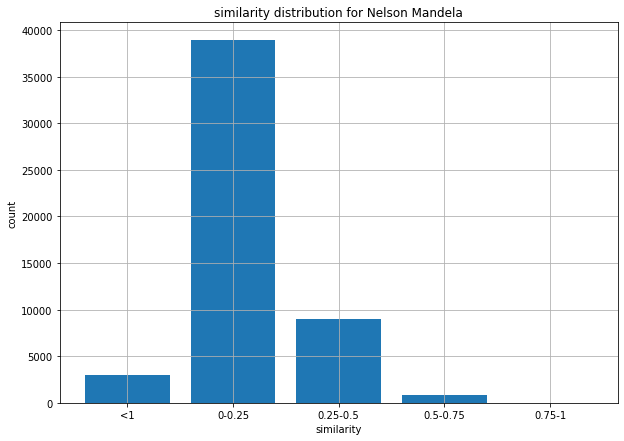

In [30]:
display_bar_plot(mp_sim_score_bar_range,"similarity distribution for Nelson Mandela","similarity","count")

## Incorporating temporal information

In [31]:
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if year_list:
        res = max(set(year_list), key=year_list.count)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
    

    
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.50:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = 170
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
#         print(f"{date_score}    {sim_score}")
        mixed_sim_score[key] = date_score*sim_score
    
maxval = max(mixed_sim_score.values())
for k,v in mixed_sim_score.items():
    mixed_sim_score[k] = v/maxval
    
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    #if v>= 0.35:
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))
    
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in section_wise_keyword_filtered.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")

Childhood:_1918–1934  ->   ['Mandela_Family_Chieftainship_1900', 'Rolihlahla_1900', 'African_1943', 'Mandela_1952', 'Zulu_King_1879']
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940  ->   ['Reverend_Mokitimi_1937', 'African_1943', 'White_Students_1943', 'Philosophy_Africanism_1943', 'Apartheid_1955']
Arriving_in_Johannesburg:_1941–1943  ->   ['African_1943', 'Philosophy_Africanism_1943', 'Africanism_1943', 'Anc_Labor_Activists_1946', 'South_African_Coloured_1950']
Law_studies_and_the_ANC_Youth_League:_1943–1949  ->   ['Resistance_Campaign_1946', 'South_African_Coloured_1950', 'South_African_Indian_1950', 'Racial_Oppression_1950', 'National_Liberation_1950']
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954  ->   ['South_African_Head_1953', 'Civil_Disobedience_1952', 'Apartheid_1952', 'Zulu_Chief_1952', 'Defiance_Campaign_1952']
Congress_of_the_People_and_the_Treason_Trial:_1955–1961  ->   ['Government_Africanist_1958', 'Pan_Africanist_Congress_1958', 'Africanist_Organization_19

In [34]:
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) < 1960 and int(date) > 1800:                    
                #print date
                year_list.append(date)
    except:
        pass
    if year_list:
        res = max(set(year_list), key=year_list.count)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
    

    
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = 170
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
#         print(f"{date_score}    {sim_score}")
        mixed_sim_score[key] = date_score*sim_score
    
maxval = max(mixed_sim_score.values())
for k,v in mixed_sim_score.items():
    mixed_sim_score[k] = v/maxval
    
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    #if v>= 0.35:
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))
    
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in section_wise_keyword_filtered.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")

Childhood:_1918–1934  ->   ['Sabata_Dalindyebo_1920', 'Apartheid_1920', 'South_African_Government_1920', 'Apartheid_Regime_1920', 'Apartheid_Targets_1920']
Clarkebury,_Healdtown,_and_Fort_Hare:_1934–1940  ->   ['Justice_1940', 'Suburb_Of_Johannesburg_1940', 'Regent_1940', 'Journey_1940', 'Reverend_Mokitimi_1937']
Arriving_in_Johannesburg:_1941–1943  ->   ['Suburb_Of_Johannesburg_1940', 'Circumstances_1940', 'African_1943', 'Liliesleaf_Farm_1940', 'Traveling_Documents_1940']
Law_studies_and_the_ANC_Youth_League:_1943–1949  ->   ['Resistance_Campaign_1946', 'Anc_Labor_Activists_1946', 'Indian_1946', 'Parliamentary_Representation_1946', 'Youth_League_1946']
Defiance_Campaign_and_Transvaal_ANC_Presidency:_1950–1954  ->   ['South_African_Head_1953', 'Cape_1953', 'De_Klerk_1953', 'South_African_Communist_1953', 'Apartheid_System_1953']
Congress_of_the_People_and_the_Treason_Trial:_1955–1961  ->   ['Government_Africanist_1958', 'Pan_Africanist_Congress_1958', 'Africanists_1958', 'Africanist_O

In [40]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Anc_Labor_Activists_1946', 'International_Sanctions_1950', 'Youth_League_1946', 'Apartheid_Targets_1920', 'Government_Africanist_1958', 'Anc_Leaders_1909', 'Reverend_Mokitimi_1937', 'Nationalization_Insisting_1950', 'Traveling_Documents_1940', 'Apartheid_1912', 'Jan_Van_1958', 'Communist_Party_1950', 'Liliesleaf_Farm_1940', 'Africanist_Organization_1958', 'Free_Mandela_Committee_1952', 'Journey_1940', 'Africa_1838', 'Circumstances_1940', 'Apartheid_1955', 'Eminent_Persons_Group_1950', 'Deputy_Presidents_1952', 'Requested_Meeting_1950', 'Regent_1940', 'Free_Mandela_1920', 'South_African_Government_1920', 'Cape_1953', 'Africanists_1958', 'Nomzamo_Winnie_Mandela_1909', 'Prison_Conditions_1952', 'Apartheid_Laws_1879', 'African_1943', 'Justice_1940', 'South_African_History_1950', 'Resistance_Campaign_1946', 'South_African_Communist_1953', 'Parliamentary_Representation_1946', 'Nelson_Mandela_Outlaw_1930', 'President_De_Klerk_1953', 'Johannesburg_1955', 'Apartheid_1909', 'Philosophy_African

In [41]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Regent_1940': ['1\\chapter8'], 'Reverend_Mokitimi_1937': ['1\\chapter6'], 'Justice_1940': ['1\\chapter8'], 'Journey_1940': ['1\\chapter8'], 'Traveling_Documents_1940': ['1\\chapter8'], 'Circumstances_1940': ['1\\chapter8'], 'African_1943': ['1\\chapter11'], 'South_Africa_1909': ['1\\chapter108'], 'Philosophy_Africanism_1943': ['1\\chapter11'], 'Africanism_1943': ['1\\chapter11'], 'Foreign_Ideologies_1943': ['1\\chapter11'], 'Parliamentary_Representation_1946': ['1\\chapter12'], 'Anc_Labor_Activists_1946': ['1\\chapter12'], 'Youth_League_1946': ['1\\chapter12'], 'Transvaal_Indian_Congress_1952': ['1\\chapter14'], 'Indian_1946': ['1\\chapter12'], 'Resistance_Campaign_1946': ['1\\chapter12'], 'Communist_Party_1950': ['1\\chapter13'], 'National_Liberation_1950': ['1\\chapter13'], 'South_African_Indian_1950': ['1\\chapter13'], 'Nationalists_1950': ['1\\chapter13'], 'Apartheid_1952': ['1\\chapter14'], 'Apartheid_1955': ['1\\chapter21', '1\\chapter31'], 'Apartheid_1956': ['1\\chapter22', '1

In [38]:
keyword_to_chap_final = {}
for k,v in keyword_to_chap.items():
    if k.title().replace(" ", "_") in final_keywords:
        keyword_to_chap_final[k.title().replace(" ", "_")] = v

In [39]:
keyword_to_chap_final

{'Regent': ['1\\chapter3', '1\\chapter5', '1\\chapter8'],
 'Reverend_Mokitimi': ['1\\chapter6'],
 'Justice': ['1\\chapter8', '1\\chapter35', '1\\chapter58'],
 'Journey': ['1\\chapter8'],
 'Traveling_Documents': ['1\\chapter8'],
 'Circumstances': ['1\\chapter8', '1\\chapter90', '1\\chapter100'],
 'African': ['1\\chapter11'],
 'South_Africa': ['1\\chapter33',
  '1\\chapter94',
  '1\\chapter99',
  '1\\chapter108'],
 'Philosophy_Africanism': ['1\\chapter11'],
 'Africanism': ['1\\chapter11'],
 'Foreign_Ideologies': ['1\\chapter11'],
 'Parliamentary_Representation': ['1\\chapter12'],
 'Anc_Labor_Activists': ['1\\chapter12'],
 'Youth_League': ['1\\chapter12', '1\\chapter13'],
 'Transvaal_Indian_Congress': ['1\\chapter14'],
 'Indian': ['1\\chapter12'],
 'Resistance_Campaign': ['1\\chapter12'],
 'Communist_Party': ['1\\chapter13'],
 'National_Liberation': ['1\\chapter13'],
 'South_African_Indian': ['1\\chapter13'],
 'Nationalists': ['1\\chapter13'],
 'Apartheid': ['1\\chapter13',
  '1\\chapter1

In [49]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['anc labor activists', 'international sanctions', 'youth league', 'apartheid targets', 'government africanist', 'anc leaders', 'reverend mokitimi', 'nationalization insisting', 'traveling documents', 'apartheid', 'jan van', 'communist party', 'liliesleaf farm', 'africanist organization', 'free mandela committee', 'journey', 'africa', 'circumstances', 'apartheid', 'eminent persons group', 'deputy presidents', 'requested meeting', 'regent', 'free mandela', 'south african government', 'cape', 'africanists', 'nomzamo winnie mandela', 'prison conditions', 'apartheid laws', 'african', 'justice', 'south african history', 'resistance campaign', 'south african communist', 'parliamentary representation', 'nelson mandela outlaw', 'president de klerk', 'johannesburg', 'apartheid', 'philosophy africanism', 'apartheid', 'foreign ideologies', 'africanism', 'de klerk', 'south african head', 'zulu king', 'democratic south africa', 'mandela family affairs', 'anc leadership', 'free mandela', 'anticommun

In [51]:
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

print(final_keyword_freq_mp)

    

{'anc labor activists': 0, 'international sanctions': 0, 'youth league': 1, 'apartheid targets': 0, 'government africanist': 0, 'anc leaders': 3, 'reverend mokitimi': 0, 'nationalization insisting': 0, 'traveling documents': 0, 'apartheid': 34, 'jan van': 0, 'communist party': 5, 'liliesleaf farm': 2, 'africanist organization': 0, 'free mandela committee': 0, 'journey': 0, 'africa': 125, 'circumstances': 1, 'eminent persons group': 0, 'deputy presidents': 0, 'requested meeting': 0, 'regent': 2, 'free mandela': 1, 'south african government': 0, 'cape': 11, 'africanists': 2, 'nomzamo winnie mandela': 0, 'prison conditions': 2, 'apartheid laws': 0, 'african': 73, 'justice': 9, 'south african history': 1, 'resistance campaign': 0, 'south african communist': 1, 'parliamentary representation': 0, 'nelson mandela outlaw': 0, 'president de klerk': 0, 'johannesburg': 25, 'philosophy africanism': 0, 'foreign ideologies': 0, 'africanism': 1, 'de klerk': 27, 'south african head': 0, 'zulu king': 0

In [53]:
total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

34
76
0.4473684210526316
